# **Netflix Investor: Quarterly Earnings**

*09 de maio, 2020*

## **1. Descrição geral do problema**

---

![Netflix Logo](https://i.pinimg.com/originals/99/73/0d/99730d10b40801dc93178989782d52b9.png)

A Netflix é uma provedora global de filmes e séries de televisão via streaming sediada em Los Gatos, Califórnia, e que atualmente possui mais de 160 milhões de assinantes. Fundada em 1997 nos Estados Unidos, a empresa surgiu como um serviço de entrega de DVD pelo correio. A expansão do streaming, disponível nos Estados Unidos a partir de 2007, começou pelo Canadá em 2010. Hoje, mais de 190 países têm acesso à plataforma. Sua primeira websérie original de sucesso foi *House of Cards*, lançada em 2013. Hoje em dia, a empresa produz centenas de horas de programação original em diferentes países do mundo, querendo aprimorar-se nas aplicações e em novas programações. 

Neste projeto iremos analisar os principais dados financeiros fornecidos trimestralmente pela Netflix entre 2012 e 2018. Os dados foram extraídos da página [Netflix Investor](https://www.netflixinvestor.com/financials/quarterly-earnings/default.aspx).

**Objetivo:** utilizar a **linguagem R** para preparar um resumo estatístico dos dados da empresa, demonstrando sua saúde financeira e outras informações relevantes, que poderão ajudar potenciais investidores a decidir sobre investir ou não na companhia.

---

## **2. Carregando Dados**

### **2.1 Importando bibliotecas necessárias**

Começaremos nosso projeto, importanto todas as bilbiotecas necessárias, para a realização das fases iniciais de exploração, e transformação dos dados (*Data Munging*).

In [ ]:
# Definindo a ocultação de warnings.

options(warn = -1)

# Difinindo o nome das bibliotecas que serão utilizadas.

librarys <- c(
    'ggplot2',
    'plyr',
    'corrplot',
    'caret',
    'GGally',
    'dplyr',
    'DMwR',
    'e1071',
    'data.table', 
    'readxl', 
    'lubridate',
    'car',
    'xts',
    'forecast',
    'tseries',
    'tidyr',
    'ggfortify'
)

In [ ]:
# Instalando bibliotecas necesárias diretamente do repósito no Github.

devtools:: install_github("brisneve/ggplottimeseries")

# Atribuindo bilioteca a lista de importações.

librarys <- append(librarys, 'ggplottimeseries')

In [ ]:
# Se não possuir uma das bibliotecas importadas abaixo, use a função a seguir:

install.packages(librarys, character.only = TRUE)

In [ ]:
# Importando as bibliotecas presentes na lista.

for(l in librarys) {
    
    # Importa a biblioteca especificada.

    library (
        package        = l,    # Define o nome da biblioteca que deve ser importada.
        character.only = TRUE  # Define que o nome do pacote deve ser considerado como uma String.
    ) 
}

### **2.2 Carregando Dados**

In [ ]:
# Importando os dados do dataset.

dataset <- read_xlsx("/content/datasets/Netflix_Data.xlsx", col_names =  T)

# Criando cópia do dataset.

data <- dataset

# Visualizando os primeiros registros do conjunto de dados.

head(data)

Time              Total subscriptions at end of period
1 March 31,2012     23410                               
2 June 30,2012      23938                               
3 September 30,2012 25101                               
4 December 31,2012  27146                               
5 March 31,2013     29174                               
6 June 30,2013      29807                               
  Paid subscriptions at end of period Free Trails Revenue Cost of revenues
1 22022                               1388        506665  360776          
2 22686                               1252        532705  378574          
3 23801                               1300        556027  399124          
4 25471                               1675        589471  420390          
5 27913                               1261        638649  440334          
6 28624                               1183        671089  452598          
  Marketing Contribution profit Contribution Margin
1 79381      66508              0.131              
2 70959      83172              0.156              
3 65955      90948              0.164              
4 59777     109304              0.185              
5 66965     131350              0.206              
6 67177     151314              0.225              
  Cost per Customer (excluding marketing) Revenue per Customer
1 15.41119                                21.64310            
2 15.81477                                22.25353            
3 15.90072                                22.15159            
4 15.48626                                21.71484            
5 15.09337                                21.89103            
6 15.18429                                22.51448            
  Earnings per Customer Segment  
1 6.231909              Streaming
2 6.438758              Streaming
3 6.250866              Streaming
4 6.228579              Streaming
5 6.797662              Streaming
6 7.330191              Streaming

## **3. Data Munging**

### **3.1 Visão geral dos dados**

Antes de prosseguirmos, é importante destacarmos que cada observação do dataset, contém dados que foram extraídos do site da [Netflix Investor](https://www.netflixinvestor.com/financials/quarterly-earnings/default.aspx), e estão distribuídos nas seguintes variáveis:


| Variável                | Tipo      | Descrição                                                                                                        |
|:------------------------|:----------|:-----------------------------------------------------------------------------------------------------------------|
| **Time**                |*Character*| É a data de emissão do resultado trimestral;                                                                     |
| **Total subscriptions at end of period** |*Double*   | É o número total de assinaturas registradas no final do trimestre;                              |
| **Paid subscriptions at end of period**  |*Double*   | É o número de assinaturas pagas registradas no final do trimestre;                              |
| **Free Trails**         |*Double*   | É o número de assinaturas em período de utilização gratuita registradas no final do trimestre;                   |
| **Revenue**             |*Double*   | É a receita trimestral gerada para o *Streaming* doméstico (*em milhares de dólares*);                           |
| **Cost of revenues**    |*Double*   | É o custo trimestral da receita gerada para o *Streaming* doméstico (*em milhares de dólares*);                  |
| **Marketing**           |*Double*   | É o custo trimestral de Marketing gerado para o *Streaming* doméstico (*em milhares de dólares*);                |
| **Contribution profit** |*Double*   | É o lucro da contribuição trimestral (*em milhares de dólares*);                                                 |
| **Contribution Margin** |*Double*   | É a margem de contribuição trimestral (**Contribution profit / Revenue**);                                       |
| **Cost per Customer (excluding marketing)** |*Double*   | É a taxa de custo por cliente desconsiderando os gastos com Marketing (**Cost of revenues / Total subscriptions at end of period**); |
| **Revenue per Customer**  |*Double*   | É a taxa de receita por cliente (**Revenue / Total subscriptions at end of period**);                          |
| **Earnings per Customer** |*Double*   | É a taxa de lucro por cliente (**(Revenue - Cost of revenues) / Total subscriptions at end of period**) e;     |
| **Segment**               |*Character*| É o segmento de operação da companhia ao qual os dados se referem.                                             |

Nosso primeio passo, será trocar o nome das colunas para facilitar a análise nas próximas etapas.

In [ ]:
# Alterando os nomes das colunas do dataset.

names(data) <- c(
  "date",
  "totalSubscriptions",
  "paidSubscriptions",
  "freeTrails",
  "revenue",
  "costOfRevenues",
  "marketing",
  "contributionProfit",
  "contributionMargin",
  "costPerCustomer",
  "revenuePerCustomer",
  "earningsPerCustomer",
  "segment"
)

# Visualizando os primeiros registros do conjunto de dados.

head(data)

date              totalSubscriptions paidSubscriptions freeTrails revenue
1 March 31,2012     23410              22022             1388       506665 
2 June 30,2012      23938              22686             1252       532705 
3 September 30,2012 25101              23801             1300       556027 
4 December 31,2012  27146              25471             1675       589471 
5 March 31,2013     29174              27913             1261       638649 
6 June 30,2013      29807              28624             1183       671089 
  costOfRevenues marketing contributionProfit contributionMargin
1 360776         79381      66508             0.131             
2 378574         70959      83172             0.156             
3 399124         65955      90948             0.164             
4 420390         59777     109304             0.185             
5 440334         66965     131350             0.206             
6 452598         67177     151314             0.225             
  costPerCustomer revenuePerCustomer earningsPerCustomer segment  
1 15.41119        21.64310           6.231909            Streaming
2 15.81477        22.25353           6.438758            Streaming
3 15.90072        22.15159           6.250866            Streaming
4 15.48626        21.71484           6.228579            Streaming
5 15.09337        21.89103           6.797662            Streaming
6 15.18429        22.51448           7.330191            Streaming

In [ ]:
# Verificando a existência de registros duplicados.

table(duplicated(data))


FALSE 
   28 

Bom, constatamos que não há registros duplicados no conjunto de dados.

In [ ]:
# Verificando a existência de valores NA no dataset.

data.frame(anyNA = sapply(data, anyNA))

anyNA
date                FALSE
totalSubscriptions  FALSE
paidSubscriptions   FALSE
freeTrails          FALSE
revenue             FALSE
costOfRevenues      FALSE
marketing           FALSE
contributionProfit  FALSE
contributionMargin  FALSE
costPerCustomer     FALSE
revenuePerCustomer  FALSE
earningsPerCustomer FALSE
segment             FALSE

Não foi detectado nenhum valor *NA* dentro do conjunto de dados.

### **3.2 Alterando os tipos de dados das variáveis**

Algumas varíaveis no dataset, foram associadas a tipos de dados incorretos. Observe que:

* A variável **date** indica uma data, e por isso, a converteremos para o tipo **Date**;
* As variáveis **totalSubscriptions**, **paidSubscriptions** e **freeTrails** são quantitativas discreta, pois apresentam valores baseados em contagens, e por isso, as converteremos para o tipo de dado **integer** e;
* A variável **segment** é qualitativa nominal, o que a faz ser melhor representada, pelo tipo de dado **factor**.

Começaremos alterando o tipo de dado da variável **date**.

In [ ]:
# Alterando o tipo de dado da variável date.

data$date <- as.Date(data$date, format = "%B %d, %Y")

Converteremos o tipo de dado da variável **segment**.

In [ ]:
# Alterando o tipo de dado da variável segment.

data$segment <- as.factor(data$segment)

Agora, iremos verificar, se existe algum valor frácionário no conjunto de dados das variáveis **totalSubscriptions**, **paidSubscriptions** e **freeTrails**, que justifique, a utilização do tipo de dado com o qual o dataset foi carregado.

In [ ]:
# Verificando os valores únicos existentes, em cada variável do dataset, antes da conversão do tipo de dado.

uniqValuesBefore <- sapply(data, function(v) {
    sort(unique(v))
})

# Exibindo valores únicos, em cada variável do dataset, que irá sofrer a conversão.

uniqValuesBefore[c('totalSubscriptions', 'paidSubscriptions', 'freeTrails')]

$totalSubscriptions
 [1] 23410 23938 25101 27146 29174 29807 31092 33420 35674 36244 37219 39114
[13] 41397 42300 43181 44738 45714 46004 46479 47905 49375 50323 51345 52810
[25] 55087 55959 56957 58486

$paidSubscriptions
 [1] 22022 22686 23801 25471 27913 28624 29925 31712 34377 35085 36265 37698
[13] 40315 41057 42068 43401 44461 44879 45461 46379 47896 48725 49918 50870
[25] 53469 54539 55450 56421

$freeTrails
 [1]  954 1018 1082 1113 1125 1159 1167 1183 1243 1252 1253 1261 1297 1300 1337
[16] 1388 1416 1420 1427 1479 1507 1526 1598 1618 1675 1708 1940 2065

Bom, não encontramos nenhum valor fracionário e por isso iremos converter as variáveis para o tipo de dado *inteiro*.

In [ ]:
# Alterando o tipo da variável totalSubscriptions para o tipo inteiro.

data$totalSubscriptions <- as.integer(data$totalSubscriptions)

# Alterando o tipo da variável paidSubscriptions para o tipo inteiro.

data$paidSubscriptions <- as.integer(data$paidSubscriptions)

# Alterando o tipo da variável freeTrails para o tipo inteiro.

data$freeTrails <- as.integer(data$freeTrails)

# Visualizando os primeiros registros do conjunto de dados.

head(data)

date       totalSubscriptions paidSubscriptions freeTrails revenue
1 2012-03-31 23410              22022             1388       506665 
2 2012-06-30 23938              22686             1252       532705 
3 2012-09-30 25101              23801             1300       556027 
4 2012-12-31 27146              25471             1675       589471 
5 2013-03-31 29174              27913             1261       638649 
6 2013-06-30 29807              28624             1183       671089 
  costOfRevenues marketing contributionProfit contributionMargin
1 360776         79381      66508             0.131             
2 378574         70959      83172             0.156             
3 399124         65955      90948             0.164             
4 420390         59777     109304             0.185             
5 440334         66965     131350             0.206             
6 452598         67177     151314             0.225             
  costPerCustomer revenuePerCustomer earningsPerCustomer segment  
1 15.41119        21.64310           6.231909            Streaming
2 15.81477        22.25353           6.438758            Streaming
3 15.90072        22.15159           6.250866            Streaming
4 15.48626        21.71484           6.228579            Streaming
5 15.09337        21.89103           6.797662            Streaming
6 15.18429        22.51448           7.330191            Streaming

In [ ]:
# Verificando os valores únicos existentes, em cada variável do dataset, após a conversão do tipo de dado.

uniqValuesAfter <- sapply(data, function(v) {
    sort(unique(v))
})

# Exibindo valores únicos, em cada variável do dataset, que sofreu a conversão.

uniqValuesAfter[c('totalSubscriptions', 'paidSubscriptions', 'freeTrails')]

$totalSubscriptions
 [1] 23410 23938 25101 27146 29174 29807 31092 33420 35674 36244 37219 39114
[13] 41397 42300 43181 44738 45714 46004 46479 47905 49375 50323 51345 52810
[25] 55087 55959 56957 58486

$paidSubscriptions
 [1] 22022 22686 23801 25471 27913 28624 29925 31712 34377 35085 36265 37698
[13] 40315 41057 42068 43401 44461 44879 45461 46379 47896 48725 49918 50870
[25] 53469 54539 55450 56421

$freeTrails
 [1]  954 1018 1082 1113 1125 1159 1167 1183 1243 1252 1253 1261 1297 1300 1337
[16] 1388 1416 1420 1427 1479 1507 1526 1598 1618 1675 1708 1940 2065

Por precaução, vamos nos certificar de que não perdemos nenhuma informação, e que todos os dados do conjunto das variáveis convertidas, permanecem iguais.

In [ ]:
# Verificando se todos os valores únicos da variável totalSubscriptions permanecem iguais, após a conversão do tipo de dado.

as.data.frame(table(totalSubscriptions = uniqValuesBefore$totalSubscriptions == uniqValuesAfter$totalSubscriptions))

totalSubscriptions Freq
1 TRUE               28

In [ ]:
# Verificando se todos os valores únicos da variável paidSubscriptions permanecem iguais, após a conversão do tipo de dado.

as.data.frame(table(paidSubscriptions = uniqValuesBefore$paidSubscriptions == uniqValuesAfter$paidSubscriptions))

paidSubscriptions Freq
1 TRUE              28

In [ ]:
# Verificando se todos os valores únicos da variável freeTrails permanecem iguais, após a conversão do tipo de dado.

as.data.frame(table(freeTrails = uniqValuesBefore$freeTrails == uniqValuesAfter$freeTrails))

freeTrails Freq
1 TRUE       28

Perfeito, nenhum dos valores das variáveis que manipulamos foi alterado, ou seja, não perdemos nenhuma informação, e já temos nosso dataset pronto para as próximas fases de análise.

## **4. Feature Engennier**

Ter variáveis que representem o mês e o ano de cada um dos registros do conjunto de dados, pode ser interessante, e por isso, extrairemos estas informações e as armazenaremos nas variáveis **month** e **year**.

In [ ]:
# Criando variáveis para armazenar o mês e o ano de cada registro do dataset.

data <- data %>%
    mutate(
        month = as.factor(months(date)),
        year  = as.factor(year(date))
    )

# Visualizando as primeiras linhas do dataset.

head(data)

date       totalSubscriptions paidSubscriptions freeTrails revenue
1 2012-03-31 23410              22022             1388       506665 
2 2012-06-30 23938              22686             1252       532705 
3 2012-09-30 25101              23801             1300       556027 
4 2012-12-31 27146              25471             1675       589471 
5 2013-03-31 29174              27913             1261       638649 
6 2013-06-30 29807              28624             1183       671089 
  costOfRevenues marketing contributionProfit contributionMargin
1 360776         79381      66508             0.131             
2 378574         70959      83172             0.156             
3 399124         65955      90948             0.164             
4 420390         59777     109304             0.185             
5 440334         66965     131350             0.206             
6 452598         67177     151314             0.225             
  costPerCustomer revenuePerCustomer earningsPerCustomer segment   month    
1 15.41119        21.64310           6.231909            Streaming March    
2 15.81477        22.25353           6.438758            Streaming June     
3 15.90072        22.15159           6.250866            Streaming September
4 15.48626        21.71484           6.228579            Streaming December 
5 15.09337        21.89103           6.797662            Streaming March    
6 15.18429        22.51448           7.330191            Streaming June     
  year
1 2012
2 2012
3 2012
4 2012
5 2013
6 2013

Ao analisar as características do dataset, e como elas podem se relacionar, vemos a possibilidade de se criar duas variáveis novas, que podem ser úteis para o processo de análise: 

* A primeira, para indicar a proporção de avaliações gratuitas em relação ao total de assinaturas e;
* A segunda, para indicar a proporção do custo com marketing em relação ao custo total.

Iremos denominá-las como: **freeTrialsFromTotal** e **marketingFromTotal**, respectivamente.

In [ ]:
# Criando as variáveis freeTrialsFromTotal e marketingFromTotal.

data <- data %>%
    mutate(
        
        # Proporção de avaliações gratuitas do total de assinaturas.
        
        freeTrialsFromTotal = freeTrails / totalSubscriptions * 100,  
        
        # Proporção de custo com marketing em relação ao custo total. 
        
        marketingFromTotal  = marketing / (costOfRevenues + marketing) * 100   
    ) 

# Visualizando as primeiras linhas do dataset.

head(data)

date       totalSubscriptions paidSubscriptions freeTrails revenue
1 2012-03-31 23410              22022             1388       506665 
2 2012-06-30 23938              22686             1252       532705 
3 2012-09-30 25101              23801             1300       556027 
4 2012-12-31 27146              25471             1675       589471 
5 2013-03-31 29174              27913             1261       638649 
6 2013-06-30 29807              28624             1183       671089 
  costOfRevenues marketing contributionProfit contributionMargin
1 360776         79381      66508             0.131             
2 378574         70959      83172             0.156             
3 399124         65955      90948             0.164             
4 420390         59777     109304             0.185             
5 440334         66965     131350             0.206             
6 452598         67177     151314             0.225             
  costPerCustomer revenuePerCustomer earningsPerCustomer segment   month    
1 15.41119        21.64310           6.231909            Streaming March    
2 15.81477        22.25353           6.438758            Streaming June     
3 15.90072        22.15159           6.250866            Streaming September
4 15.48626        21.71484           6.228579            Streaming December 
5 15.09337        21.89103           6.797662            Streaming March    
6 15.18429        22.51448           7.330191            Streaming June     
  year freeTrialsFromTotal marketingFromTotal
1 2012 5.929090            18.03470          
2 2012 5.230178            15.78505          
3 2012 5.179077            14.18146          
4 2012 6.170338            12.44921          
5 2013 4.322342            13.20030          
6 2013 3.968866            12.92425

## **5. Análise exploratória dos dados**

### **5.1 Criando funções auxiliares**

#### **5.1.1 Funções para a criação de gráficos**

Iremos definir algumas funções, para padronizar as plotagens de gráficos que criaremos.

In [ ]:
# Definindo uma função para criar gráficos de barras.

barPlot <- function(col, data, x = 'date', color = '#EE4266', startTime = '2012-01-31') {

    data %>%
        mutate(date = format(date, "%b, %Y")) %>%
        ggplot(aes(x = reorder(date, 1:length(date)))) + 
            geom_bar(aes_string(y = col), stat = 'identity', fill = color, alpha = 0.85) +
            theme_bw() +
            xlab('Quarter') +
            ggtitle(paste("Bar chart for variable:", col)) + 
            coord_flip()
}

In [ ]:
# Definindo uma função para criar gráficos de Séries Temporais.

timeSeriesPlot <- function(col, data, x = 'date', color = '#69B3A2', startTime = '2012-01-31') {

    data %>%
        ggplot(aes_string(x = x, y = col)) + 
            geom_line(color = color, size = 2) +
            geom_point(size = 2) + 
            theme_bw() +
            theme(axis.text.x = element_text(angle = 60, hjust = 1)) + 
            scale_x_date(
                limits      = as.Date(c(startTime, NA)),
                date_labels = "%b, %Y", 
                date_breaks = '3 months'
            ) +
            xlab('Quarter') +
            ggtitle(paste("Time series chart for variable:", col)) 
}

In [ ]:
# Definindo uma função para criar gráficos Boxplot.

boxPlot <- function(col, data, x = 'date', color = c('#777DA7', '#04F06A', '#D5573B'), 
                    startTime = '2012-01-31', categ = 'None') {

    # Cria gráficos de Boxplot, para representar os valores da variável especificada, agrupados por ano.

    if(categ == 'year') {

        data %>% 
            select_at(c('year', col)) %>%
            ggplot(aes_string(x = 'year', y = col)) + 
                geom_boxplot(fill = color[1], alpha = 0.85) +
                theme_bw() +
                ggtitle(paste("Boxplot by year for variable:", col)) + 
                xlab('Year')

    # Cria gráficos de Boxplot, para representar os valores da variável especificada, agrupados por mês.

    } else if (categ == 'month'){
        
        data %>% 
            select_at(c('month', col)) %>%
            ggplot(aes_string(x = 'month', y = col)) + 
                geom_boxplot(fill = color[2], alpha = 0.85) +
                theme_bw() +
                ggtitle(paste("Boxplot by month for variable:", col)) + 
                xlab('Month')

    # Cria gráficos de Boxplot, para representar os valores da variável especificada.

    } else {
                
        data %>%
            ggplot(aes_string(x = col)) + 
                geom_boxplot(fill = color[3], alpha = 0.85) +
                theme_bw() +
                theme(axis.text.y = element_blank()) +
                ggtitle(paste("Boxplot for variable:", col))
    }
}

In [ ]:
# Definindo uma função para criar gráficos de Densidade.

densityPlot <- function(col, data, x = 'date', color = '#258EA6', startTime = '2012-01-31') {

    data %>%
        ggplot(aes_string(x = col)) + 
            geom_density(fill = color, alpha = 0.75) +
            theme_bw() +
            ggtitle(paste("Density chart for variable:", col))
}

#### **5.1.2 Funções para calcular estatísticas**

Criaremos uma função, para padronizar as estatísticas que calcularemos, em cada uma das variáveis a serem estudadas.

In [ ]:
# Definindo uma função, para gerar um dataframe, com as estatísticas de uma variável do dataset.

varStats <- function(col, data) {

    isFactor = sapply(data, is.factor)

    if(!isFactor[col]) {                 

        # Calcula estatísticas de variáveis numéricas.
        
        result <- data %>%
            summarize(
                Min       = min(get(col)),
                Q1        = unname(quantile(get(col), probs = c(0.25))),
                Median    = median(get(col)),
                mean      = mean(get(col)),
                Q3        = unname(quantile(get(col), probs = c(0.75))),
                Max       = max(get(col)),
                Sd        = sd(get(col)),
                Sk        = skewness(get(col)),
                Ck        = kurtosis(get(col))
            )

    } else {                                      

        # Contabiliza o número de registros, dentro de cada classe da variável.

        result <- data %>%
            group_by_at(col) %>%
            summarise(
                count = n(),
                prop  = n() / nrow(data) * 100
            )
    }

    # Retorna o resultado das estatísticas geradas.

    data.frame(result, row.names = col)
}

O coeficente de **Assimetria (Skewness)**, indica como os dados estão *distribuídos*, e para interpretar seu resultado podemos olhar a tabela a seguir:

| Índice de Assimetria | Descrição                                                                                                                        |
|:---------------------|:---------------------------------------------------------------------------------------------------------------------------------|
| **SK ≈ 0**           | Os dados são simétricos. Tanto a cauda do lado direito, quanto a do lado esquerdo da função densidade de probabilidade, são iguais;|
| **SK < 0**           | A assimetria é negativa. A cauda do lado esquerdo da função densidade de probabilidade, é maior que a do lado direito e;          |
| **SK > 0**           | A assimetria é positiva. A cauda do lado direito da função densidade de probabilidade, é maior que a do lado esquerdo.            |


O coeficiente de **Curtose (Kurtosis)**, é uma medida que caracteriza o *achatamento da curva* da função de distribuição, e para interpretar seu resultado, podemos olhar a tabela a seguir:

| Índice de Curtose | Descrição                                                                                                      |
|:------------------|:---------------------------------------------------------------------------------------------------------------|
| **CK ≈ 0**        | A distribuição é normal, e é chamada de Curtose *Mesocúrtica*;                                                  |
| **CK < 0**        | A Cauda é mais leve que a normal. Para um coeficiente de Curtose negativo, tem-se uma Curtose *Platicúrtica* e;|
| **CK > 0**        | A Cauda é mais pesada que a normal. Para um coeficiente de Curtose positivo, tem-se uma Curtose *Leptocúrtica*.|

**Atenção:** Há diferentes fórmulas para calcular estes coeficientes. Mas, para este estudo utilizamos as funções fornecidas pela biblioteca **e1071**, com suas respectivas configurações padrão. Em caso de dúvida, consulte a [documentação](https://cran.r-project.org/web/packages/e1071/e1071.pdf).

Também criaremos um função, para nos auxiliar na detecção de outliers.

In [ ]:
# Função para extrair os registros, que apresentem valores outliers, para um determinada variável.

getOutliers <- function(col, data) {

    # Extraindo variável, a ser manipulada, pelo nome.

    dt <- data %>% select_at(col)

    # Renomeando variável.

    colnames(dt) <- 'var'

    # Determinando o limite superior e inferior da variável especificada.

    limits <- dt %>% summarise(
        lowerOutliers = quantile(var, probs = c(.25)) - 1.5 * IQR(var),
        upperOutliers = quantile(var, probs = c(.75)) + 1.5 * IQR(var)
    )

    # Identificando registros, que estão fora dos limites especificados.

    data[dt$var < limits$lowerOutliers | dt$var > limits$upperOutliers, ]
}

As demais funções a seguir, foram criadas com o objetivo de abstrair a complexidade dos cálculos estatísticos, e aumentar a legibilidade das análises.

In [ ]:
# Função para calcular o aumento, ou a diminuição, percentual do valor da variável especificada, entre o primeiro e último
# trimestre registrados.

statsBetweenFirstAndLastQuarters <- function(col, data) {

    # Capturando os valores da coluna especificada, com o registro da data mais antiga, e da mais recente.

    minDate <- data[data$date == min(data$date), col]
    maxDate <- data[data$date == max(data$date), col]

    # Calculando o valor do ganho percentual, e a diferença entre os valores registrados.

    data.frame(
        percentIncrease = (maxDate - minDate) / minDate * 100,  # Define o valor percentual.
        amp             = maxDate - minDate                     # Define a amplitude entre os valores registrados.
    ) 
} 

In [ ]:
# Função para calcular o aumento, ou a diminuição, percentual do valor da variável especificada, entre o primeiro e último
# trimestre de cada ano registrado.

statsBetweenFirstAndLastQuartersToYear <- function(col, data) {

    # Capturando os valores da coluna especificada, com o registro da data mais antiga, e da mais recente, para cada ano.

    dt <- data %>%
        select_at(c('year', 'month', col)) %>%
        group_by(year) %>%
        filter(month == 'March' | month == 'December')

    # Criando dataframe para armazenar as estatísticas.

    result <- data.frame()

    # Extraindo os anos limite, presentes no conjunto de dados.

    years <- unique(year(data$date))

    # Aplica o cálculo das estatísticas, para cada um dos anos presentes no dataset.

    for (y in years){
        
        # Extraí os dados do ano especificado.

        firstQuarter <- dt[dt$year == y & dt$month == 'March', col]
        lastQuarter  <- dt[dt$year == y & dt$month == 'December', col]

        # Calcula as estatísticas, e armazena os resultados, no dataframe.

        result <- rbind(
            result,
            data.frame(
                
                # Define o valor percentual.
                
                percentIncrease = (lastQuarter - firstQuarter) / firstQuarter * 100, 
                
                # Define a amplitude entre os valores registrados.
                
                amp             = lastQuarter - firstQuarter,                         
                row.names = as.character(y)
            )
        )
    }
    
    # Retorna os resultados obtidos pelo cálculo das estatísticas.

    result
}

In [ ]:
# Função para calcular o aumento, ou a diminuição, percentual dos trimestres, em relação aos anos.

statsBetweenQuartersPerYear <- function(col, data) {

    # Criando dataframe para armazenar as estatísticas.

    result <- data.frame()

    # Define o nome, e a sequência, com a qual os meses serão analisados.

    for(m in unique(months(data$date))) {

        # Capturando os valores, da coluna especificada, e o mês, a ser analisado.

        dt <- data %>%
            select_at(c('year', 'month', col)) %>%
            group_by(year) %>%
            filter(month == m)

        # Criando um dataframe, para armazenar as estatísticas geradas, para o mês em análise.

        rows <- data.frame()

        # Define um loop, para percorrer cada linha do dataframe.

        for(l in 2:nrow(dt)) {
            
            # Extraí os dados, do ano do registro selecionado, e do registro anterior.

            firstYear <- dt[dt$year == dt$year[l - 1], col]
            lastYear  <- dt[dt$year == dt$year[l], col]

            # Calcula as estatísticas, e armazena os resultados no dataframe.

            rows <- rbind(
                rows,
                data.frame(
                    
                    # Define o valor percentual.
                    
                    percentIncrease = (lastYear - firstYear) / firstYear * 100,                                 
                    row.names = paste(as.character(dt$year[l]), ' - ', as.character(dt$year[l - 1]), sep = '')
                )
            )
        }

        # Identifica o mês, ao qual, as estatíscas pertecencem.

        colnames(rows) <- paste('pInc', unique(dt$month), sep = '_')

        # Atribui os resultados gerados, ao dataframe de resultados.

        if(ncol(result) == 0) {
            
            # Caso o dataframe esteja vazio, o preenchemos com os resultados computados, para o primeiro mês analisado.
            
            result <- rows                
        } else {
            
            # Caso o dataframe não esteja vazio, adiconamos a coluna com as novas estatísticas, ao dataframe.
            
            result <- cbind(result, rows) 
        }
    }

    # Retorna os resultados gerados.

    result
}

#### **5.1.3 Funções para aplicar testes estatísticos**

##### **5.1.3.1 Teste de normalidade (Teste de Shapiro-Wilks)**

Muitos dos testes estatísticos, incluindo correlação, regressão, teste t e análise de variância (ANOVA), assumem certas características sobre os dados. Eles exigem que os dados sigam uma **distribuição normal** ou **distribuição gaussiana**. Esses testes são chamados de **testes paramétricos**, porque sua validade depende da distribuição dos dados.

Antes de usar um teste paramétrico, devemos executar alguns **testes preliminares** para garantir que as premissas do teste sejam atendidas. Nas situações em que as suposições são violadas, **recomenda-se a realização** de testes **não paramatricos**.

É possível usar um **teste de significância** comparando a distribuição da amostra com a normal, a fim de verificar se os dados mostram ou não um desvio grave da normalidade.

Existem vários métodos para o **teste de normalidade**, como o **teste de normalidade Kolmogorov-Smirnov (KS)** e o **teste de Shapiro-Wilk**.

**O método de Shapiro-Wilk** é amplamente recomendado para teste de normalidade e fornece melhor potência que o KS. É baseado na correlação entre os dados e as pontuações normais correspondentes, e é ele que utilizaremos em nossas análises.

As hipóteses deste teste são:

| Teste de hipótese                                   |
|:----------------------------------------------------|
|**H0:** A amostra provêm de uma população normal.    |
|**Ha:** A amostra não provêm de uma população normal.|


Para saber mais sobre o teste de Shapiro-Wilk, consulte este [link](http://www.portalaction.com.br/inferencia/64-teste-de-shapiro-wilk). 

Caso deseje se aprofundar nos testes de normalidade, consulte este [link](http://www.sthda.com/english/wiki/normality-test-in-r#:~:text=There%20are%20several%20methods%20for,the%20distribution%20is%20non%2Dnormal).

In [ ]:
# Definindo uma função, para avaliar a normalidade, das variáveis numéricas do dataset.

normalityTest <- function(data, sig = 0.05) {

    # Determinando quais variáveis do dataset são do tipo numérico.

    numVars <- sapply(data, is.numeric)

    # Aplicando o teste de Shapiro-Wilks, a cada uma das variáveis numéricas.

    shapiroTest <- sapply(data[numVars], shapiro.test)['p.value', ]

    # Transpondo dados.

    normTest <- t(data.frame(shapiroTest))

    # Atribuindo o nome da coluna com os p-values.

    colnames(normTest) <- 'pValue'

    # Criando uma variável, para determinar se o p-value é menor do que o nível de significância especificado 
    # (por padrão, o nível de significância é de 5%).

    thereIsEvidenceOfNormality <- sapply(normTest, function(pvalue) { ifelse(pvalue > sig, TRUE, FALSE) })

    # Convertendo variáveis para um dataframe.

    normTest <- data.frame(normTest)

    # Retornando um dataframe com os resultados obtidos.

    cbind(normTest, thereIsEvidenceOfNormality)
}

##### **5.1.3.2 Teste de Levene**

O **teste de Bartlett** é usado para testar a homogeneidade das variâncias em k amostras, onde k pode ser maior que dois. É adaptado para dados normalmente distribuídos. O **teste de Levene**, é uma alternativa mais robusta ao teste de Bartlett quando as distribuições dos dados **não são normais**.

As hipóteses deste teste são:


| Teste de hipótese                                    |
|:-----------------------------------------------------|
|**H0:** As variâncias entre os grupos é homogênea.    |
|**Ha:** As variâncias entre os grupos não é homogênea.|


Para saber mais sobre testes estatísticos para comparar variâncias, consulte este [link](http://www.sthda.com/english/wiki/compare-multiple-sample-variances-in-r).


In [ ]:
# Definindo uma função, para avaliar a homogeneidade das variâncias dos subgrupos categorizados, 
# das variáveis numéricas do dataset.

normVarTest <- function(categ, data, sig = 0.05) {

    # Determinando quais variáveis do dataset, são do tipo numérico.

    numVars <- sapply(data, is.numeric)
    
    # Determinando a posição da variável target, dentro do dataset.

    isTarget <- sapply(colnames(data), function(n){n == categ})

    # Capturando variáveis que serão utilizadas no teste.

    data <- data[numVars | isTarget]

    # Definindo os nomes das variáveis target.

    target <- colnames(data) 

    # Elimina o nome da varíavel categórica da lista.

    target <- target[target != categ]

    # Aplica o teste de Levene, com as variáveis numérica e categórica especificadas.

    result <- sapply(target, function(t) {

        leveneTest(formula(paste(t, '~', categ)), data = data)[1, 'Pr(>F)']
    })
    
    # Transpondo dados.

    normTest <- data.frame(result)

    # Atribuindo o nome da coluna com os p-values.

    colnames(normTest) <- 'pValue'

    # Criando uma variável, para determinar se o p-value é menor do que o nível de significância especificado 
    # (por padrão, o nível de significância é de 5%).

    thereIsEvidenceOfNormVar <- sapply(normTest, function(pvalue) { ifelse(pvalue > sig, TRUE, FALSE) })

    # Renomeando o nome da variável especificada.

    colnames(thereIsEvidenceOfNormVar) <- 'thereIsEvidenceOfNormVar'
    
    # Convertendo as variáveis para um dataframe.

    normTest <- data.frame(normTest)

    # Retornando um dataframe com os resultados obtidos.

    cbind(normTest, thereIsEvidenceOfNormVar)
} 

##### **5.1.3.3 Teste Anova (One-Way)**

A **análise de variância One-Way (*ANOVA*)**, também conhecido como *one-factor ANOVA*, é uma extensão  do teste t para duas amostras independentes, e visa comparar a média em uma situação em que há mais do que dois grupos. Na **ANOVA One-Way**, os dados são organizados em vários grupos, com base em uma única variável de agrupamento (também chamada de variável fator).

Observe que, se você tiver **apenas dois grupos**, poderá usar o teste t. Nesse caso, o teste F e o teste t são equivalentes.

O teste *ANOVA* **só pode ser aplicado quando**:

1.  As observações são obtidas de forma **independente e aleatória** a partir da população definida pelos níveis de fator;

2. Os dados de cada nível de fator são **normalmente distribuídos**;

3. Essas populações normais têm uma **variância comum** (O teste de Levene pode ser usado para verificar isso) e;

4. Os dados devem ser **contínuos**.

As hipóteses deste teste são:


| Teste de hipótese                                    |
|:-----------------------------------------------------|
|**H0:** As médias dos grupos são iguais.              |
|**Ha:** As médias dos grupos não são iguais.          |


Para saber mais sobre testes estatísticos para comparar variâncias, consulte este [link](http://www.sthda.com/english/wiki/one-way-anova-test-in-r).

In [ ]:
# Definindo uma função, para aplicar a análise de variância nos subgrupos categorizados, das variáveis numéricas do dataset.

anovaTest <- function(categ, parametricVars, data, sig = 0.05) {

    # Aplicando o teste Anova, com as variáveis numérica e categórica especificadas.

    result <- sapply(parametricVars, function(t) {

        anovaModel <- lm(formula(paste(t, '~', categ)), data = data)
        
        anova(anovaModel)[categ, 'Pr(>F)']
    })

    # Transpondo dados.

    anovaTest <- data.frame(result)

    # Atribuindo o nome da coluna com os p-values.

    colnames(anovaTest) <- 'pValue'
    
    # Criando uma variável, para determinar se o p-value é menor do que o nível de significância especificado 
    # (por padrão, o nível de significância é de 5%).

    thereIsEvidenceForEqualsMeans <- sapply(anovaTest, function(pvalue) { ifelse(pvalue > sig, TRUE, FALSE) })

    # Renomeando o nome da variável especificada.

    colnames(thereIsEvidenceForEqualsMeans) <- 'thereIsEvidenceForEqualsMeans'
    
    # Convertendo variáveis para um dataframe.

    anovaTest <- data.frame(anovaTest)

    # Retornando um dataframe com os resultados obtidos.

    cbind(anovaTest, thereIsEvidenceForEqualsMeans)
}

##### **5.1.3.4 Teste de soma de classificação de Kruskal-Wallis**

**O teste de Kruskal-Wallis** por classificação é uma **alternativa não-paramétrica** ao *teste ANOVA One-Way*, que estende o [teste de Wilcoxon de duas amostras](http://www.sthda.com/english/wiki/unpaired-two-samples-wilcoxon-test-in-r) na situação em que existem mais de dois grupos. É recomendado quando as suposições do teste *ANOVA One-Way* **não são atendidas**.

As hipóteses deste teste são:

| Teste de hipótese                                    |
|:-----------------------------------------------------|
|**H0:** As médias dos grupos são iguais.              |
|**Ha:** As médias dos grupos não são iguais.          |


Para saber mais sobre testes estatísticos para comparar variâncias, consulte este [link](http://www.sthda.com/english/wiki/kruskal-wallis-test-in-r).



In [ ]:
# Definindo uma função, para aplicar a análise de variância nos subgrupos categorizados, das variáveis numéricas não 
# paramétricas do dataset.

kruskalTest <- function(categ, nonParametricVars, data, sig = 0.05) {

    # Aplicando o teste de Kruskal-Wallis, com as variáveis numérica e categórica especificadas.

    result <- sapply(nonParametricVars, function(t) {

        kruskal.test(formula(paste(t, '~', categ)), data = data)$p.value
    })

    # Transpondo dados.

    krTest <- data.frame(result)

    # Atribuindo o nome da coluna com os p-values.

    colnames(krTest) <- 'pValue'
    
    # Criando um variável, para determinar se o p-value é menor do que o nível de significância especificado 
    # (por padrão, o nível de significância é de 5%).

    thereIsEvidenceForEqualsMeans <- sapply(krTest, function(pvalue) { ifelse(pvalue > sig, TRUE, FALSE) })

    # Renomeando o nome da variável especificada.

    colnames(thereIsEvidenceForEqualsMeans) <- 'thereIsEvidenceForEqualsMeans'
    
    # Convertendo variáveis para um dataframe.

    krTest <- data.frame(krTest)

    # Retornando um dataframe com os resultados obtidos.

    cbind(krTest, thereIsEvidenceForEqualsMeans)
}

### **5.2 Visão geral dos dados**

Nesta etapa, buscaremos entender a disposição e as características das nossas variáveis, além de extrair insigths para enriquecer nossa análise.

Após todas as alterações que fizemos, a configuração das variavéis no dataset passou a ser a seguinte:

| Variável                | Tipo      | Descrição                                                                                                            |
|:------------------------|:----------|:---------------------------------------------------------------------------------------------------------------------|
| **date**                |*Date*     | É a data de emissão do resultado trimestral;                                                                         |
| **totalSubscriptions**  |*integer*  | É o número total de assinaturas registradas no final do trimestre;                                                   |
| **paidSubscriptions**   |*integer*  | É o número de assinaturas pagas registradas no final do trimestre;                                                   |
| **freeTrails**          |*integer*  | É o número de assinaturas em período de utilização gratuita registradas no final do trimestre;                       |
| **revenue**             |*Double*   | É a receita trimestral gerada para o *Streaming* doméstico (*em milhares de dólares*);                               |
| **costOfRevenues**      |*Double*   | É o custo trimestral da receita gerada para o *Streaming* doméstico (*em milhares de dólares*);                      |
| **marketing**           |*Double*   | É o custo trimestral de Marketing gerado para o *Streaming* doméstico (*em milhares de dólares*);                    |
| **contributionProfit**  |*Double*   | É o lucro da contribuição trimestral (*em milhares de dólares*);                                                     |
| **contributionMargin**  |*Double*   | É a margem de contribuição trimestral (**contributionProfit / revenue**);                                            |
| **costPerCustomer**     |*Double*   | É a taxa de custo por cliente desconsiderando os gastos com Marketing (**costOfRevenues / totalSubscriptions**);     |
| **revenuePerCustomer**  |*Double*   | É a taxa de receita por cliente (**revenue / totalSubscriptions**);                                                  |
| **earningsPerCustomer** |*Double*   | É a taxa de lucro por cliente (**(revenue - costOfRevenues) / totalSubscriptions**);                                 |
| **segment**             |*Factor*   | É o segmento de operação da companhia ao qual os dados se referem;                                                   |
| **month**               |*Factor*   | É o mês de emissão do resultado trimestral;                                                                          |
| **year**                |*Factor*   | É o ano de emissão do resultado trimestral;                                                                          |
| **freeTrialsFromTotal** |*Double*   | É a proporção de avaliações gratuitas do total de assinaturas (**freeTrails / totalSubscriptions * 100**) e;         |
| **marketingFromTotal**  |*Double*   | É a proporção de custo com marketing em relação ao custo total (**marketing / (costOfRevenues + marketing) * 100**). |

Podemos verificar as informações desta tabela, com o auxílio da função *glimpse*.



In [ ]:
# Verificando os tipos das colunas carregadas do dataset.

glimpse(data)

Rows: 28
Columns: 17
$ date                <date> 2012-03-31, 2012-06-30, 2012-09-30, 2012-12-31, …
$ totalSubscriptions  <int> 23410, 23938, 25101, 27146, 29174, 29807, 31092, …
$ paidSubscriptions   <int> 22022, 22686, 23801, 25471, 27913, 28624, 29925, …
$ freeTrails          <int> 1388, 1252, 1300, 1675, 1261, 1183, 1167, 1708, 1…
$ revenue             <dbl> 506665, 532705, 556027, 589471, 638649, 671089, 7…
$ costOfRevenues      <dbl> 360776, 378574, 399124, 420390, 440334, 452598, 4…
$ marketing           <dbl> 79381, 70959, 65955, 59777, 66965, 67177, 60637, …
$ contributionProfit  <dbl> 66508, 83172, 90948, 109304, 131350, 151314, 1664…
$ contributionMargin  <dbl> 0.131, 0.156, 0.164, 0.185, 0.206, 0.225, 0.237, …
$ costPerCustomer     <dbl> 15.41119, 15.81477, 15.90072, 15.48626, 15.09337,…
$ revenuePerCustomer  <dbl> 21.64310, 22.25353, 22.15159, 21.71484, 21.89103,…
$ earningsPerCustomer <dbl> 6.231909, 6.438758, 6.250866, 6.228579, 6.797662,…
$ segment             <fct> Str

Verificamos a existência de **17 variáveis** e **28 observações** dentro do dataset.

### **5.3 Explorando a distribuição de cada variável individualmente**

Nesta etapa, iremos analisar as informações que conseguimos extrair de cada variável do dataset individualmente.

#### **5.3.1 Variável date**

Bom, vamos começar verificando a data da primeira e da última observação registrada.

In [ ]:
# Verificando a data da primeira observação registrada.

min(data$date) 

[1] "2012-03-31"

In [ ]:
# Verificando a data da última observação registrada.
 
max(data$date)

[1] "2018-12-31"

Como esperávamos, o intervalo de tempo se inicia no fim do primeiro trimestre de 2012, e finda no último trimestre de 2018.

Avaliaremos os dias que estão associados a cada observação.

In [ ]:
# Contabilizando os dias em que cada registro foi emitido.

table(day(data$date))


30 31 
14 14 

Vemos que as informações trimestrais, sempre são emitidas no último dia do mês (no dia **30** ou **31**).

Nosso próximo passo, é garantir que temos os dados, de cada um dos trimestres dentro deste intervalo de tempo. 

In [ ]:
# Contabilizando o número de registros por ano.

table(year(data$date))


2012 2013 2014 2015 2016 2017 2018 
   4    4    4    4    4    4    4 

Para cada ano temos **4 registros**, um para cada trimestre.

In [ ]:
# Contabilizando o número de registros por mês.

table(months(data$date))


 December      June     March September 
        7         7         7         7 

Para cada um dos meses trimestrais temos **7 registros**, um para cada ano.

In [ ]:
# Contabilizando o número de registros por ano e por mês.

data %>%
    group_by(year(date), months(date)) %>%
    nrow()

[1] 28

Contabilizamos que, cada um dos **7 anos** presentes no dataset, apresenta informações de cada um dos seus **4 meses** trimestrais, totalizando **28 registros distintos**.

Portanto, possuímos informações dos **4 trimestres** entre os anos de **2012** a **2018**. 

#### **5.3.2 Variável totalSubscriptions**

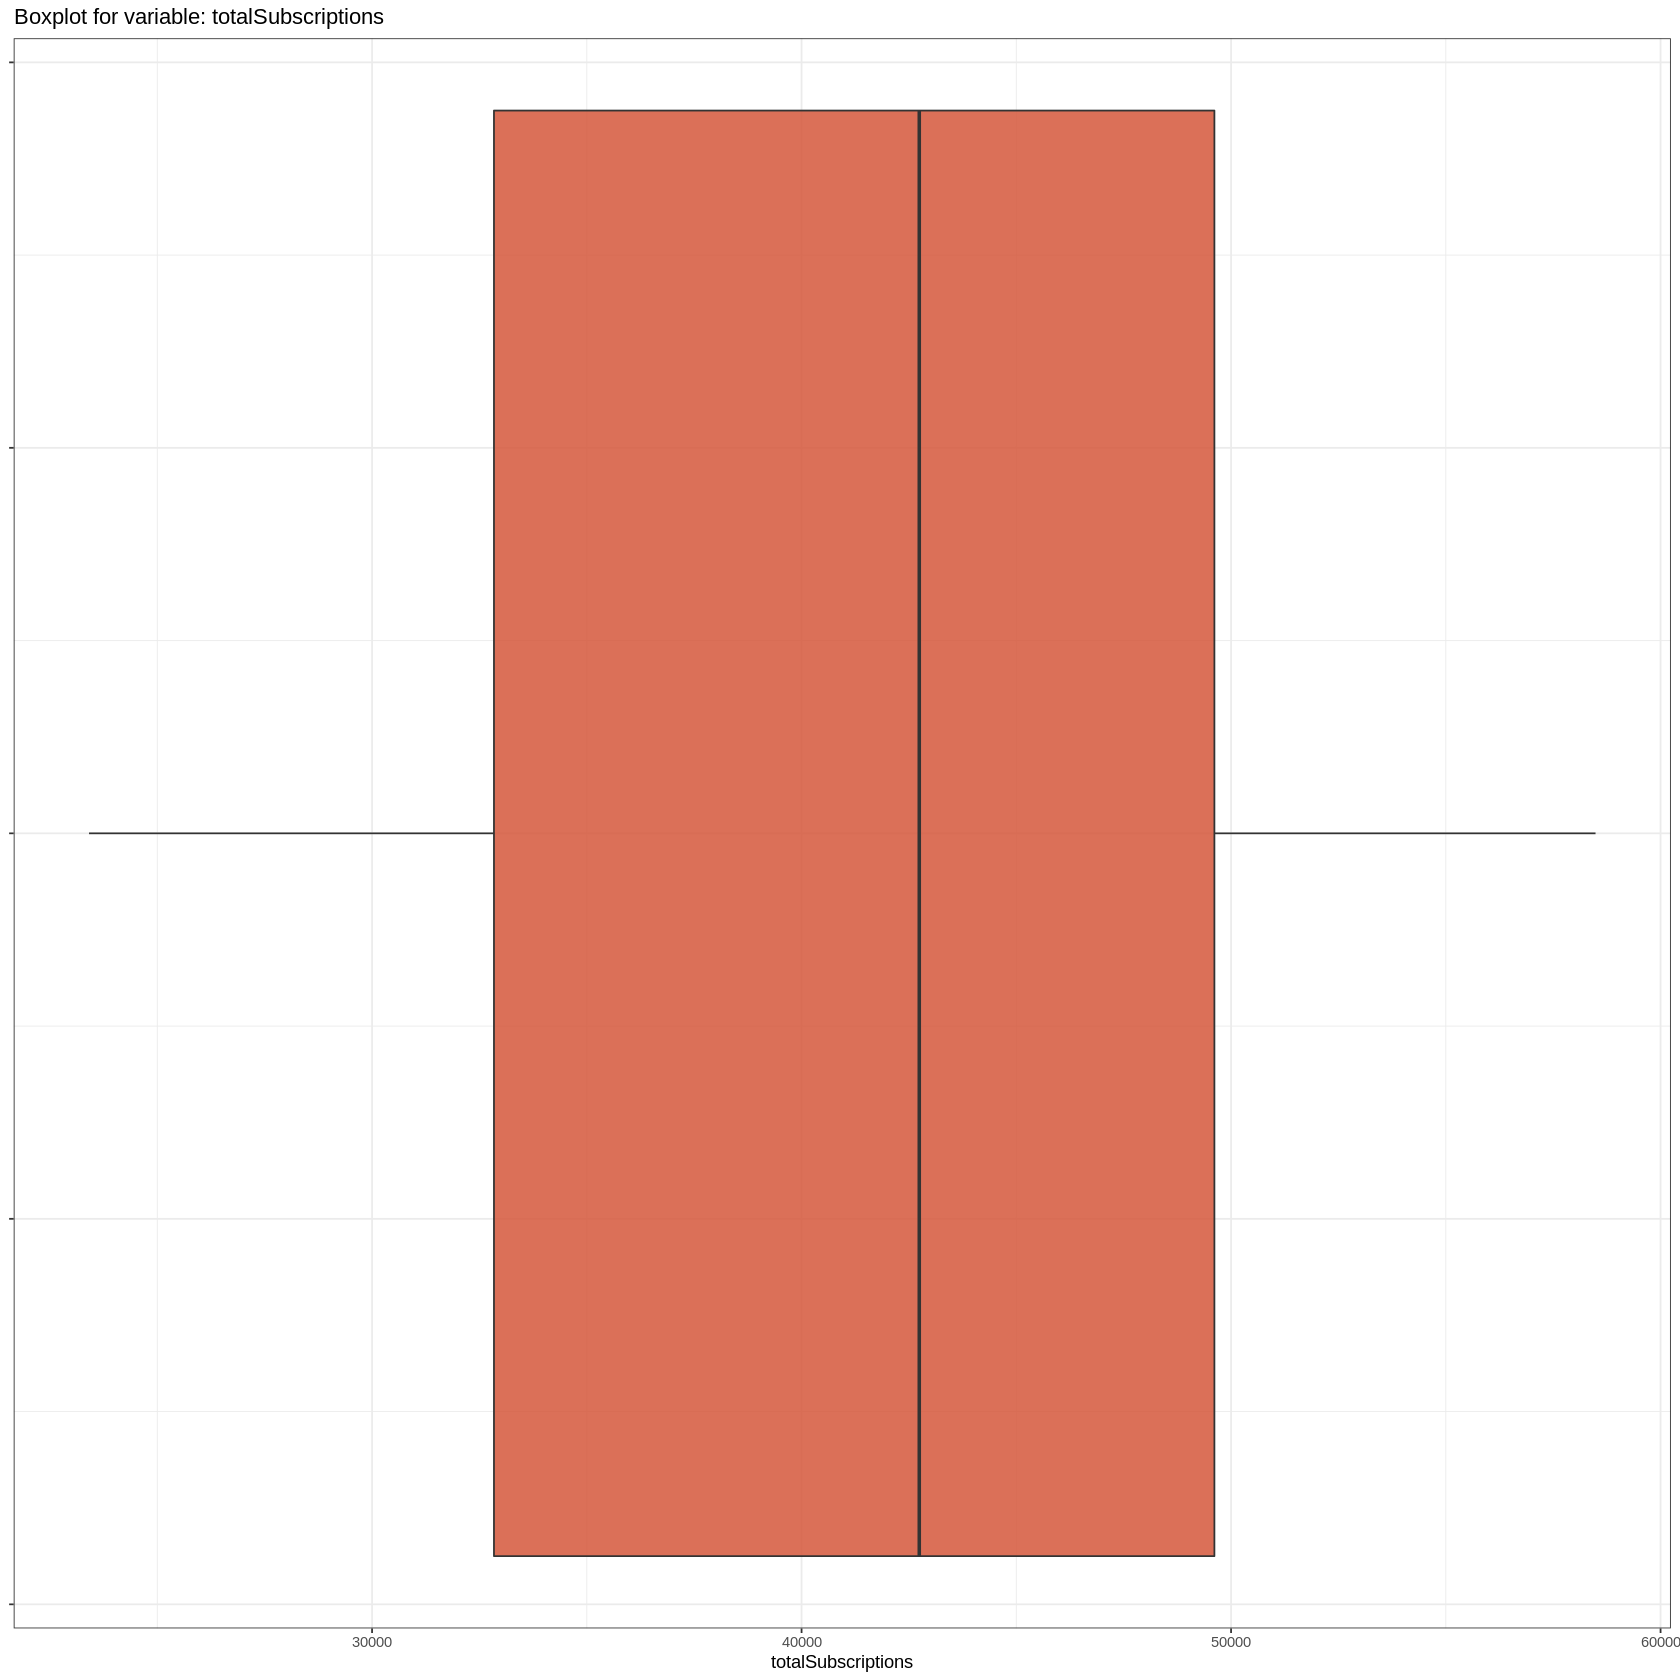

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'totalSubscriptions'

# Criando um gráfico Boxplot para a variável especificada.

boxPlot(col = col, data = data)

O boxplot nos indica que, não há registro do total de assinaturas que seja discrepante dentro do conjunto de dados.

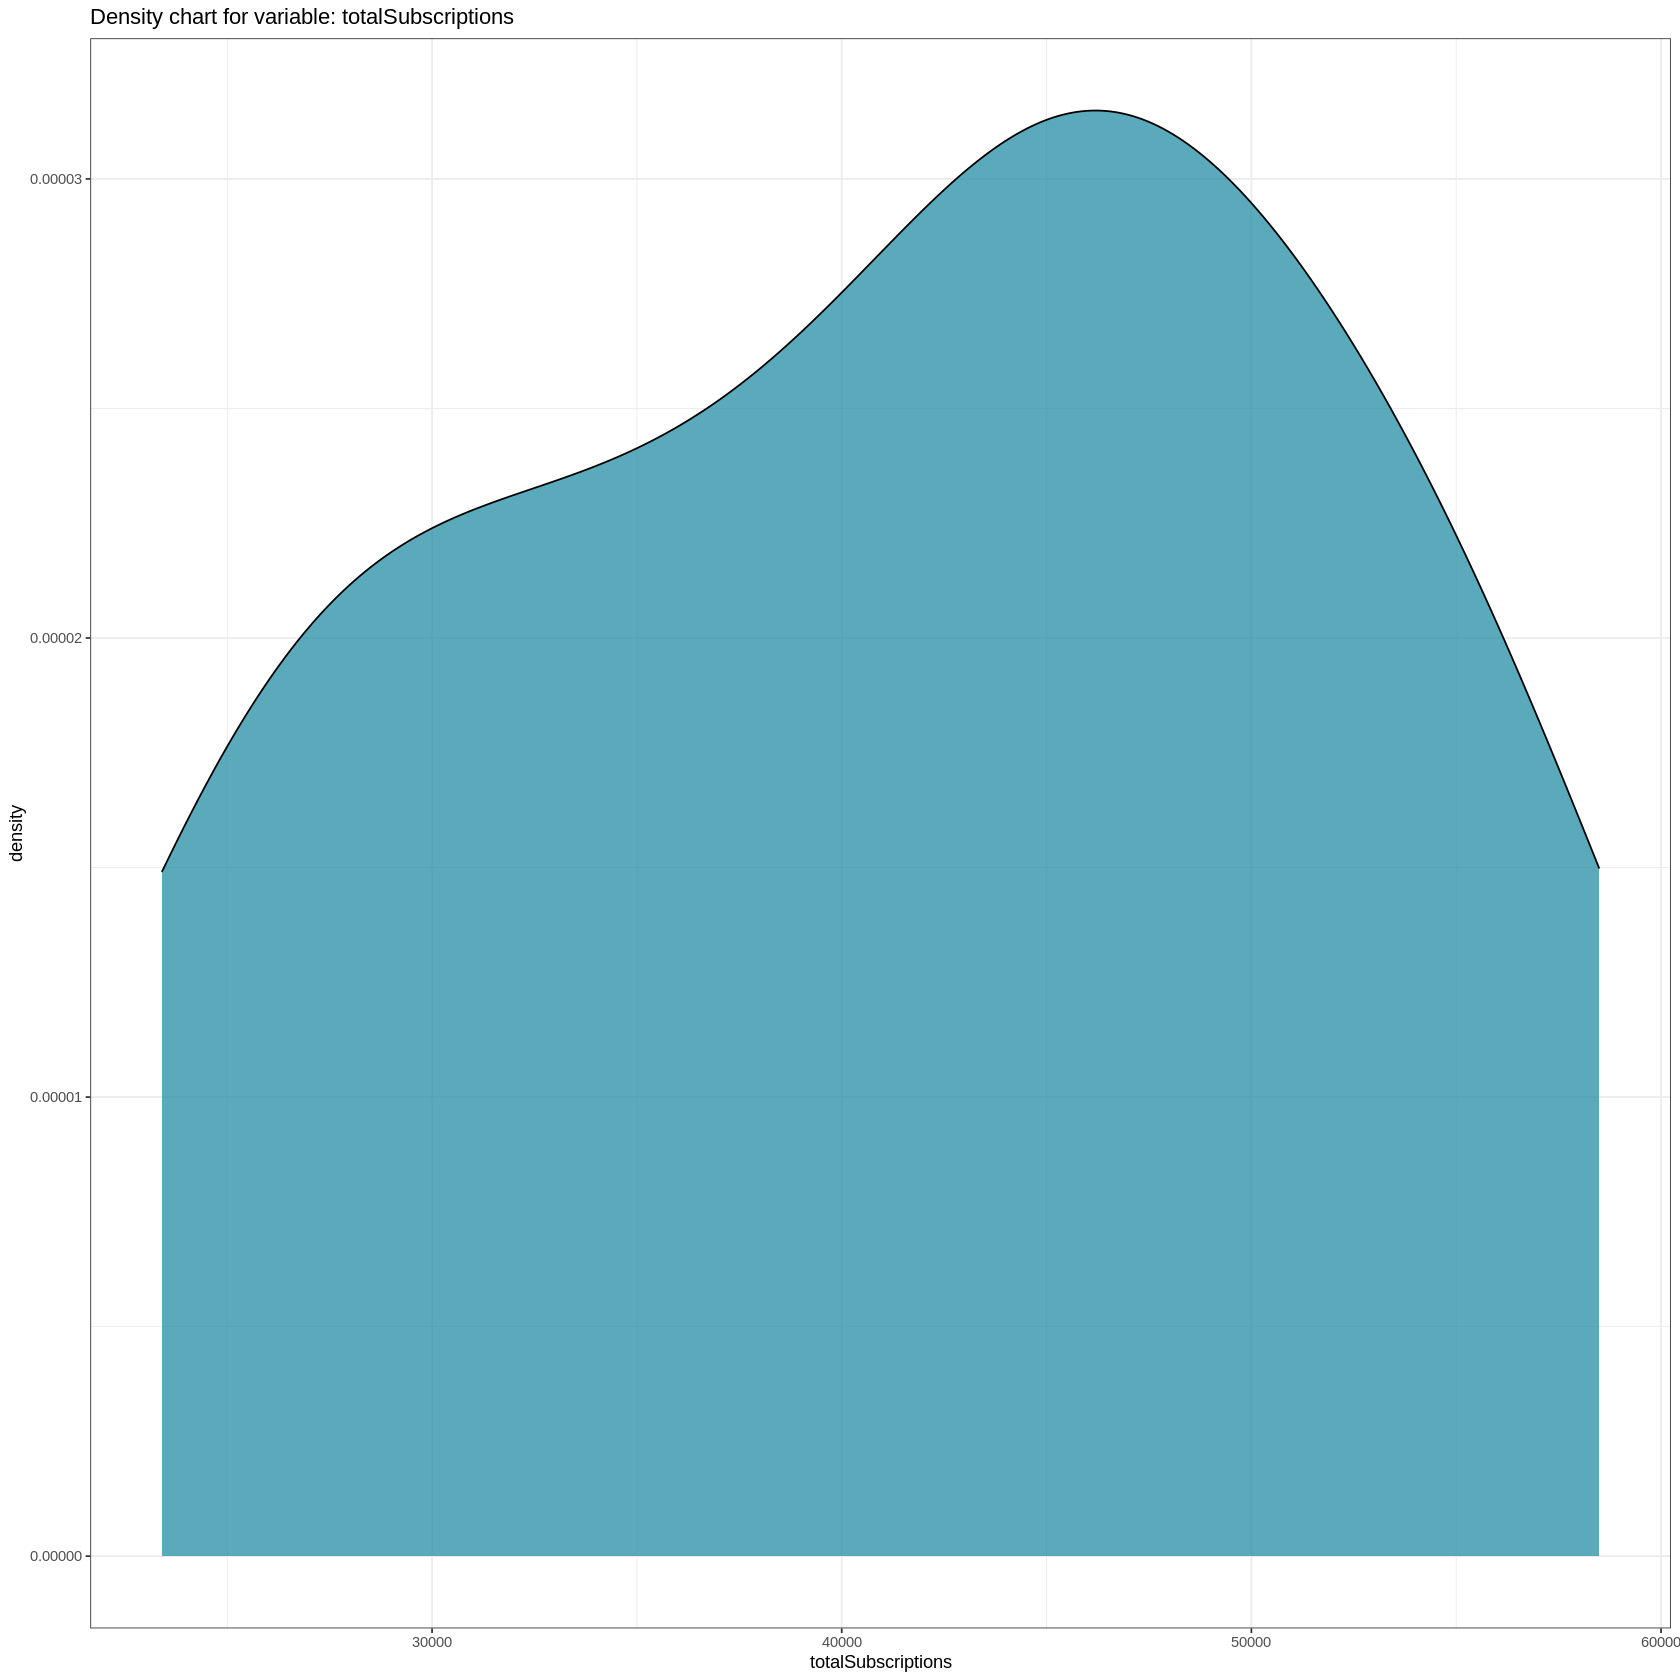

In [ ]:
# Criando um gráfico de Densidade para a variável especificada.

densityPlot(col = col, data = data)

O gráfico de densidade evidência uma assimetria à esquerda para o conjunto de dados, ou seja, os valores inferiores à mediana variam mais do que os superiores.

In [ ]:
# Calculando algumas estatísticas para a variável especificada.

varStats(col, data = data)

Min   Q1    Median  mean     Q3    Max   Sd       Sk        
totalSubscriptions 23410 32838 42740.5 41407.11 49612 58486 10649.09 -0.1514012
                   Ck      
totalSubscriptions -1.24513

Destacamos que:
* A média e a mediana do total de assinaturas apresentam valores próximos; 
* O coeficiente de assimetria (**Sk**) confirma a assimetria à esquerda dos dados e;
* O coeficiente de curtose (**Ck**) evidência que a calda é mais leve do que a normal, ou seja, temos uma *curtose platicúrtica*.

#### **5.3.3 Variável paidSubscriptions**

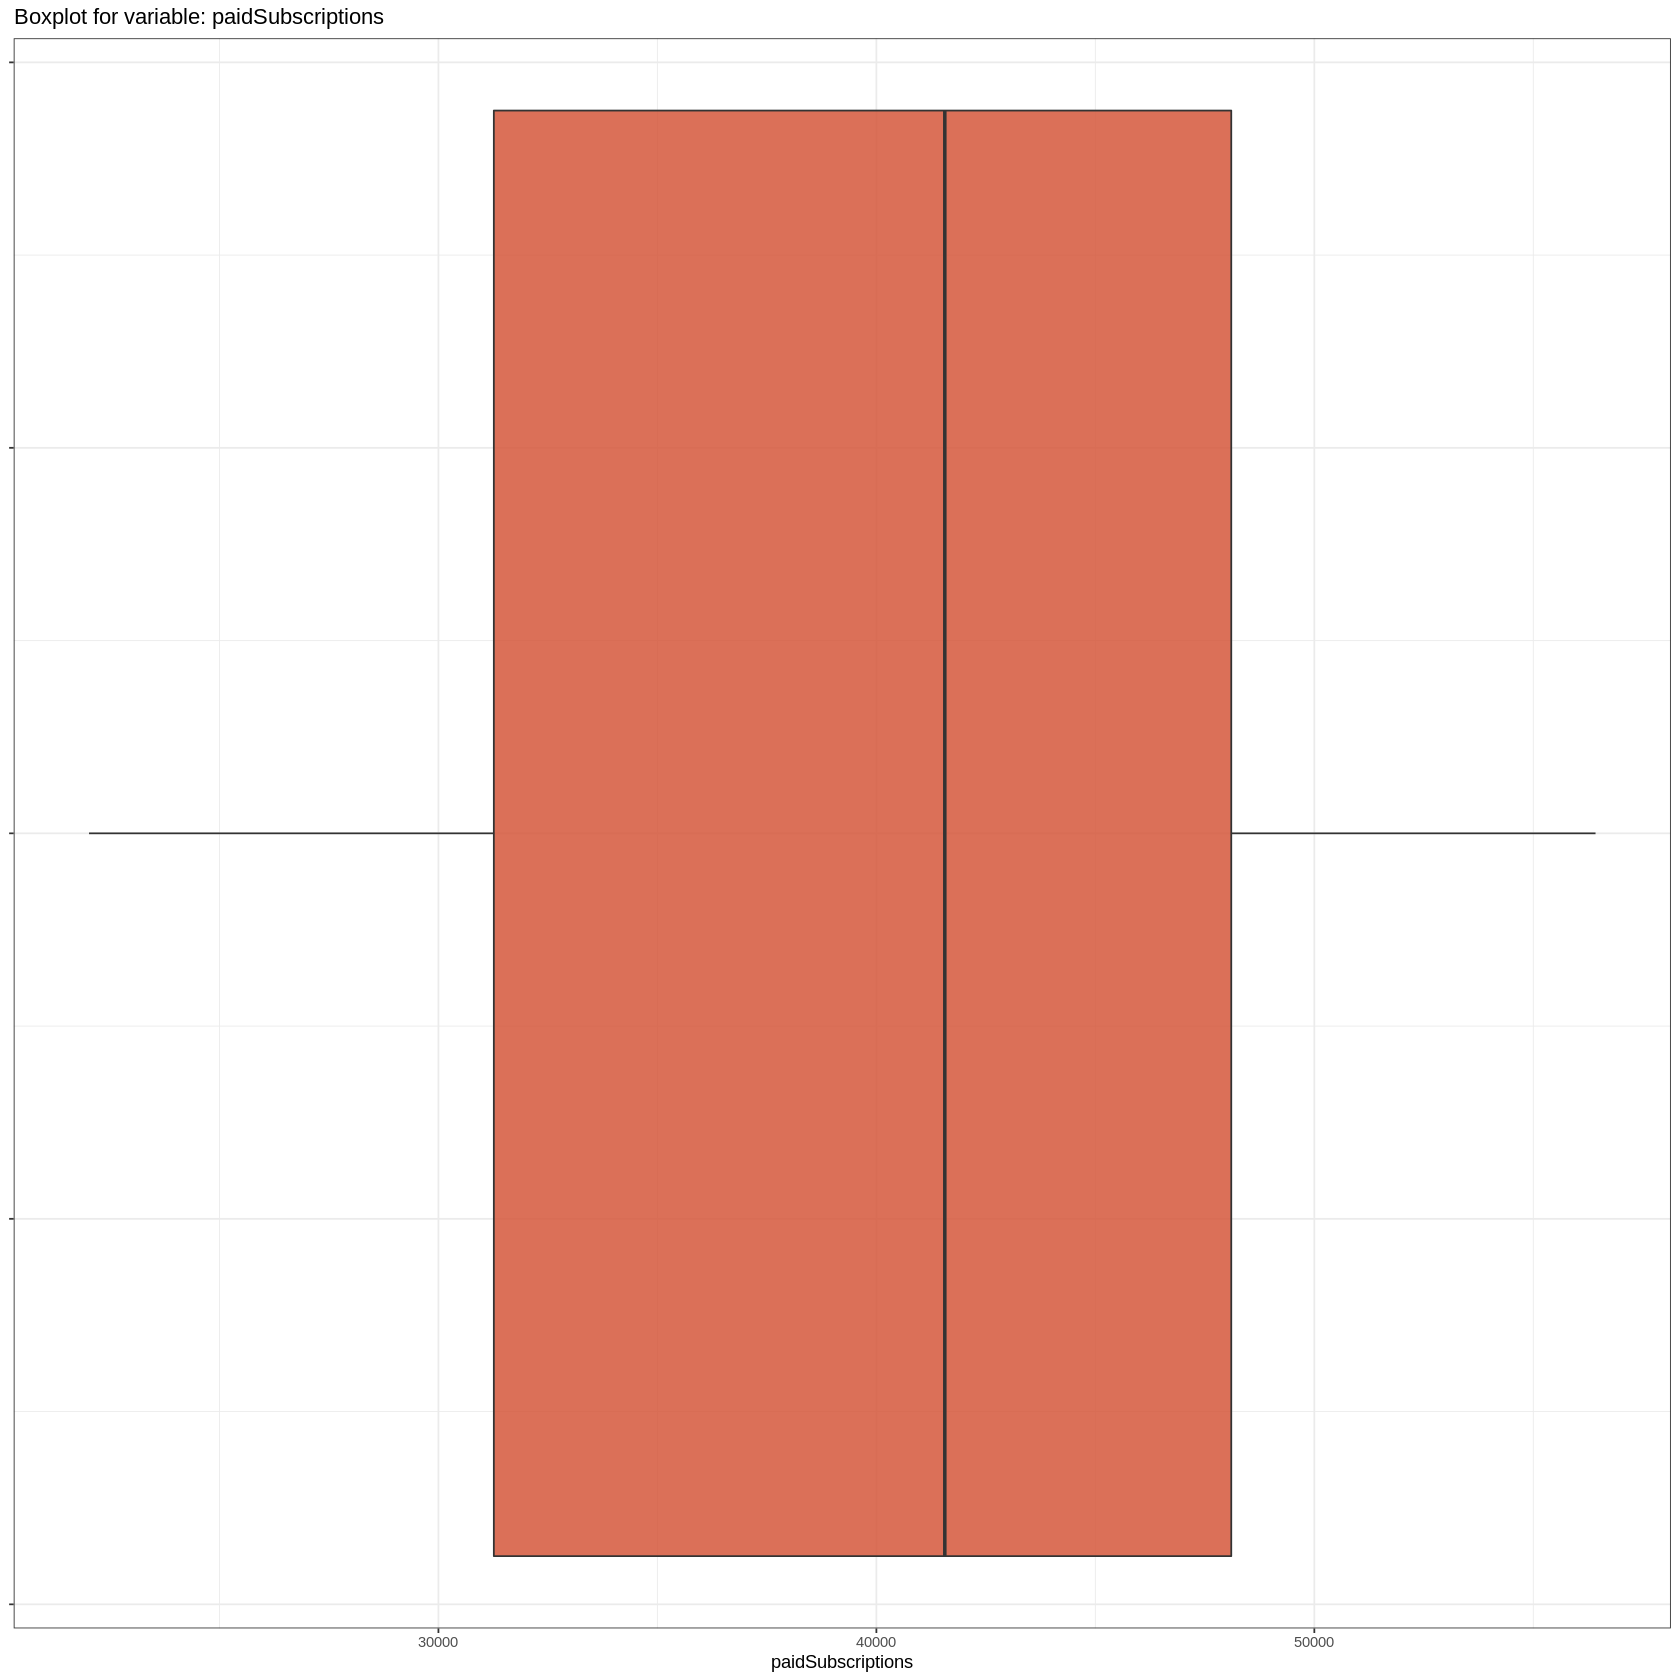

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'paidSubscriptions'

# Criando um gráfico Boxplot para a variável especificada.

boxPlot(col = col, data = data)

O boxplot nos indica que, não há registro do total de assinaturas pagas que seja discrepante dentro do conjunto de dados.

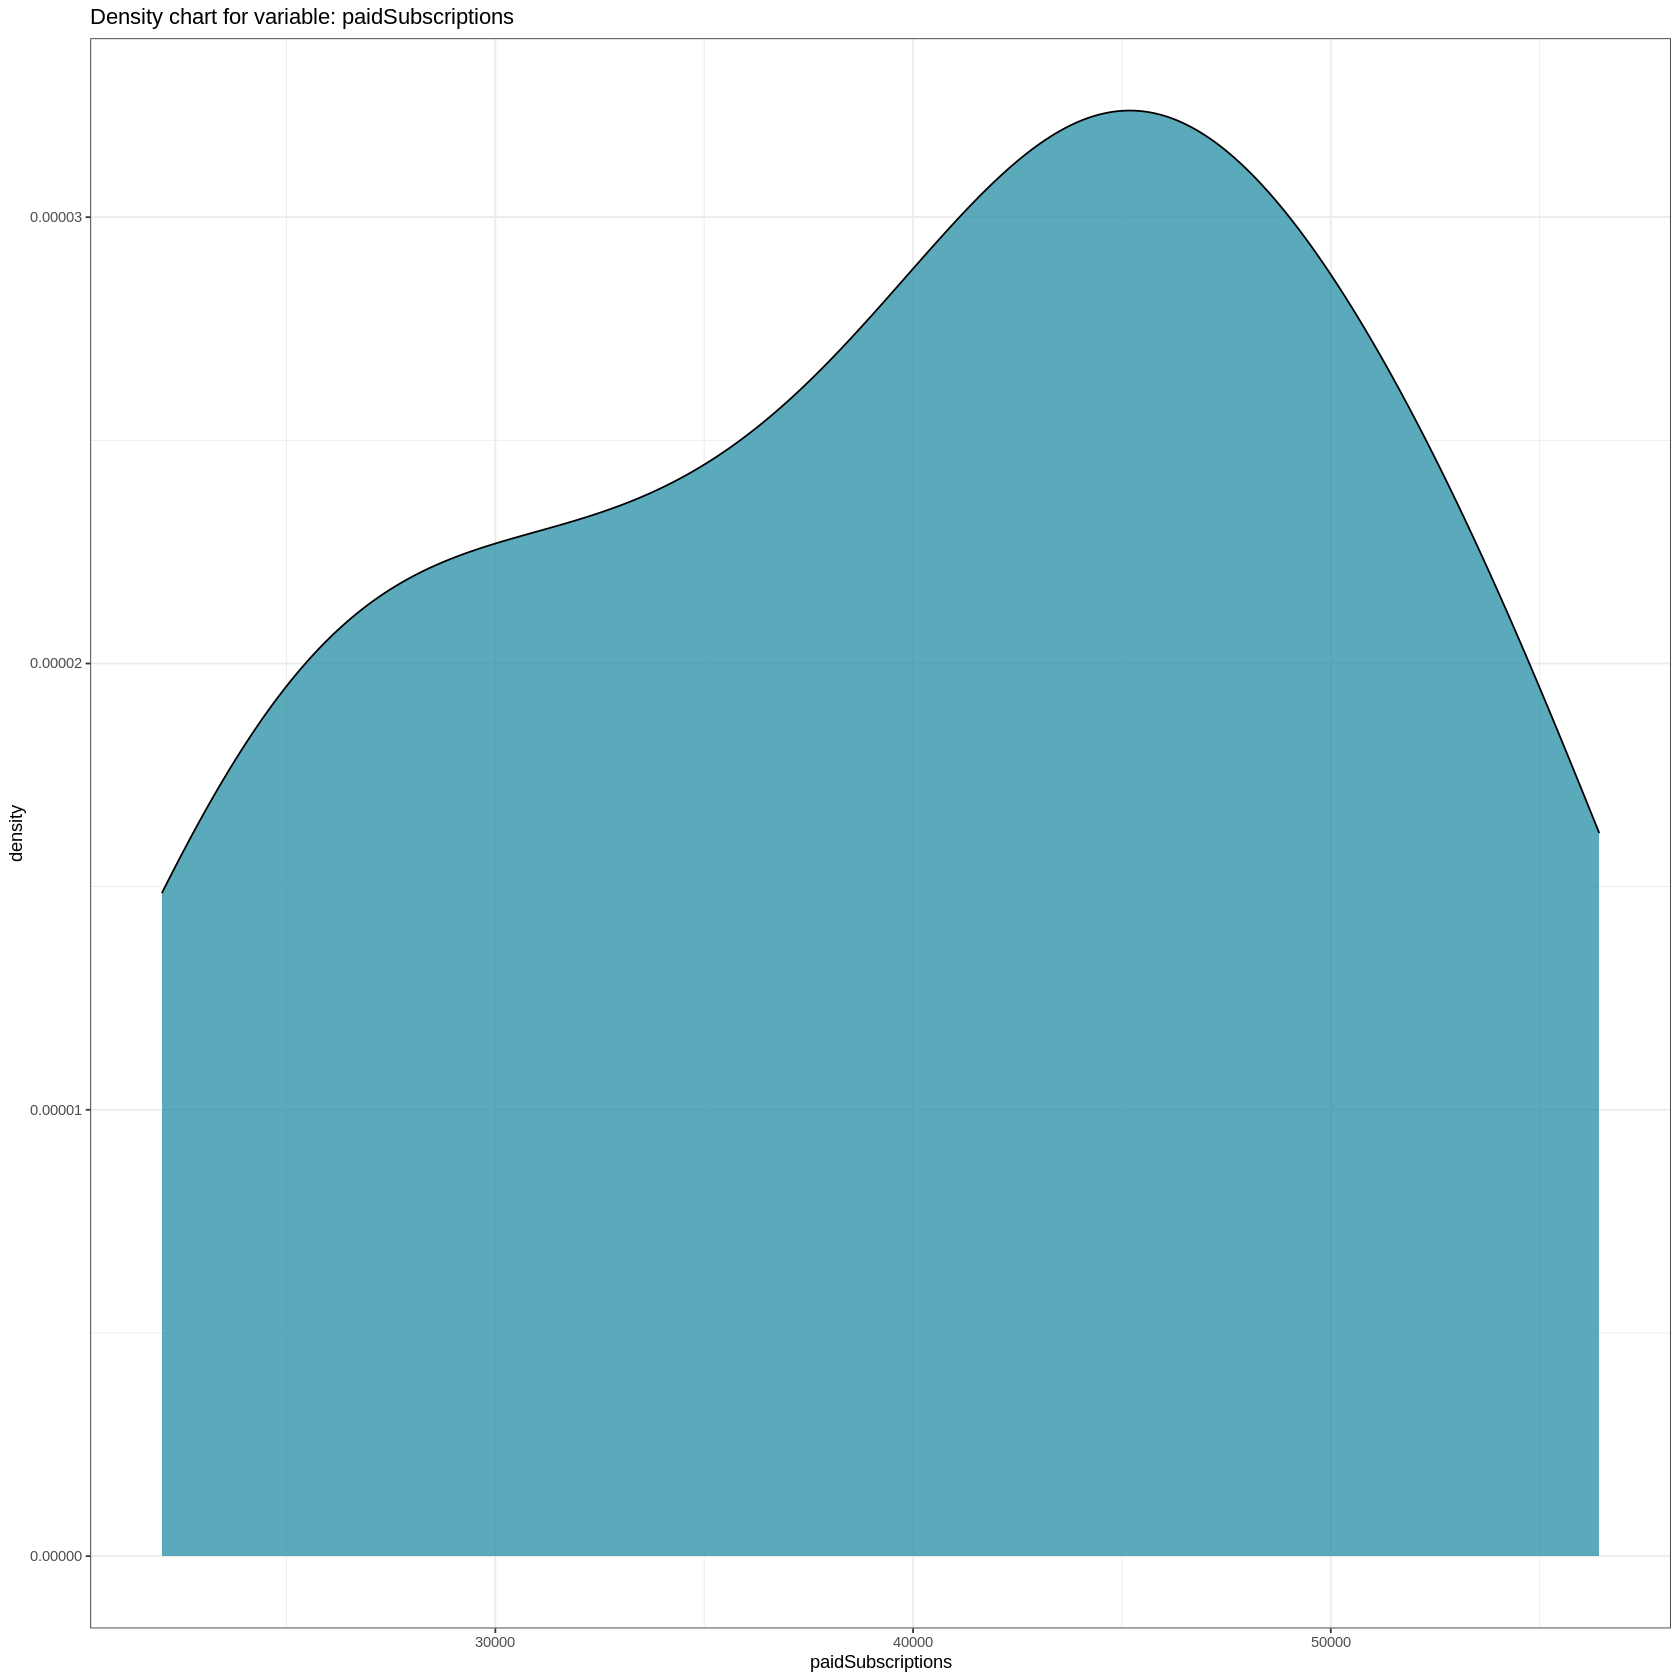

In [ ]:
# Criando um gráfico de Densidade para a variável especificada.

densityPlot(col = col, data = data)

O gráfico de densidade evidência uma assimetria à esquerda para o conjunto de dados, ou seja, os valores inferiores à mediana variam mais do que os superiores.

In [ ]:
# Calculando algumas estatísticas para a variável especificada.

varStats(col, data = data)

Min   Q1       Median  mean     Q3       Max   Sd      
paidSubscriptions 22022 31265.25 41562.5 40031.71 48103.25 56421 10549.02
                  Sk         Ck       
paidSubscriptions -0.1846556 -1.247453

Destacamos que:
* A média e a mediana do total de assinaturas pagas apresentam valores próximos; 
* O coeficiente de assimetria (**Sk**) confirma a assimetria à esquerda dos dados e;
* O coeficiente de curtose (**Ck**) evidência que a calda é mais leve do que a normal, ou seja, temos uma *curtose platicúrtica*.

**Observação:** As estatísticas das variáveis **totalSubscriptions** e **paidSubscriptions** são muito semelhantes. Isto pode se dar ao fato de uma ser um subconjunto da outra, visto que para pagar a assinatura o cliente deve ser um assinante. Pode ser interessante verificar, se as diferenças entre estas variáveis são estatisticamente significativas, e faremos isso nas próximas etapas.

#### **5.3.4 Variável freeTrails**

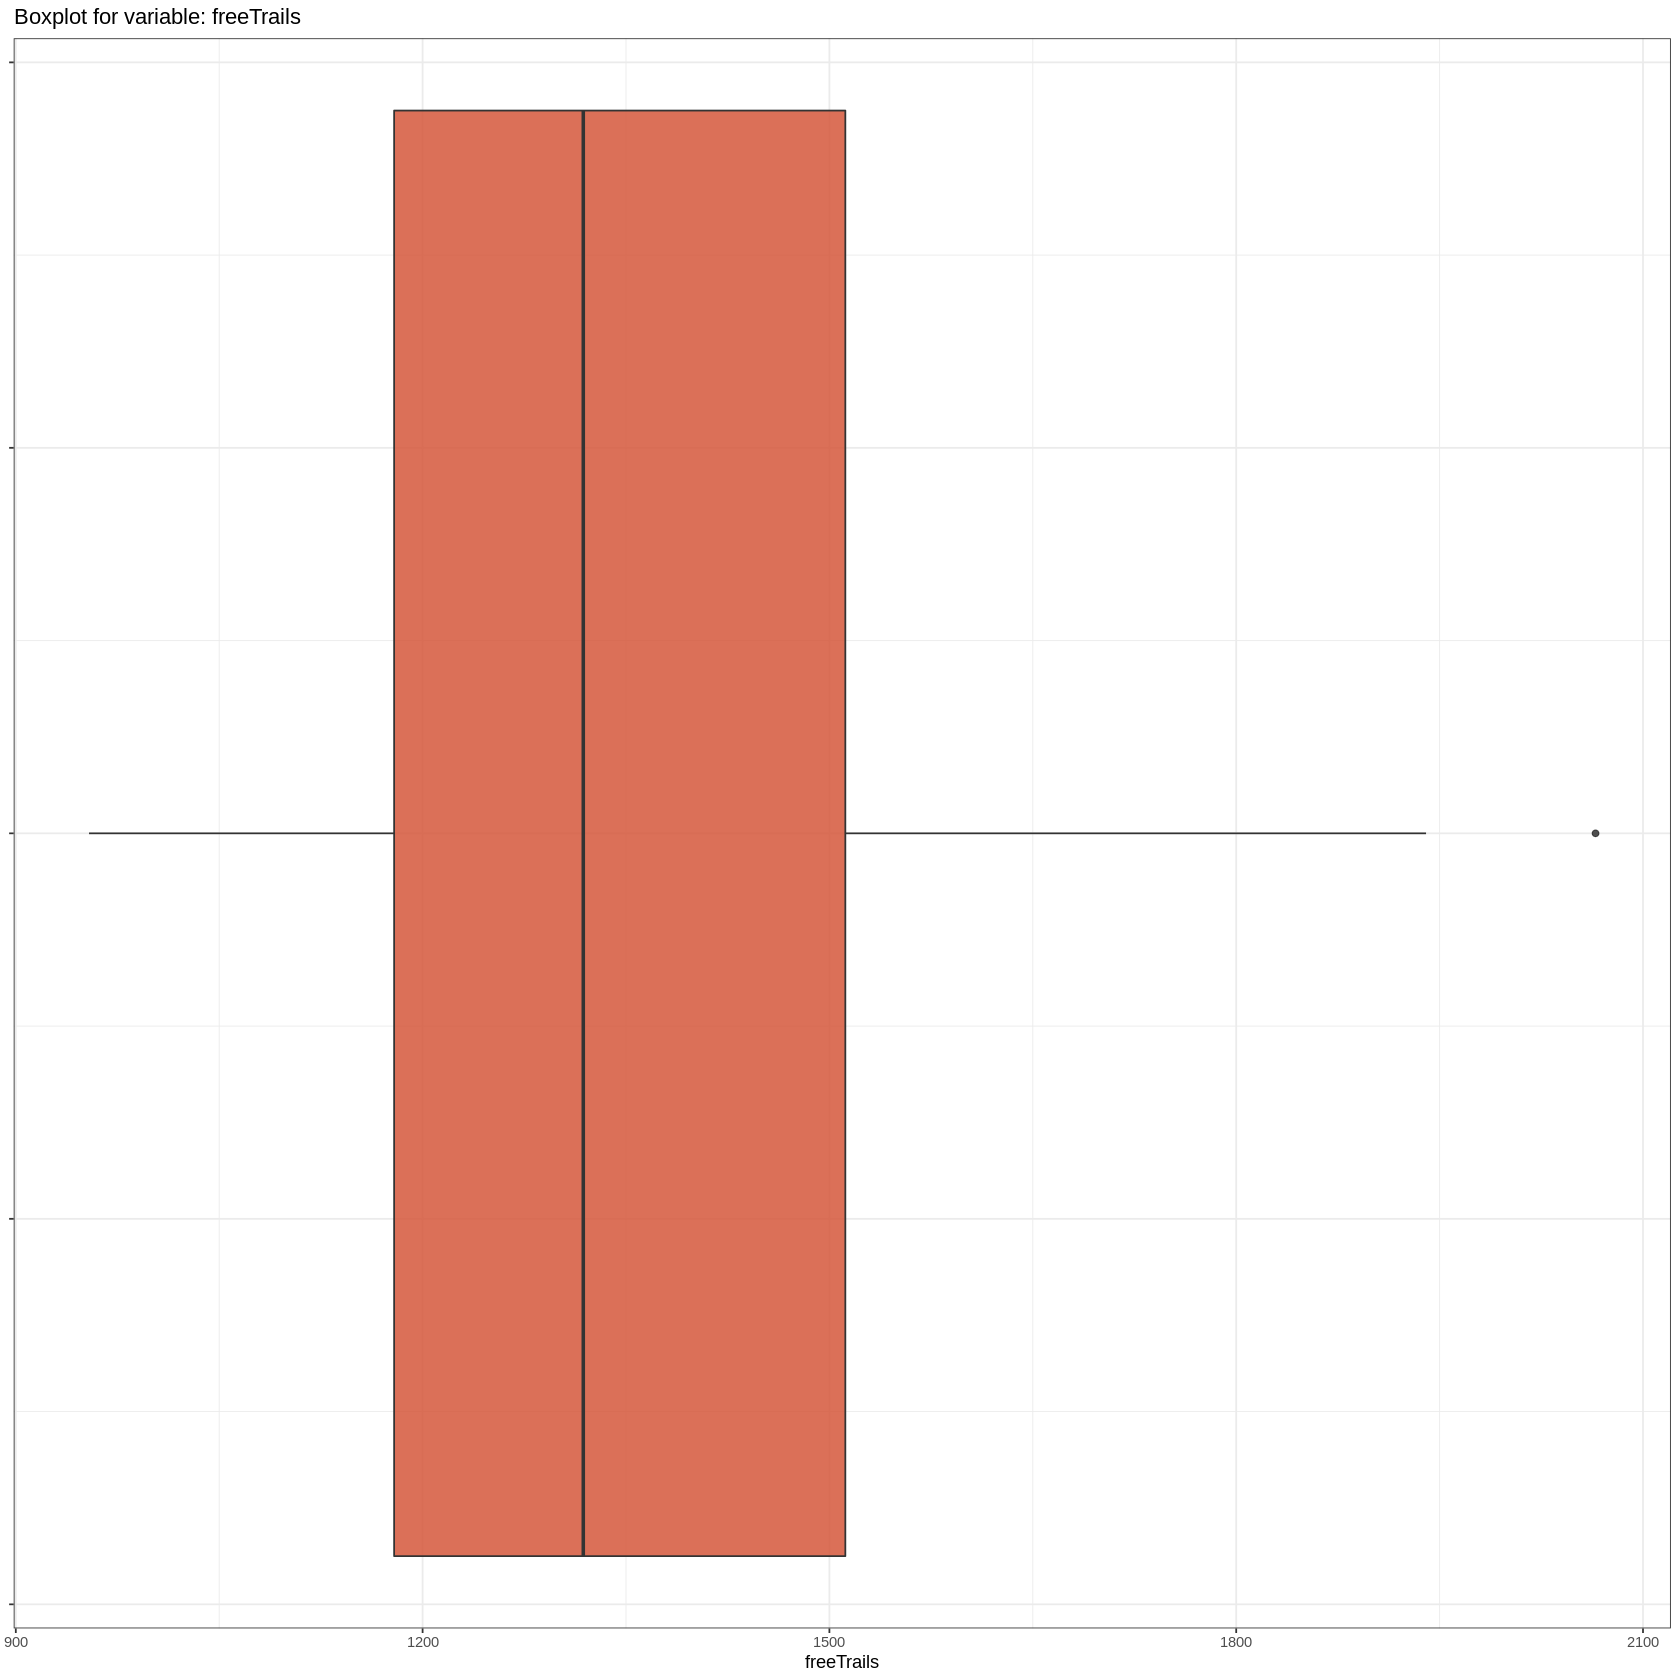

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'freeTrails'

# Criando um gráfico Boxplot para a variável especificada.

boxPlot(col = col, data = data)

O boxplot nos indica que, há um registro do número de assinantes em período de utilização gratuita discrepante dentro do conjunto de dados. Vemos que o outlier está localizado no limite superior do gráfico, ou seja, há um registro em que o aumento das assinaturas em período de utilização experimental fugiu do padrão, indicando que nesta época o número de clientes interessados em conhecer os serviços da Netflix aumentou consideravelmente. 

Vamos identificar qual é este registro!

In [ ]:
# Extraindo registros, em que o valor da variável especificada, tenha sido considerado um outlier.

getOutliers(col = col, data = data)

date       totalSubscriptions paidSubscriptions freeTrails revenue
1 2018-12-31 58486              56421             2065       1996092
  costOfRevenues marketing contributionProfit contributionMargin
1 1093446        312739    589907             0.296             
  costPerCustomer revenuePerCustomer earningsPerCustomer segment   month   
1 18.69586        34.1294            15.43354            Streaming December
  year freeTrialsFromTotal marketingFromTotal
1 2018 3.530759            22.24025

Interessante! O **quarto trimestre de 2018** apresentou o valor destoante, e pode estar indicando que o número de assinantes em período de utilização gratuita, pode vir a crescer significativamente no próximo ano.

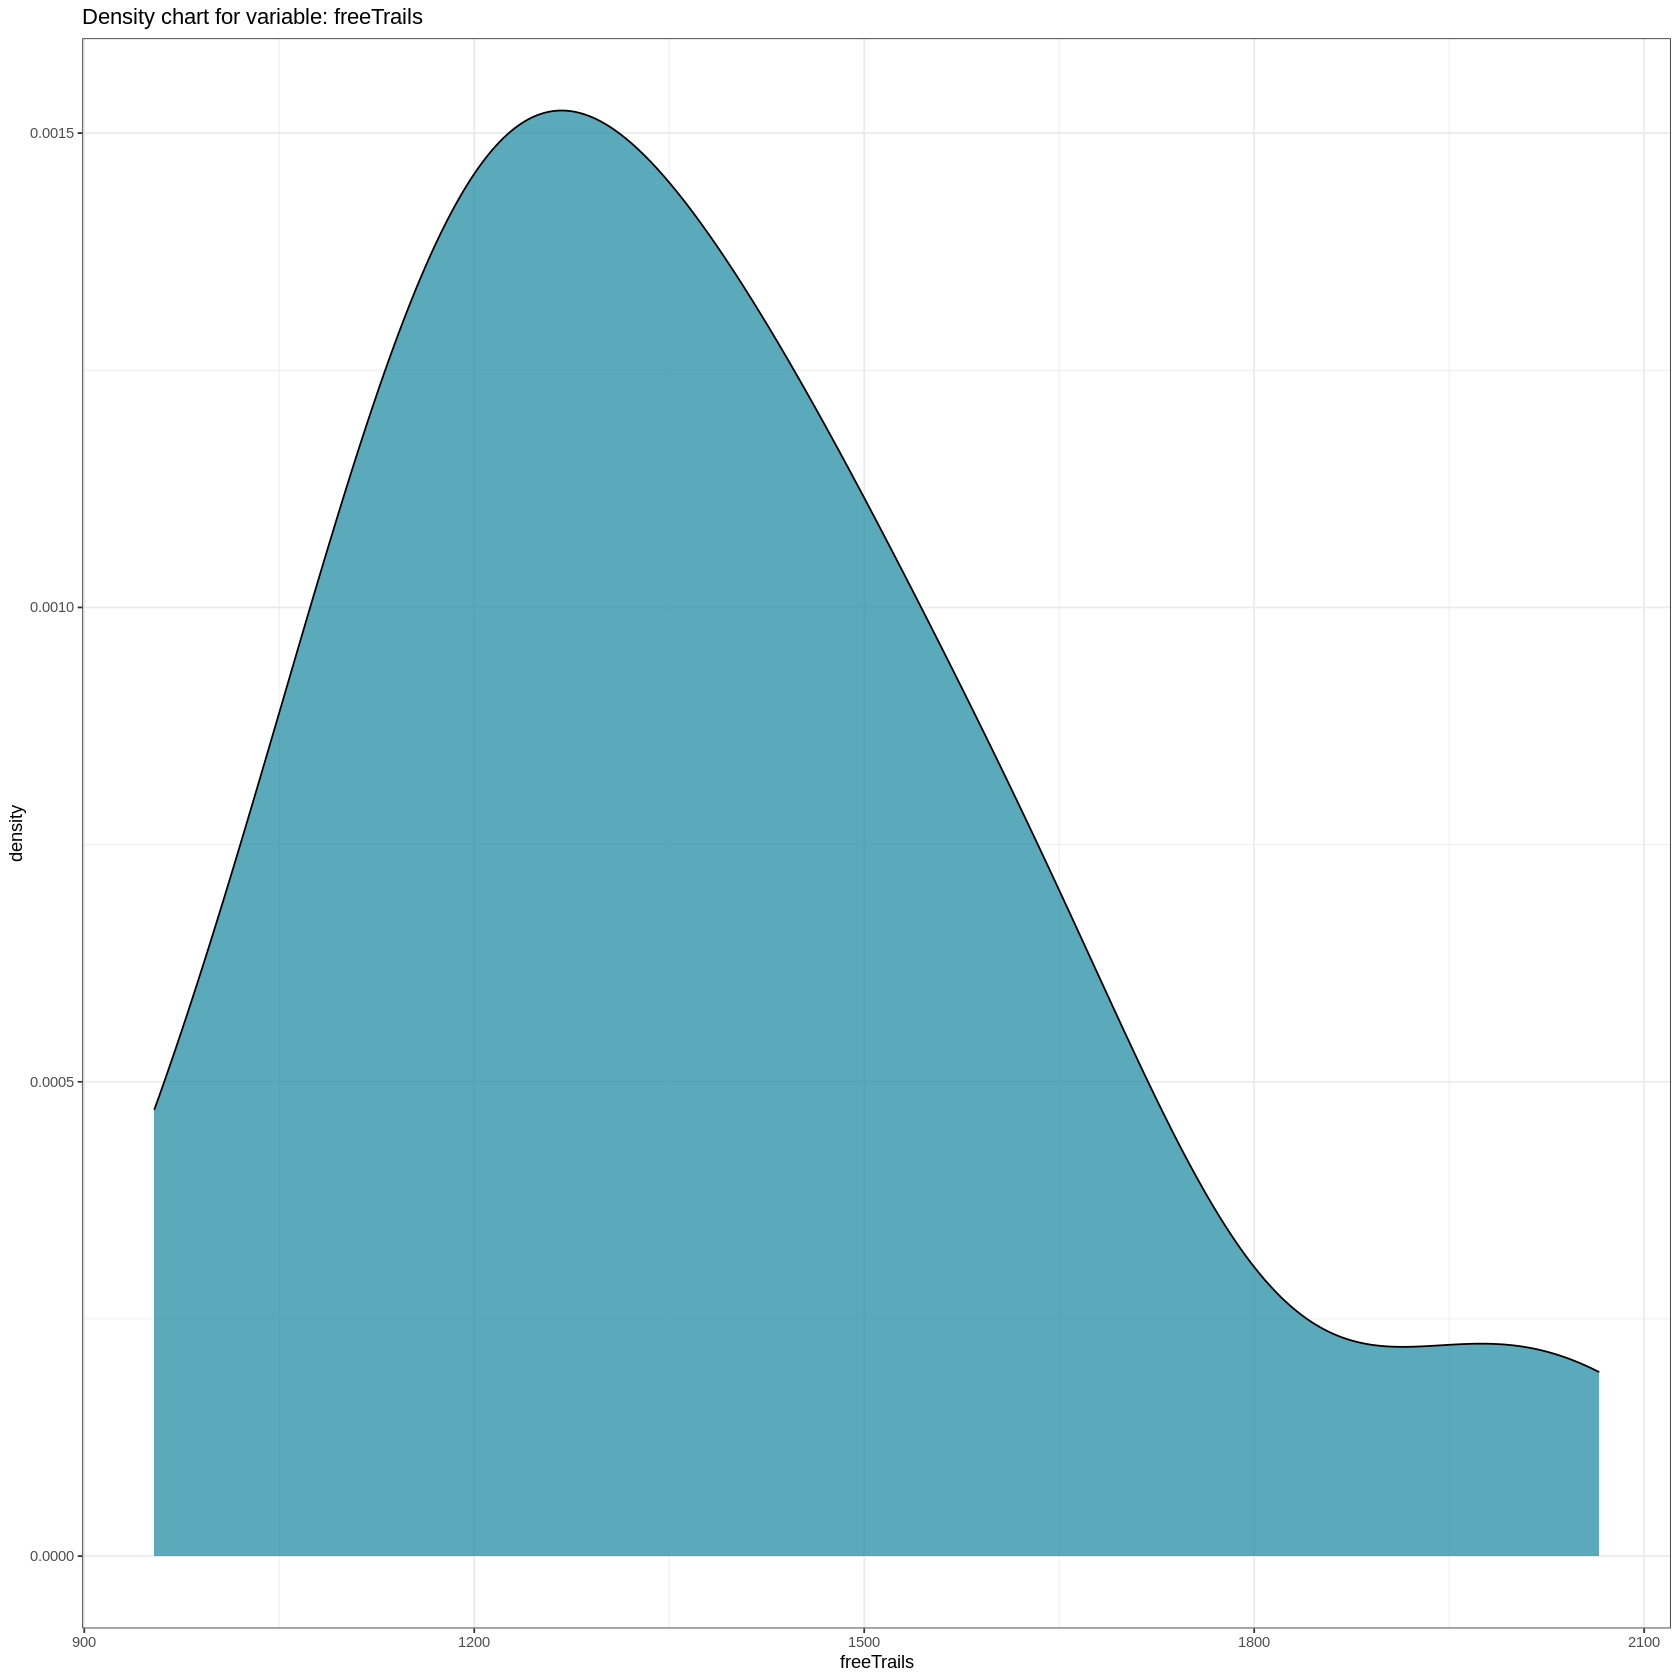

In [ ]:
# Criando um gráfico de Densidade para a variável especificada.

densityPlot(col = col, data = data)

O gráfico de densidade evidência uma assimetria à direita para o conjunto de dados, ou seja, os valores superiores à mediana variam mais do que os inferiores.

In [ ]:
# Calculando algumas estatísticas para a variável especificada.

varStats(col, data = data)

Min Q1   Median mean     Q3      Max  Sd       Sk        Ck       
freeTrails 954 1179 1318.5 1375.393 1511.75 2065 264.2011 0.7547665 0.1175865

Destacamos que:

* A média e a mediana do número de assinantes em período de utilização gratuita apresentam valores próximos; 
* O coeficiente de assimetria (**Sk**) confirma a assimetria à direita dos dados e;
* O coeficiente de curtose (**Ck**) evidência que a calda é mais pesada do que a normal, ou seja, temos uma *curtose leptocúrtica*.


#### **5.3.5 Variável revenue**

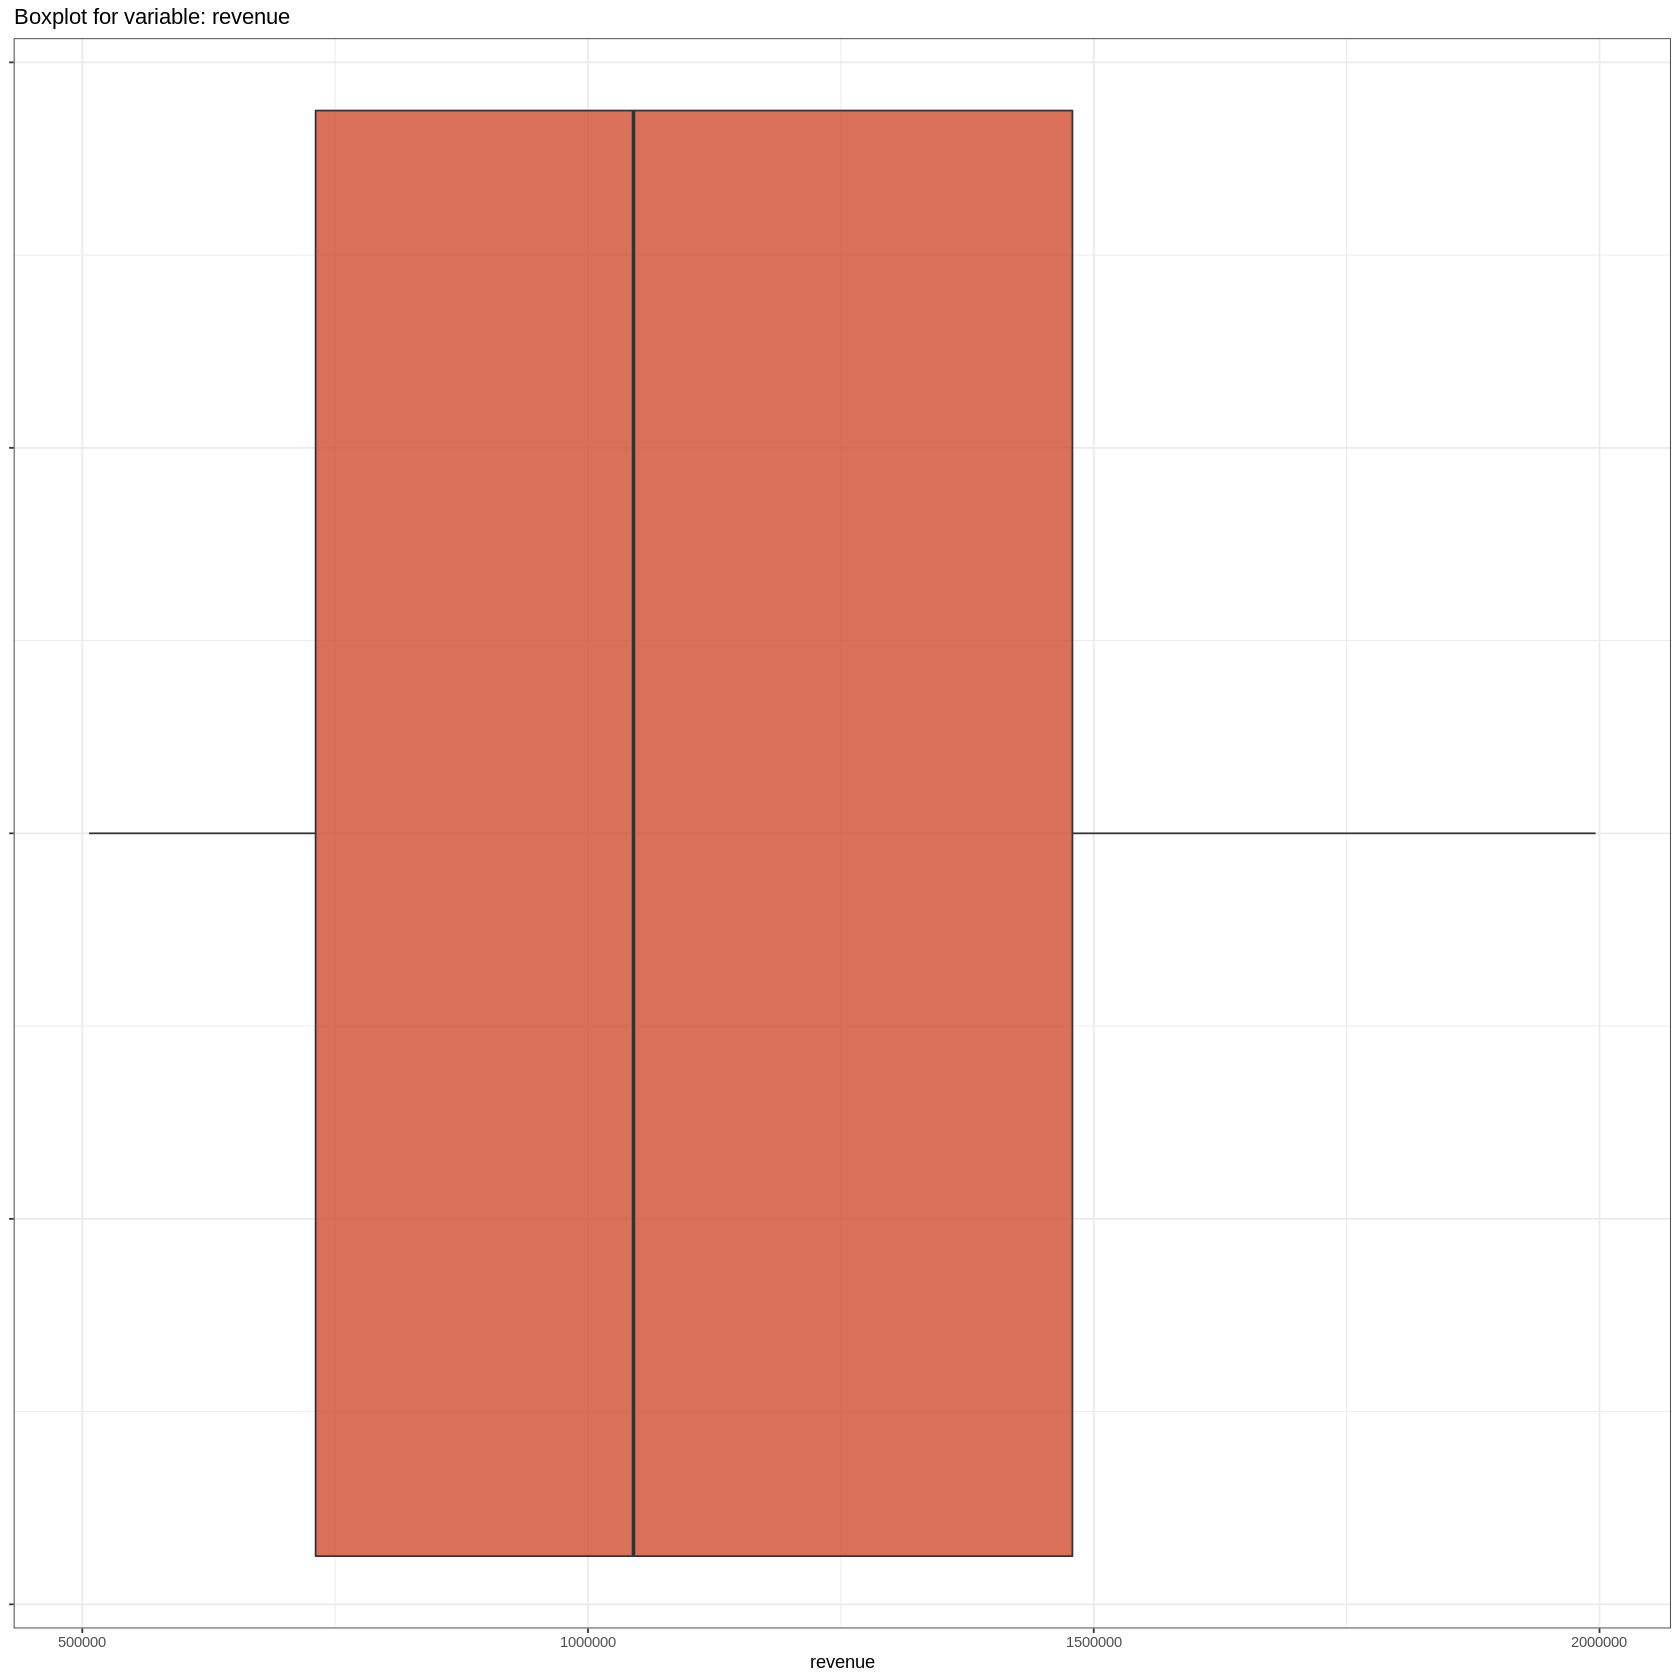

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'revenue'

# Criando um gráfico Boxplot para a variável especificada.

boxPlot(col = col, data = data)

O boxplot nos indica que, não há registro de receita que seja discrepante dentro do conjunto de dados.

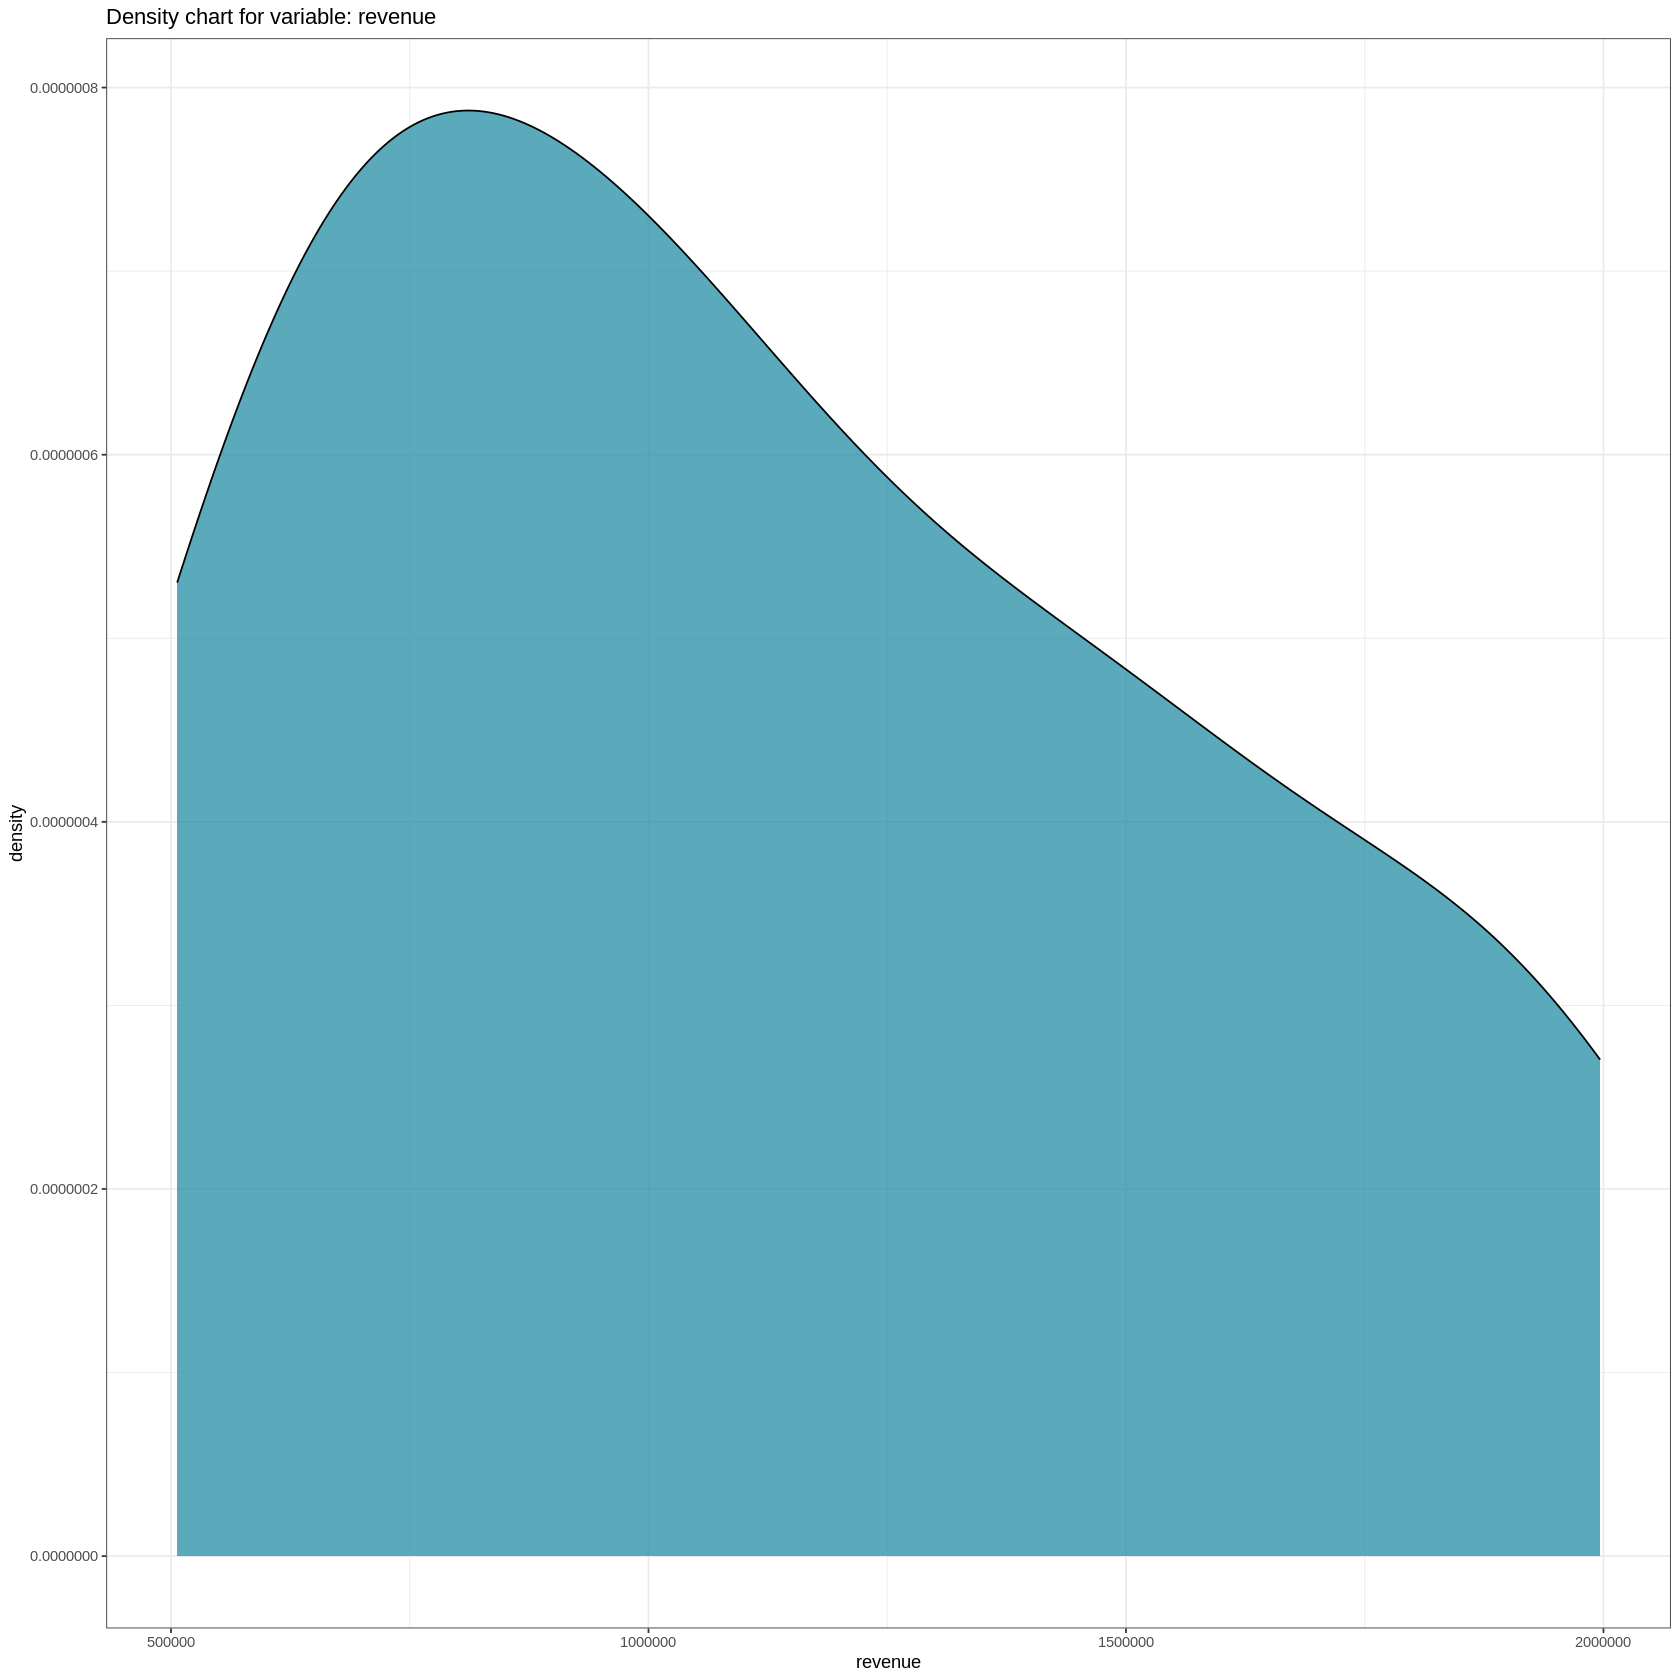

In [ ]:
# Criando um gráfico de Densidade para a variável especificada.

densityPlot(col = col, data = data)

O gráfico de densidade evidência uma assimetria à direita para o conjunto de dados, ou seja, os valores superiores à mediana variam mais do que os inferiores.

In [ ]:
# Calculando algumas estatísticas para a variável especificada.

varStats(col, data = data)

Min    Q1       Median  mean    Q3      Max     Sd     Sk       
revenue 506665 730686.2 1044937 1122321 1478906 1996092 461386 0.4184065
        Ck       
revenue -1.126538

Destacamos que:

* A média e a mediana da receita apresentam valores próximos; 
* O coeficiente de assimetria (**Sk**) confirma a assimetria à direita dos dados e;
* O coeficiente de curtose (**Ck**) evidência que a calda é mais leve do que a normal, ou seja, temos uma *curtose platicúrtica*. 


#### **5.3.6 Variável costOfRevenues**

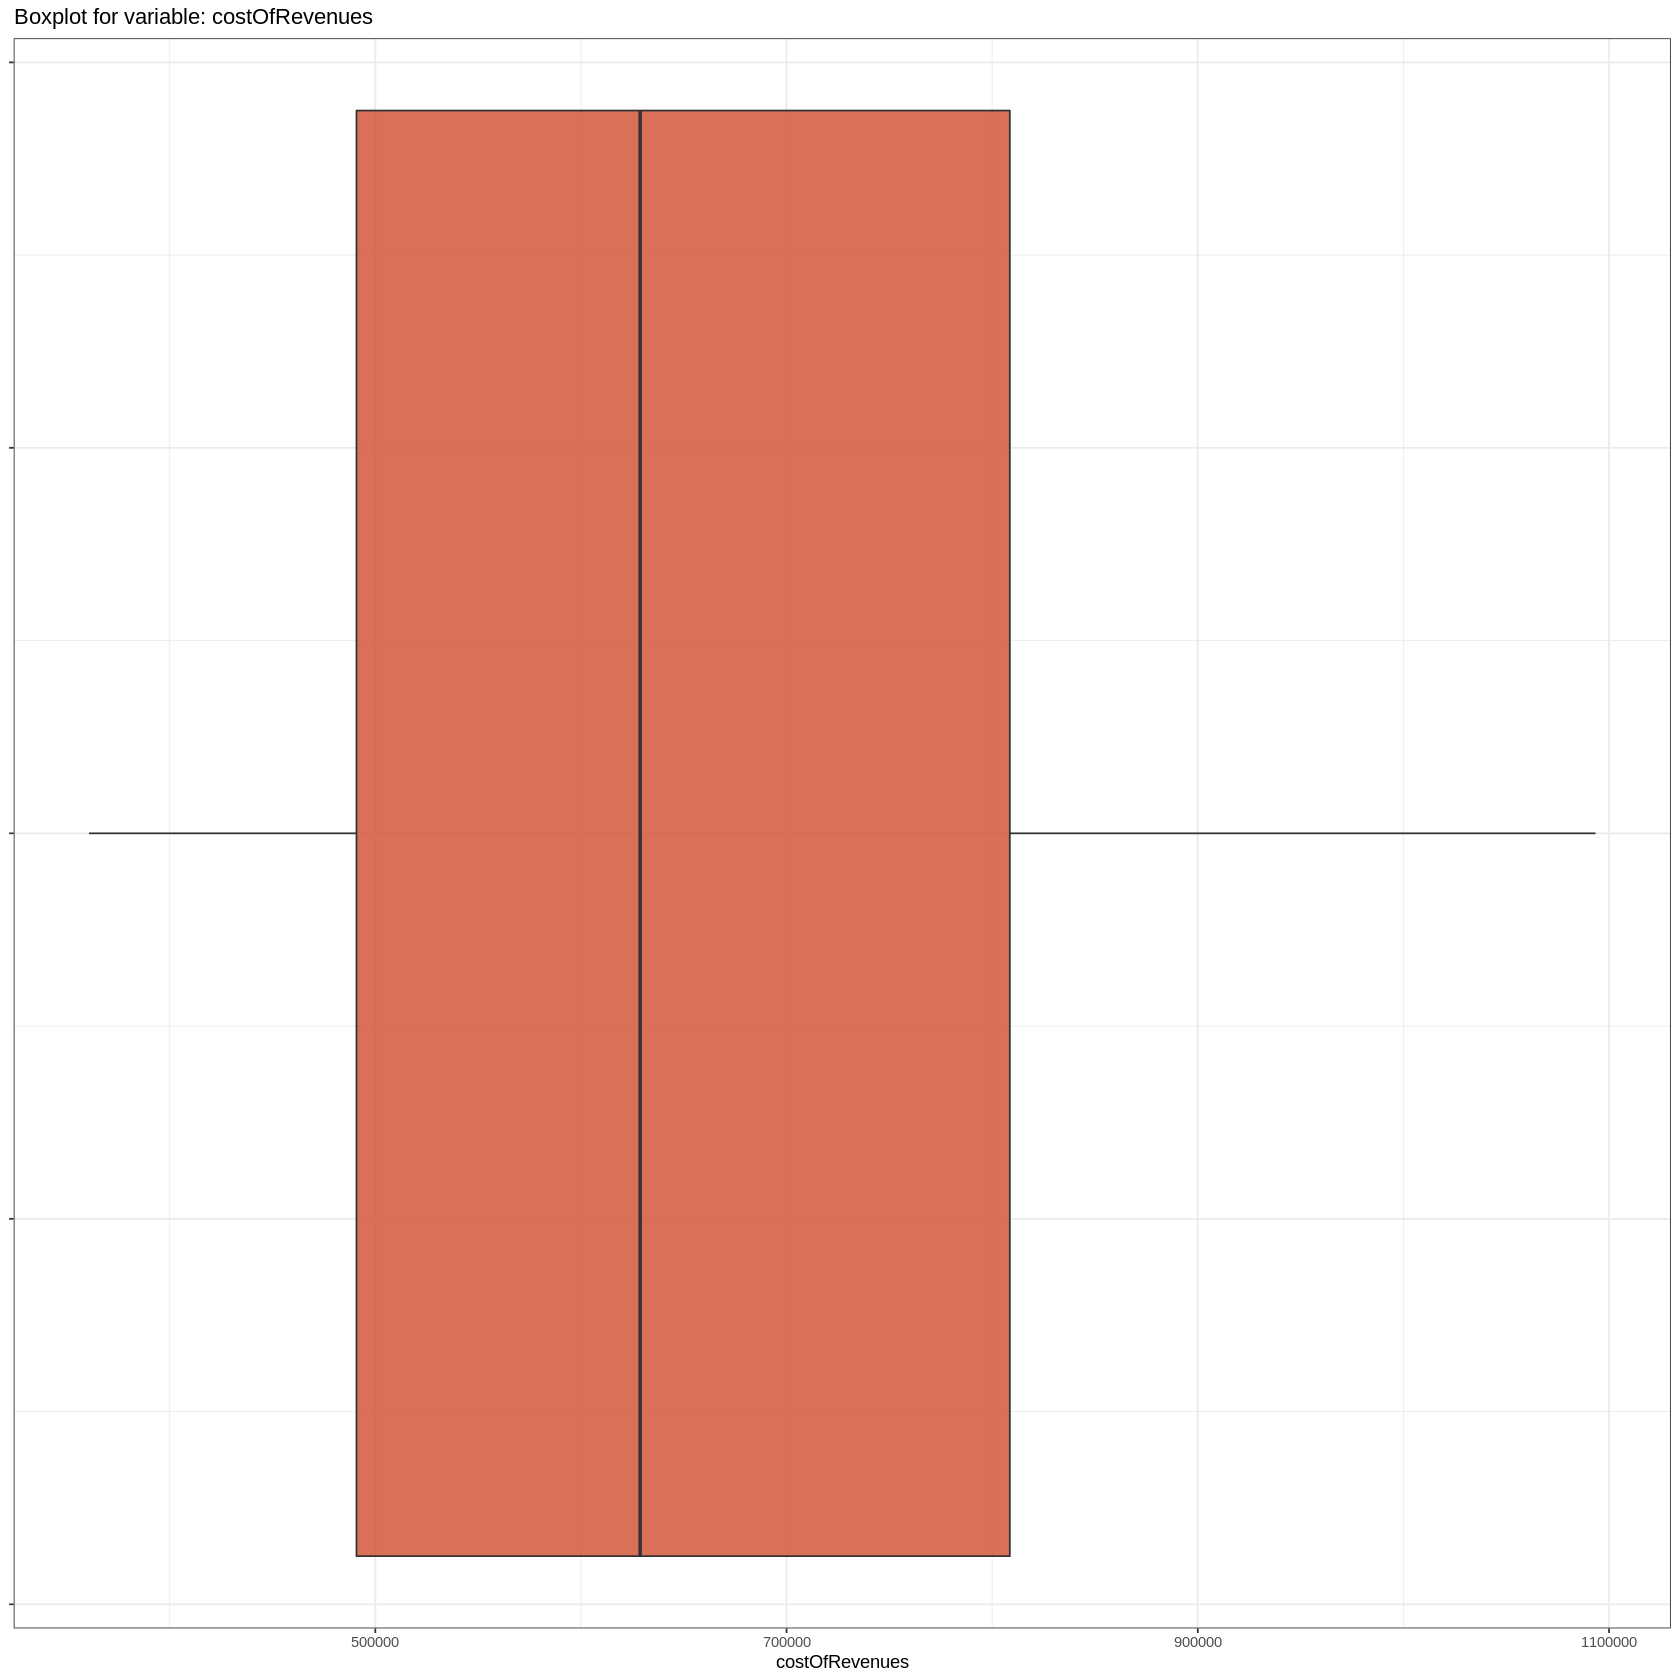

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'costOfRevenues'

# Criando um gráfico Boxplot para a variável especificada.

boxPlot(col = col, data = data)

O boxplot nos indica que, não há registro do custo de receita que seja discrepante dentro do conjunto de dados.

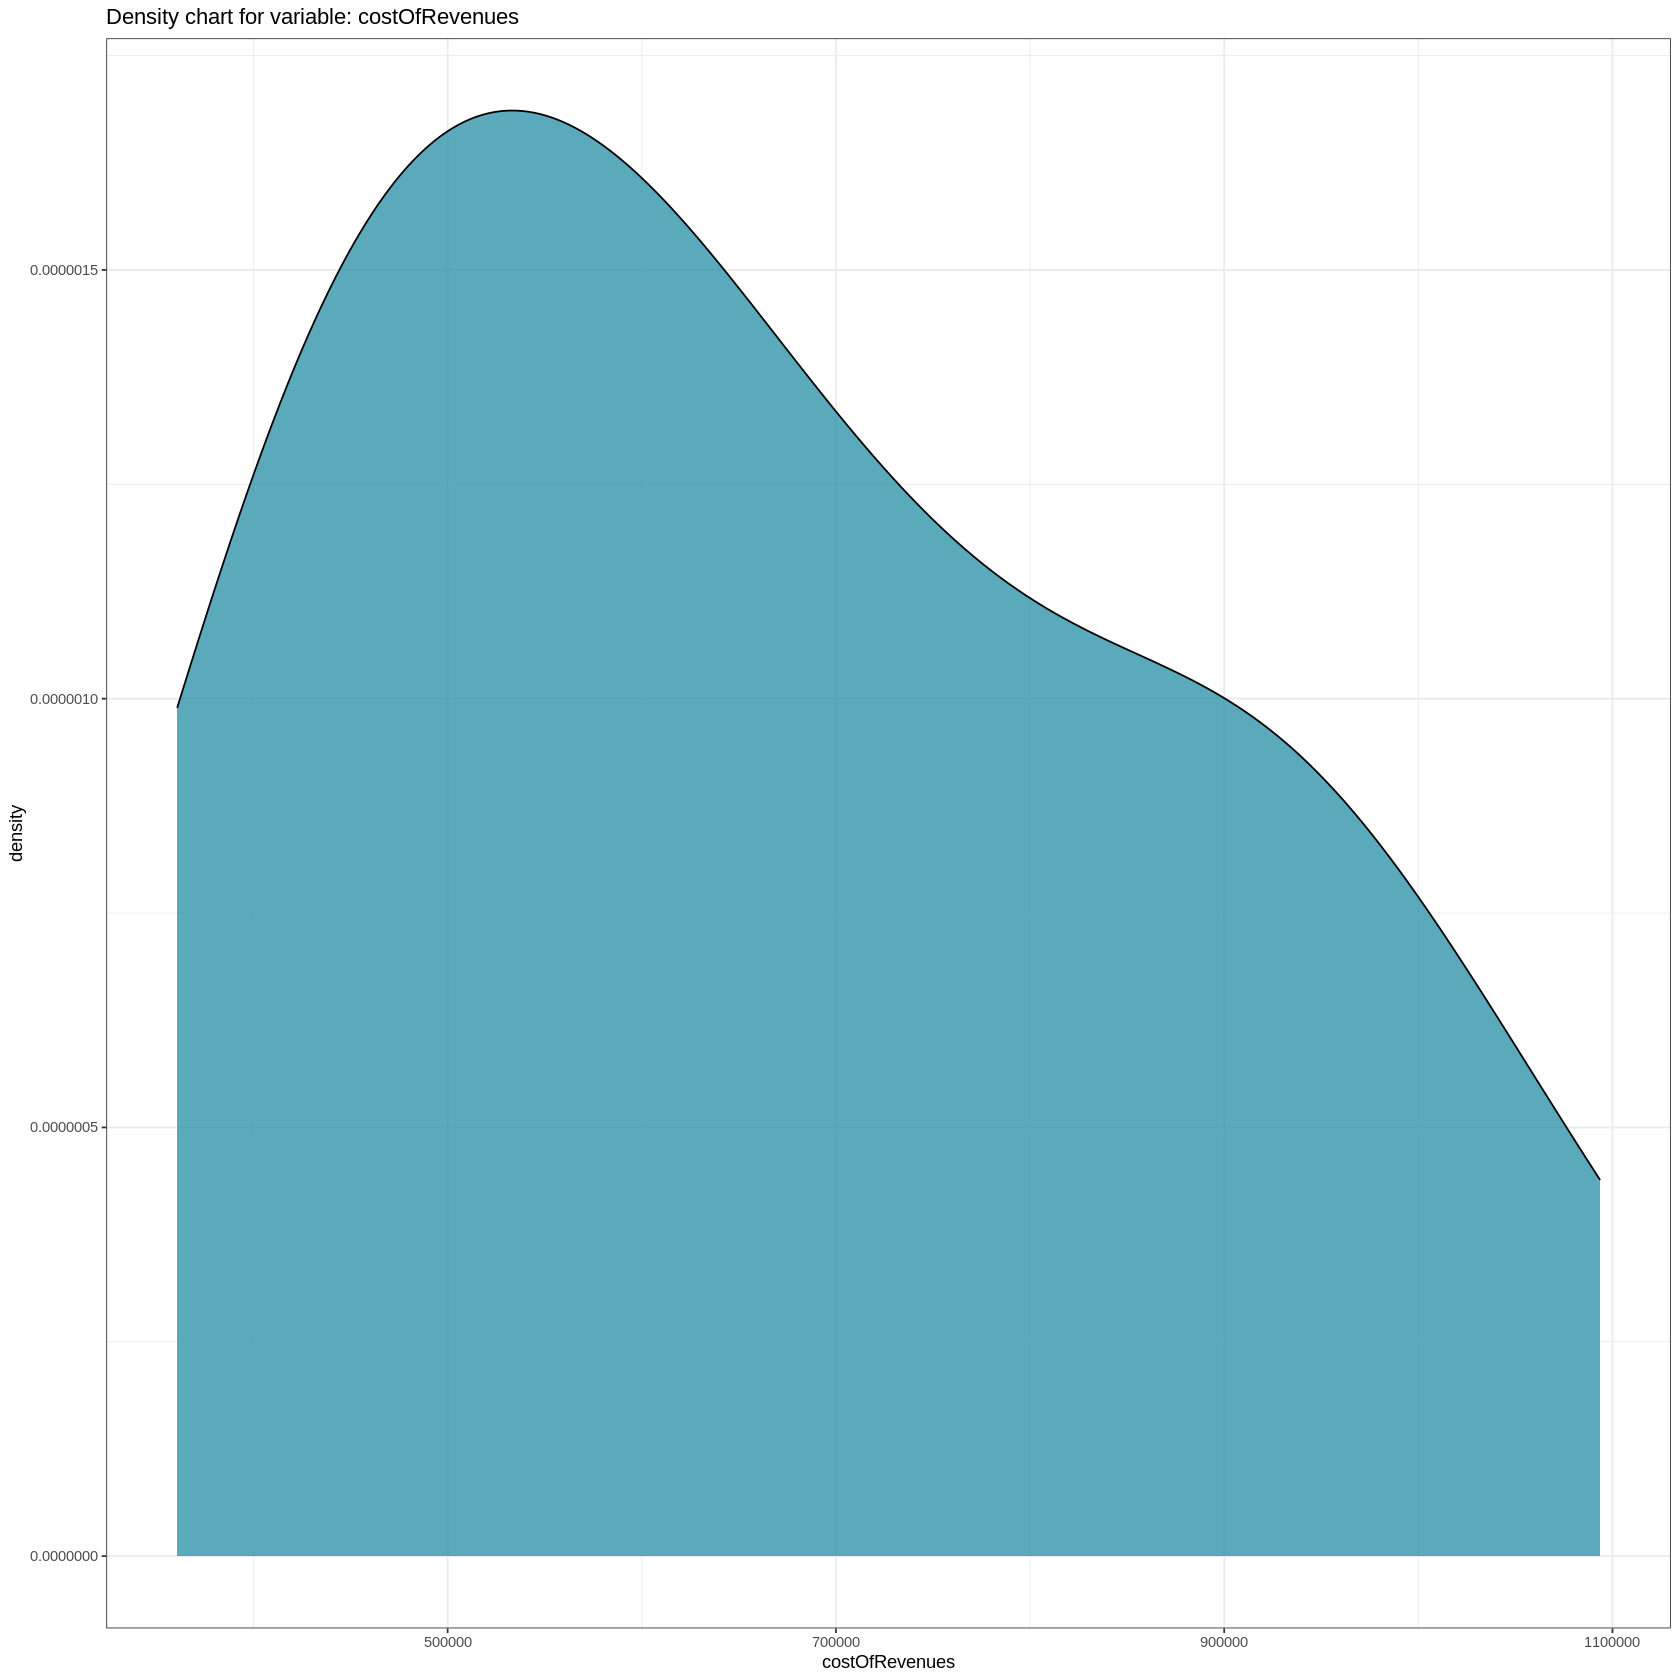

In [ ]:
# Criando um gráfico de Densidade para a variável especificada.

densityPlot(col = col, data = data)

O gráfico de densidade evidência uma assimetria à direita para o conjunto de dados, ou seja, os valores superiores à mediana variam mais do que os inferiores.

In [ ]:
# Calculando algumas estatísticas para a variável especificada.

varStats(col, data = data)

Min    Q1       Median   mean     Q3     Max     Sd      
costOfRevenues 360776 490850.5 628802.5 663300.7 808581 1093446 212688.2
               Sk        Ck       
costOfRevenues 0.3793461 -1.101774

Destacamos que:

* A média e a mediana da receita apresentam valores próximos; 
* O coeficiente de assimetria (**Sk**) confirma a assimetria à direita dos dados e;
* O coeficiente de curtose (**Ck**) evidência que a calda é mais leve do que a normal, ou seja, temos uma *curtose platicúrtica*. 


#### **5.3.7 Variável marketing**

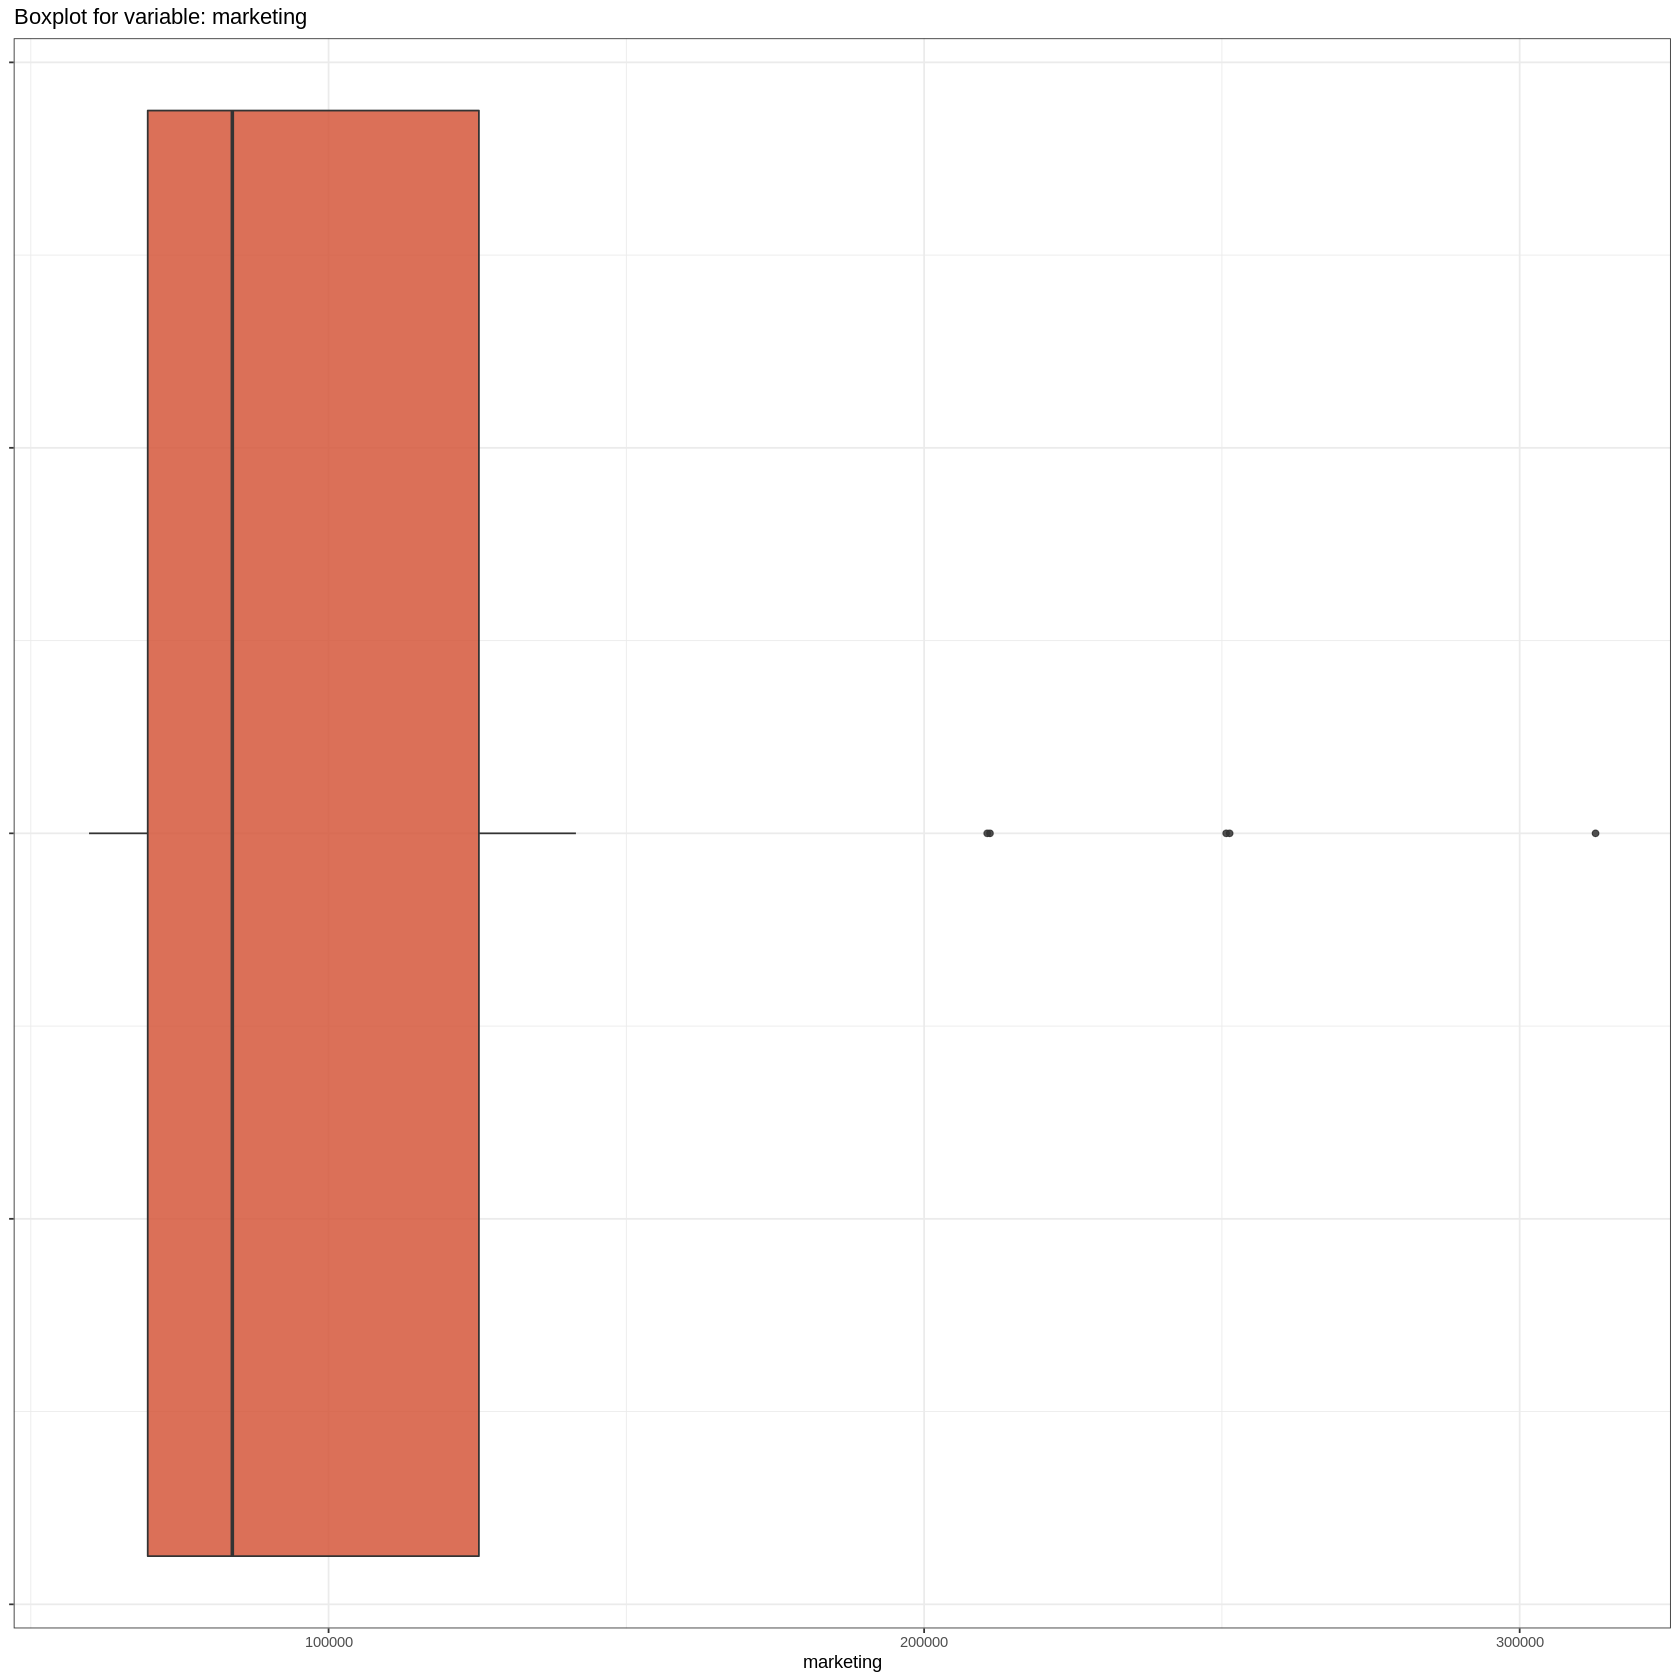

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'marketing'

# Criando um gráfico Boxplot para a variável especificada.

boxPlot(col = col, data = data)

O boxplot nos indica que, há registros sobre o gasto com marketing discrepantes dentro do conjunto de dados. Os outliers estão localizados no limite superior do gráfico, ou seja, há registros em que o custo com marketing fugiu do padrão, indicando que nestas épocas as despesas aumentaram consideravelmente. 

Vamos identificar quais são estes registros.

In [ ]:
# Extraindo registros, em que o valor da variável especificada, tenha sido considerado um outlier.

getOutliers(col = col, data = data)

date       totalSubscriptions paidSubscriptions freeTrails revenue
1 2017-12-31 52810              50870             1940       1630274
2 2018-03-31 55087              53469             1618       1820019
3 2018-06-30 55959              54539             1420       1893222
4 2018-09-30 56957              55450             1507       1937314
5 2018-12-31 58486              56421             2065       1996092
  costOfRevenues marketing contributionProfit contributionMargin
1  916100        211057    503117             0.309             
2  936480        250719    632820             0.348             
3  969995        251298    671929             0.355             
4 1038473        210595    688246             0.355             
5 1093446        312739    589907             0.296             
  costPerCustomer revenuePerCustomer earningsPerCustomer segment   month    
1 17.34709        30.87055           13.52346            Streaming December 
2 17.00002        33.03899           16.03897            Streaming March    
3 17.33403        33.83231           16.49828            Streaming June     
4 18.23258        34.01362           15.78105            Streaming September
5 18.69586        34.12940           15.43354            Streaming December 
  year freeTrialsFromTotal marketingFromTotal
1 2017 3.673547            18.72472          
2 2018 2.937172            21.11853          
3 2018 2.537572            20.57639          
4 2018 2.645856            16.86017          
5 2018 3.530759            22.24025

Constatamos que a partir do **último trimestre de 2017**, os gastos com marketing aumentaram consideravelmente, em relação aos demais trimestres observados. 

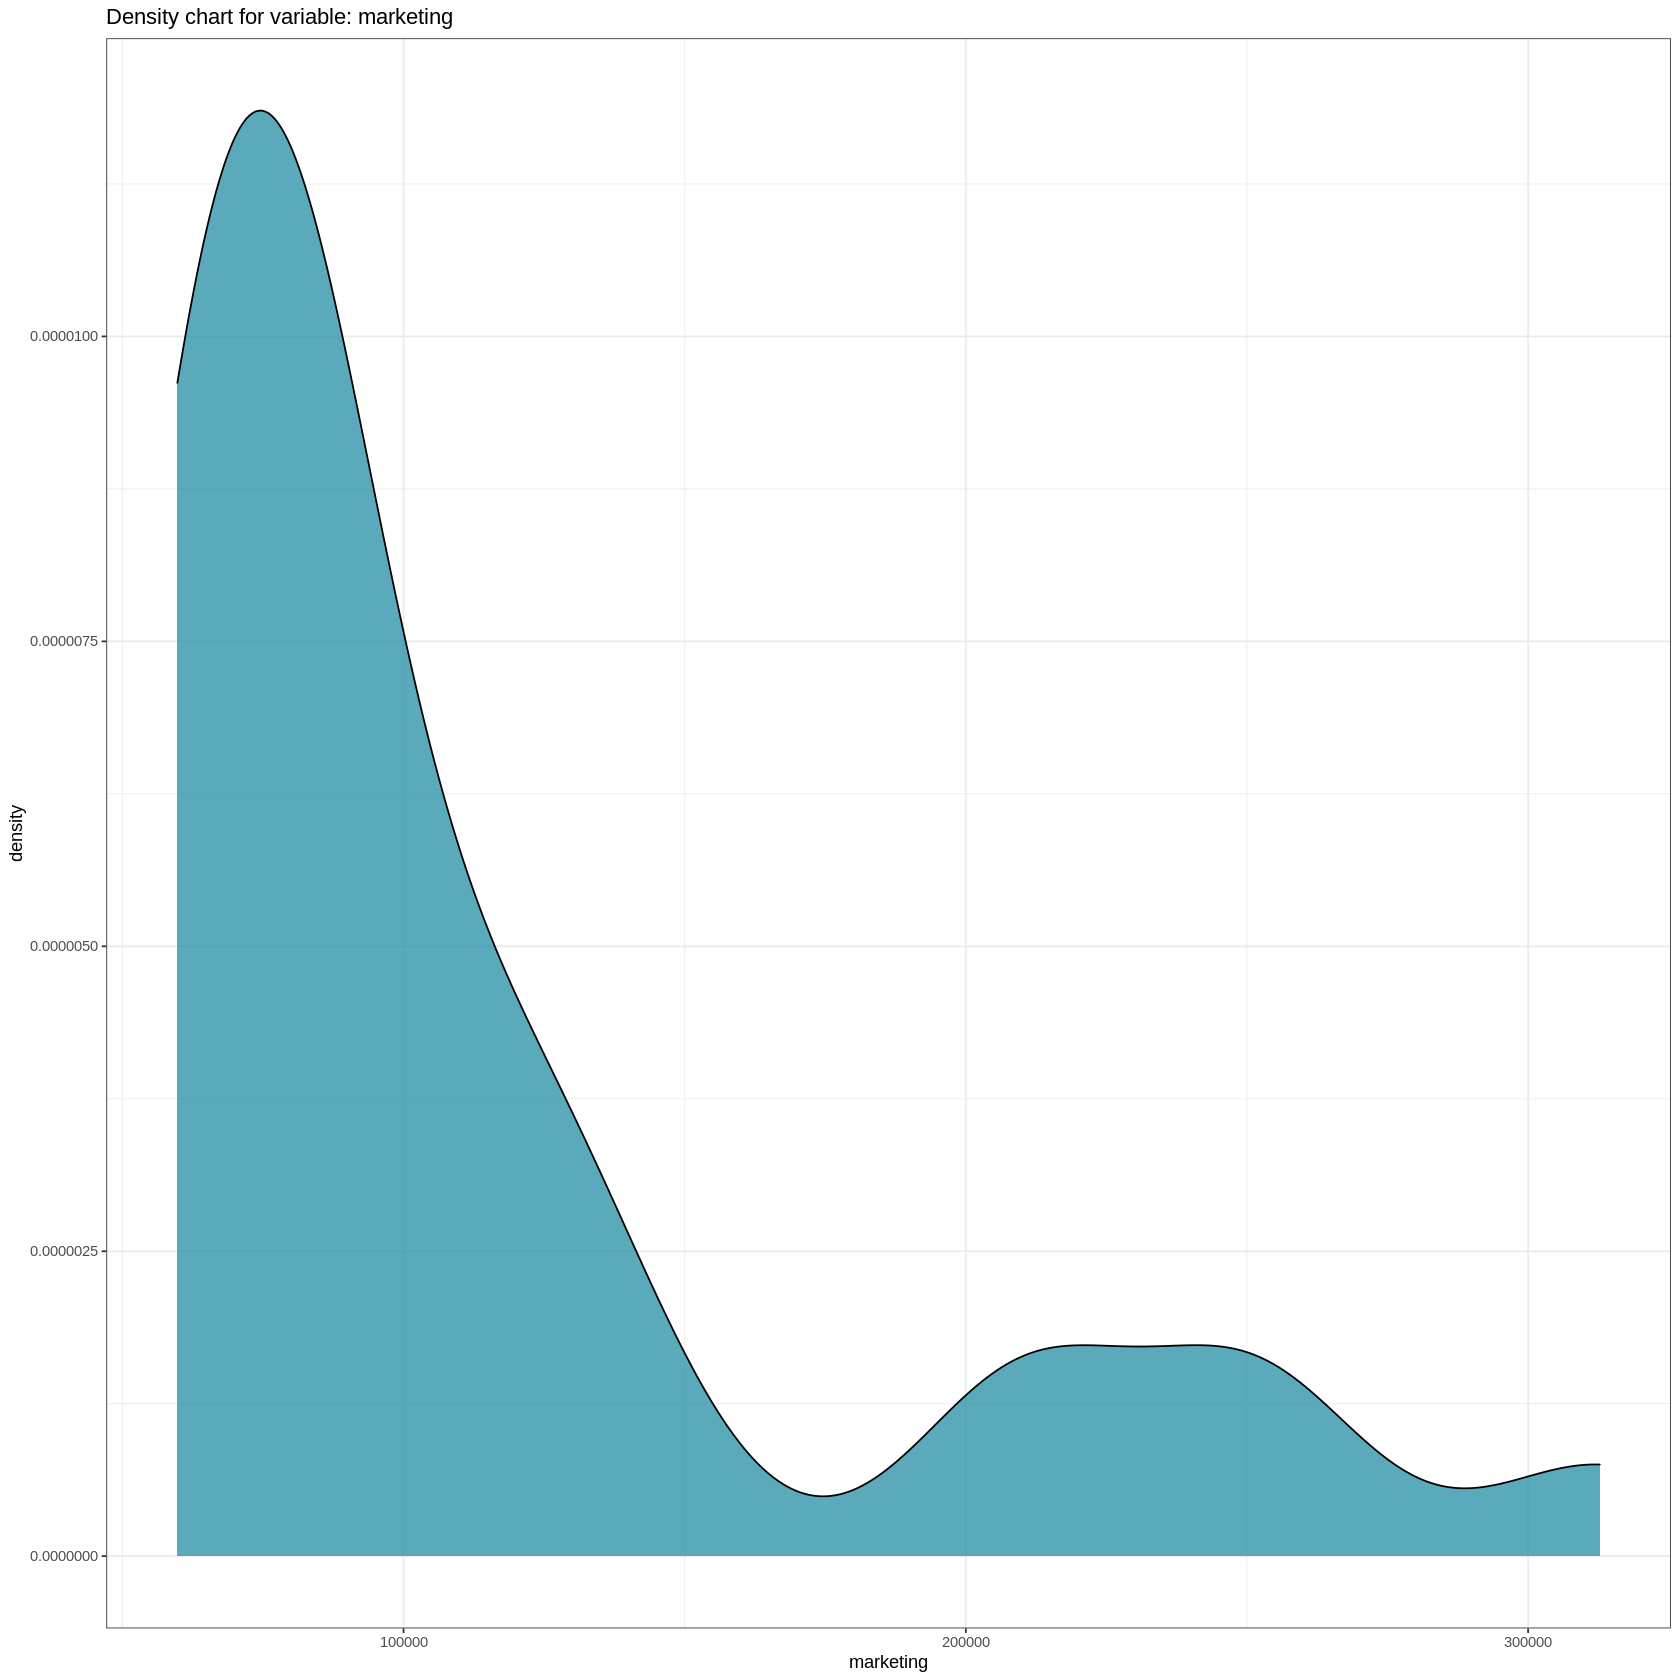

In [ ]:
# Criando um gráfico de Densidade para a variável especificada.

densityPlot(col = col, data = data)

O gráfico de densidade evidência uma assimetria à direita para o conjunto de dados, ou seja, os valores superiores à mediana variam mais do que os inferiores.

In [ ]:
# Calculando algumas estatísticas para a variável especificada.

varStats(col, data = data)

Min   Q1    Median  mean     Q3       Max    Sd       Sk      
marketing 59777 69634 83840.5 114086.7 125240.5 312739 68678.39 1.481287
          Ck      
marketing 1.012792

Destacamos que:

* A média e a mediana dos gastos com marketing apresentam valores muito distantes; 
* O coeficiente de assimetria (**Sk**) confirma a assimetria à direita dos dados e;
* O coeficiente de curtose (**Ck**) evidência que a calda é mais pesada do que a normal, ou seja, temos uma *curtose leptocúrtica*.


#### **5.3.8 Variável contributionProfit**

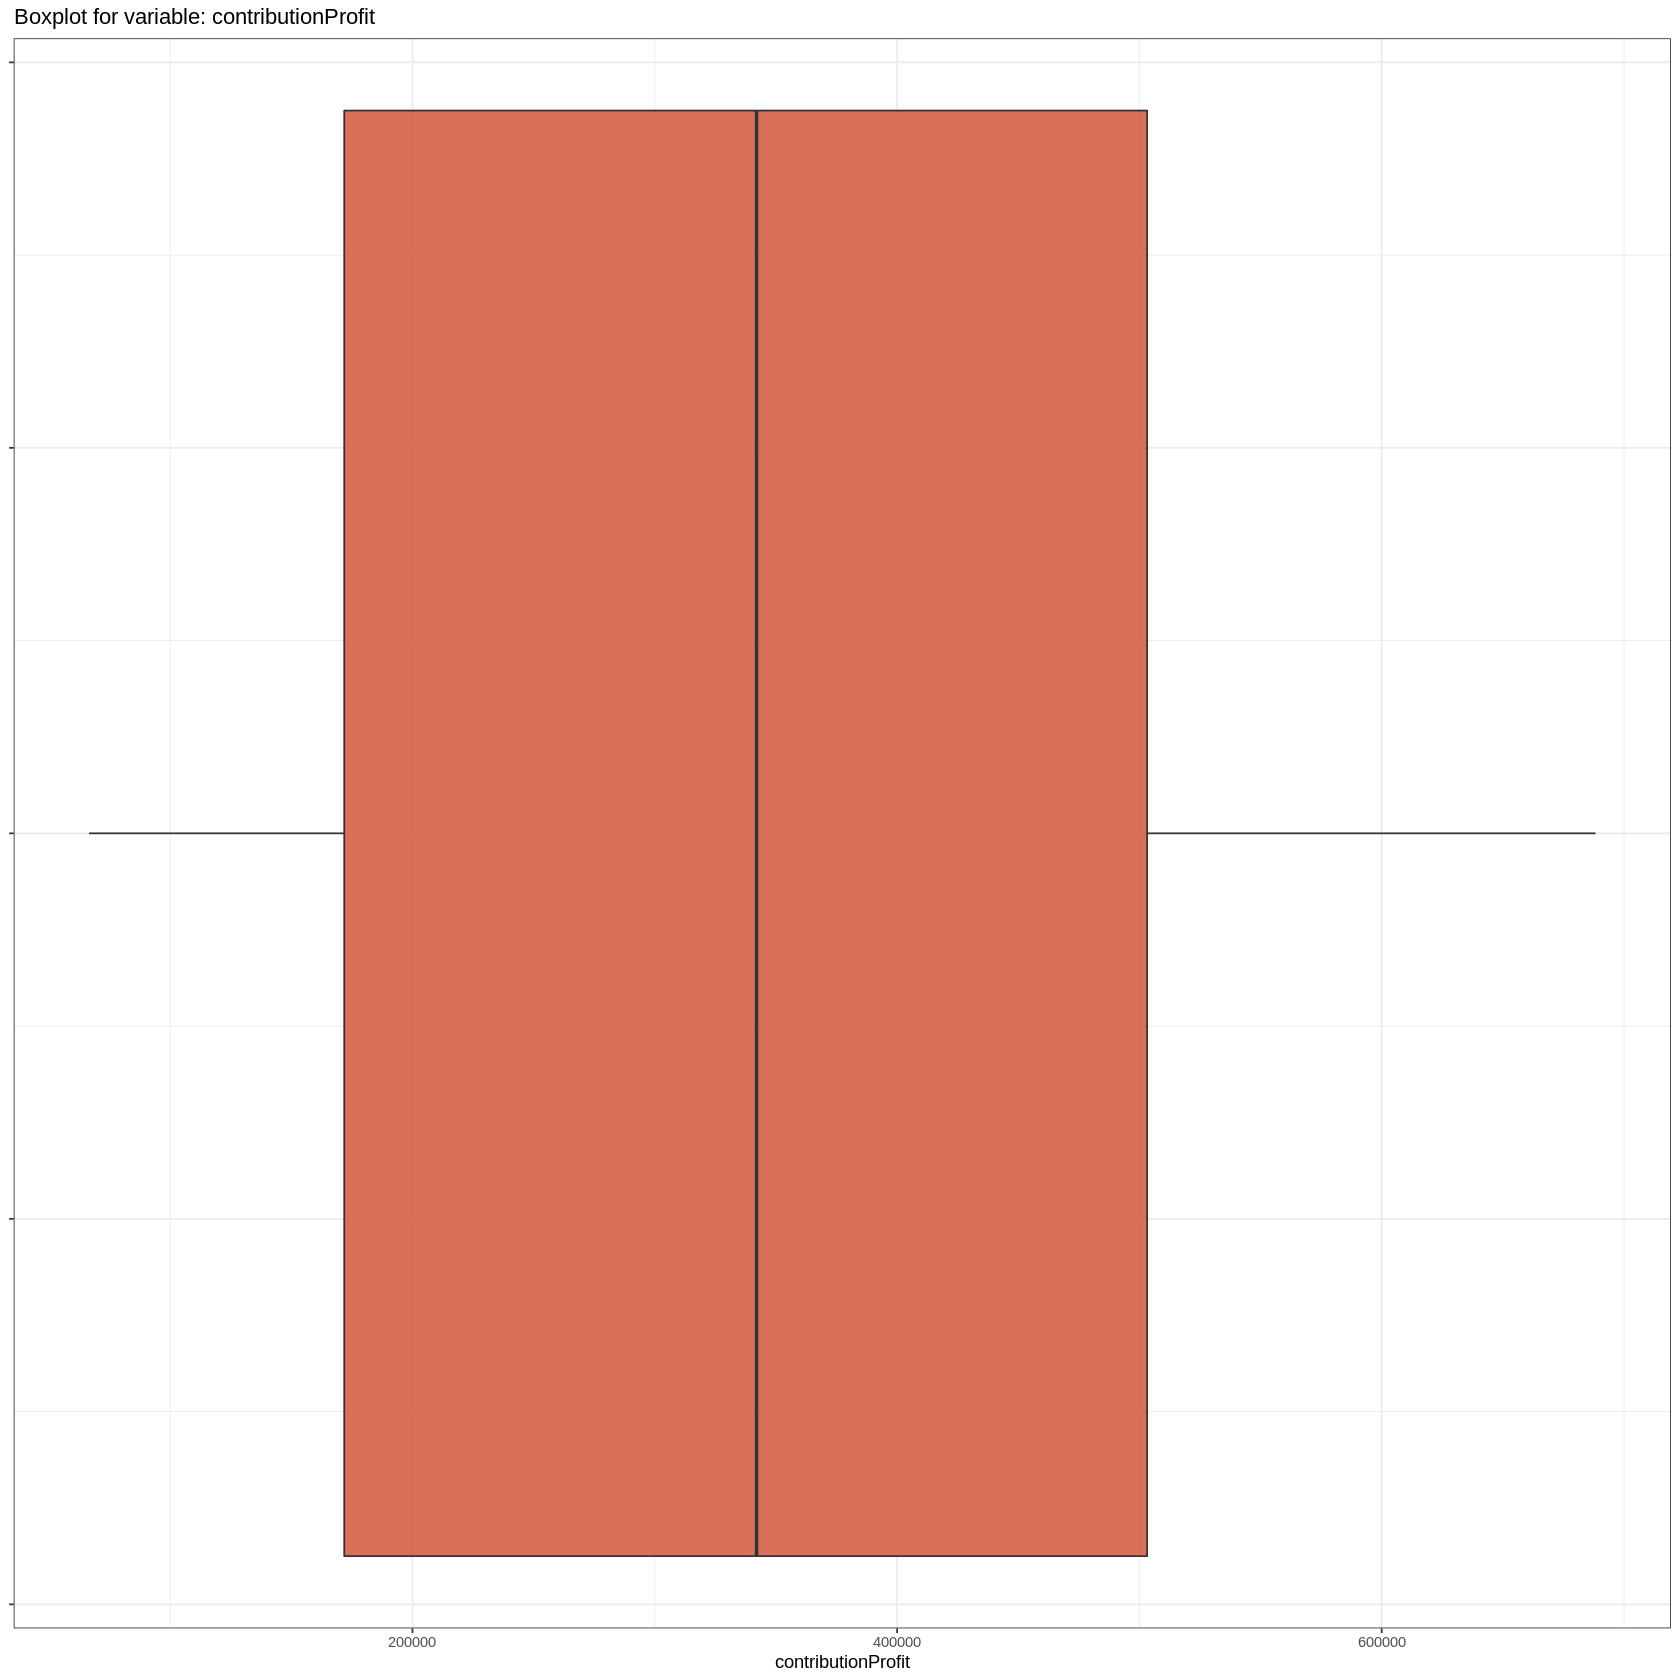

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'contributionProfit'

# Criando um gráfico Boxplot para a variável especificada.

boxPlot(col = col, data = data)

O boxplot nos indica que, não há registro do lucro da contribuição trimestral que seja discrepante dentro do conjunto de dados.

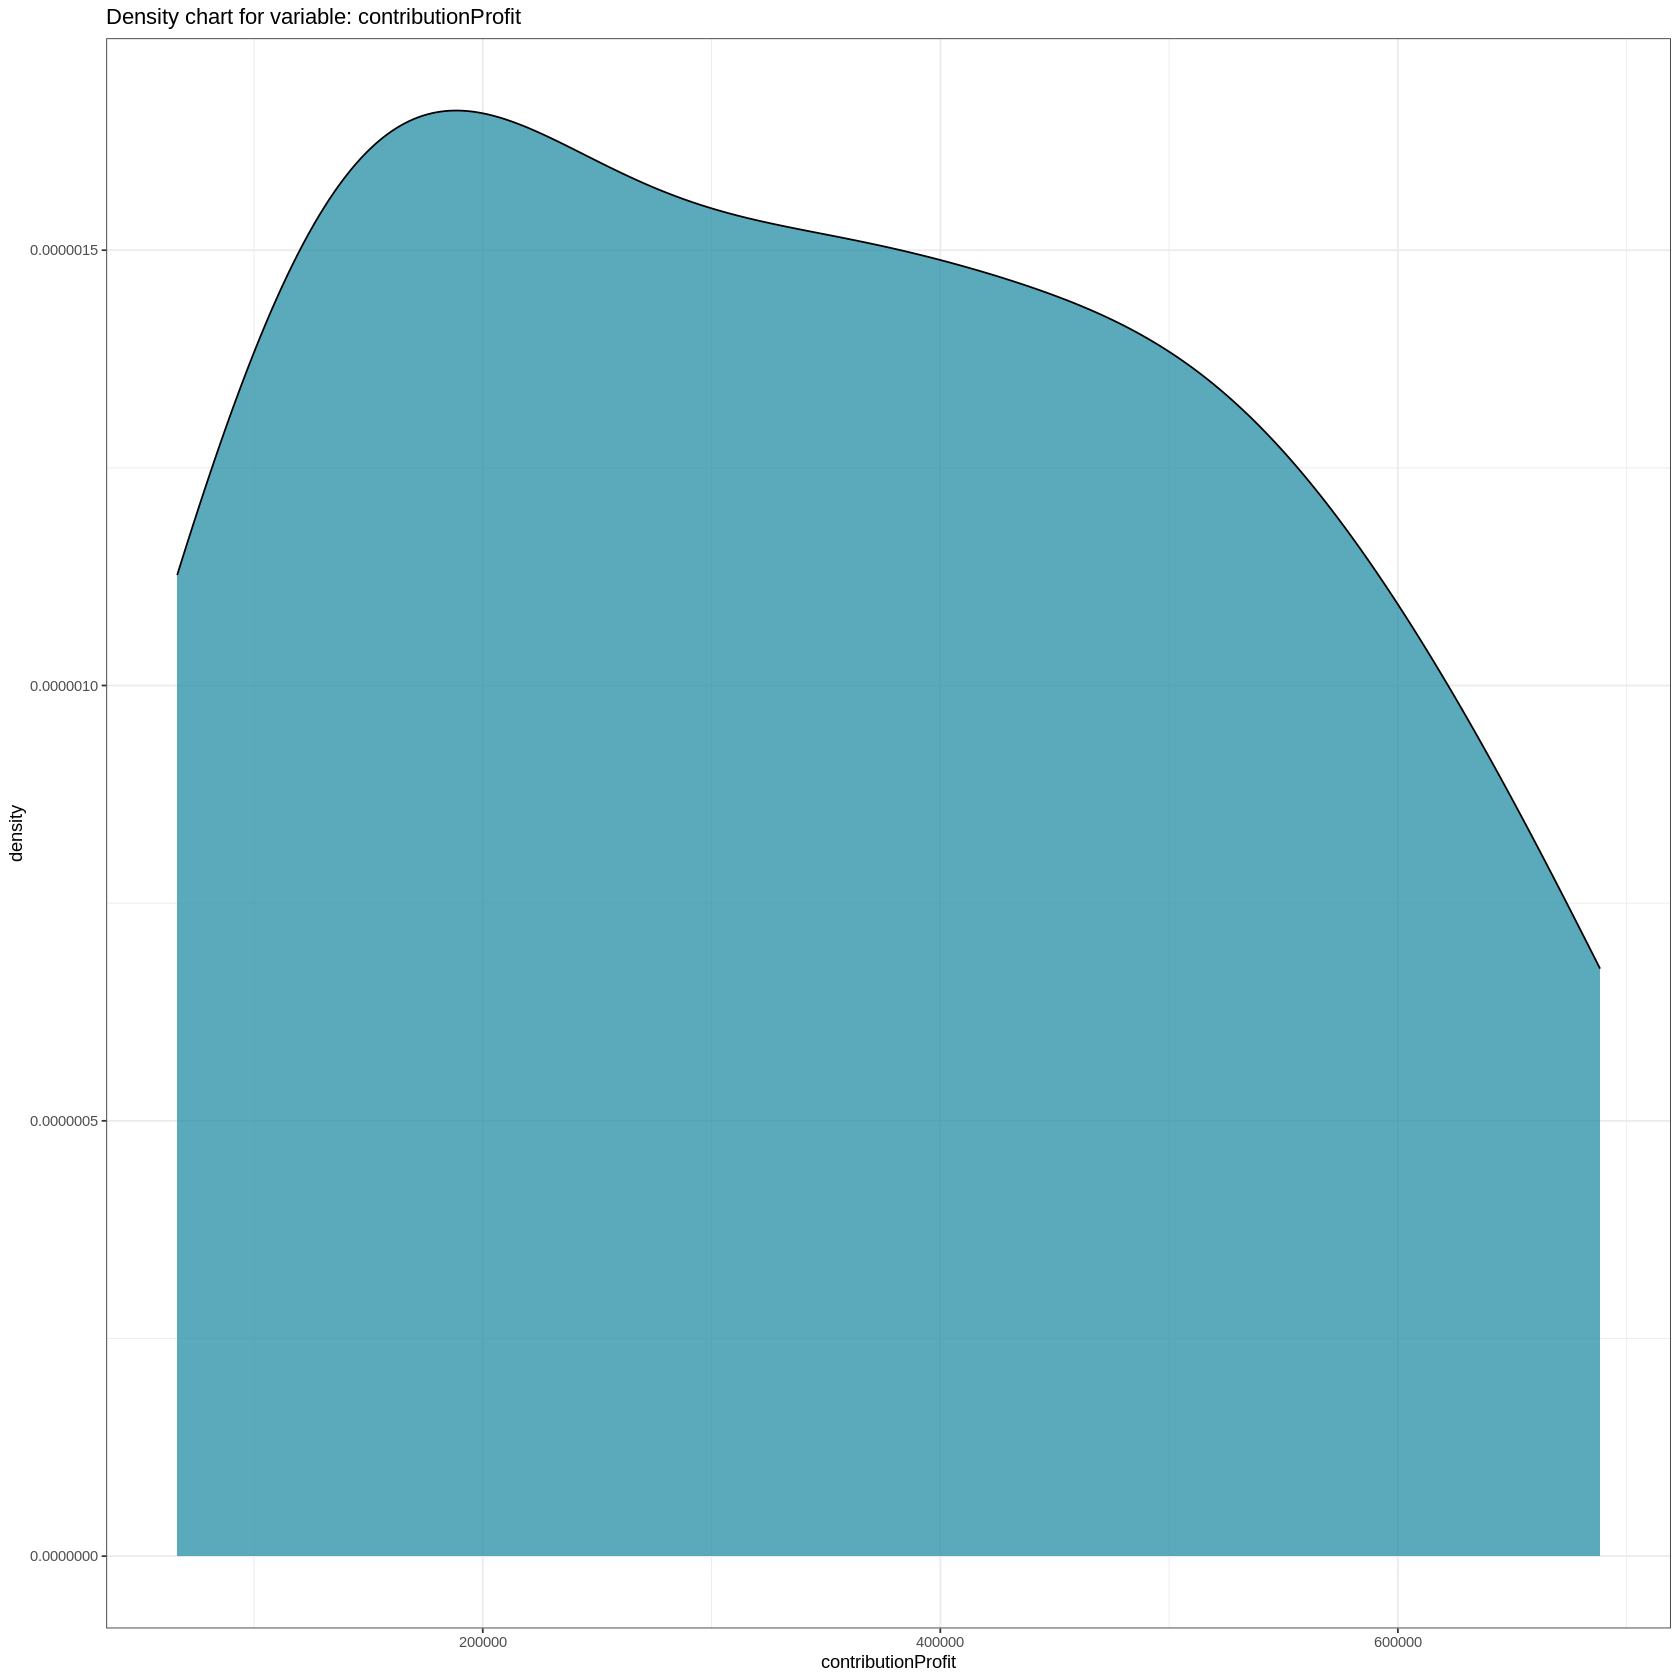

In [ ]:
# Criando um gráfico de Densidade para a variável especificada.

densityPlot(col = col, data = data)

O gráfico de densidade evidência uma assimetria à direita para o conjunto de dados, ou seja, os valores superiores à mediana variam mais do que os inferiores.

In [ ]:
# Calculando algumas estatísticas para a variável especificada.

varStats(col, data = data)

Min   Q1       Median   mean     Q3       Max    Sd      
contributionProfit 66508 171836.8 342003.5 344933.8 503188.2 688246 191727.8
                   Sk        Ck       
contributionProfit 0.1952984 -1.289478

Destacamos que:

* A média e a mediana do lucro da contribuição trimestral apresentam valores próximos; 
* O coeficiente de assimetria (**Sk**) confirma a assimetria à direita dos dados e;
* O coeficiente de curtose (**Ck**) evidência que a calda é mais leve do que a normal, ou seja, temos uma *curtose platicúrtica*. 


#### **5.3.9 Variável contributionMargin**

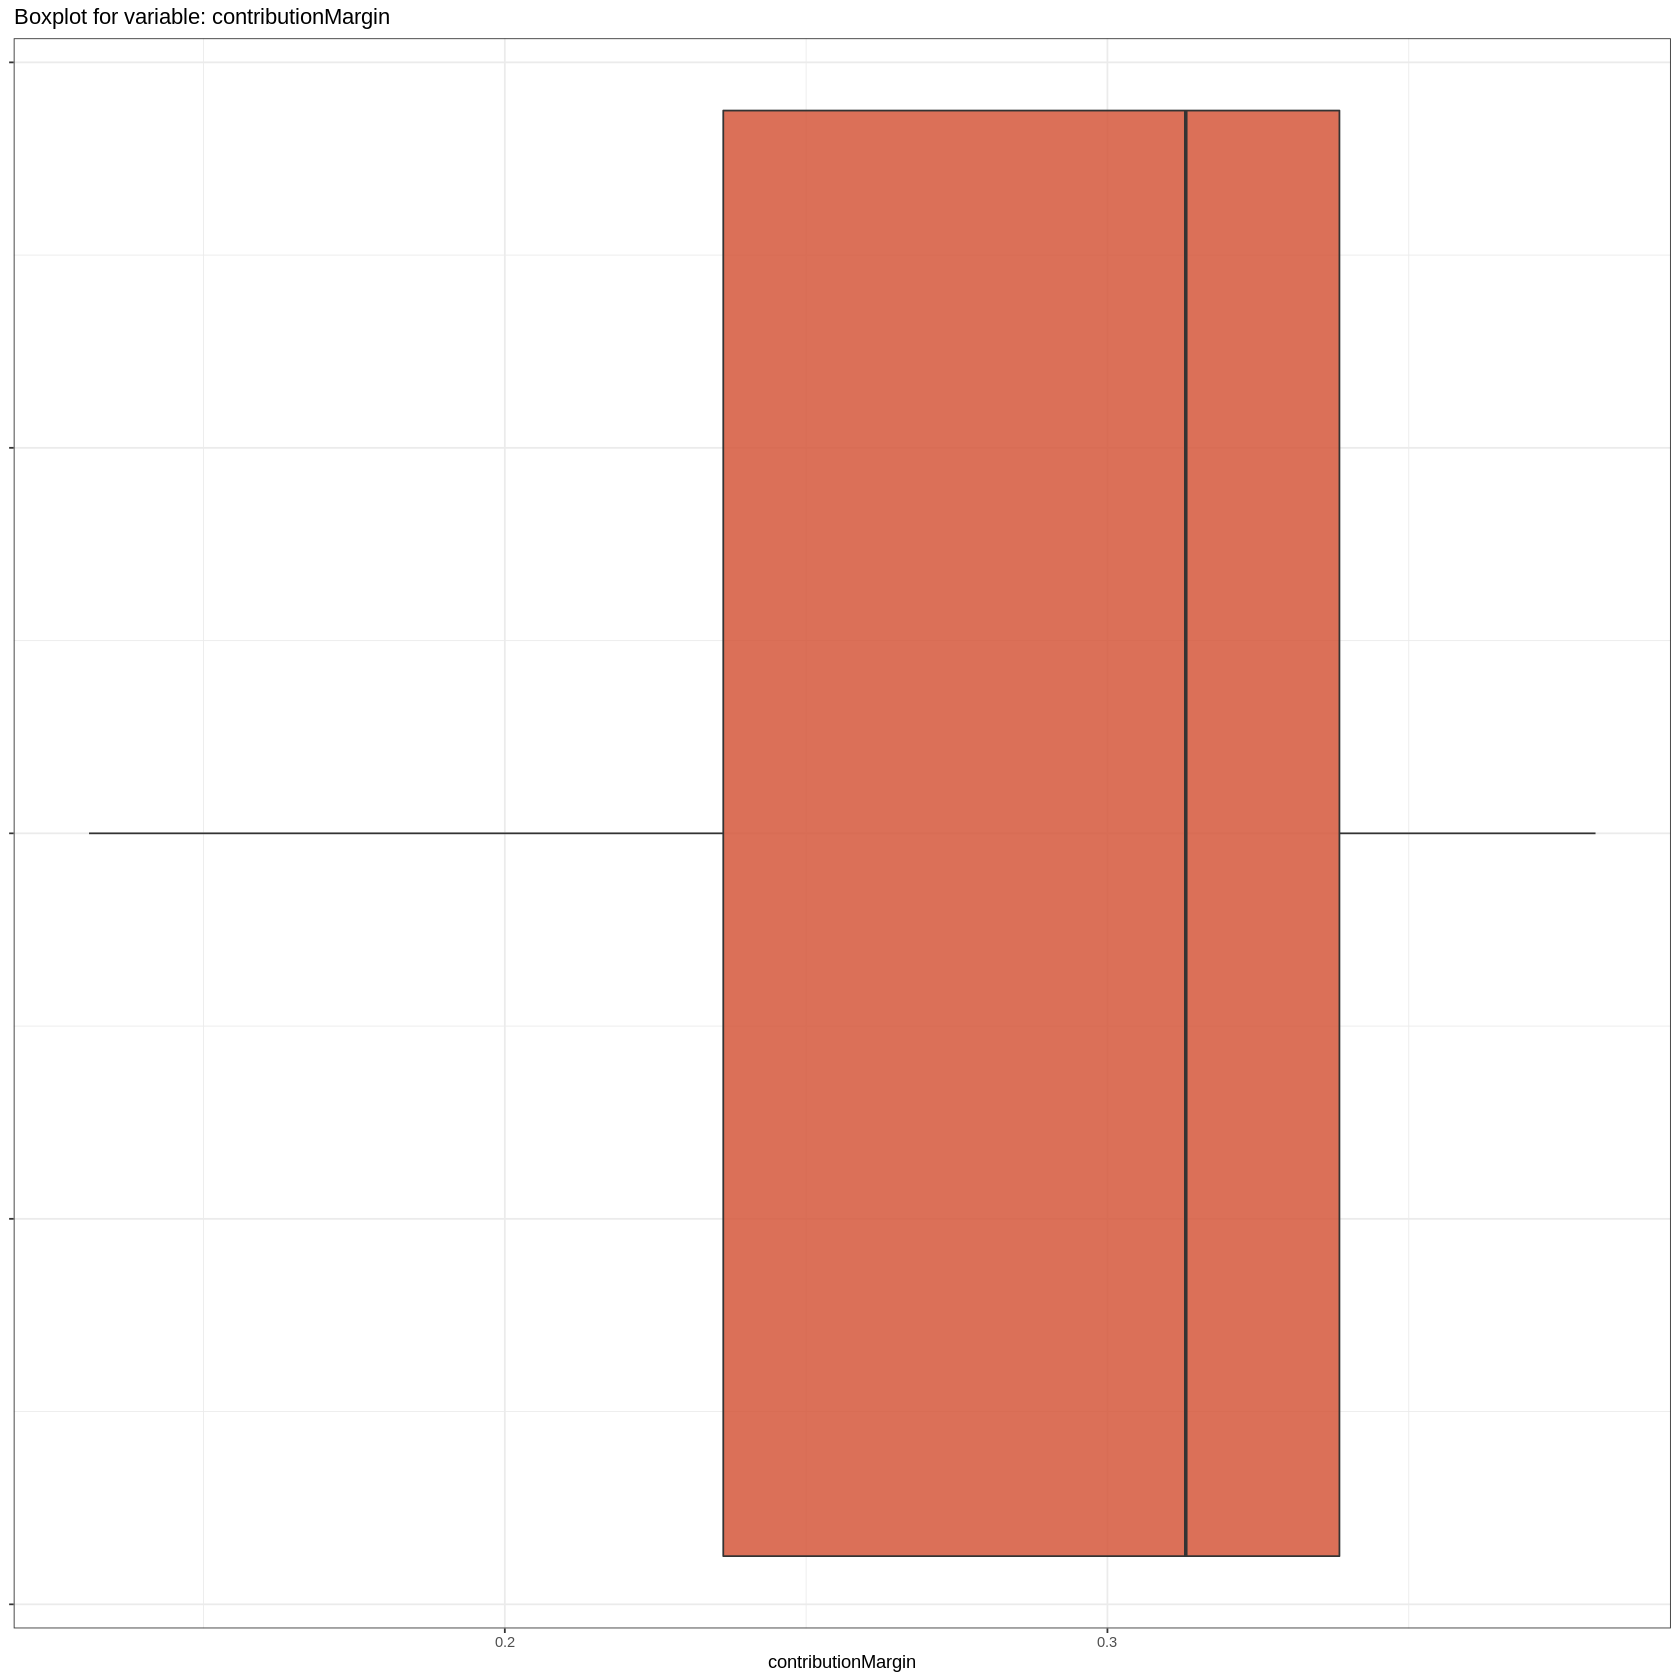

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'contributionMargin'

# Criando um gráfico Boxplot para a variável especificada.

boxPlot(col = col, data = data)

O boxplot nos indica que, não há registro da margem de contribuição trimestral que seja discrepante dentro do conjunto de dados.

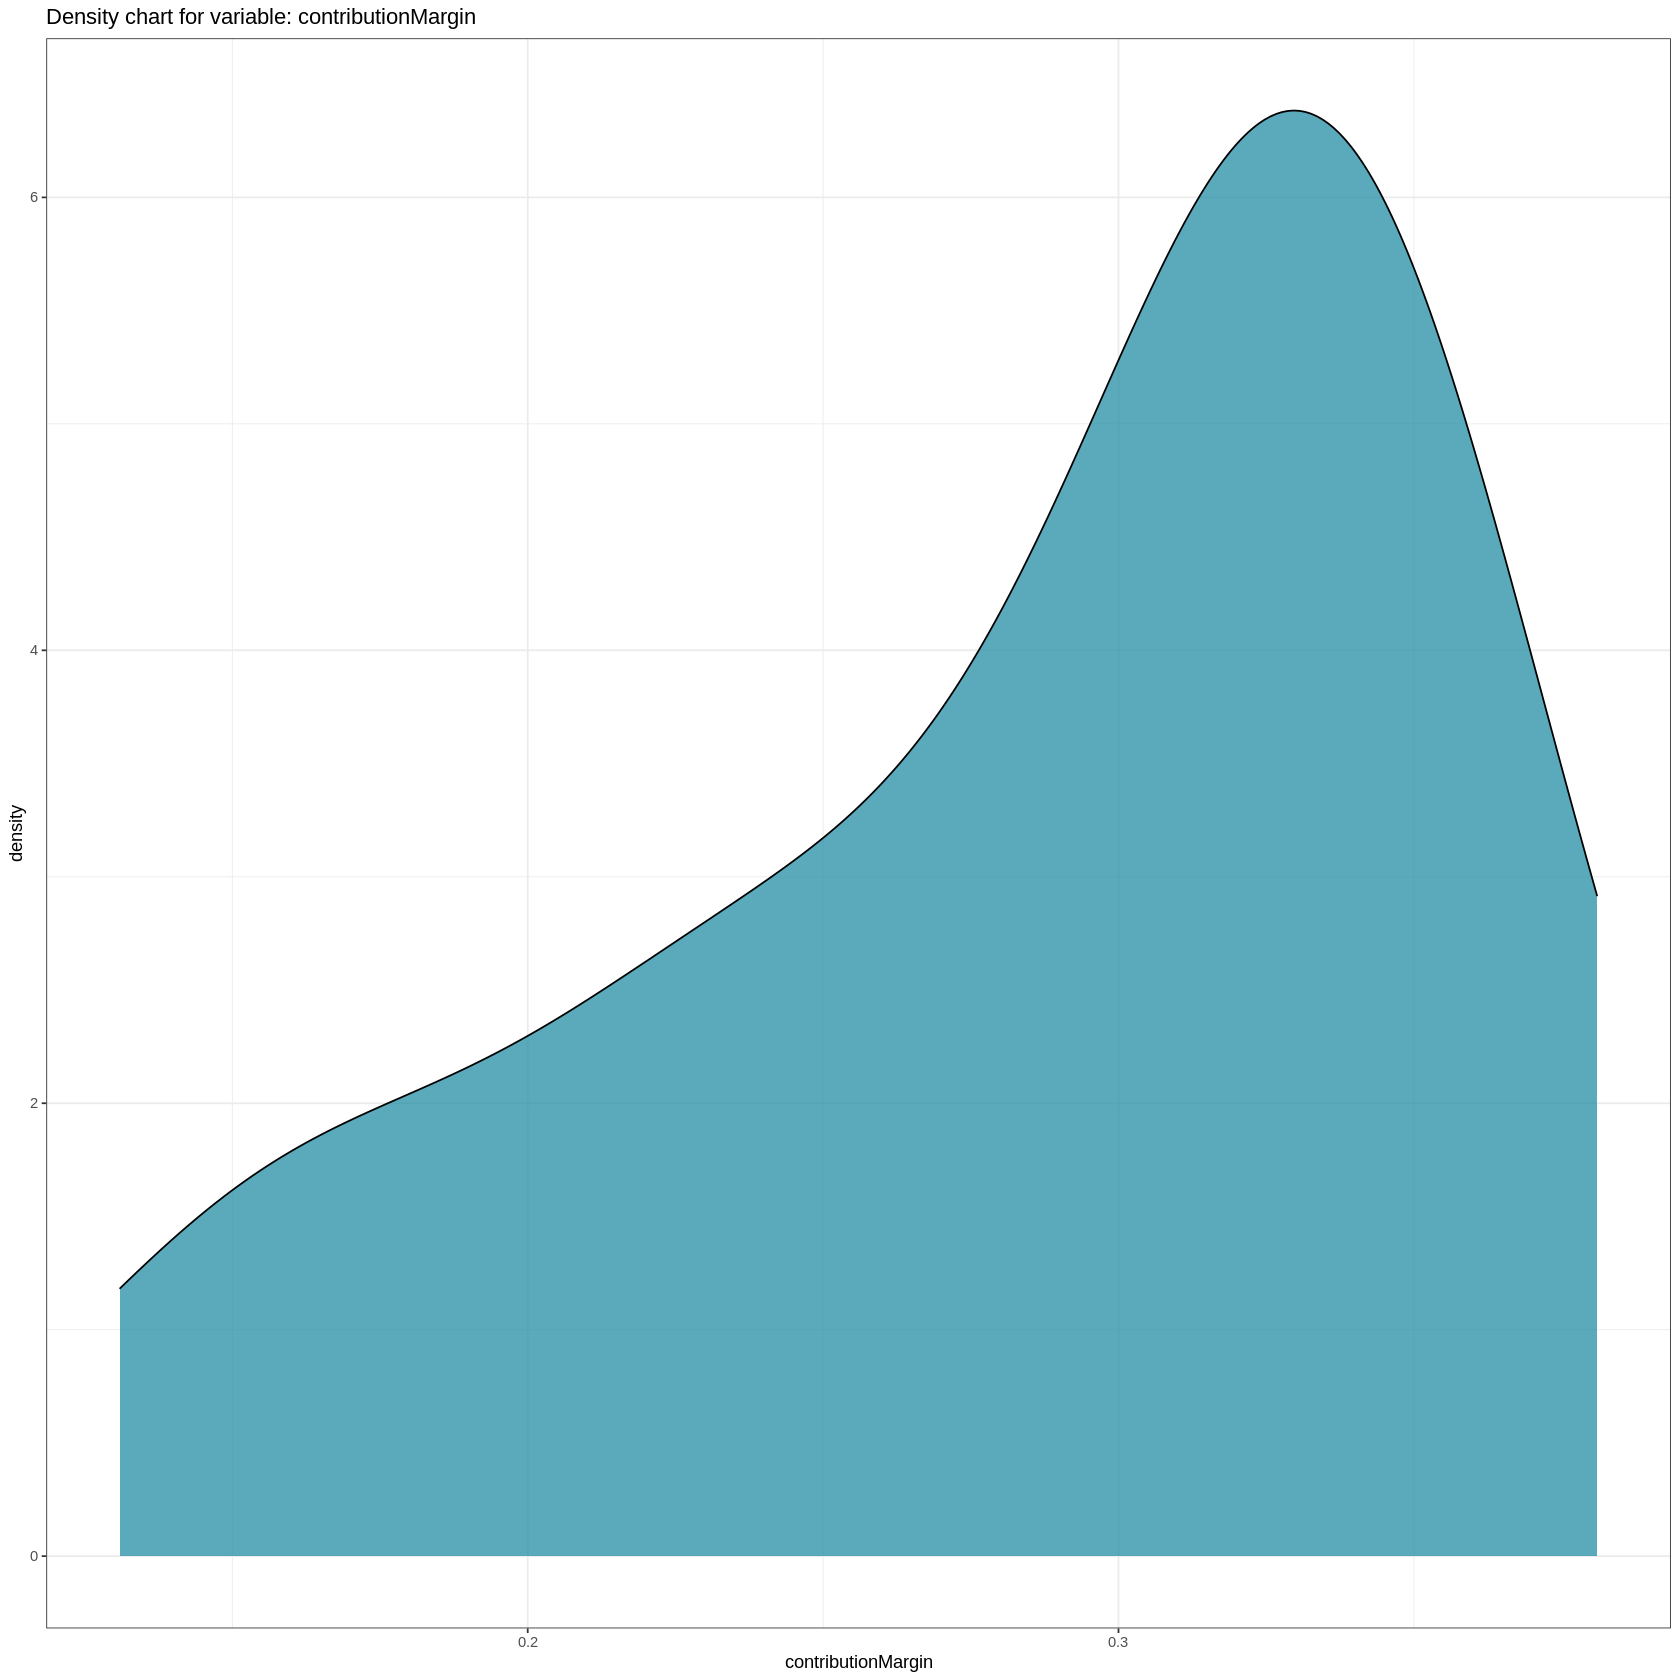

In [ ]:
# Criando um gráfico de Densidade para a variável especificada.

densityPlot(col = col, data = data)

O gráfico de densidade evidência uma assimetria à esquerda para o conjunto de dados, ou seja, os valores inferiores à mediana variam mais do que os superiores.

In [ ]:
# Calculando algumas estatísticas para a variável especificada.

varStats(col, data = data)

Min   Q1      Median mean      Q3     Max   Sd        
contributionMargin 0.131 0.23625 0.313  0.2855714 0.3385 0.381 0.06902572
                   Sk         Ck        
contributionMargin -0.7246015 -0.7118044

Destacamos que:
* A média e a mediana da margem de contribuição apresentam valores muito distantes; 
* O coeficiente de assimetria (**Sk**) confirma a assimetria à esquerda dos dados e;
* O coeficiente de curtose (**Ck**) evidência que a calda é mais leve do que a normal, ou seja, temos uma *curtose platicúrtica*.


#### **5.3.10 Variável costPerCustomer**

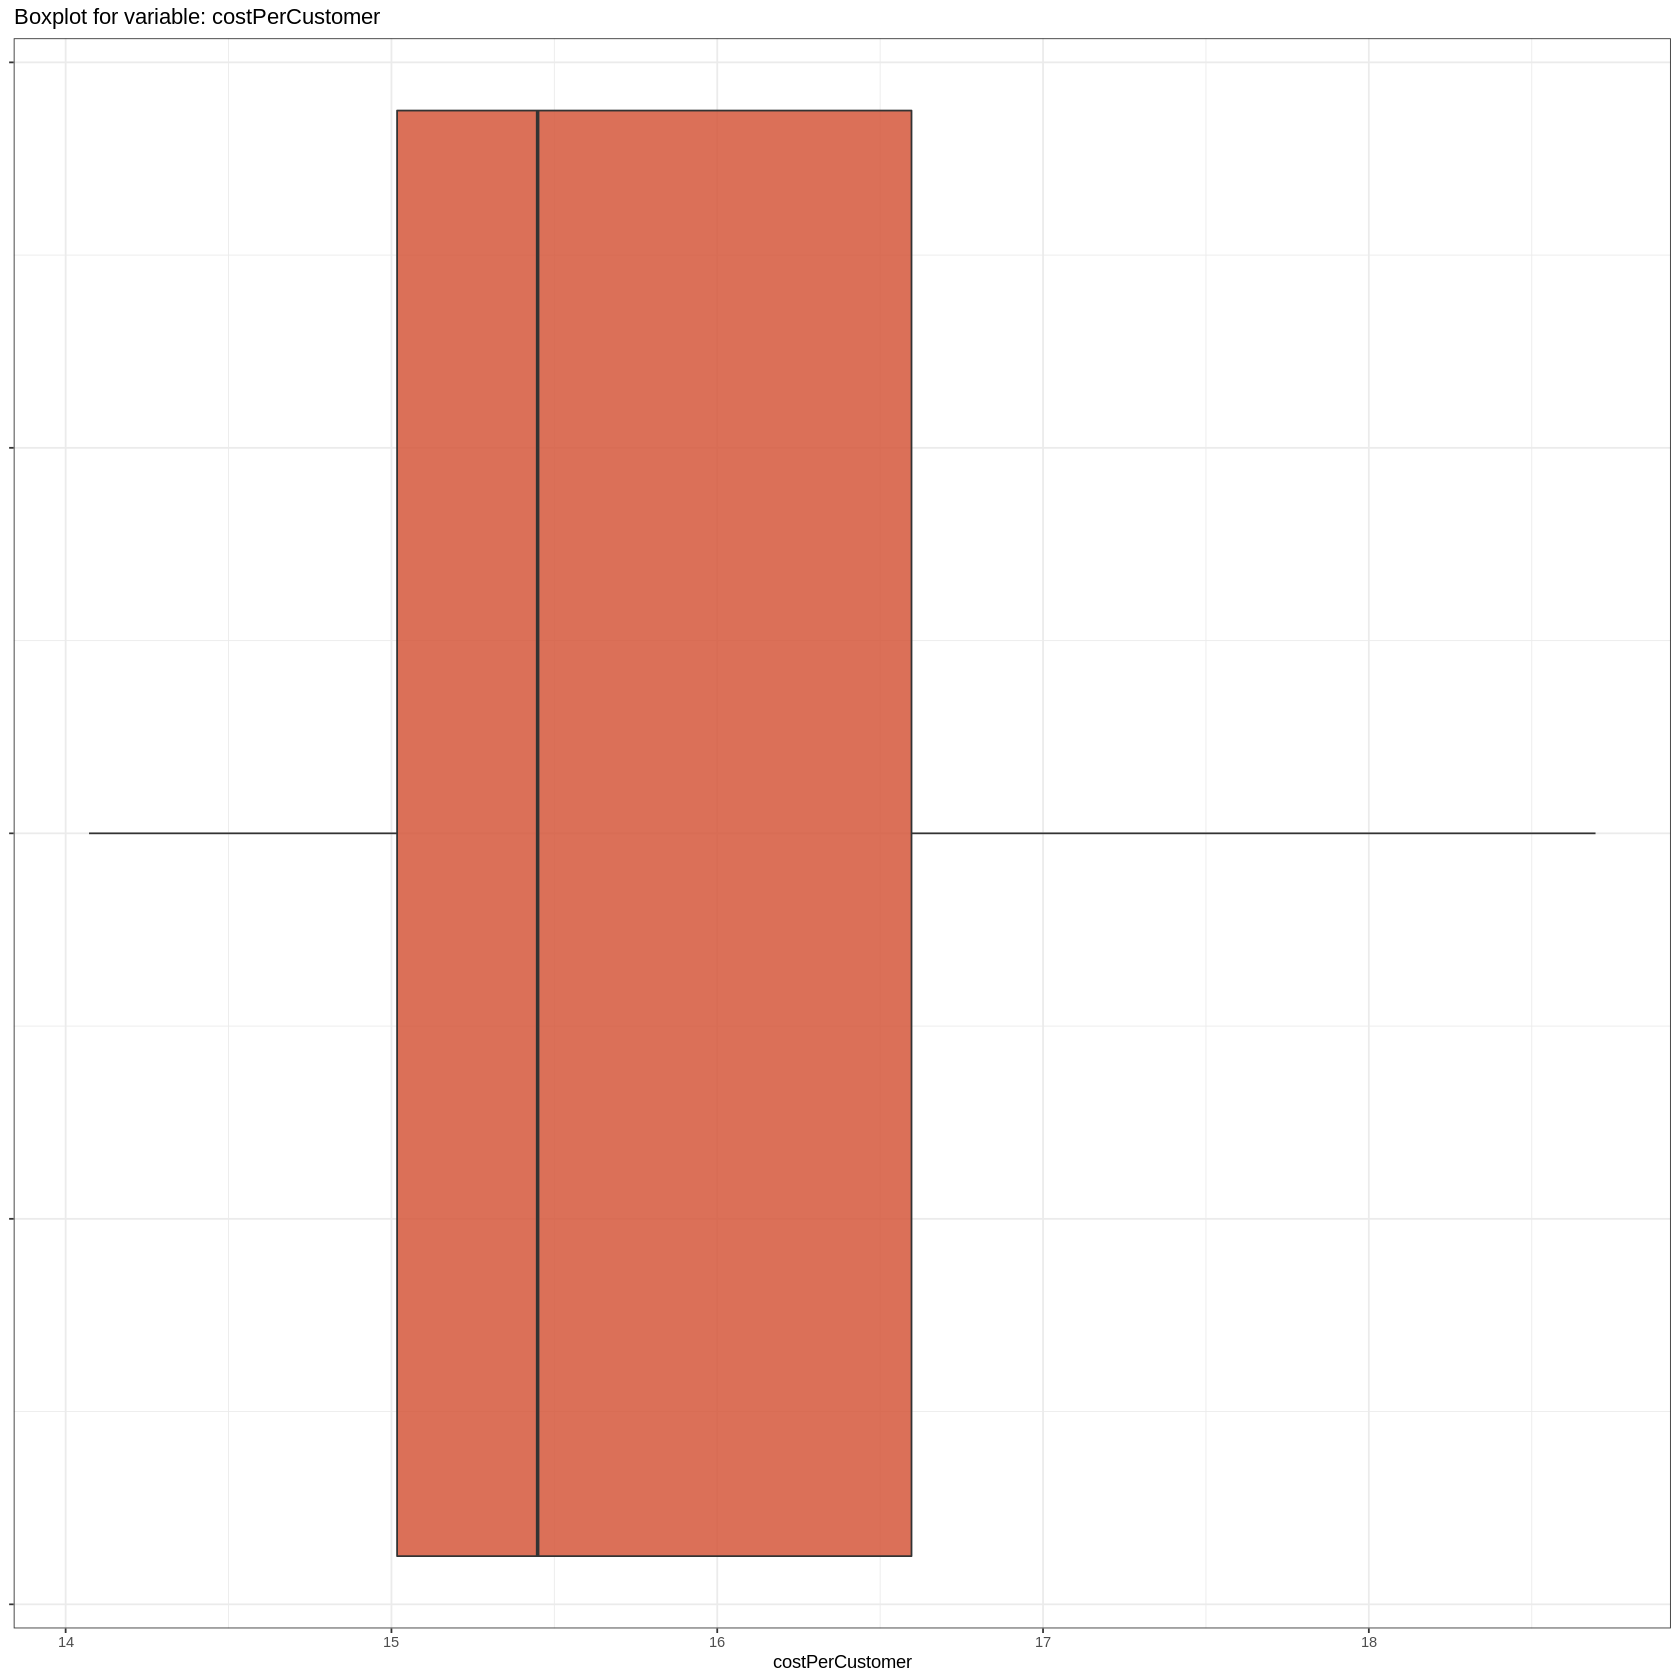

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'costPerCustomer'

# Criando um gráfico Boxplot para a variável especificada.

boxPlot(col = col, data = data)

O boxplot nos indica que, não há registro da taxa de custo por cliente que seja discrepante dentro do conjunto de dados.

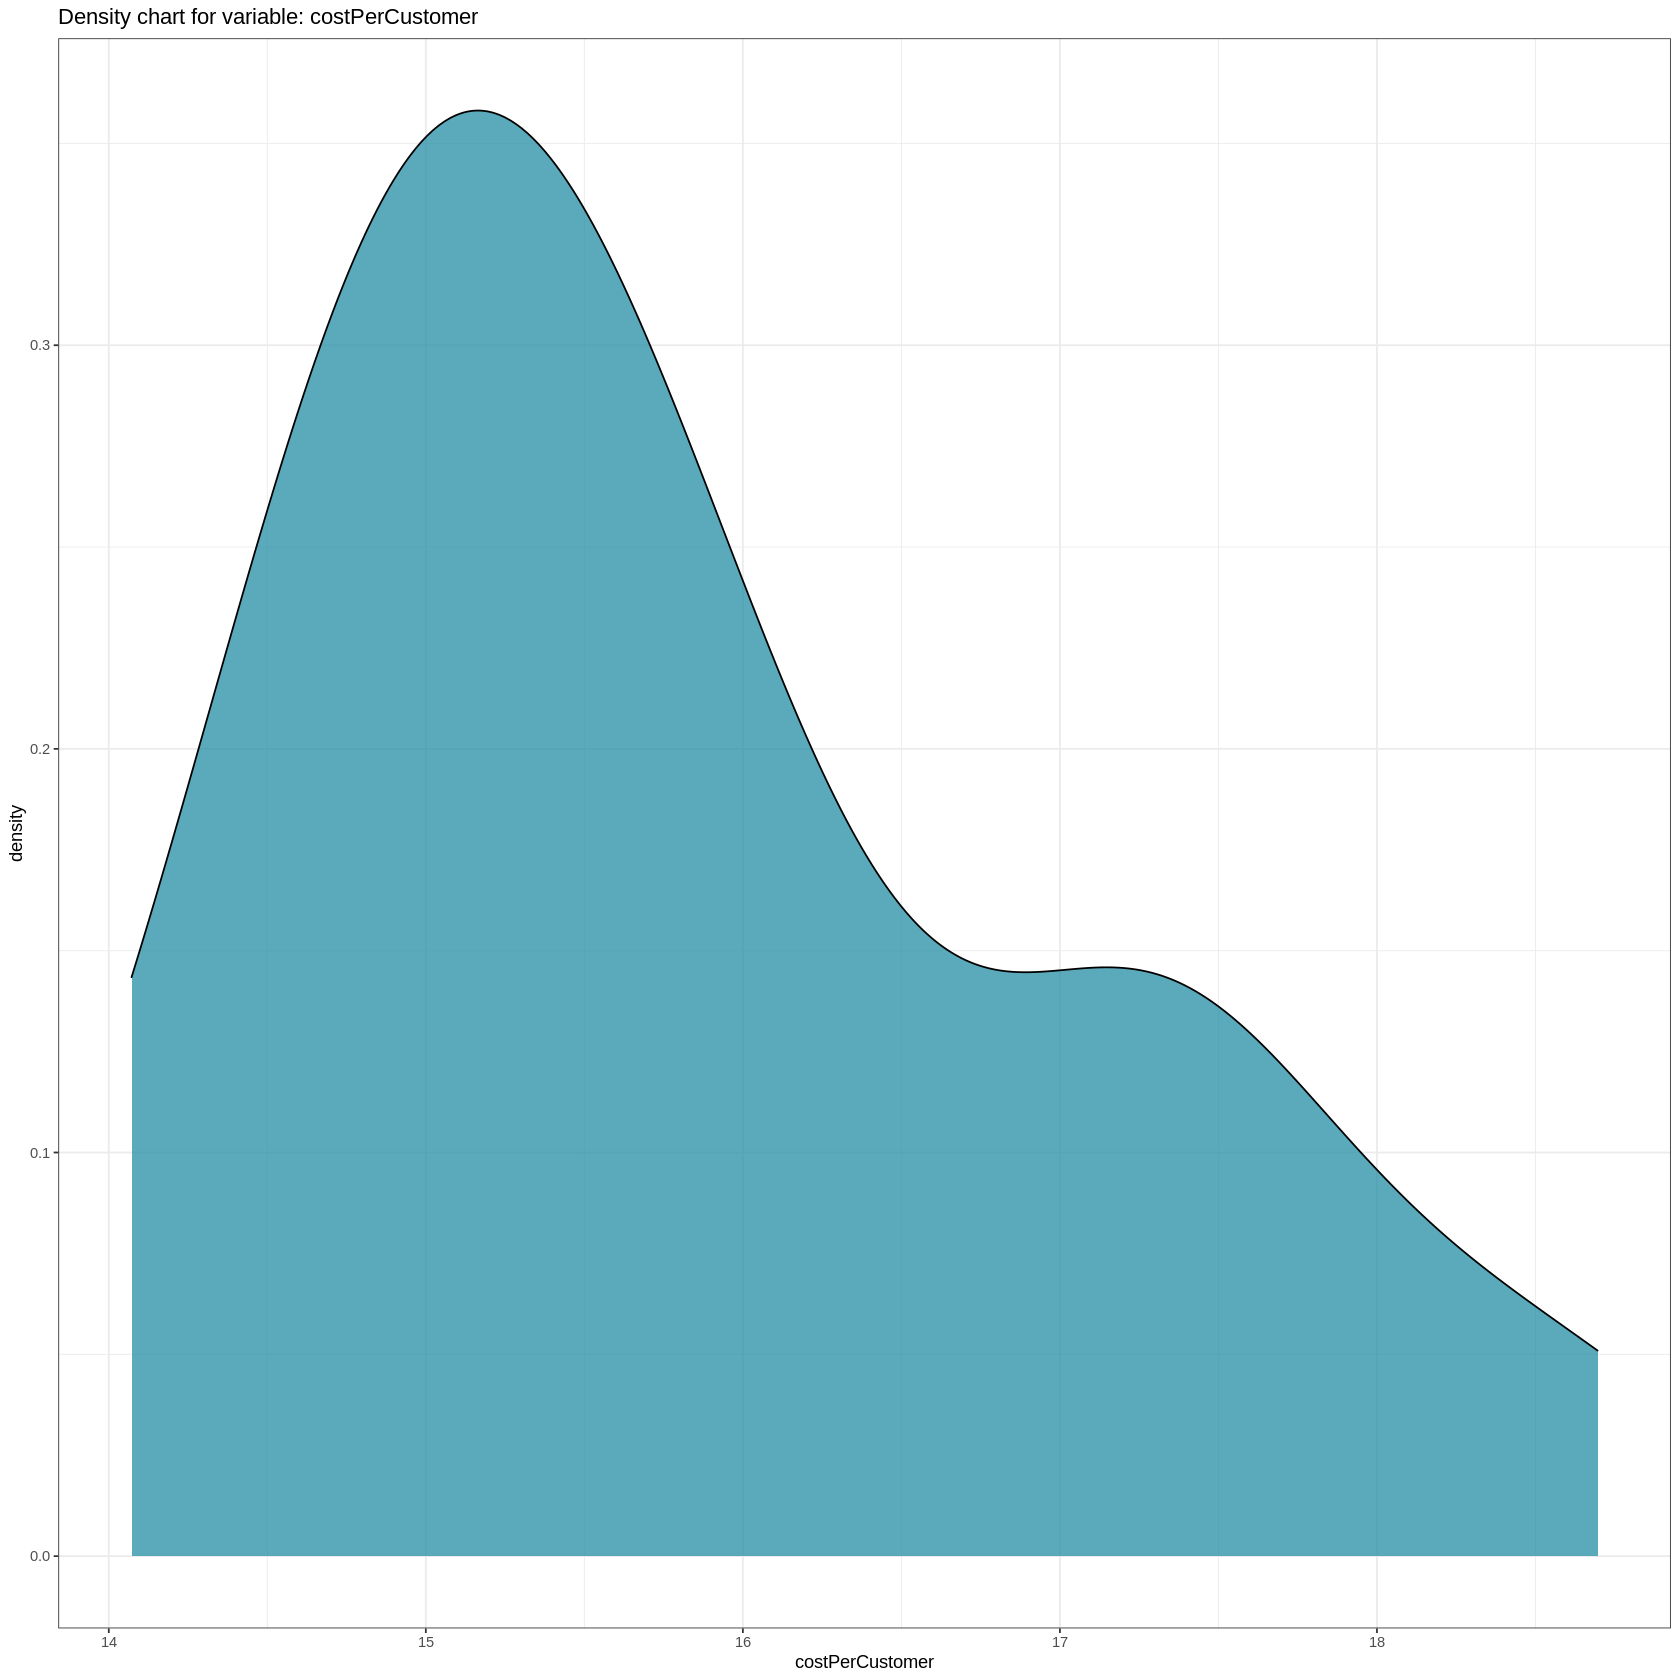

In [ ]:
# Criando um gráfico de Densidade para a variável especificada.

densityPlot(col = col, data = data)

O gráfico de densidade evidência uma assimetria à direita para o conjunto de dados, ou seja, os valores superiores à mediana variam mais do que os inferiores.

In [ ]:
# Calculando algumas estatísticas para a variável especificada.

varStats(col, data = data)

Min      Q1       Median   mean     Q3       Max      Sd     
costPerCustomer 14.07177 15.01735 15.44873 15.82456 16.59628 18.69586 1.22235
                Sk        Ck       
costPerCustomer 0.7195072 -0.570221

Destacamos que:
* A média e a mediana da taxa de custo por cliente apresentam valores muito próximos; 
* O coeficiente de assimetria (**Sk**) confirma a assimetria à direita dos dados e;
* O coeficiente de curtose (**Ck**) evidência que a calda é mais leve do que a normal, ou seja, temos uma *curtose platicúrtica*.


#### **5.3.11 Variável revenuePerCustomer**

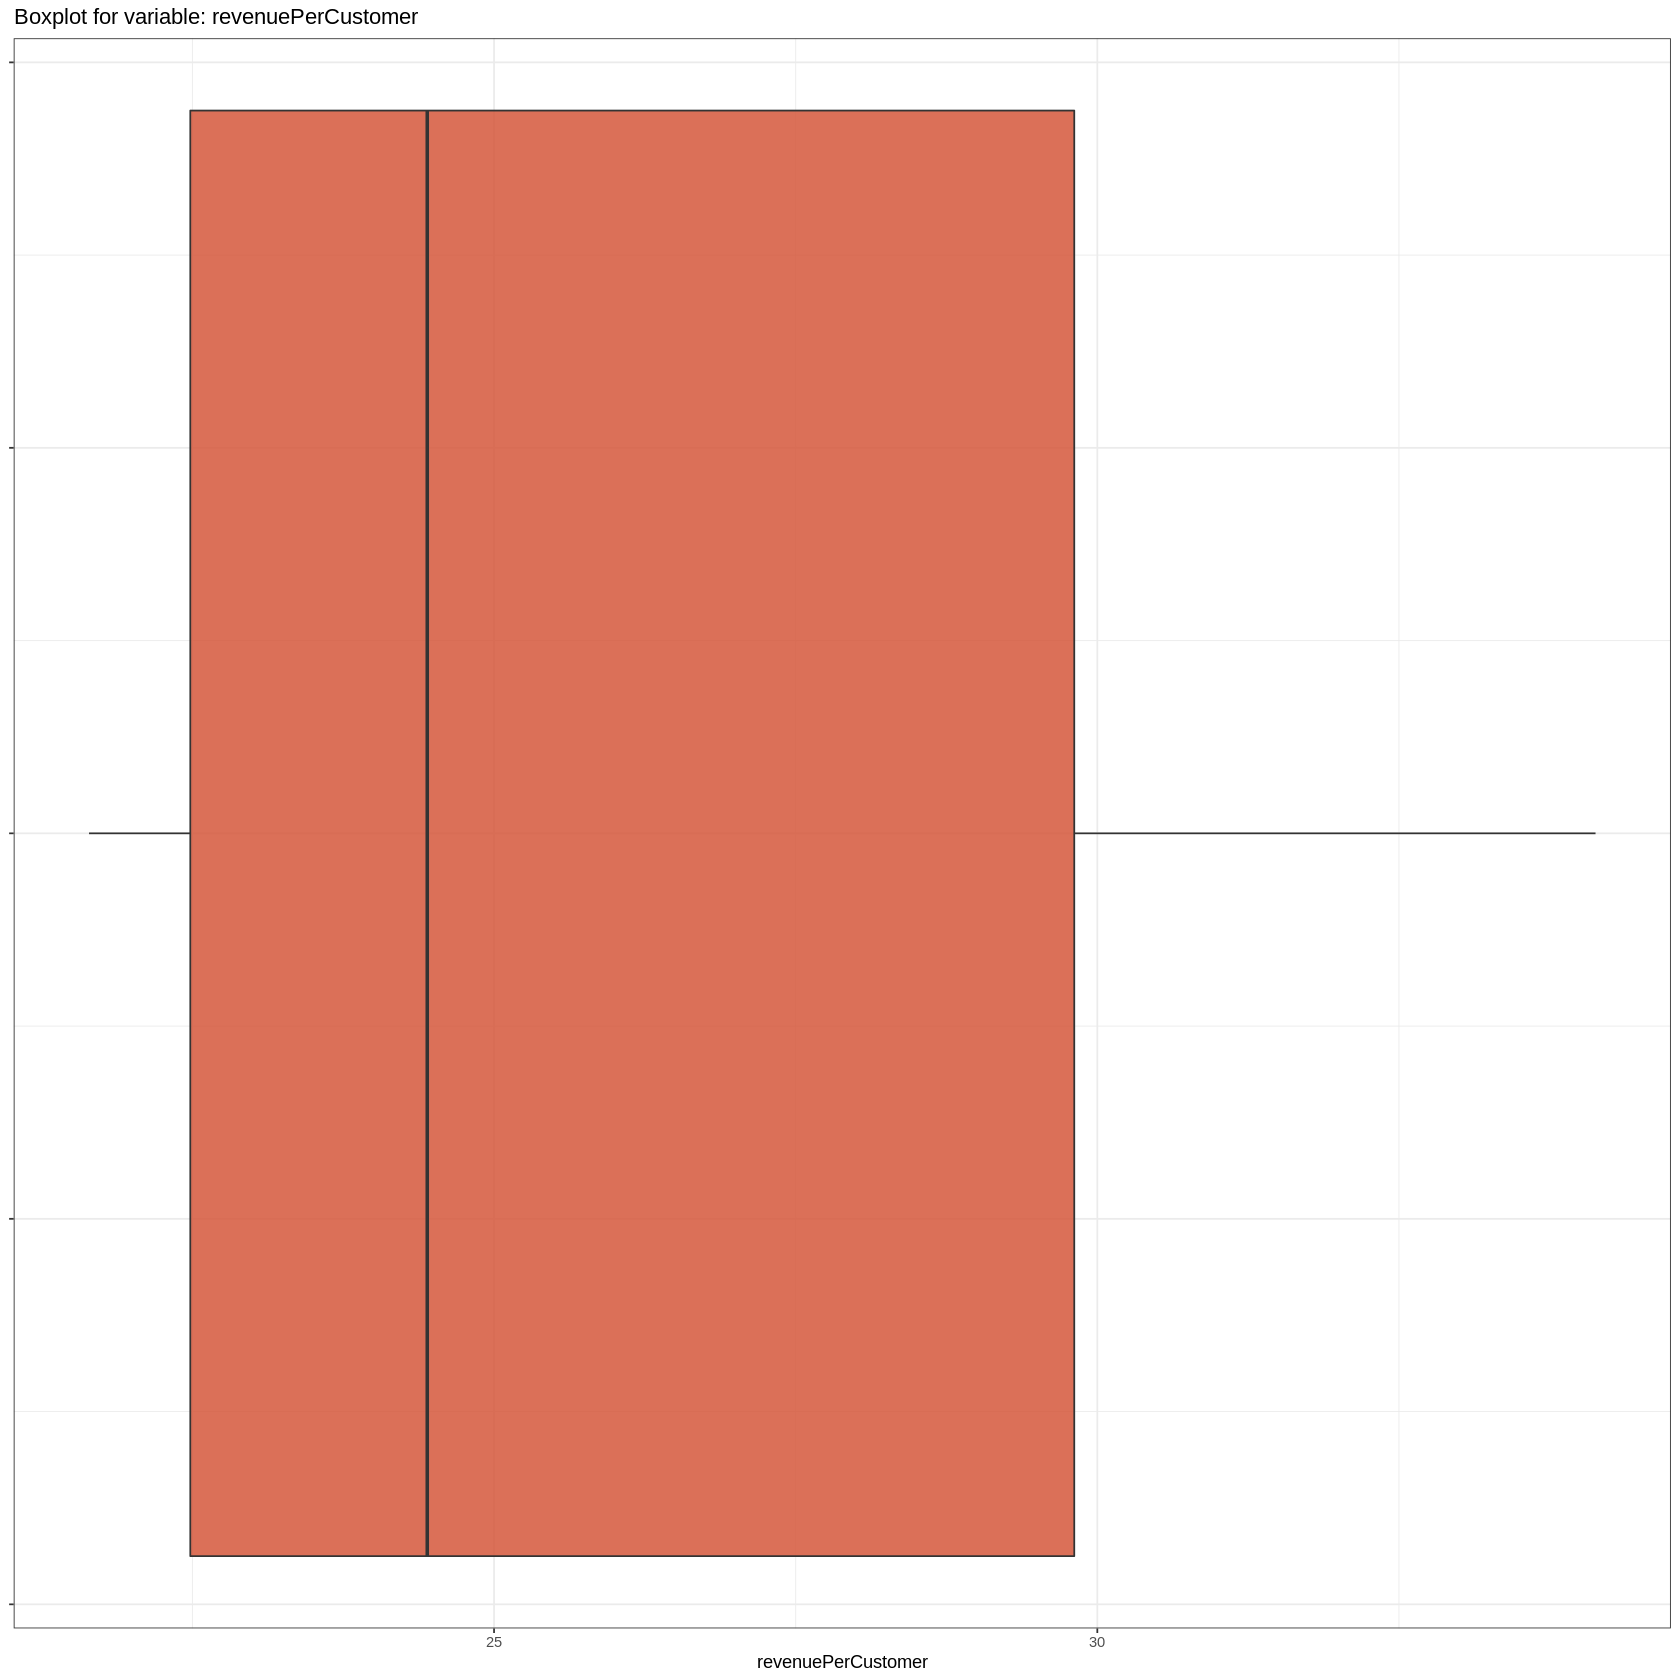

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'revenuePerCustomer'

# Criando um gráfico Boxplot para a variável especificada.

boxPlot(col = col, data = data)

O boxplot nos indica que, não há registro da taxa de receita por cliente que seja discrepante dentro do conjunto de dados.

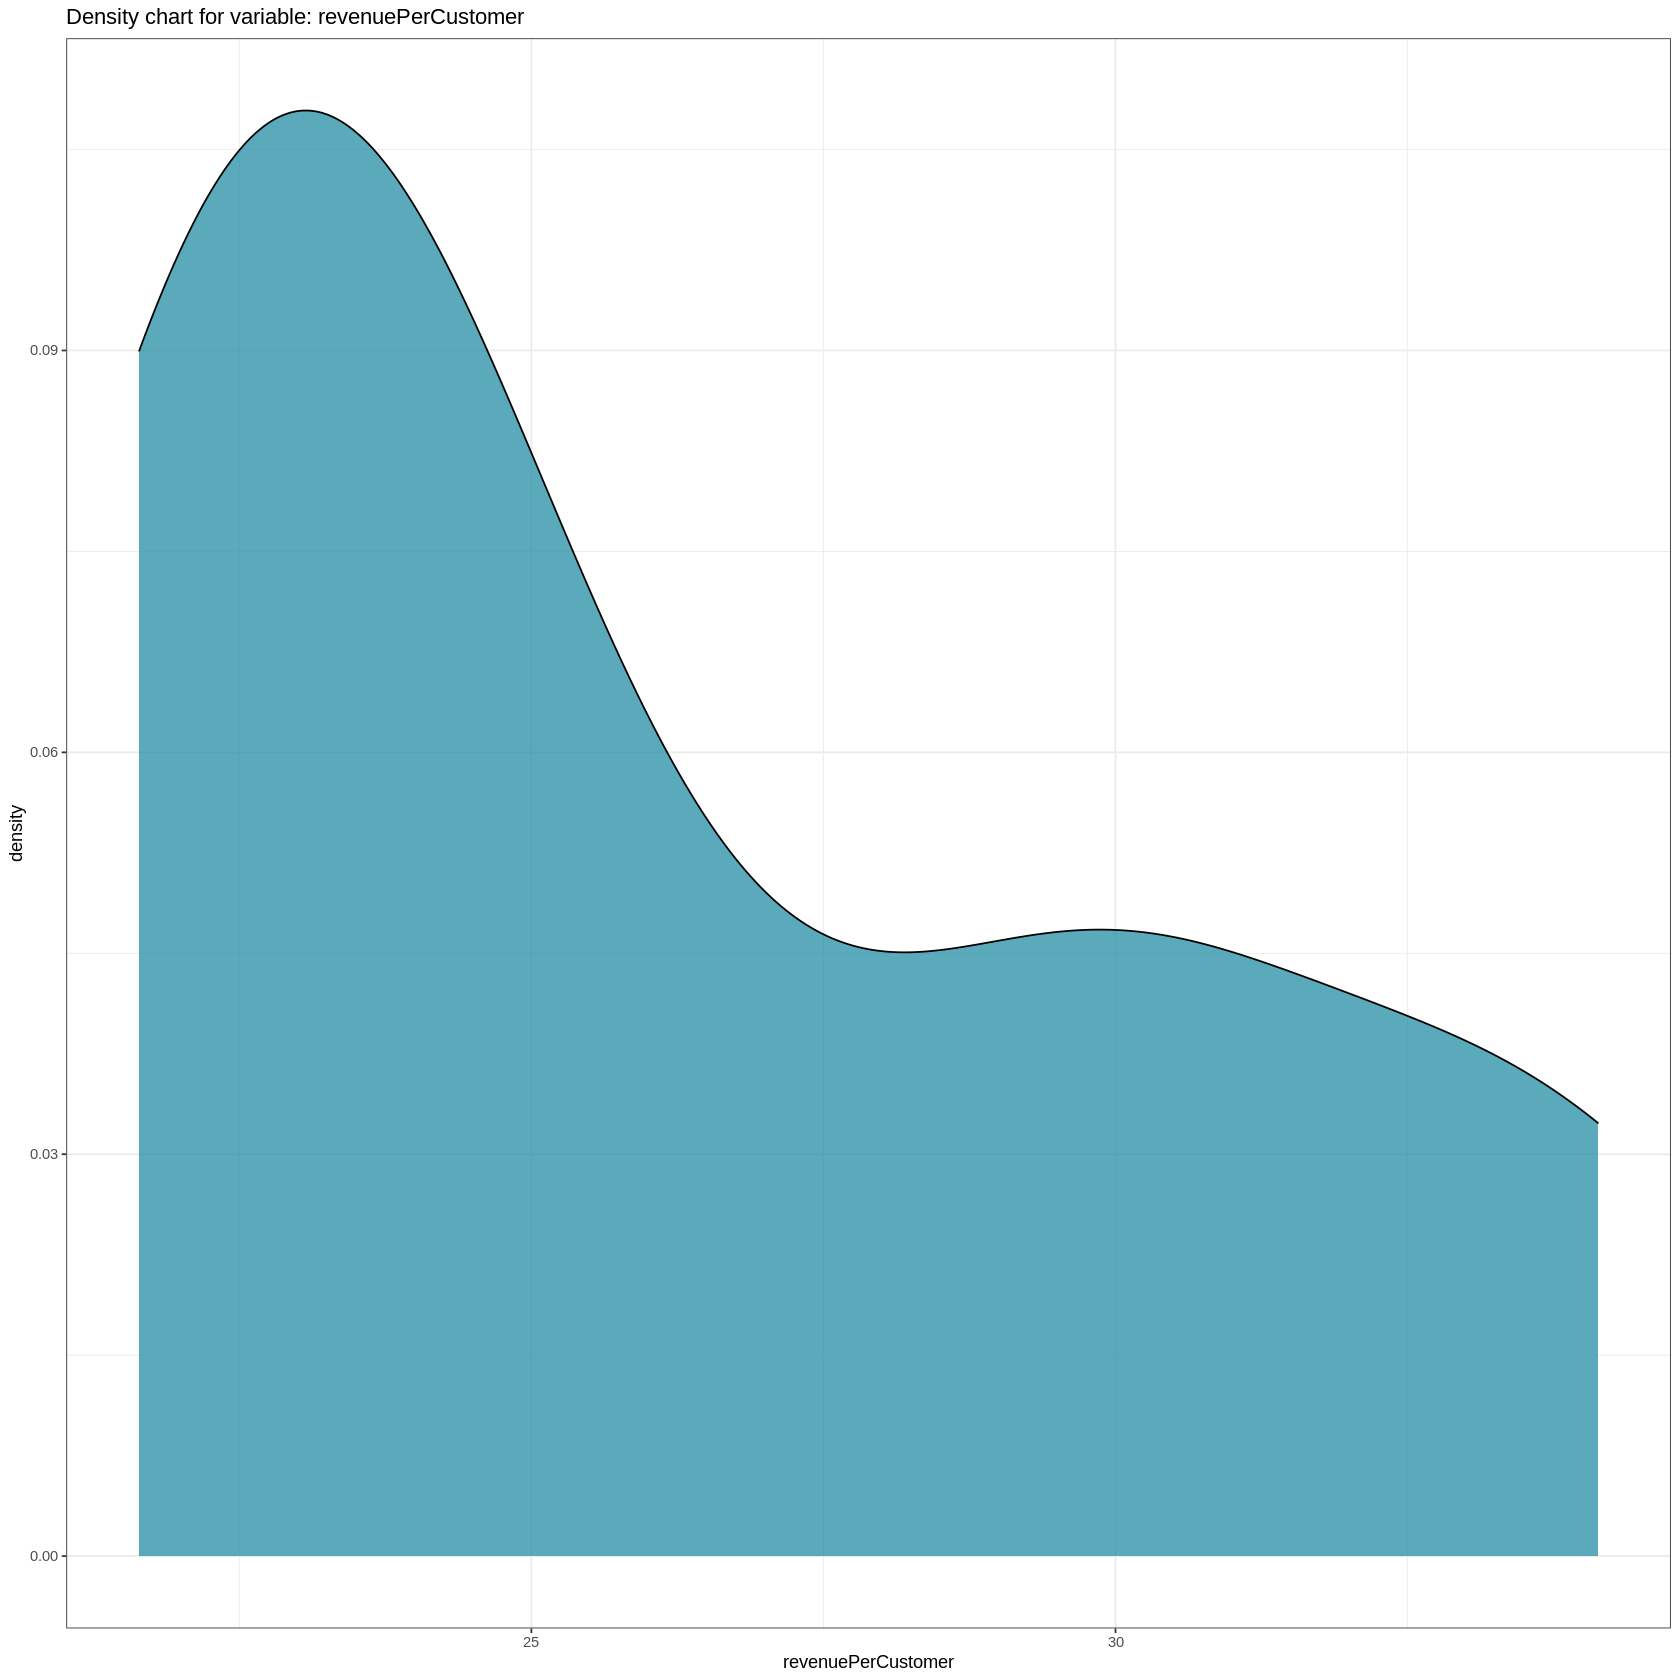

In [ ]:
# Criando um gráfico de Densidade para a variável especificada.

densityPlot(col = col, data = data)

O gráfico de densidade evidência uma assimetria à direita para o conjunto de dados, ou seja, os valores superiores à mediana variam mais do que os inferiores.

In [ ]:
# Calculando algumas estatísticas para a variável especificada.

varStats(col, data = data)

Min     Q1       Median   mean     Q3       Max     Sd     
revenuePerCustomer 21.6431 22.48249 24.44641 26.12654 29.80893 34.1294 4.27626
                   Sk       Ck       
revenuePerCustomer 0.655355 -1.117468

Destacamos que:
* A média e a mediana da taxa de receita por cliente apresentam valores muito próximos; 
* O coeficiente de assimetria (**Sk**) confirma a assimetria à direita dos dados e;
* O coeficiente de curtose (**Ck**) evidência que a calda é mais leve do que a normal, ou seja, temos uma *curtose platicúrtica*.


#### **5.3.12 Variável earningsPerCustomer**

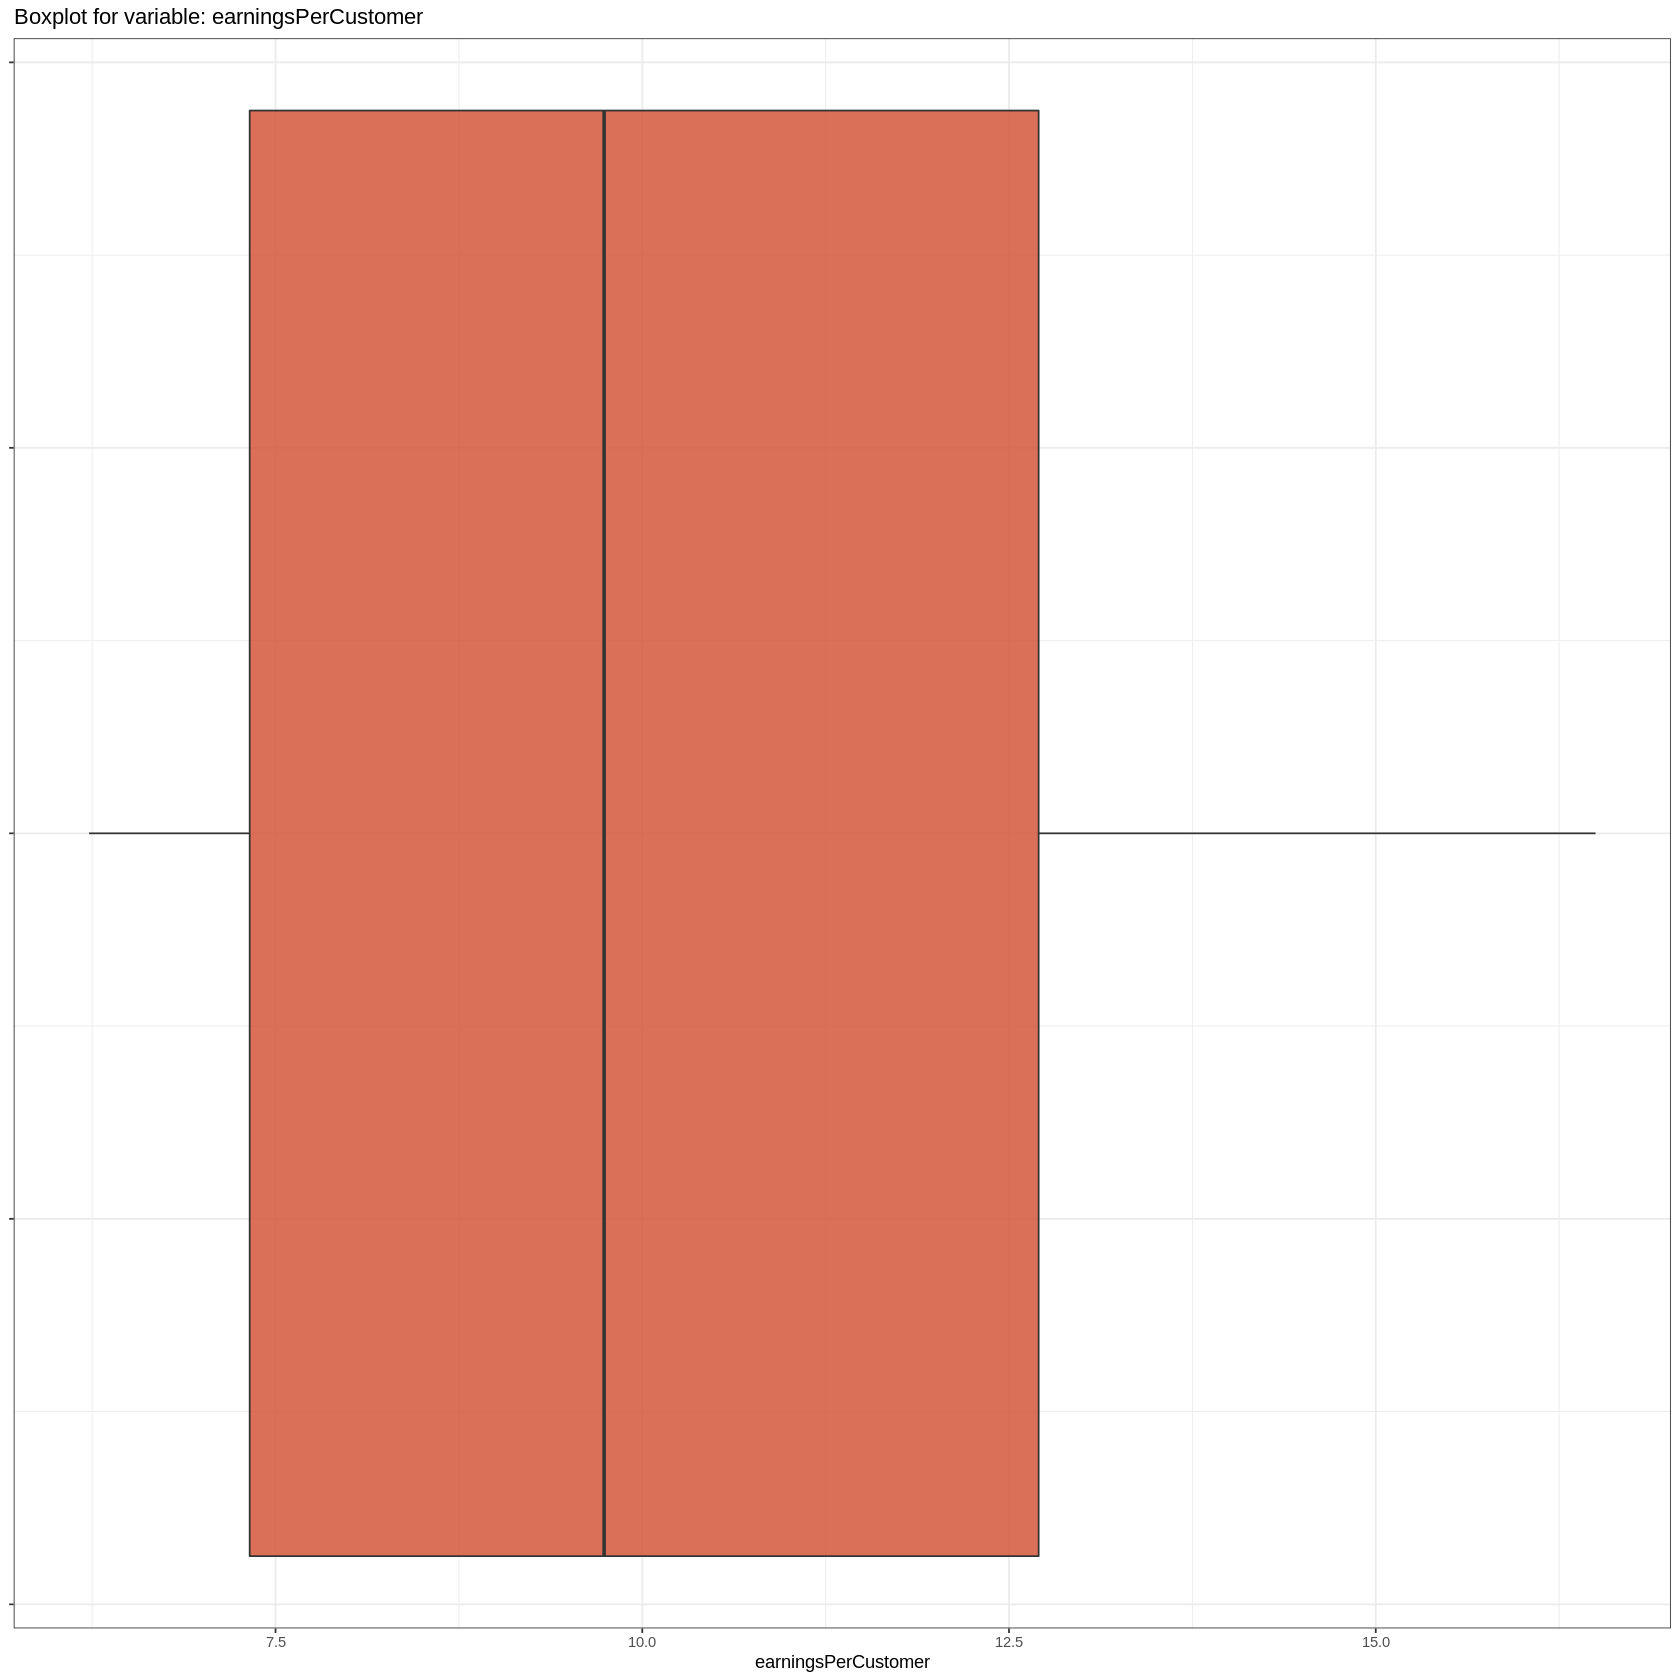

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'earningsPerCustomer'

# Criando um gráfico Boxplot para a variável especificada.

boxPlot(col = col, data = data)

O boxplot nos indica que, não há registro da taxa de ganhos por cliente que seja discrepante dentro do conjunto de dados.

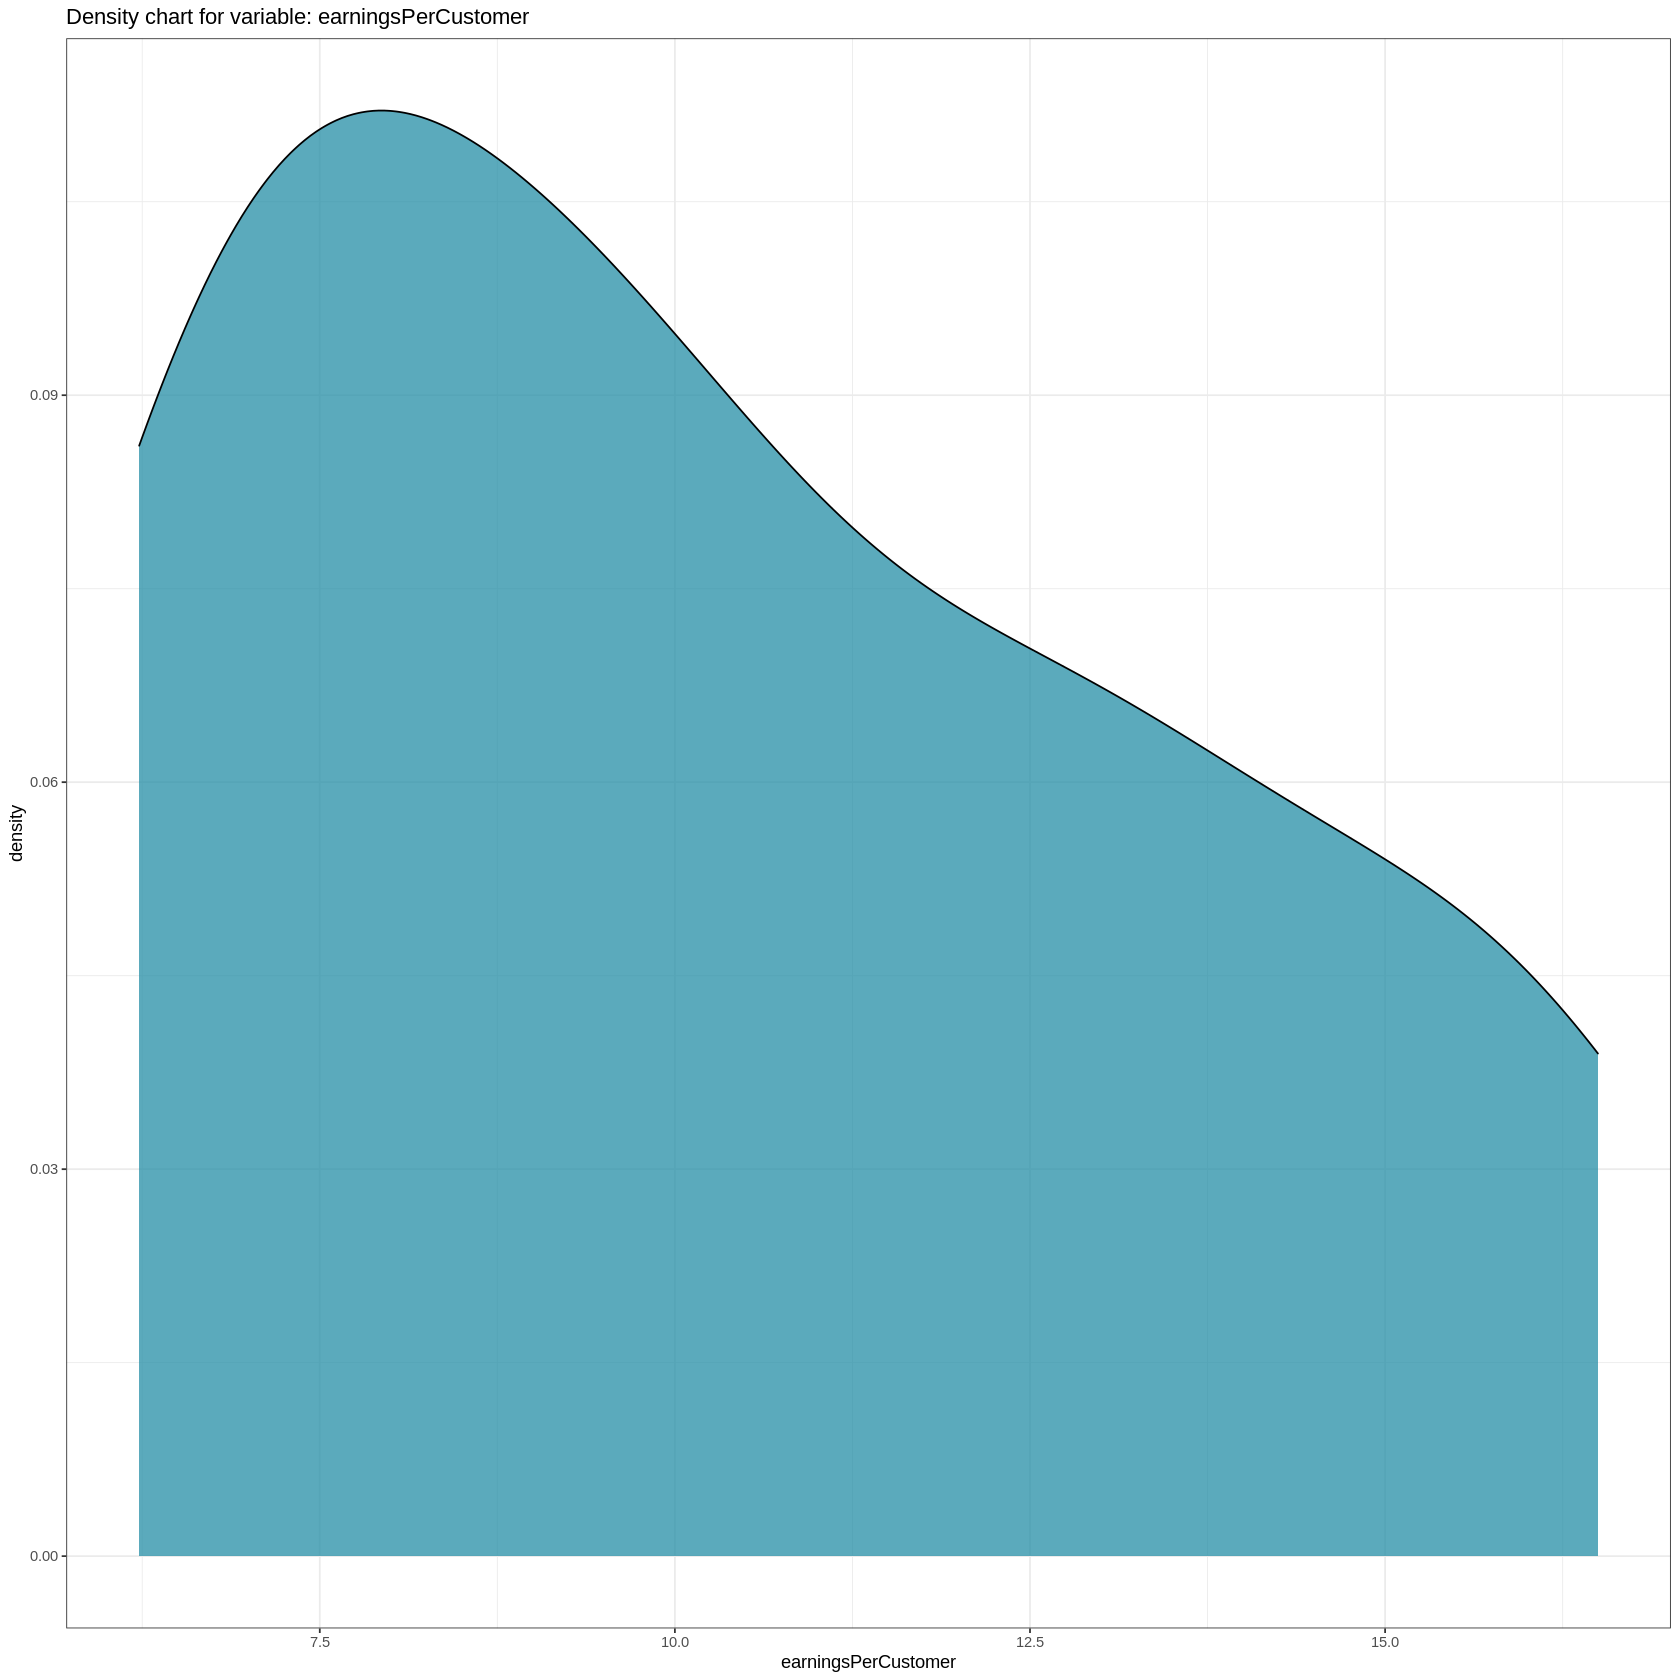

In [ ]:
# Criando um gráfico de Densidade para a variável especificada.

densityPlot(col = col, data = data)

O gráfico de densidade evidência uma assimetria à direita para o conjunto de dados, ou seja, os valores superiores à mediana variam mais do que os inferiores.

In [ ]:
# Calculando algumas estatísticas para a variável especificada.

varStats(col, data = data)

Min      Q1      Median   mean     Q3       Max     
earningsPerCustomer 6.228579 7.32382 9.739881 10.30198 12.70198 16.49828
                    Sd      Sk        Ck       
earningsPerCustomer 3.29037 0.4343922 -1.158638

Destacamos que:
* A média e a mediana da taxa de ganhos por cliente apresentam valores muito próximos; 
* O coeficiente de assimetria (**Sk**) confirma a assimetria à direita dos dados e;
* O coeficiente de curtose (**Ck**) evidência que a calda é mais leve do que a normal, ou seja, temos uma *curtose platicúrtica*.


#### **5.3.13 Variável segment**

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'segment'

# Calculando algumas estatísticas para a variável especificada.

varStats(col, data = data)

`summarise()` ungrouping output (override with `.groups` argument)



segment   count prop
segment Streaming 28    100

Detectamos que não há variação alguma entre os valores da variável **segment**, ou seja, só há uma classe associada a todos os registro do dataset.

Ao analisarmos a documentação, observamos que a Netflix opera em três segmentos: *International Streaming*, *Domestic Streaming* e *Domestic DVD*. A categoria na qual os dados estão classificados é denomidada **Streaming**, e ao compará-los com os dados fornecidos pela [Netflix Investor](https://www.netflixinvestor.com/financials/quarterly-earnings/default.aspx), identificamos que o segmento do qual as informações foram extraídas foi o **doméstico**.

#### **5.3.14 Variável freeTrialsFromTotal**

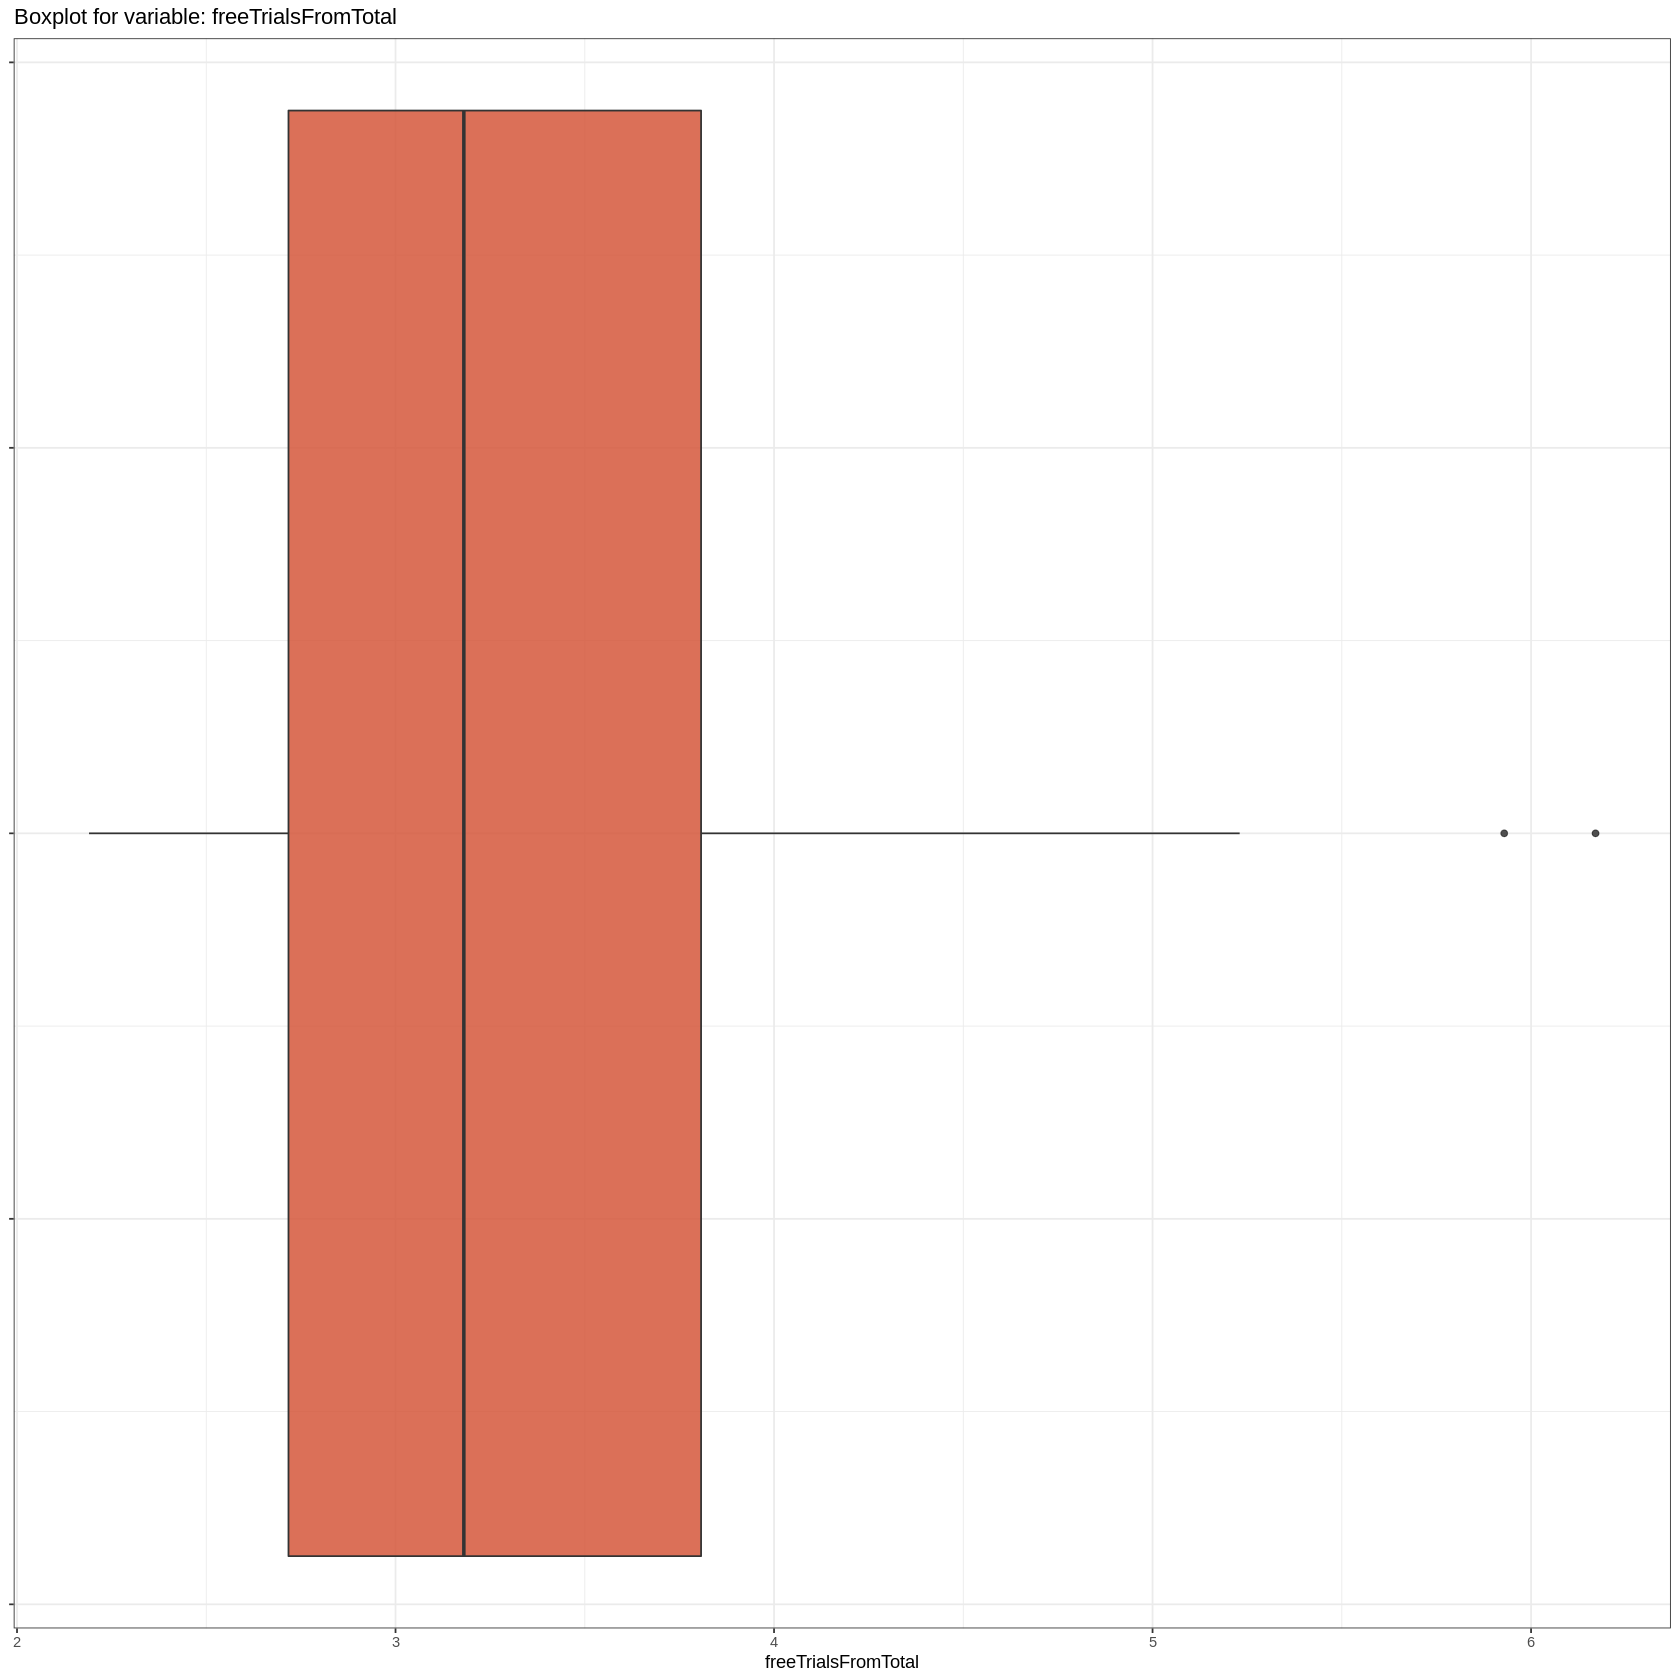

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'freeTrialsFromTotal'

# Criando um gráfico Boxplot para a variável especificada.

boxPlot(col = col, data = data)

O boxplot nos indica que, há registros sobre a proporção de avaliações gratuitas do total de assinaturas discrepantes dentro do conjunto de dados. Os outliers estão localizados no limite superior do gráfico, ou seja, há registros em que a proporção fugiu do padrão, indicando que nestas épocas as avaliações em período experimental aumentaram consideravelmente. 

Vamos identificar quais são estes registros!

In [ ]:
# Extraindo registros em que o valor da variável especificada tenha sido considerado um outlier.

getOutliers(col = col, data = data)

date       totalSubscriptions paidSubscriptions freeTrails revenue
1 2012-03-31 23410              22022             1388       506665 
2 2012-12-31 27146              25471             1675       589471 
  costOfRevenues marketing contributionProfit contributionMargin
1 360776         79381      66508             0.131             
2 420390         59777     109304             0.185             
  costPerCustomer revenuePerCustomer earningsPerCustomer segment   month   
1 15.41119        21.64310           6.231909            Streaming March   
2 15.48626        21.71484           6.228579            Streaming December
  year freeTrialsFromTotal marketingFromTotal
1 2012 5.929090            18.03470          
2 2012 6.170338            12.44921

Interessante! Pelas análises que fizemos até aqui, não há nenhuma explicação para que o primeiro e quarto trimestres de 2012 apresentem tais valores discrepantes. Mas, certamente deve haver um motivo para isso, não é mesmo?

Quando [pesquisamos](https://en.wikipedia.org/wiki/Netflix) sobre o que ocorreu com a Netflix em 2012, constatamos que neste ano a empresa passou a assumir um papel ativo como produtora, e distribuidora de filmes e séries de televisão, e para esse fim, passou a oferecer uma variedade de conteúdo *Original* por meio de sua biblioteca on-line.

Dito isto, podemos supor que uma explicação plausível, para estas proporções de avaliações gratuitas em relação ao total de assinaturas registradas terem apresentado valores discrepantes, pode ter sido causada pela mudança do paradigma operacional, que a empresa adotou quando passou a criar produtos autorais.

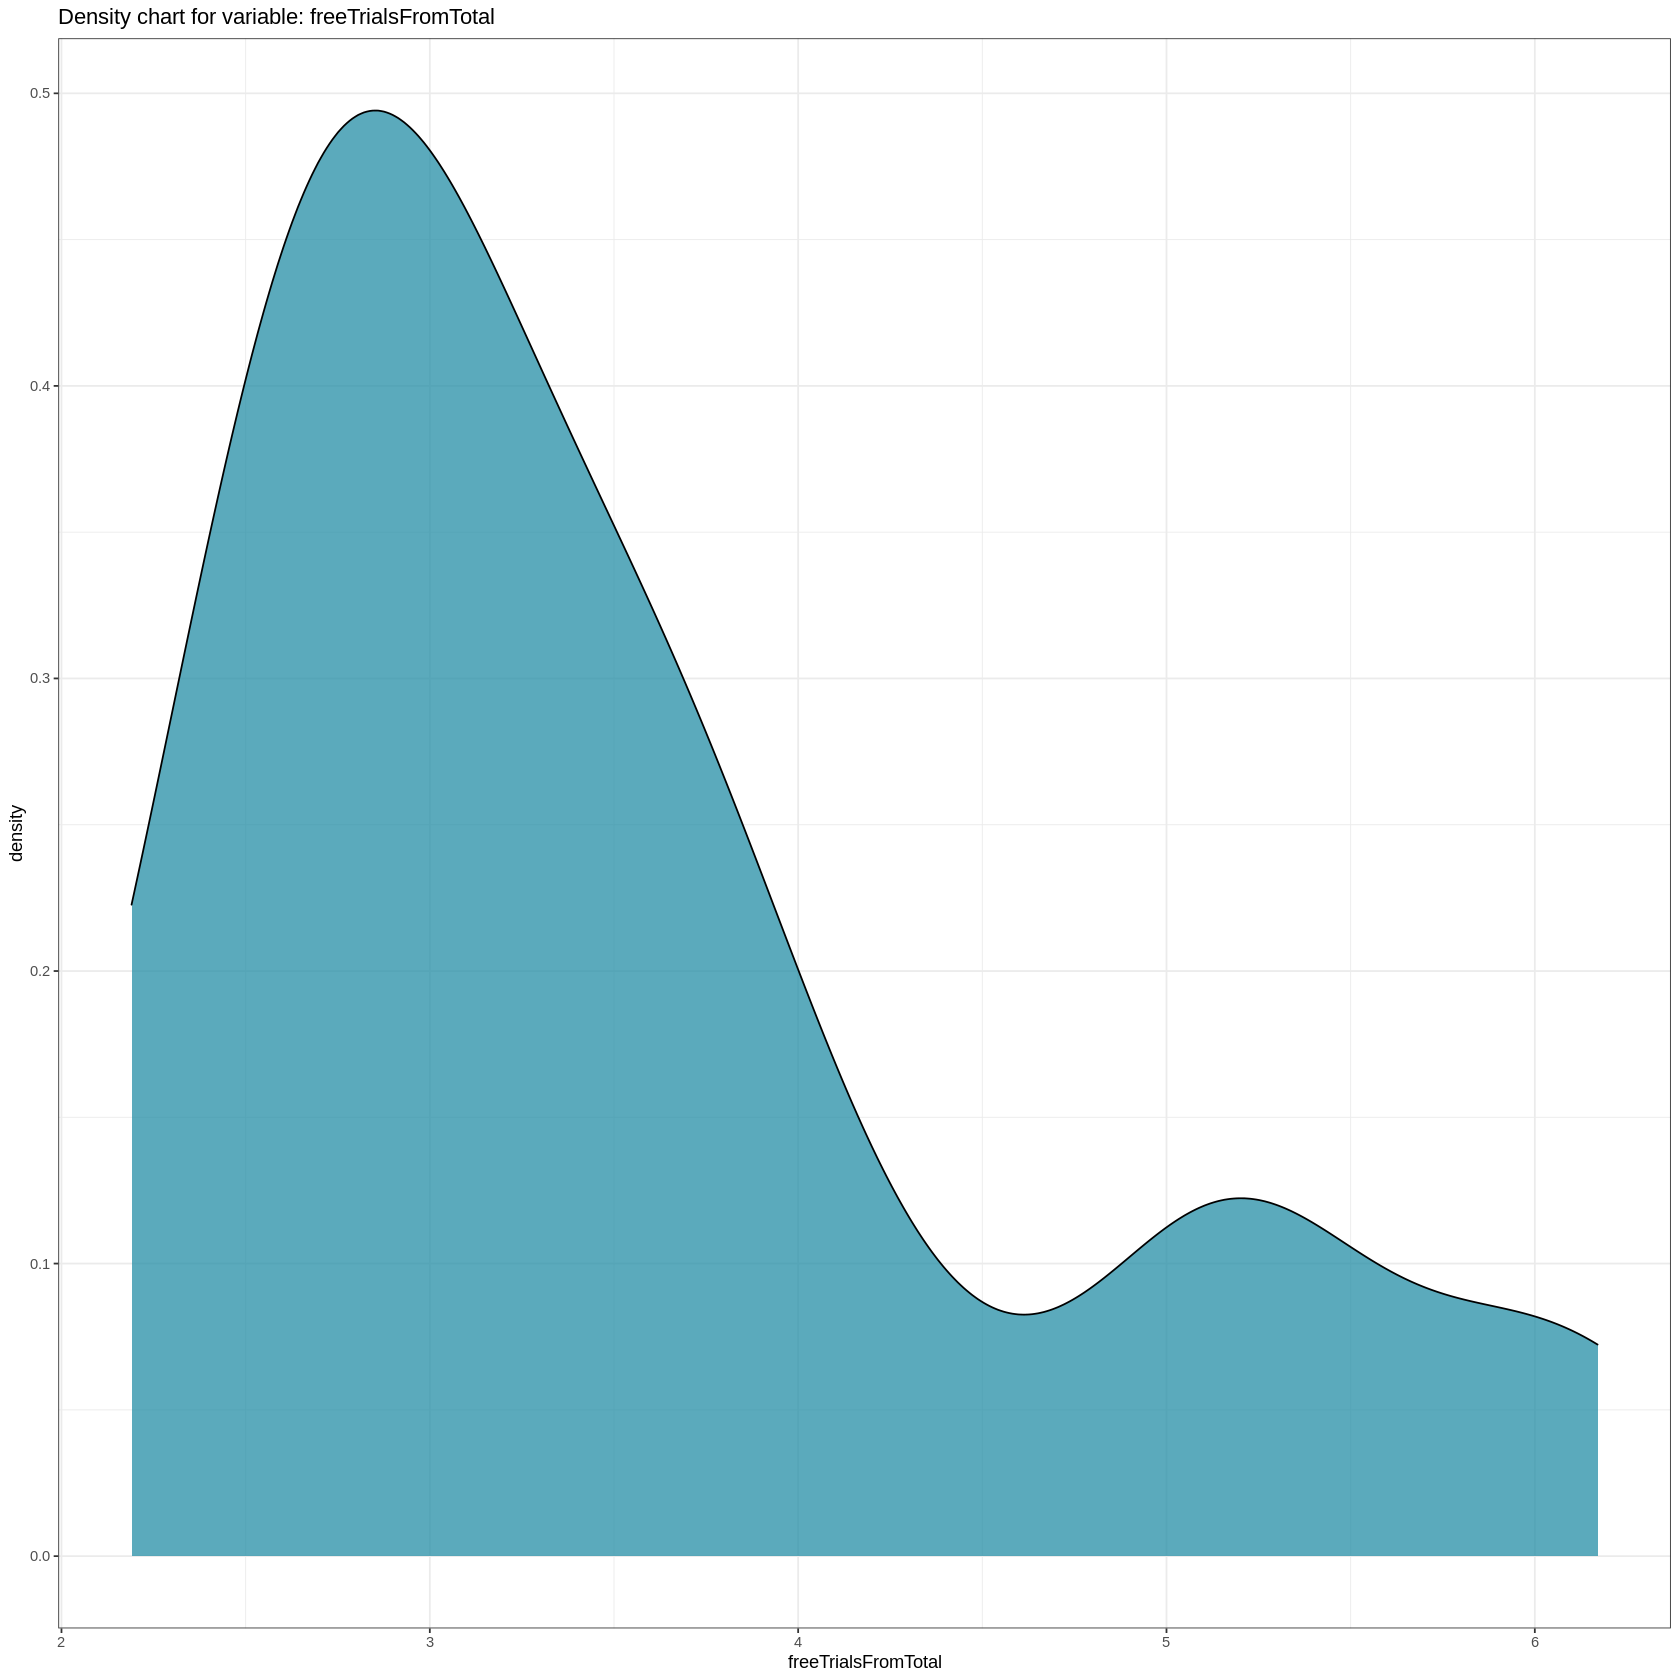

In [ ]:
# Criando um gráfico de Densidade para a variável especificada.

densityPlot(col = col, data = data)

O gráfico de densidade evidência uma assimetria à direita para o conjunto de dados, ou seja, os valores superiores à mediana variam mais do que os inferiores.

In [ ]:
# Calculando algumas estatísticas para a variável especificada.

varStats(col, data = data)

Min      Q1      Median   mean     Q3       Max     
freeTrialsFromTotal 2.190236 2.71718 3.180479 3.522725 3.807249 6.170338
                    Sd       Sk       Ck         
freeTrialsFromTotal 1.088408 1.030699 -0.07389296

Destacamos que:
* A média e a mediana da  proporção de avaliações gratuitas do total de assinaturas apresentam valores muito próximos; 
* O coeficiente de assimetria (**Sk**) confirma a assimetria à direita dos dados e;
* O coeficiente de curtose (**Ck**) evidência que a calda é mais leve do que a normal, ou seja, temos uma *curtose platicúrtica*.


#### **5.3.15 Variável marketingFromTotal**

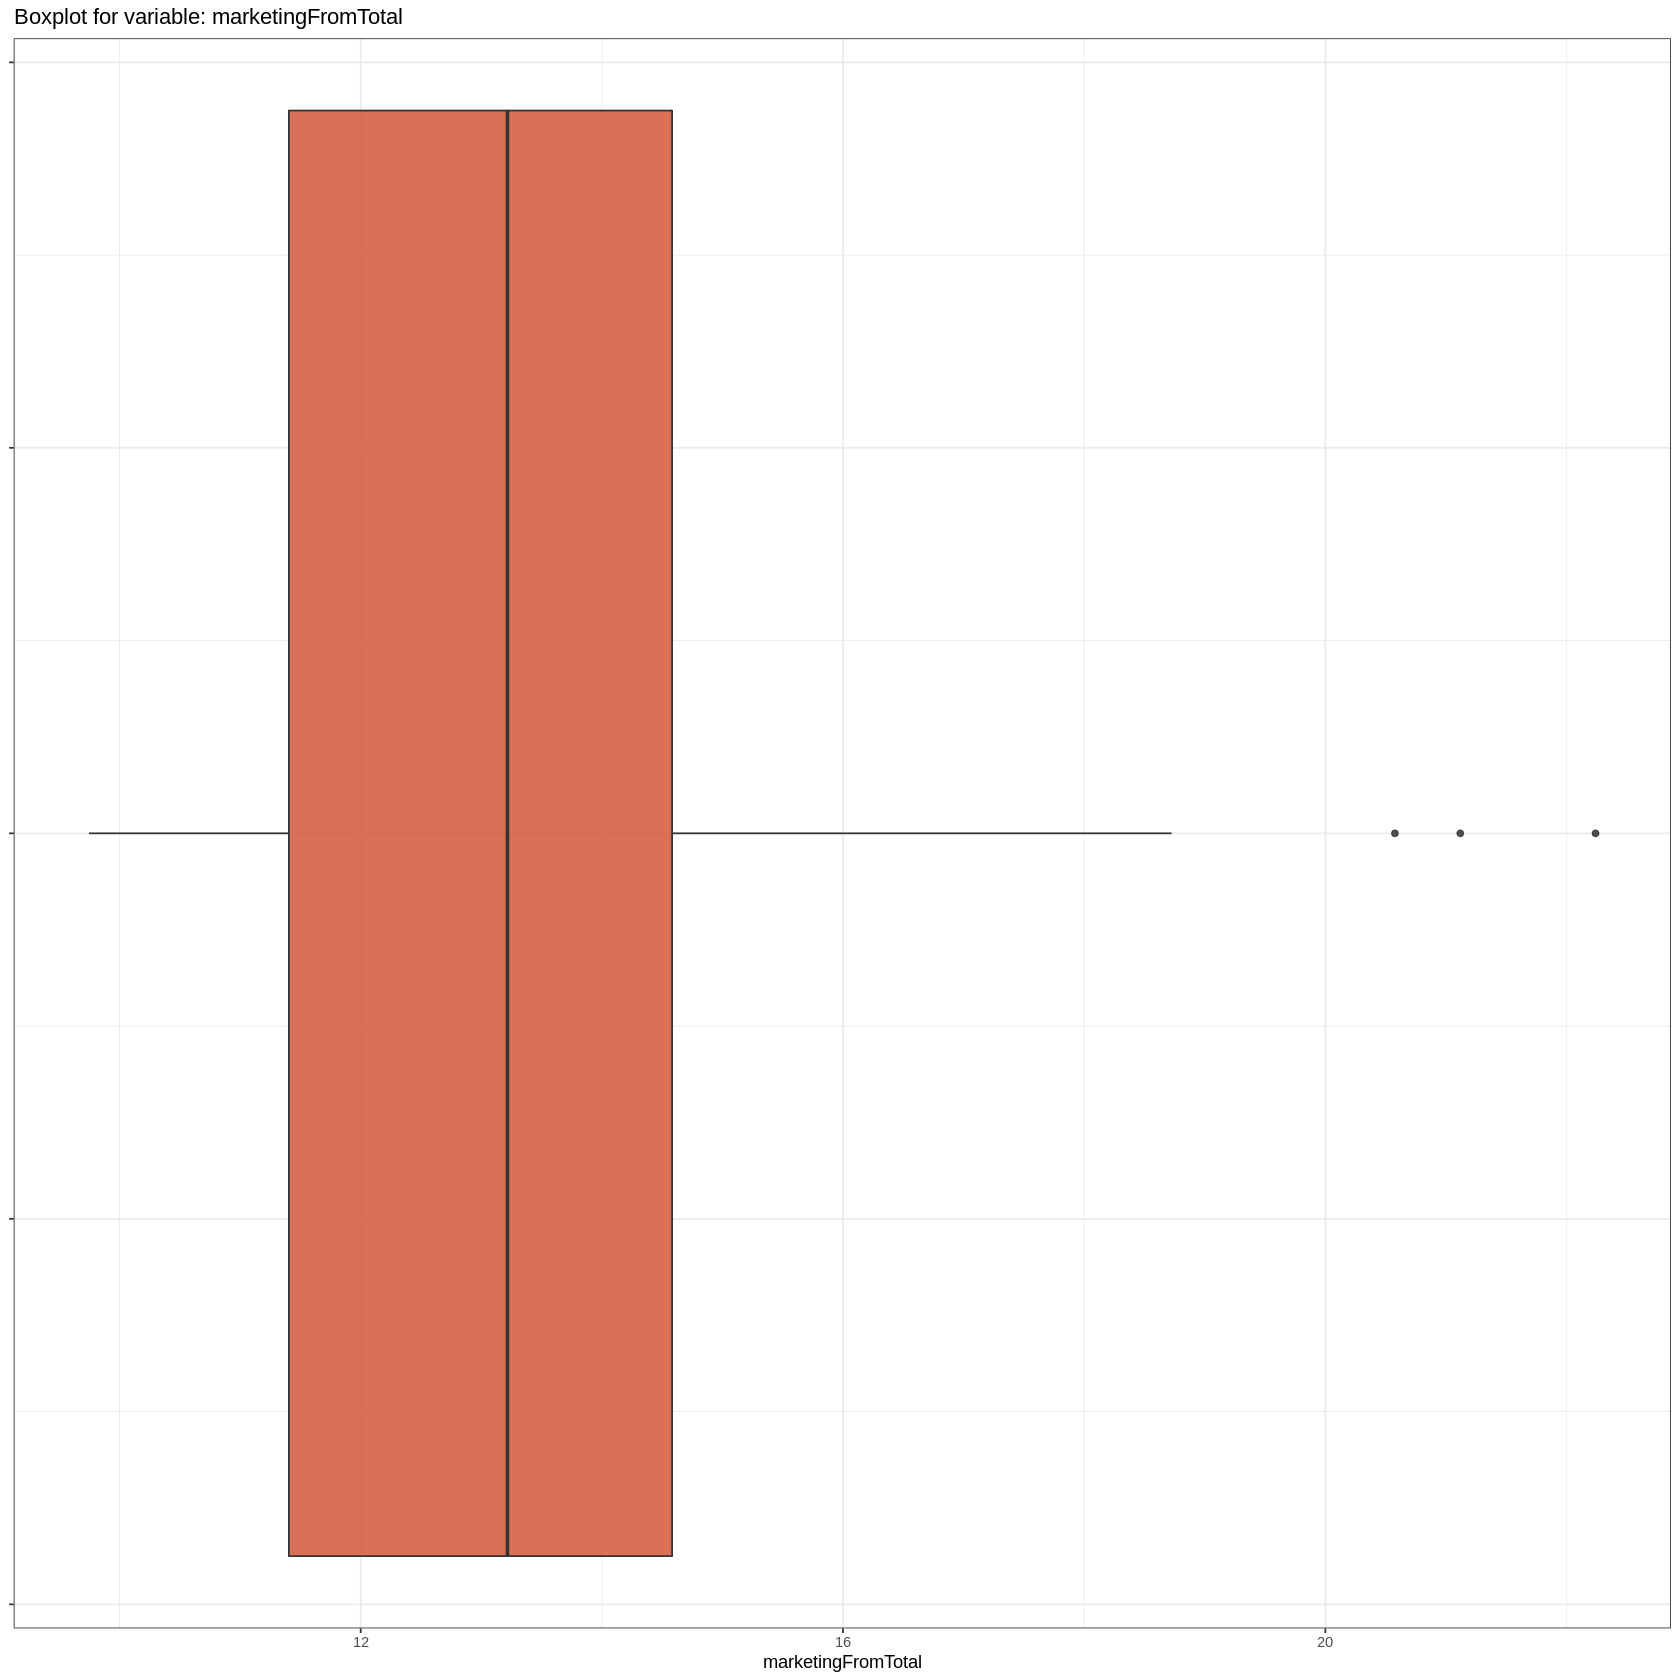

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'marketingFromTotal'

# Criando um gráfico Boxplot para a variável especificada.

boxPlot(col = col, data = data)

O boxplot nos indica que, há registros sobre a proporção de custo com marketing em relação ao total de custos discrepantes dentro do conjunto de dados. Vemos que os outliers estão localizados no limite superior do gráfico, ou seja, há registros em que a proporção fugiu do padrão indicando que nestas épocas as proporções de gastos com marketing foram consideravelmente mais altas. 

Vamos identificar quais são estes registros.

In [ ]:
# Extraindo registros em que o valor da variável especificada tenha sido considerado um outlier.

getOutliers(col = col, data = data)

date       totalSubscriptions paidSubscriptions freeTrails revenue
1 2018-03-31 55087              53469             1618       1820019
2 2018-06-30 55959              54539             1420       1893222
3 2018-12-31 58486              56421             2065       1996092
  costOfRevenues marketing contributionProfit contributionMargin
1  936480        250719    632820             0.348             
2  969995        251298    671929             0.355             
3 1093446        312739    589907             0.296             
  costPerCustomer revenuePerCustomer earningsPerCustomer segment   month   
1 17.00002        33.03899           16.03897            Streaming March   
2 17.33403        33.83231           16.49828            Streaming June    
3 18.69586        34.12940           15.43354            Streaming December
  year freeTrialsFromTotal marketingFromTotal
1 2018 2.937172            21.11853          
2 2018 2.537572            20.57639          
3 2018 3.530759            22.24025

Verificamos que a partir do **primeiro trimestre de 2018**, a proporção de gastos com marketing passou a fugir do padrão, o que pode estar indicando uma nova tendência para estas despesas nos próximos anos.

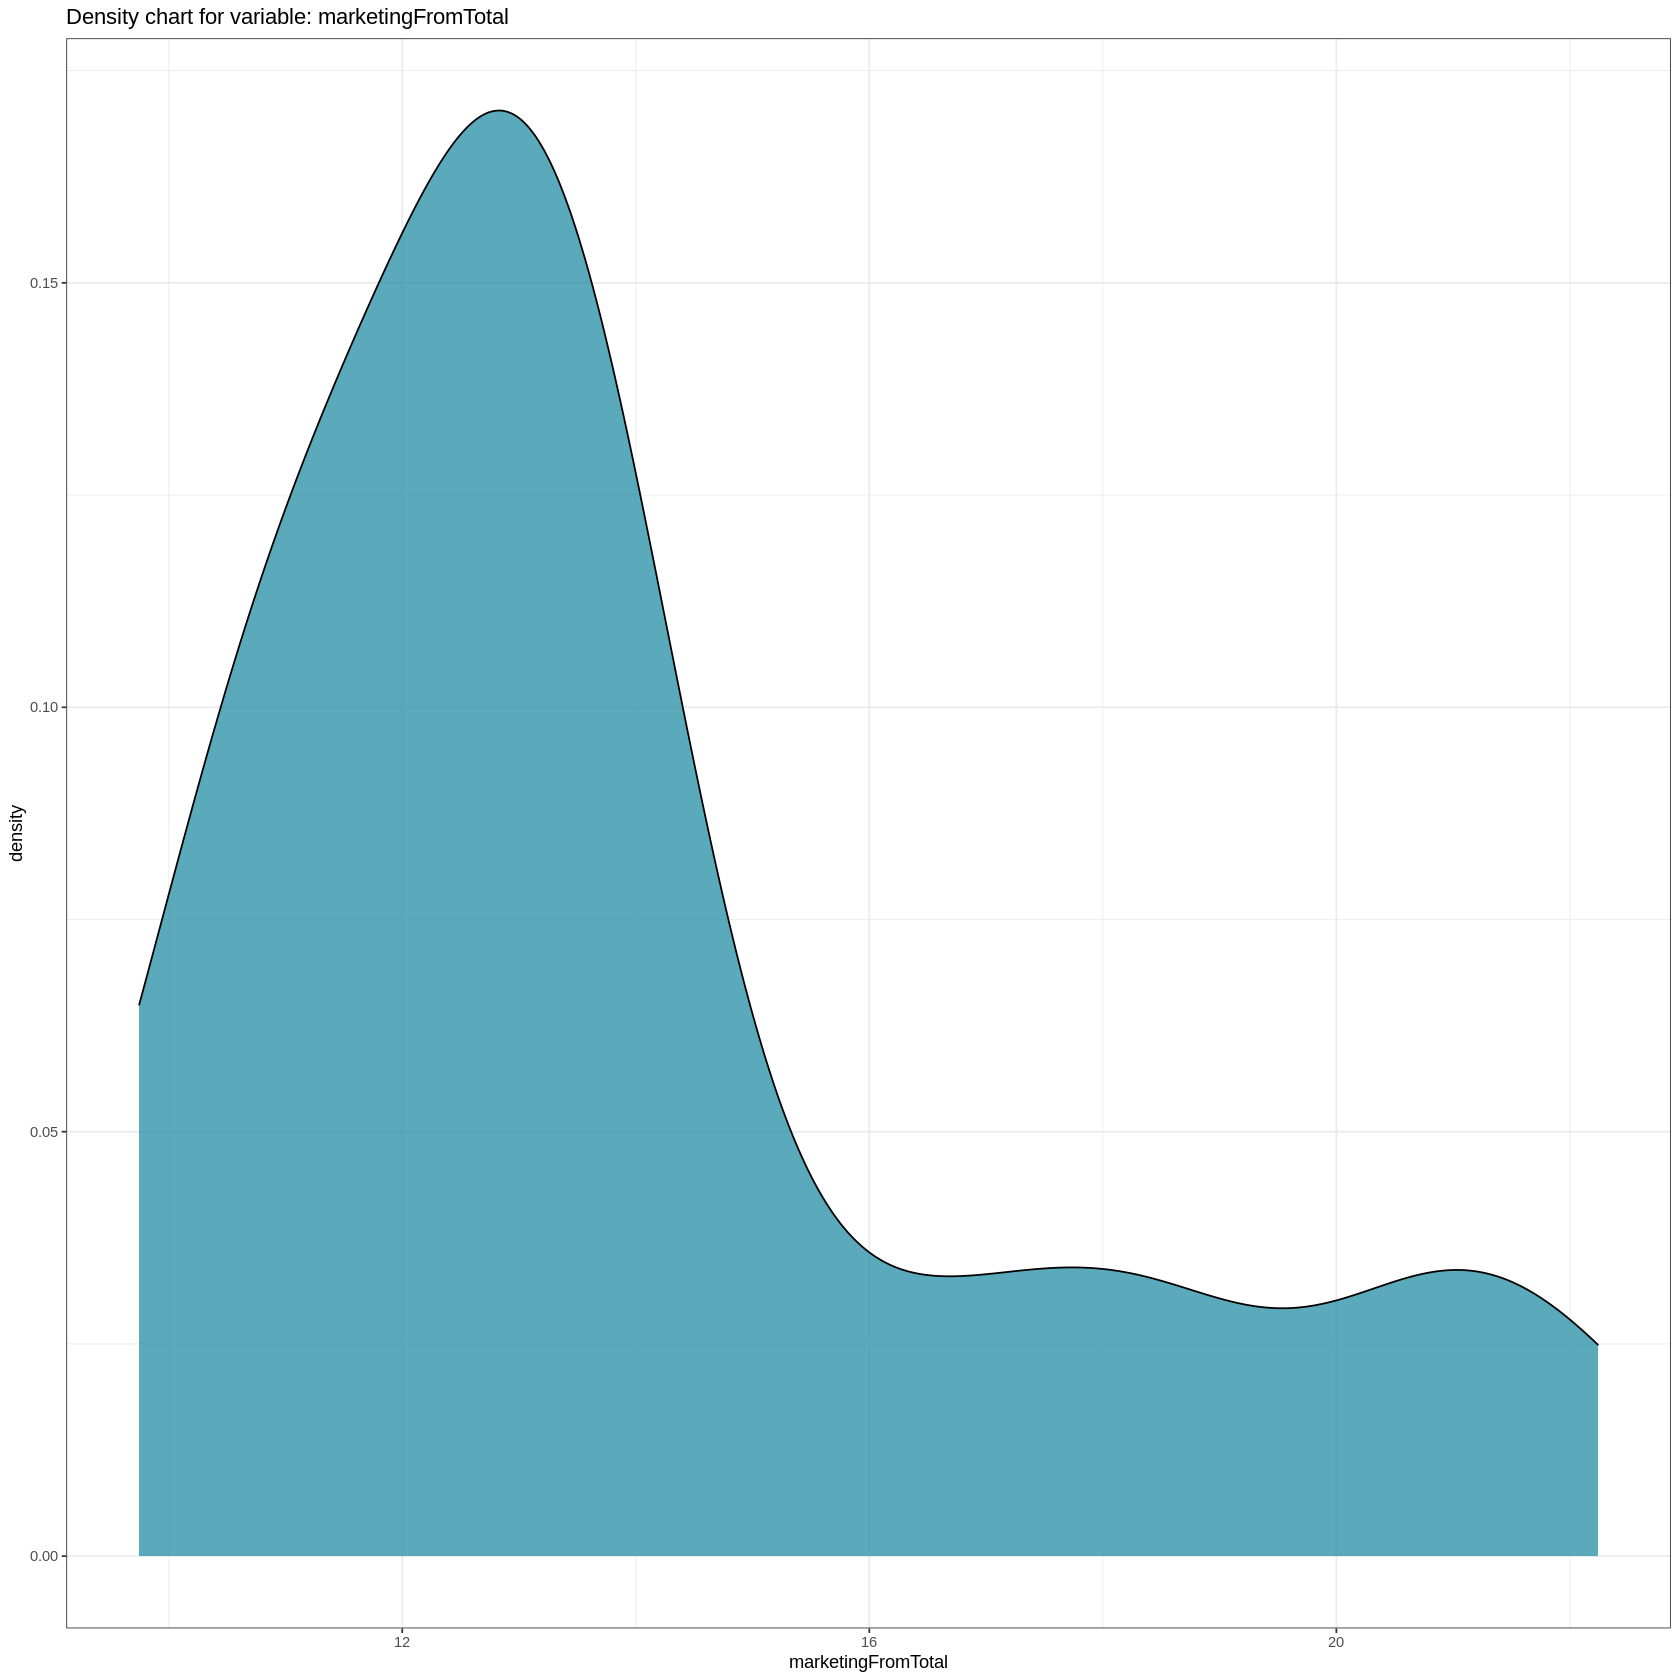

In [ ]:
# Criando um gráfico de Densidade para a variável especificada.

densityPlot(col = col, data = data)

O gráfico de densidade evidência uma assimetria à direita para o conjunto de dados, ou seja, os valores superiores à mediana variam mais do que os inferiores.

In [ ]:
# Calculando algumas estatísticas para a variável especificada.

varStats(col, data = data)

Min      Q1       Median   mean     Q3       Max     
marketingFromTotal 9.746989 11.40432 13.21693 13.97242 14.58236 22.24025
                   Sd       Sk       Ck        
marketingFromTotal 3.374485 1.053826 0.03189463

Destacamos que:

* A média e a mediana das proporção de custo com marketing em relação ao total de custos apresentam valores muito próximos; 
* O coeficiente de assimetria (**Sk**) confirma a assimetria à direita dos dados e;
* O coeficiente de curtose (**Ck**) evidência que a calda é mais pesada do que a normal, ou seja, temos uma *curtose leptocúrtica*.


### **5.4 Explorando a distribuição de cada variável a partir dos resultados trimestrais e anuais**

Nesta etapa, iremos analisar as informações que conseguimos extrair de cada variável agrupada por trimestre e ano.

#### **5.4.1 Variável totalSubscriptions**

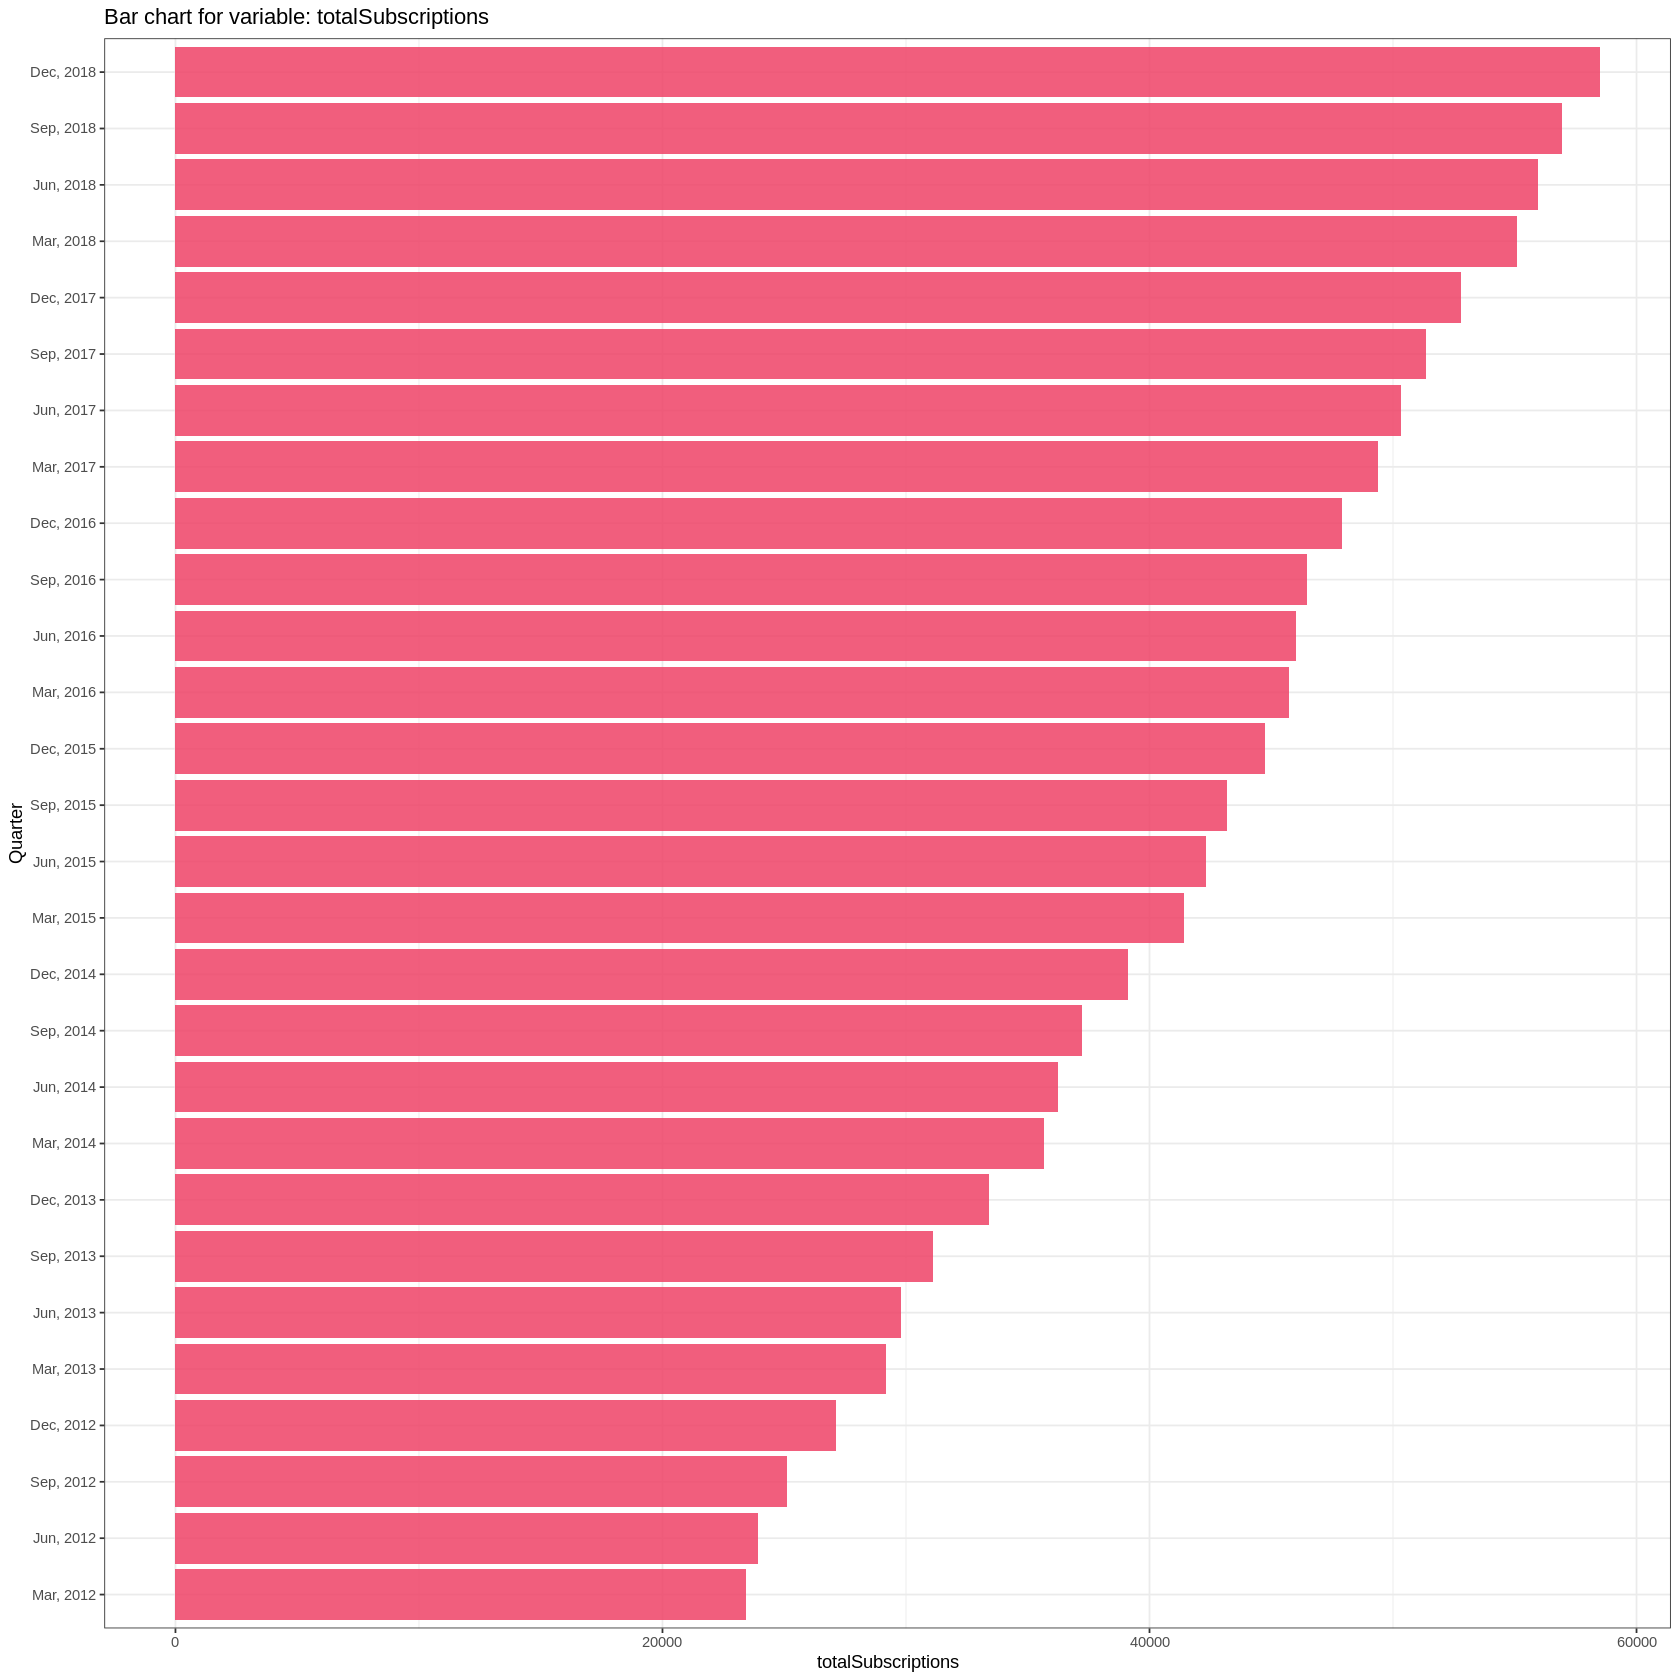

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'totalSubscriptions'

# Criando um gráfico de barras para a variável especificada.

barPlot(col = col, data = data)

Parece haver um **crescimento** aproximadamente linear do total de assinantes entre cada um dos trimestres de 2012 a 2018.

Vamos verificar de quanto foi o aumento, do número total de indivíduos cadastrados, entre o **primeiro e o último trimestres analisados**.

In [ ]:
# Calculando a diferença absoluta, e percentual dos valores da variável especificada, entre o primeiro e último trimestre 
# analisados.

statsBetweenFirstAndLastQuarters(col = col, data = data)

totalSubscriptions totalSubscriptions.1
1 149.8334           35076

Constatamos que o crescimento total entre 2012 e 2018 foi de **35.076 assinantes**, o que corresponde a um aumento de aproximadamente **150%**.

Iremos repetir este mesmo processo, mas agora, para avaliar o aumento do número total de indivíduos cadastrados entre o **primeiro e o último trimestre de cada ano**.

In [ ]:
# Calculando a diferença absoluta e percentual, dos valores da variável especificada, entre o primeiro e último trimestre 
# de cada ano analisado.

statsBetweenFirstAndLastQuartersToYear(col = col, data = data)

totalSubscriptions totalSubscriptions.1
2012 15.958992          3736                
2013 14.554055          4246                
2014  9.642877          3440                
2015  8.070633          3341                
2016  4.792842          2191                
2017  6.956962          3435                
2018  6.170240          3399

Concluímos que **2012 e 2013** foram os anos que apresentaram o **maior aumento no número total de assinantes**, e isto pode estar associado com o empenho da empresa em expandir seu mercado *streaming*. Os anos subsequentes apresentam uma queda nesta porcentagem, com destaque para o ano de **2016**, que apresentou a pior taxa de crescimento registrada entre os anos analisados.

Ao buscar possíveis motivos para os resultados obtidos em **2016**, vemos na [timeline](https://en.wikipedia.org/wiki/Timeline_of_Netflix) dos acontecimentos da empresa, o surgimento de acusações sobre sua conduta acerca da [neutralidade na rede](https://techpolicycorner.org/beyond-netflix-s-hypocrisy-the-real-throttling-debate-900c46c6ba79). Podemos supor, que o desgaste gerado a imagem da organização com estes debates, contribuiu para o baixo crescimento no ano.

Vamos avaliar, o aumento do número total de indivíduos cadastrados, entre os **trimestres dos anos**.



In [ ]:
# Calculando a diferença percentual, dos valores da variável especificada, entre os trimestres dos anos.

statsBetweenQuartersPerYear(col = col, data = data)

pInc_March pInc_June pInc_September pInc_December
2013 - 2012 24.621956  24.517504 23.867575      23.112061    
2014 - 2013 22.280112  21.595598 19.706034      17.037702    
2015 - 2014 16.042496  16.708973 16.018700      14.378483    
2016 - 2015 10.428292   8.756501  7.637618       7.078993    
2017 - 2016  8.008488   9.388314 10.469244      10.239015    
2018 - 2017 11.568608  11.199650 10.929983      10.747964

Bom, observamos que as menores porcentagens de crescimento dos trimestres ao longo dos anos, estão entre os anos de **2015 e 2017**.  

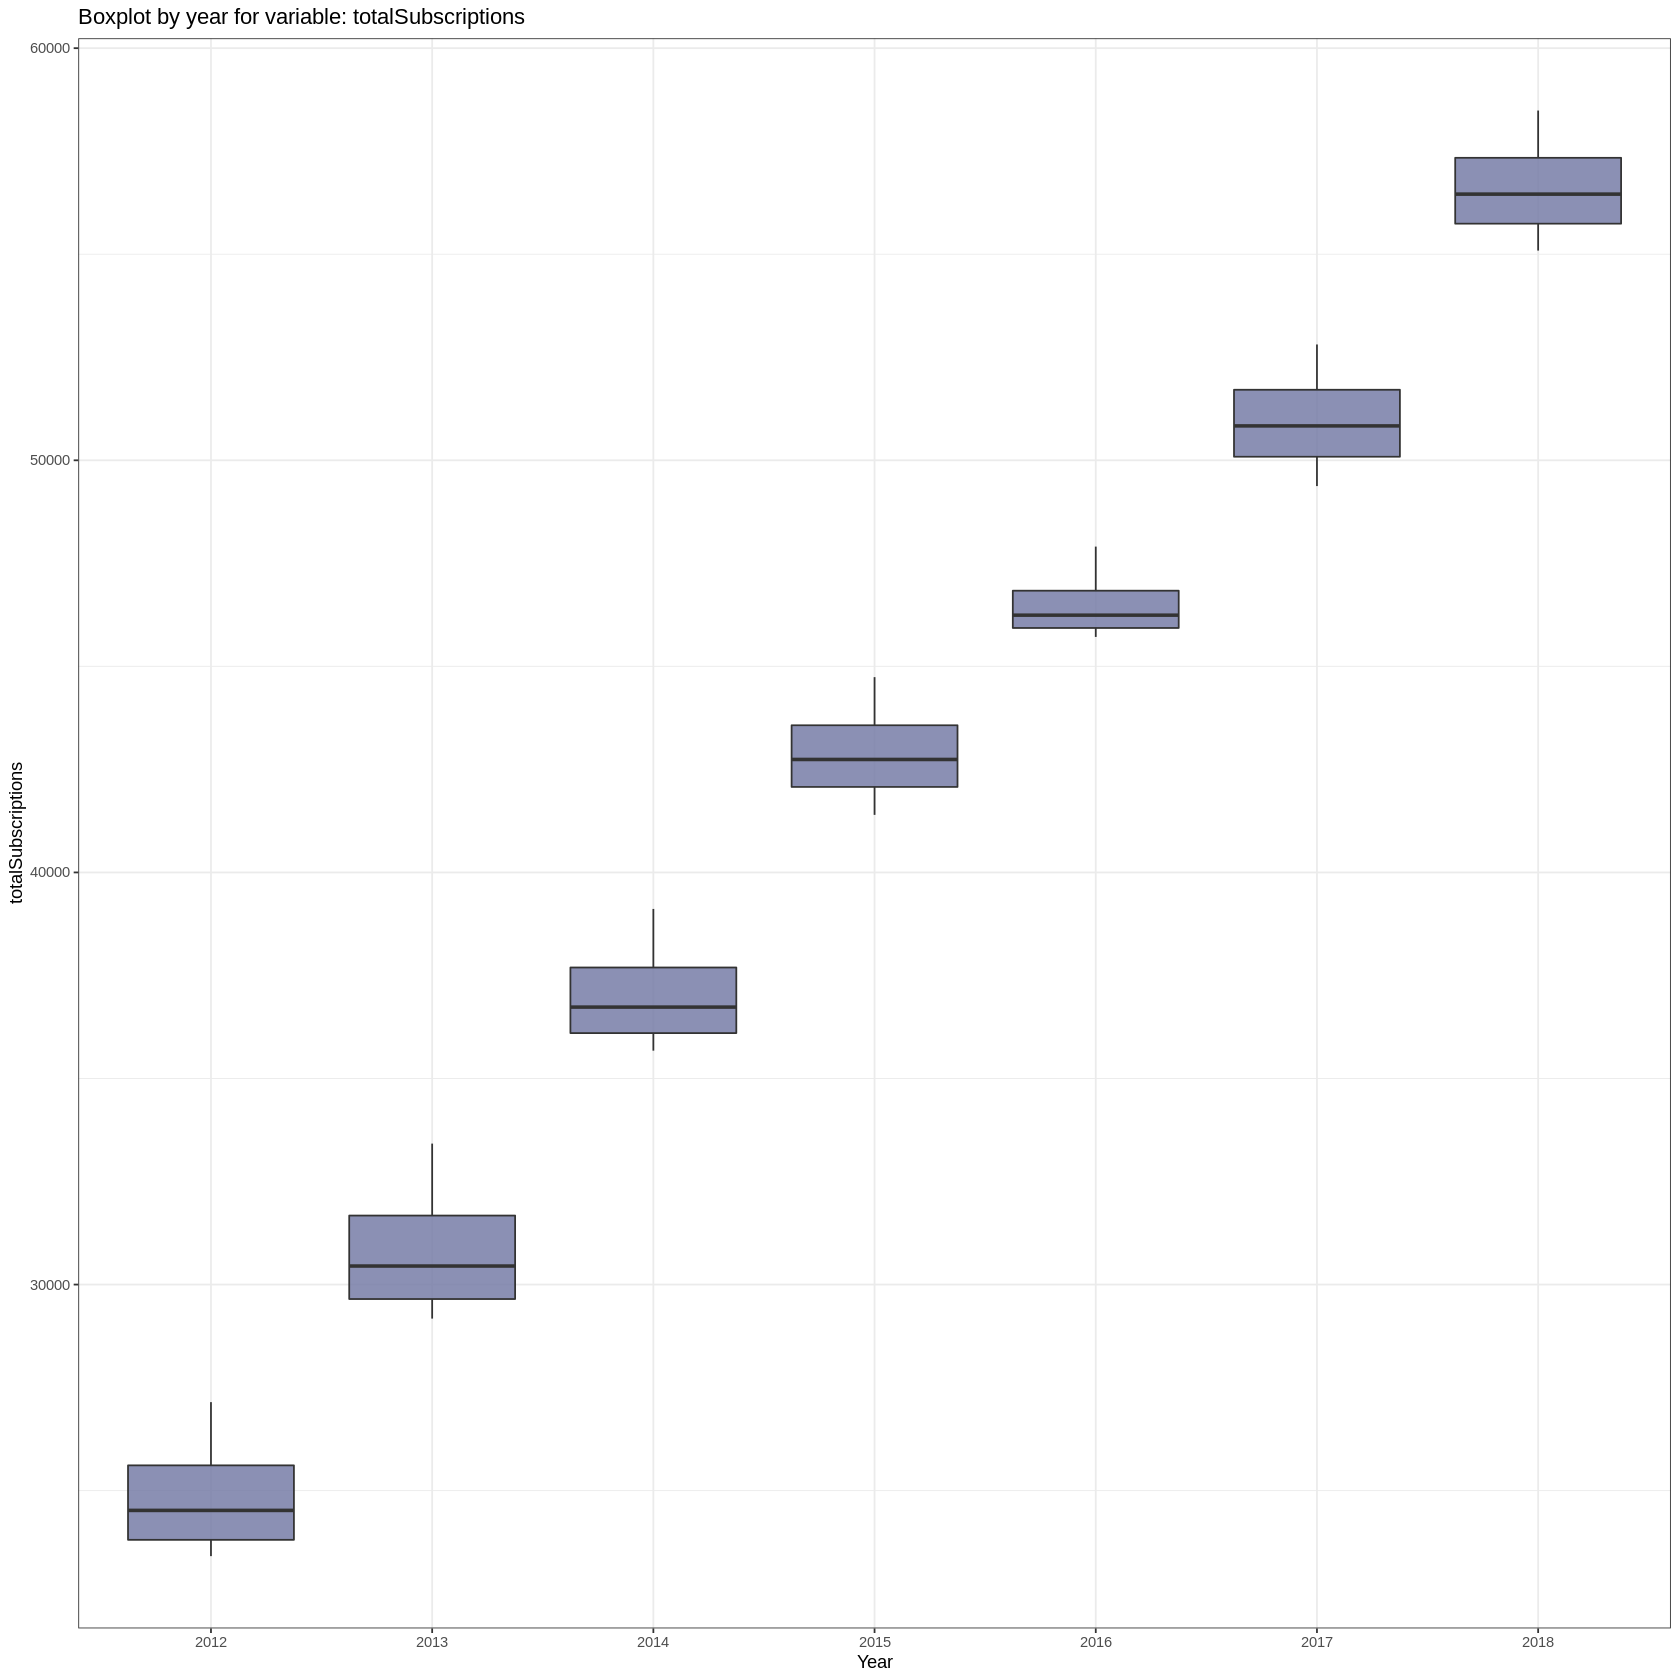

In [ ]:
# Criando um gráfico Boxplot, que agrupe a variável especificada, pelo ano ao qual seu registro está associada.

boxPlot(col = col, data = data, categ = 'year')

Como vimos anteriormente, a quantidade total de assinantes aumenta a cada ano.

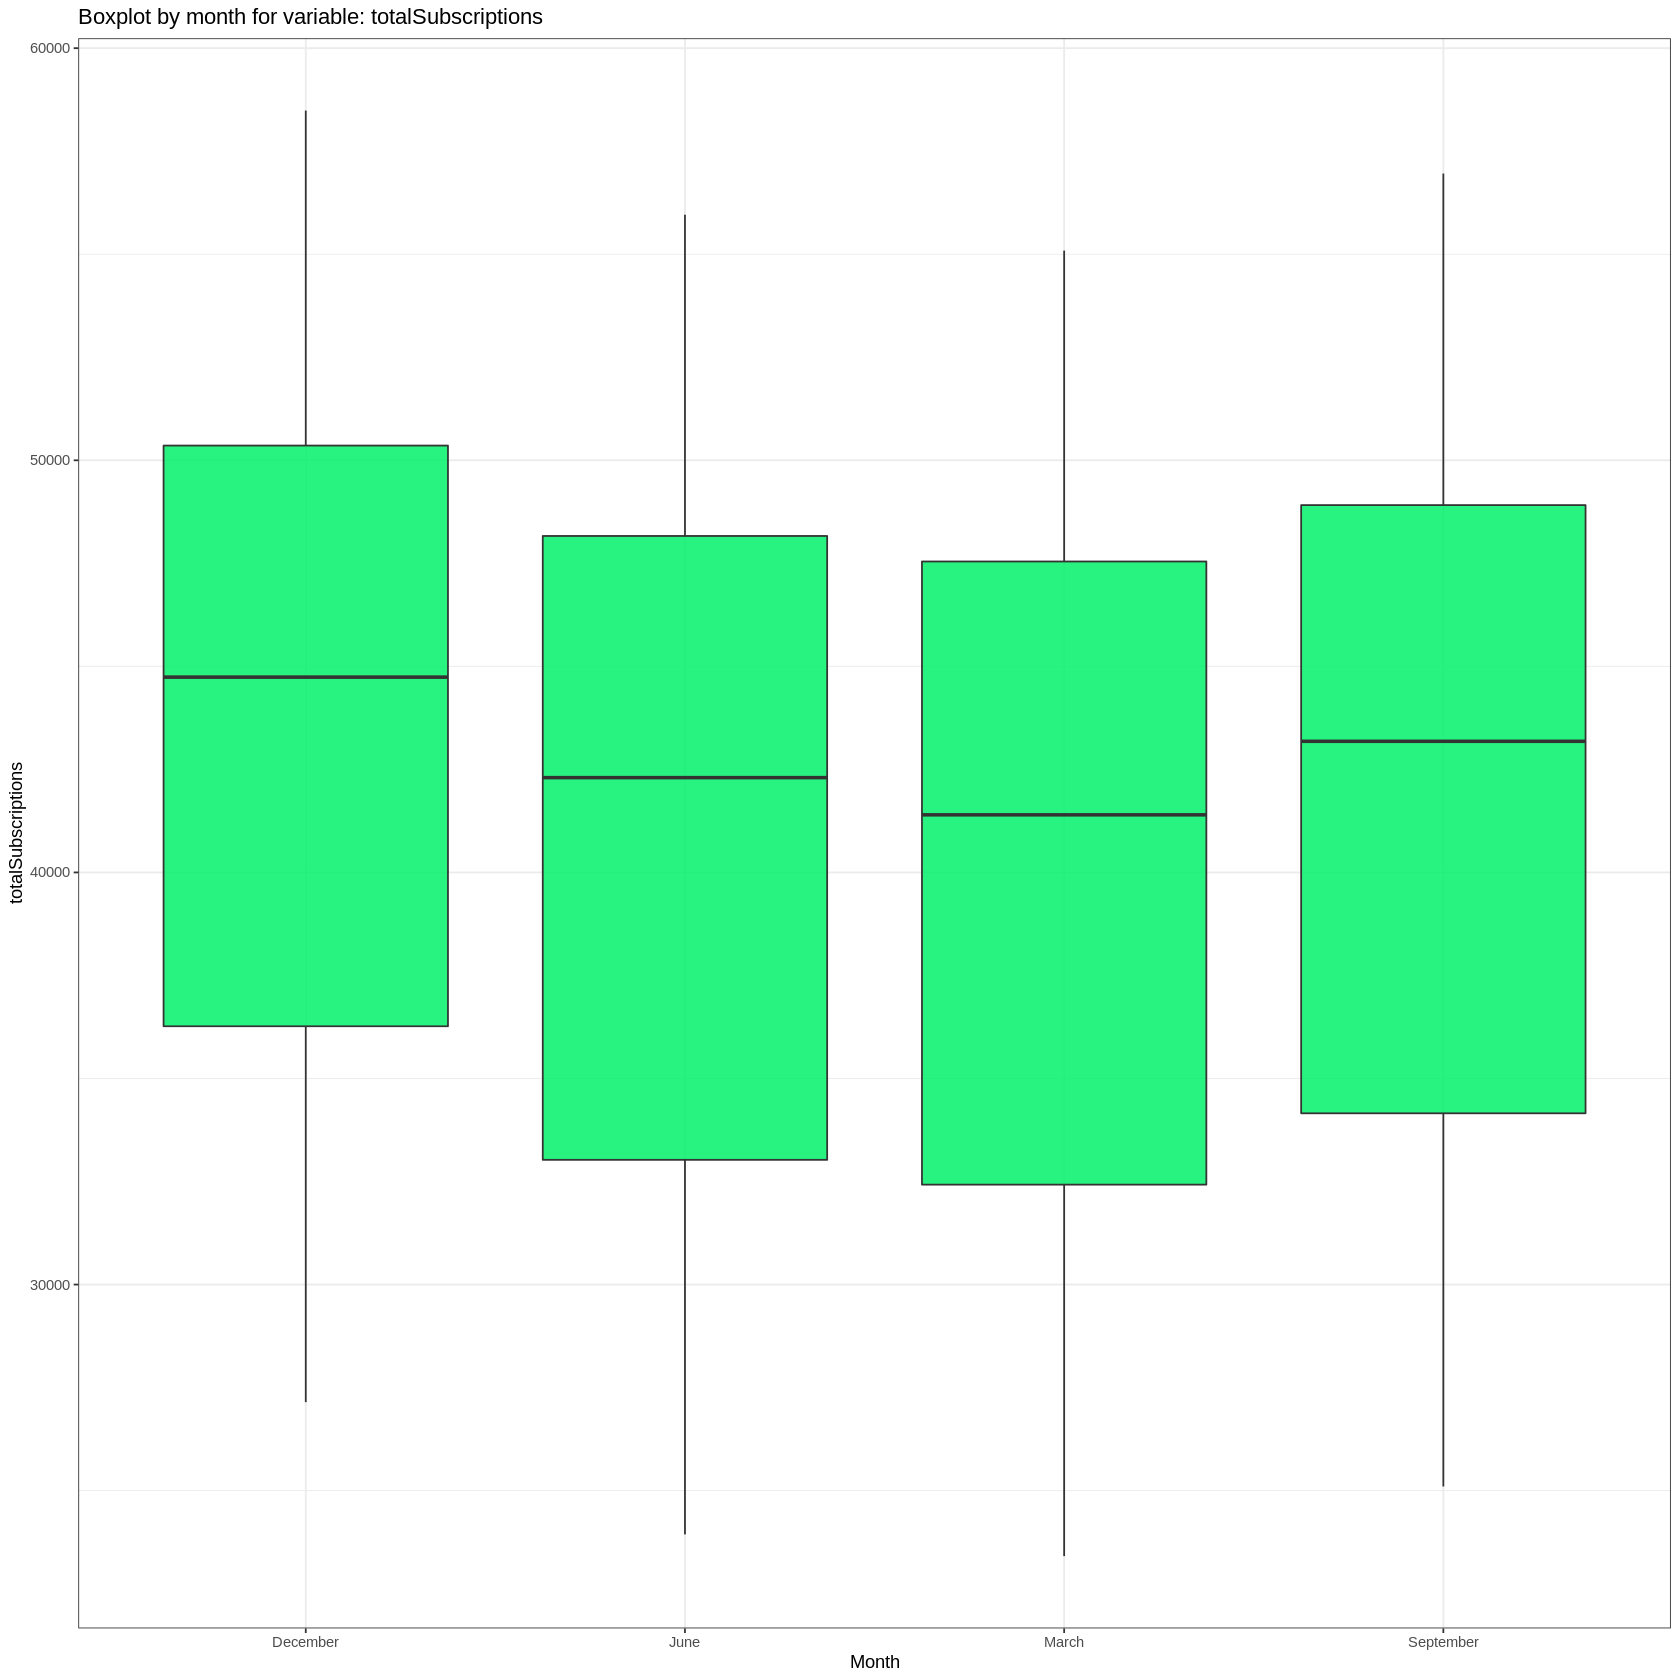

In [ ]:
# Criando um gráfico Boxplot, que agrupe a variável especificada, pelo trimestre ao qual seu registro está associada.

boxPlot(col = col, data = data, categ = 'month')

Parece não haver um diferença significativa, para o número total de assinantes, entre os trimestres dos anos.

#### **5.4.2 Variável paidSubscriptions**

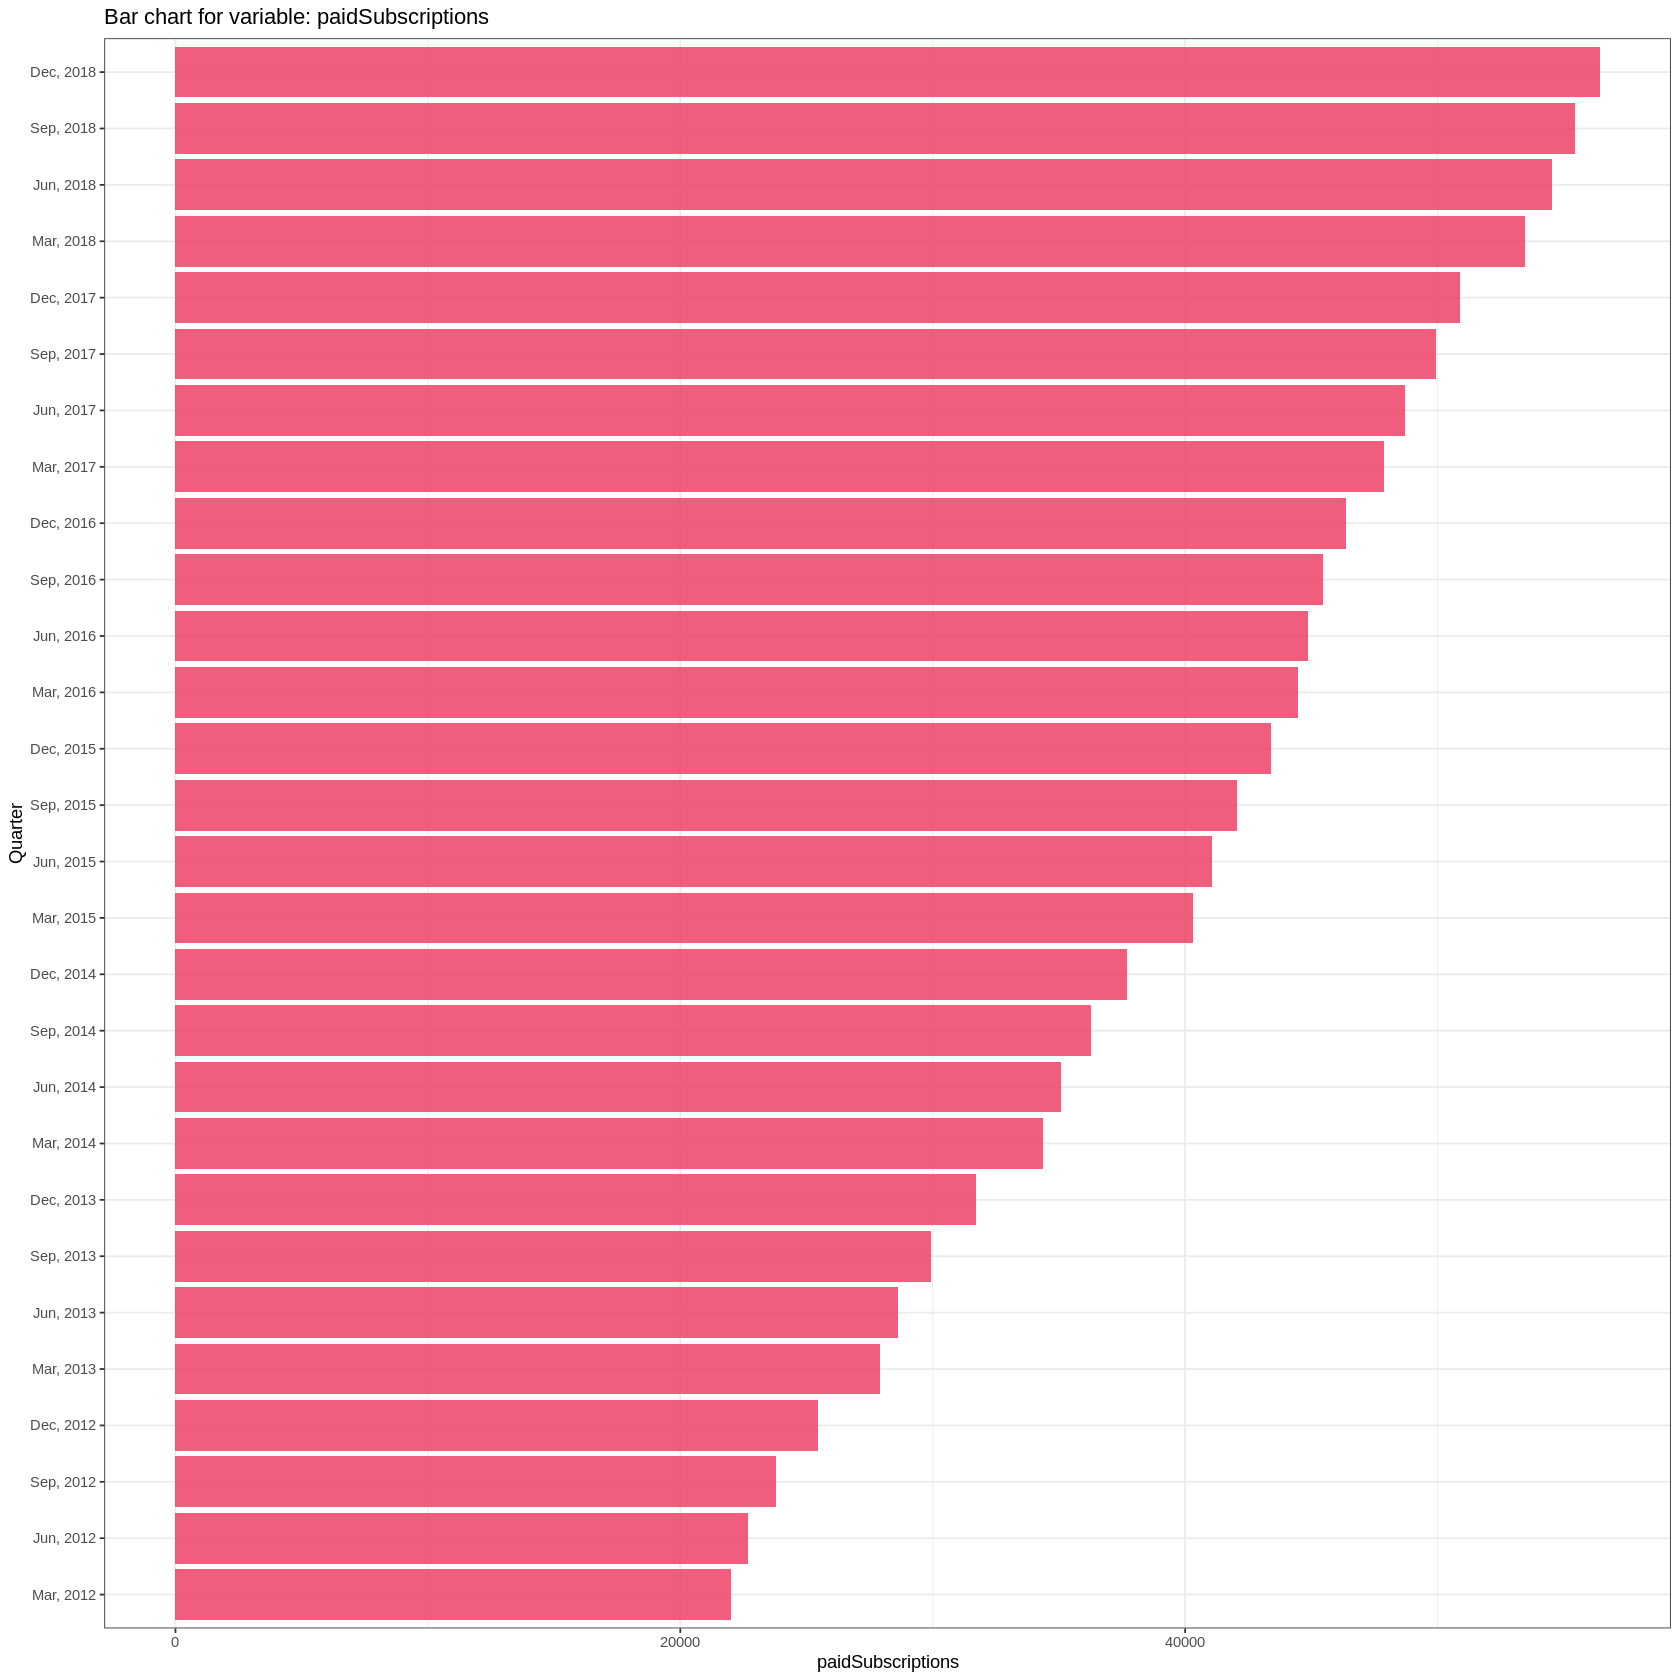

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'paidSubscriptions'

# Criando um gráfico de barras para a variável especificada.

barPlot(col = col, data = data)

Torna-se evidente que a variável **paidSubscriptions**, representa um subconjunto da variável **totalSubscriptions** quando comparamos seus gráficos de barras trimestrais. Sua tendência de crescimento, parece seguir a da variável **totalSubscriptions**.

In [ ]:
# Calculando a diferença absoluta, e percentual dos valores da variável especificada, entre o primeiro e último trimestre 
# analisados.

statsBetweenFirstAndLastQuarters(col = col, data = data)

paidSubscriptions paidSubscriptions.1
1 156.2029          34399

Constatamos que o crescimento total entre 2012 e 2018 foi de **34.399 assinaturas pagas**, o que corresponde a um aumento de aproximadamente **156.2%**.

Iremos repetir este mesmo processo, mas agora, para avaliar o aumento do número total de indivíduos cadastrados entre o **primeiro e o último trimestre de cada ano**.

In [ ]:
# Calculando a diferença absoluta e percentual, dos valores da variável especificada, entre o primeiro e último trimestre 
# de cada ano analisado.

statsBetweenFirstAndLastQuartersToYear(col = col, data = data)

paidSubscriptions paidSubscriptions.1
2012 15.661611         3449               
2013 13.610146         3799               
2014  9.660529         3321               
2015  7.654719         3086               
2016  4.313893         1918               
2017  6.209287         2974               
2018  5.520956         2952

Concluímos que **2012 e 2013** foram os anos que apresentaram o **maior aumento em assinaturas pagas**, e isto pode estar associada com o empenho da empresa em expandir seu mercado *streaming*. Os anos subsequentes, apresentam uma queda nesta porcentagem, com destaque para o ano de **2018**, que apresentou a pior taxa de crescimento registrada entre os anos analisados.

In [ ]:
# Calculando a diferença percentual, dos valores da variável especificada, entre os trimestres dos anos.

statsBetweenQuartersPerYear(col = col, data = data)

pInc_March pInc_June pInc_September pInc_December
2013 - 2012 26.750522  26.174733 25.730011      24.502375    
2014 - 2013 23.157668  22.571968 21.186299      18.876135    
2015 - 2014 17.273177  17.021519 16.001654      15.128124    
2016 - 2015 10.284013   9.309009  8.065513       6.861593    
2017 - 2016  7.725872   8.569710  9.804008       9.683262    
2018 - 2017 11.635627  11.932273 11.082175      10.912129

Bom, observamos que as menores porcentagens de crescimento dos trimestres ao longo dos anos, estão entre os anos de **2015 e 2017**.  

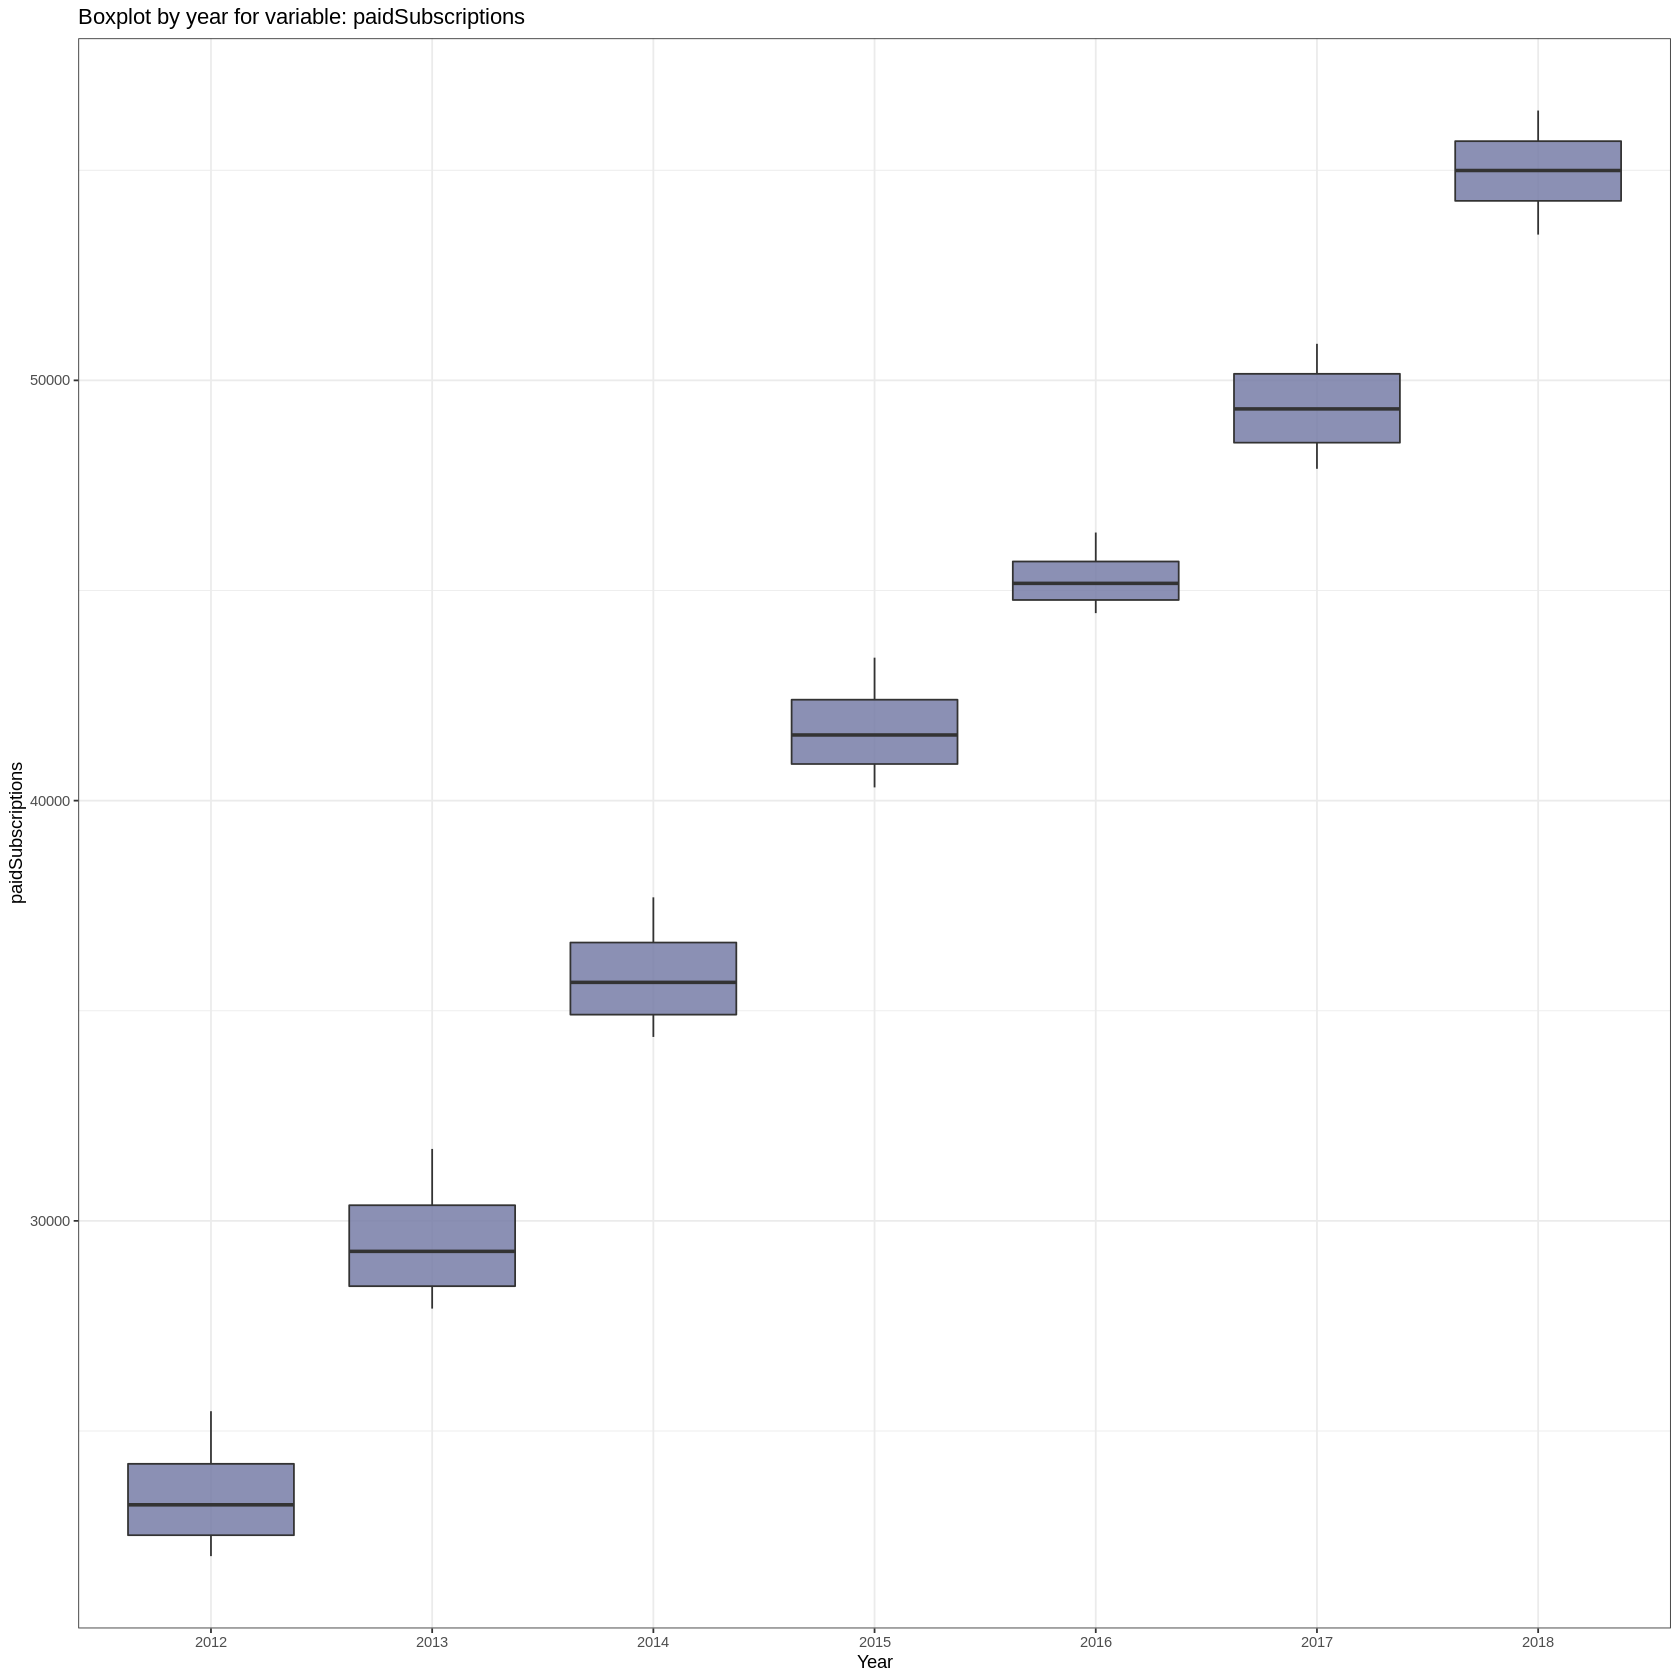

In [ ]:
# Criando um gráfico Boxplot, que agrupe a variável especificada, pelo ano ao qual seu registro está associada.

boxPlot(col = col, data = data, categ = 'year')

Como vimos anteriormente, a quantidade total de assinaturas pagas aumenta a cada ano.

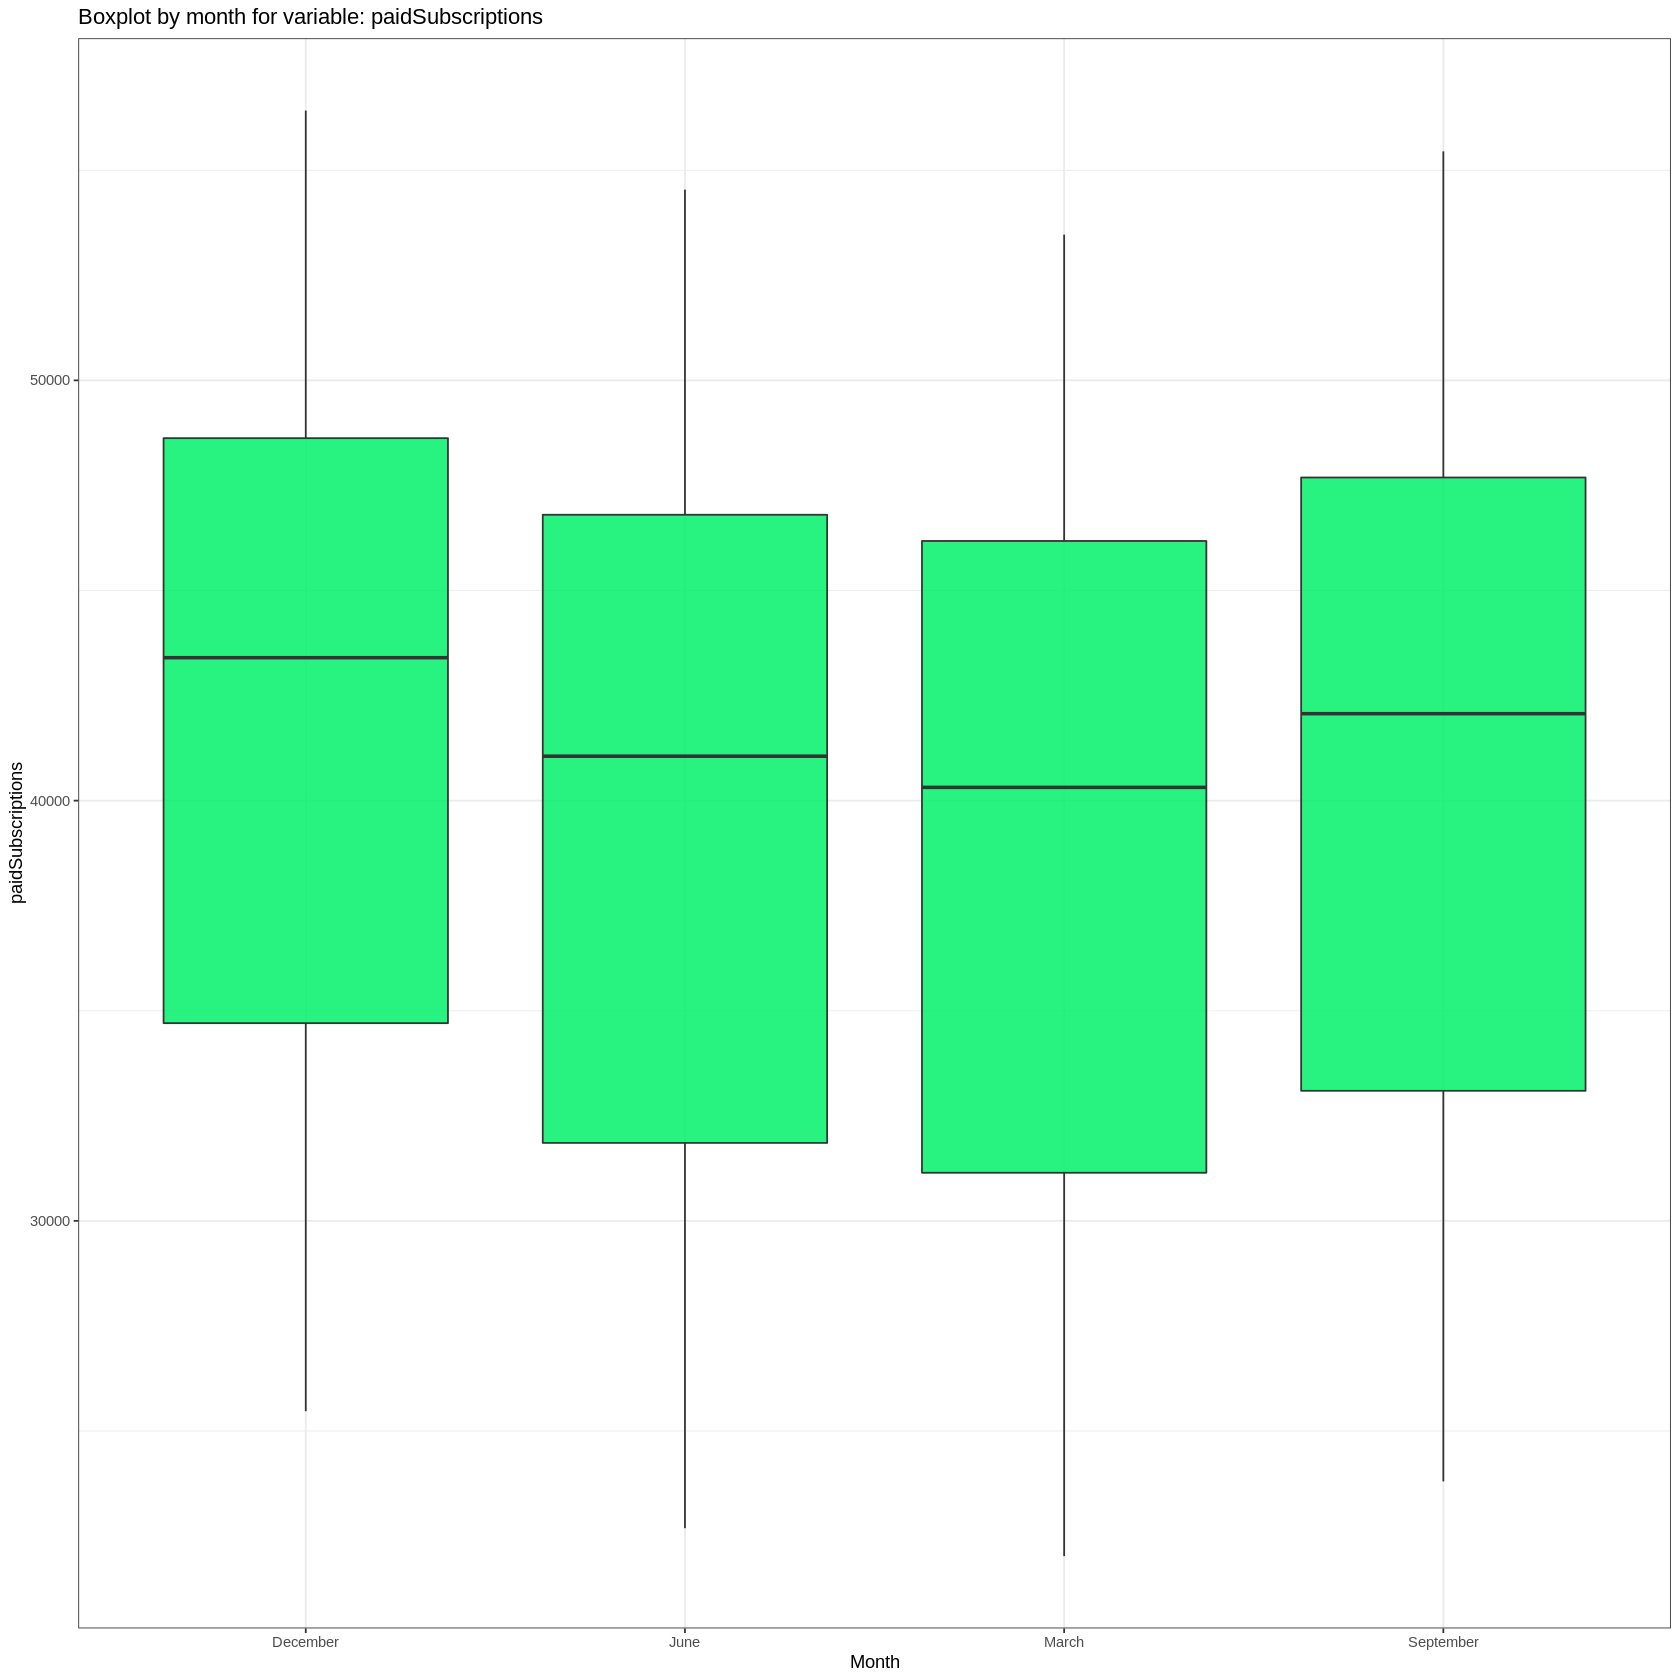

In [ ]:
# Criando um gráfico Boxplot, que agrupe a variável especificada, pelo trimestre ao qual seu registro está associada.

boxPlot(col = col, data = data, categ = 'month')

Parece não haver uma diferença significativa, para o número de assinaturas pagas, entre os trimestres dos anos.

#### **5.4.3 Variável freeTrails**

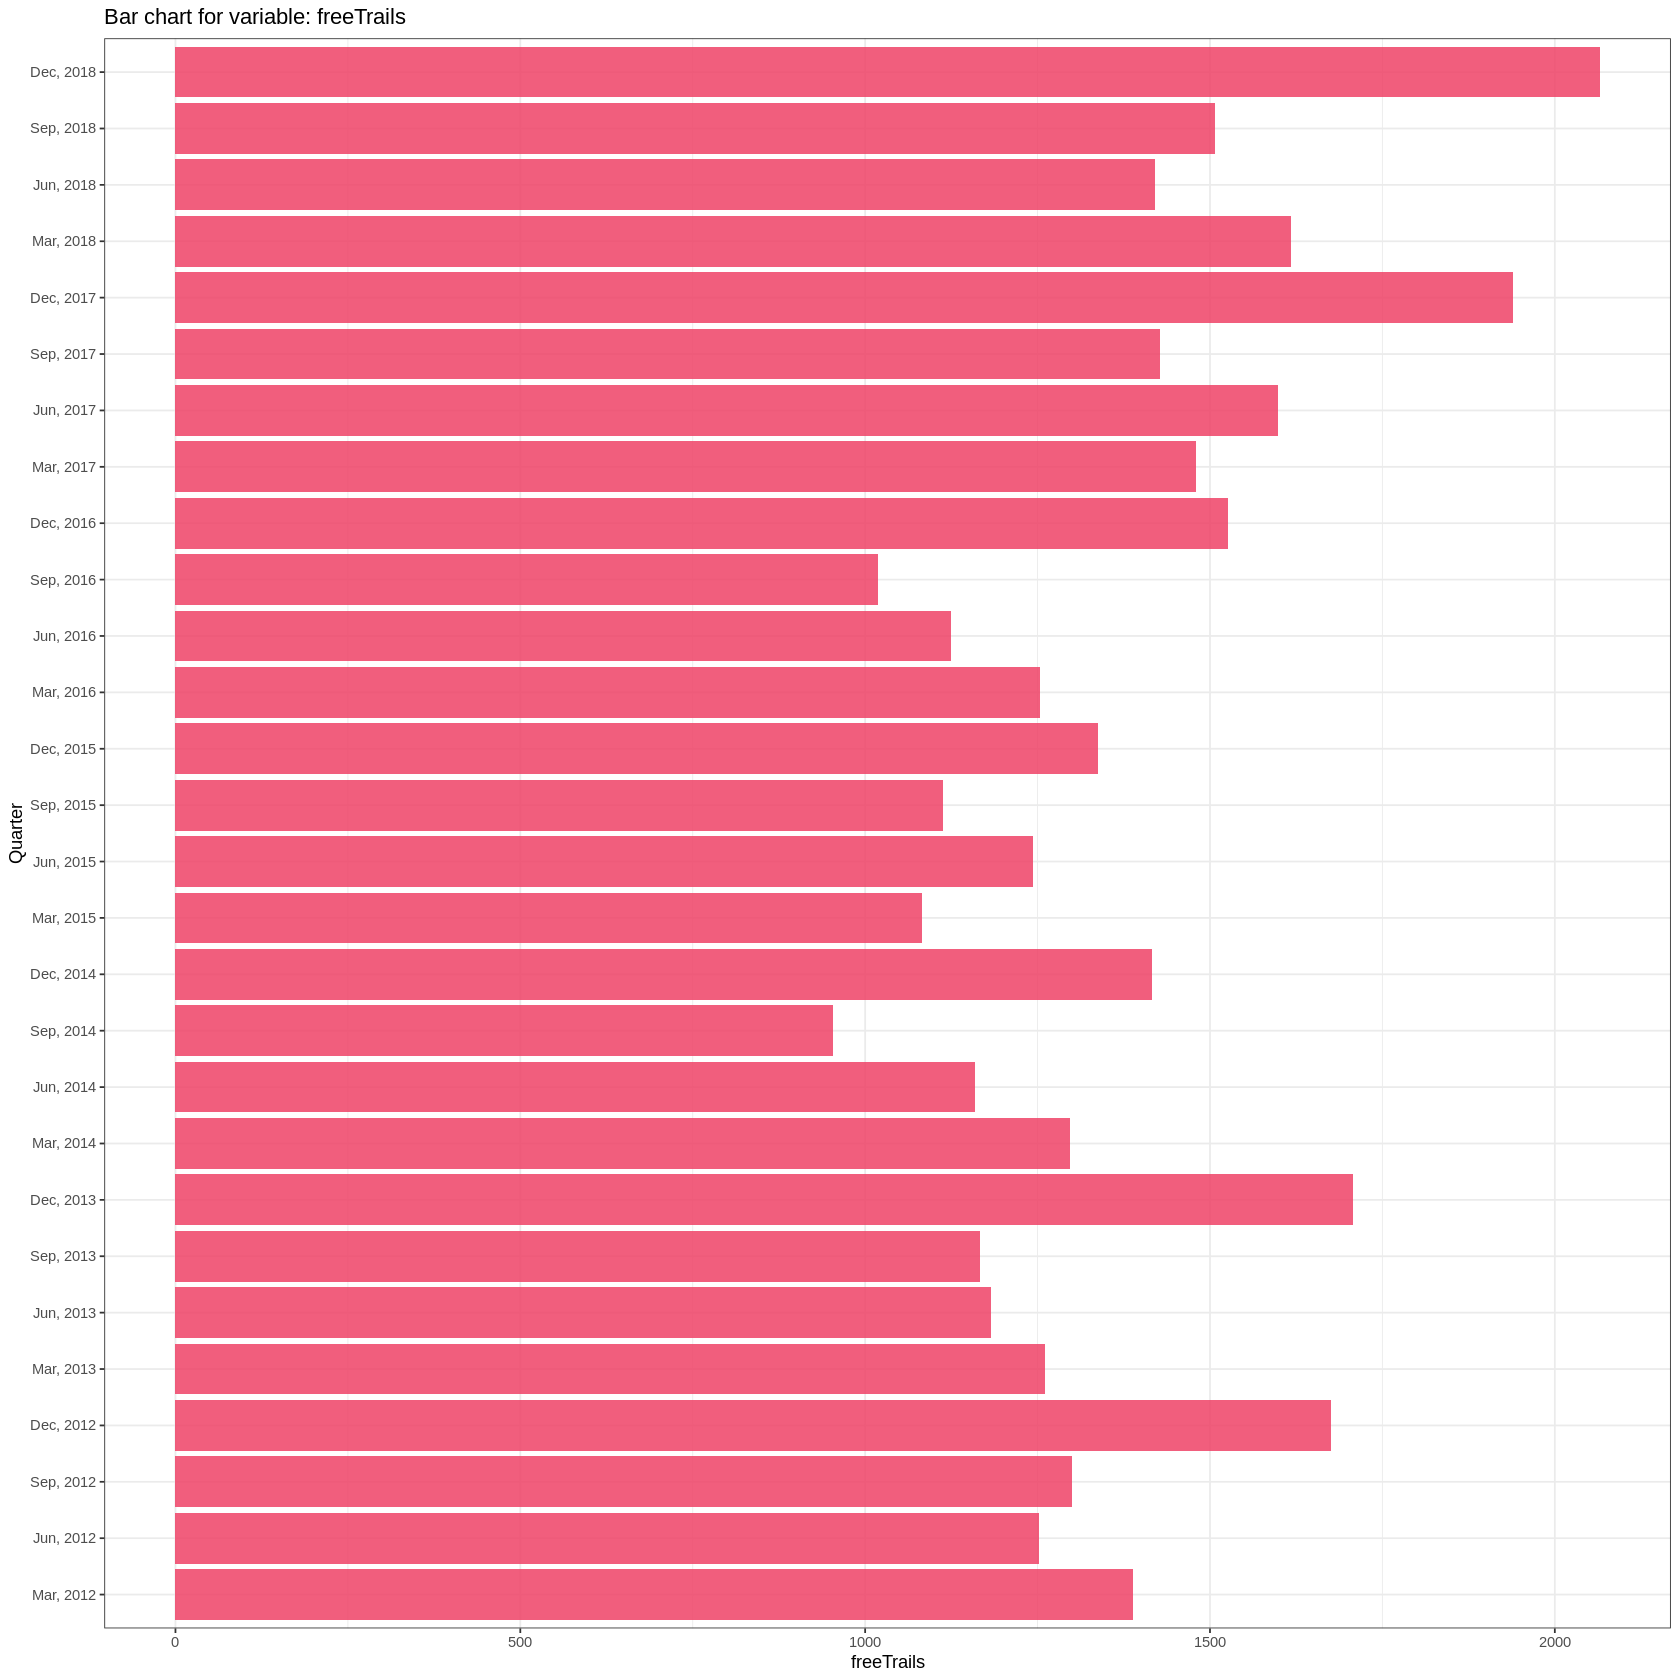

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'freeTrails'

# Criando um gráfico de barras para a variável especificada.

barPlot(col = col, data = data)

O gráfico nos mostra, que o **último trimestre de cada ano analisado**, foi o que apresentou o maior número de assinantes em período de utilização gratuita. Essa tendência parece se propagar, na maior parte dos casos, para o **primeiro trimestre do ano seguinte**. O **segundo e o terceiro trimestre**, são aqueles que predominantemente apresentam os menores números de assinantes.

Vamos garantir que nossos olhos não estão nos enganando, e que o último trimestre de cada ano realmente apresenta o maior valor para esta variável.

In [ ]:
# Capturando o trimestre que apresentou o maior valor para a variável especificada em cada ano.

data %>%
    select(year, month, freeTrails) %>%
    group_by(year) %>%
    filter(freeTrails == max(freeTrails))    

year month    freeTrails
1 2012 December 1675      
2 2013 December 1708      
3 2014 December 1416      
4 2015 December 1337      
5 2016 December 1526      
6 2017 December 1940      
7 2018 December 2065

Excelente! Para cada um dos anos analisados, o **último trimestre** sempre apresentou o maior número de assinantes em período de utilização gratuita.

Muito bem, agora iremos verificar o trimestre que apresentou o menor número de cadastros em período experimental em cada ano.

In [ ]:
# Capturando o trimestre que apresentou o menor valor para a variável especificada em cada ano.

dt <- data %>%
    select(year, month, freeTrails) %>%
    group_by(year) %>%
    filter(freeTrails == min(freeTrails))

# Visualizando o resultado.

dt

year month     freeTrails
1 2012 June      1252      
2 2013 September 1167      
3 2014 September  954      
4 2015 March     1082      
5 2016 September 1018      
6 2017 September 1427      
7 2018 June      1420

Contar o número de vezes que cada mês aparece dentro desta tabela, também parece interessante!

In [ ]:
# Calculando a frequência absoluta e relativa, para a número de ocorrências de cada trimestre observado.

dt[, 'month'] %>%
    group_by(month) %>%
    summarise (
        freq       = n(),
        percentage = n() / nrow(dt) * 100 
    ) %>%
    arrange(desc(freq))

`summarise()` ungrouping output (override with `.groups` argument)



month     freq percentage
1 September 4    57.14286  
2 June      2    28.57143  
3 March     1    14.28571

Vemos que o terceiro trimestre do ano, é o que apresenta o menor número de assinantes no período experimental, em **57.14%** dos casos observados, o segundo trimestre em **28.57%**, e o primeiro trimestre em **14.29%**.

Para finalizar, criaremos um gráfico de boxplot que agrupa os valores da variável **freeTrails** pelo ano ao qual pertence. 

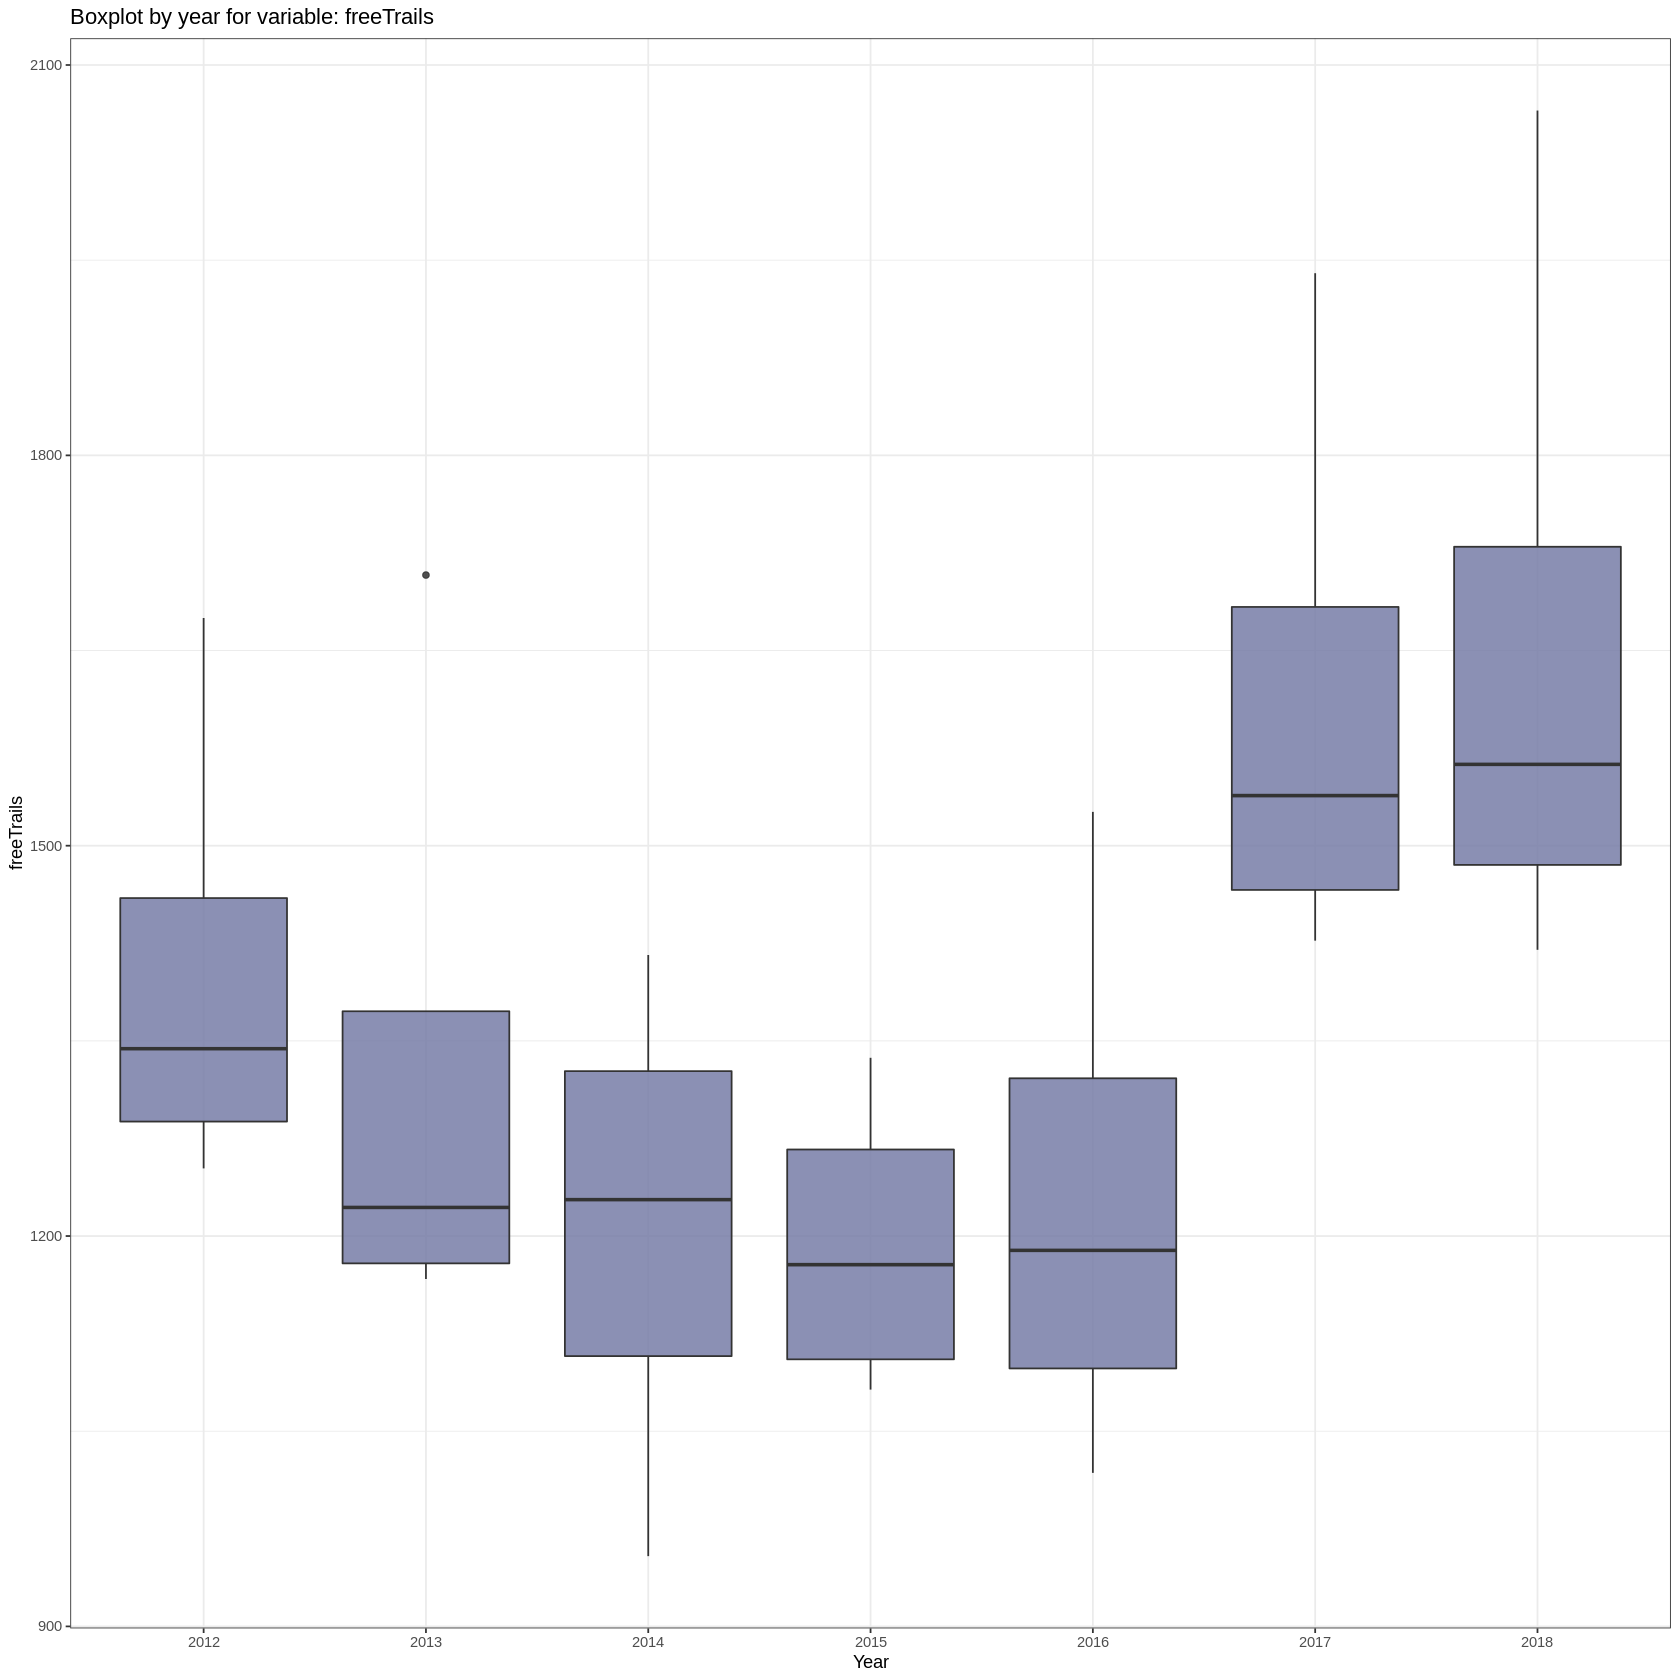

In [ ]:
# Criando um gráfico Boxplot, que agrupe a variável especificada, pelo ano ao qual seu registro está associada.

boxPlot(col = col, data = data, categ = 'year')

Veja só, de 2012 até 2015 observamos um **tendência de queda**, e a partir de 2016 vemos um **tendência de crescimento**, que se destaca ainda mais a partir de 2017. Em 2013, o valor do quarto trimestre foi tão alto a ponto de ser representado como um **outlier**.

Uma estratégia interessante, que a Netflix poderia adotar para aumentar o número e a fidelização dos clientes que experimentam sua plataforma, seria a de focar no quarto trimestre do ano; diminuindo os preços dos seus serviços, aumentando seu marketing e o período de acesso gratuito, além de usar este trimestre para realizar o lançamento de novos conteúdos. 

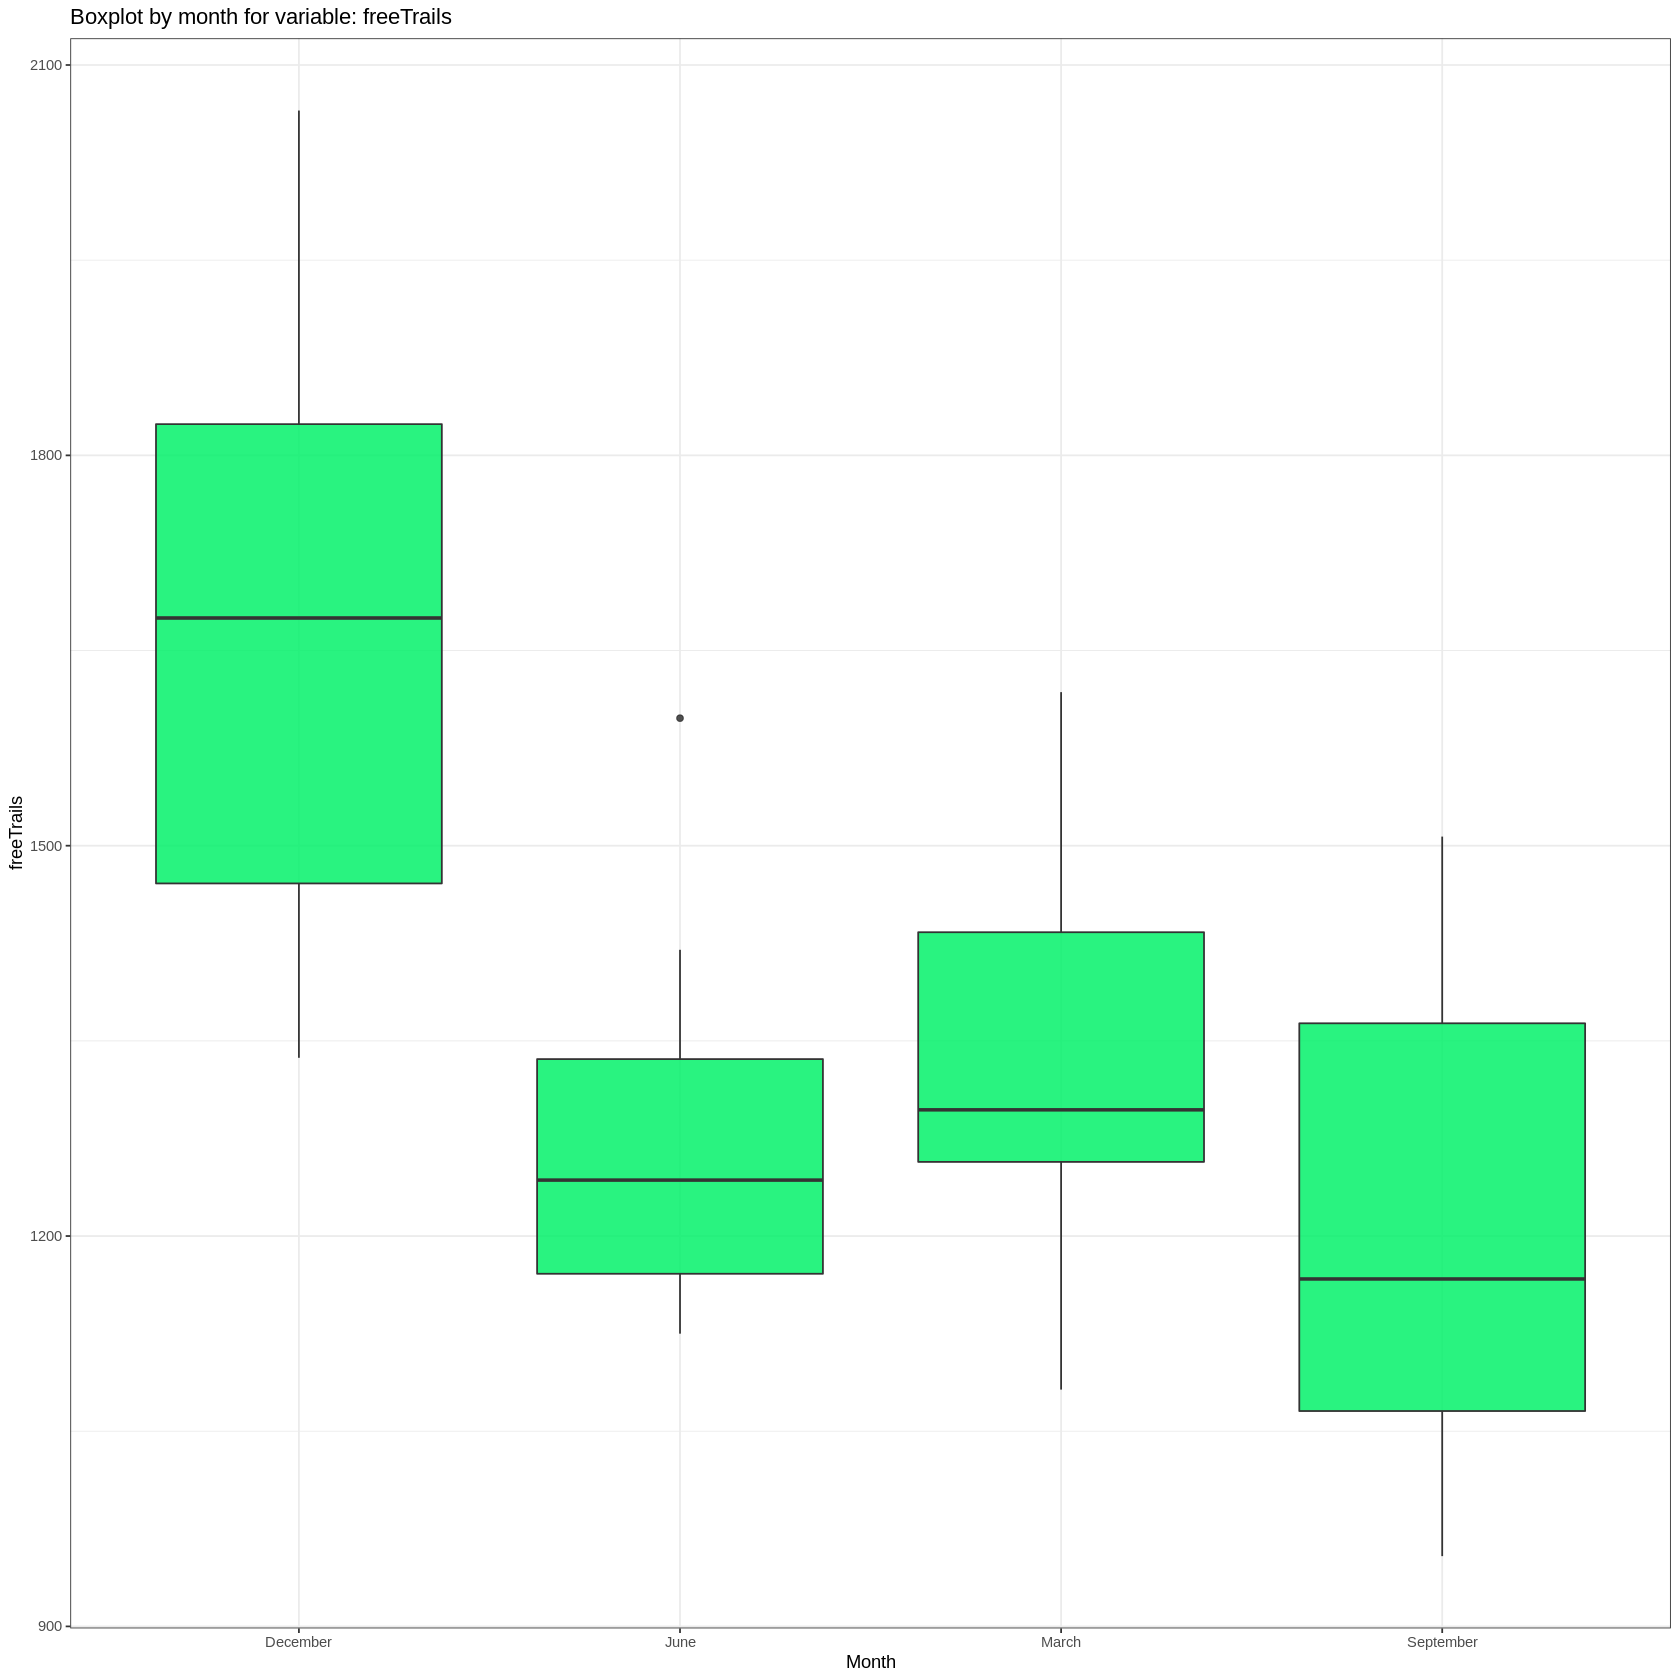

In [ ]:
# Criando um gráfico Boxplot, que agrupe a variável especificada, pelo trimestre ao qual seu registro está associada.

boxPlot(col = col, data = data, categ = 'month')

Parece haver uma diferença significativa, para o número de assinaturas em período de utilização gratuita, entre os trimestres dos anos. O **primeiro e o quarto trimestre**, são aqueles que apresentam os maiores valores.

#### **5.4.4 Variável revenue**

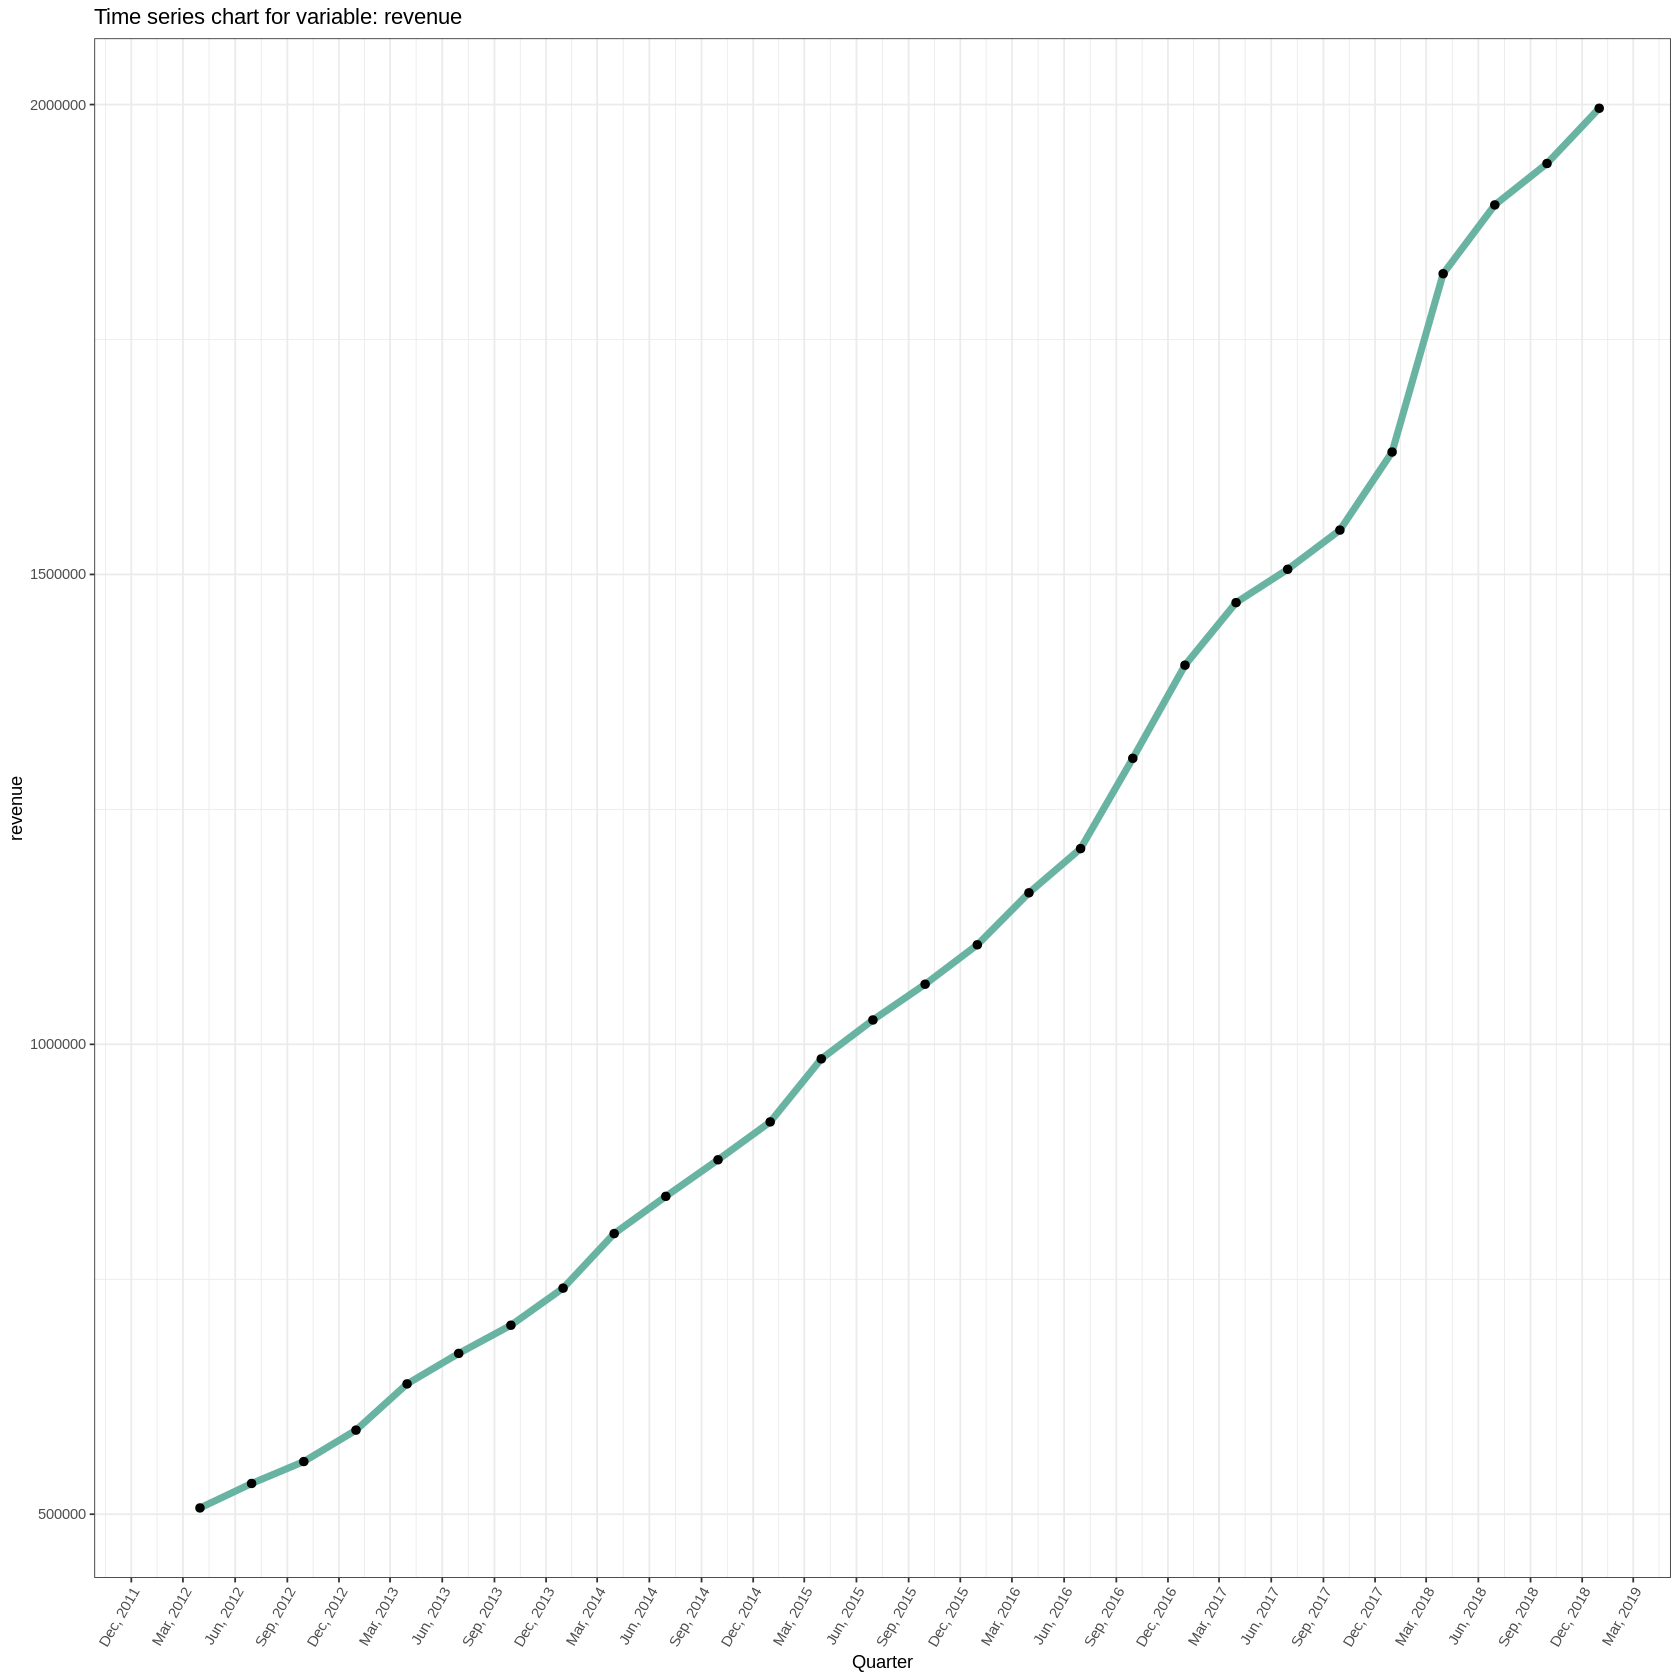

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'revenue'

# Criando um gráfico de série temporal para a variável especificada.

timeSeriesPlot(col = col, data = data)

A série temporal demonstra, um **crescimento aproximadamente linear**, da receita trimestral gerada entre os anos em análise.

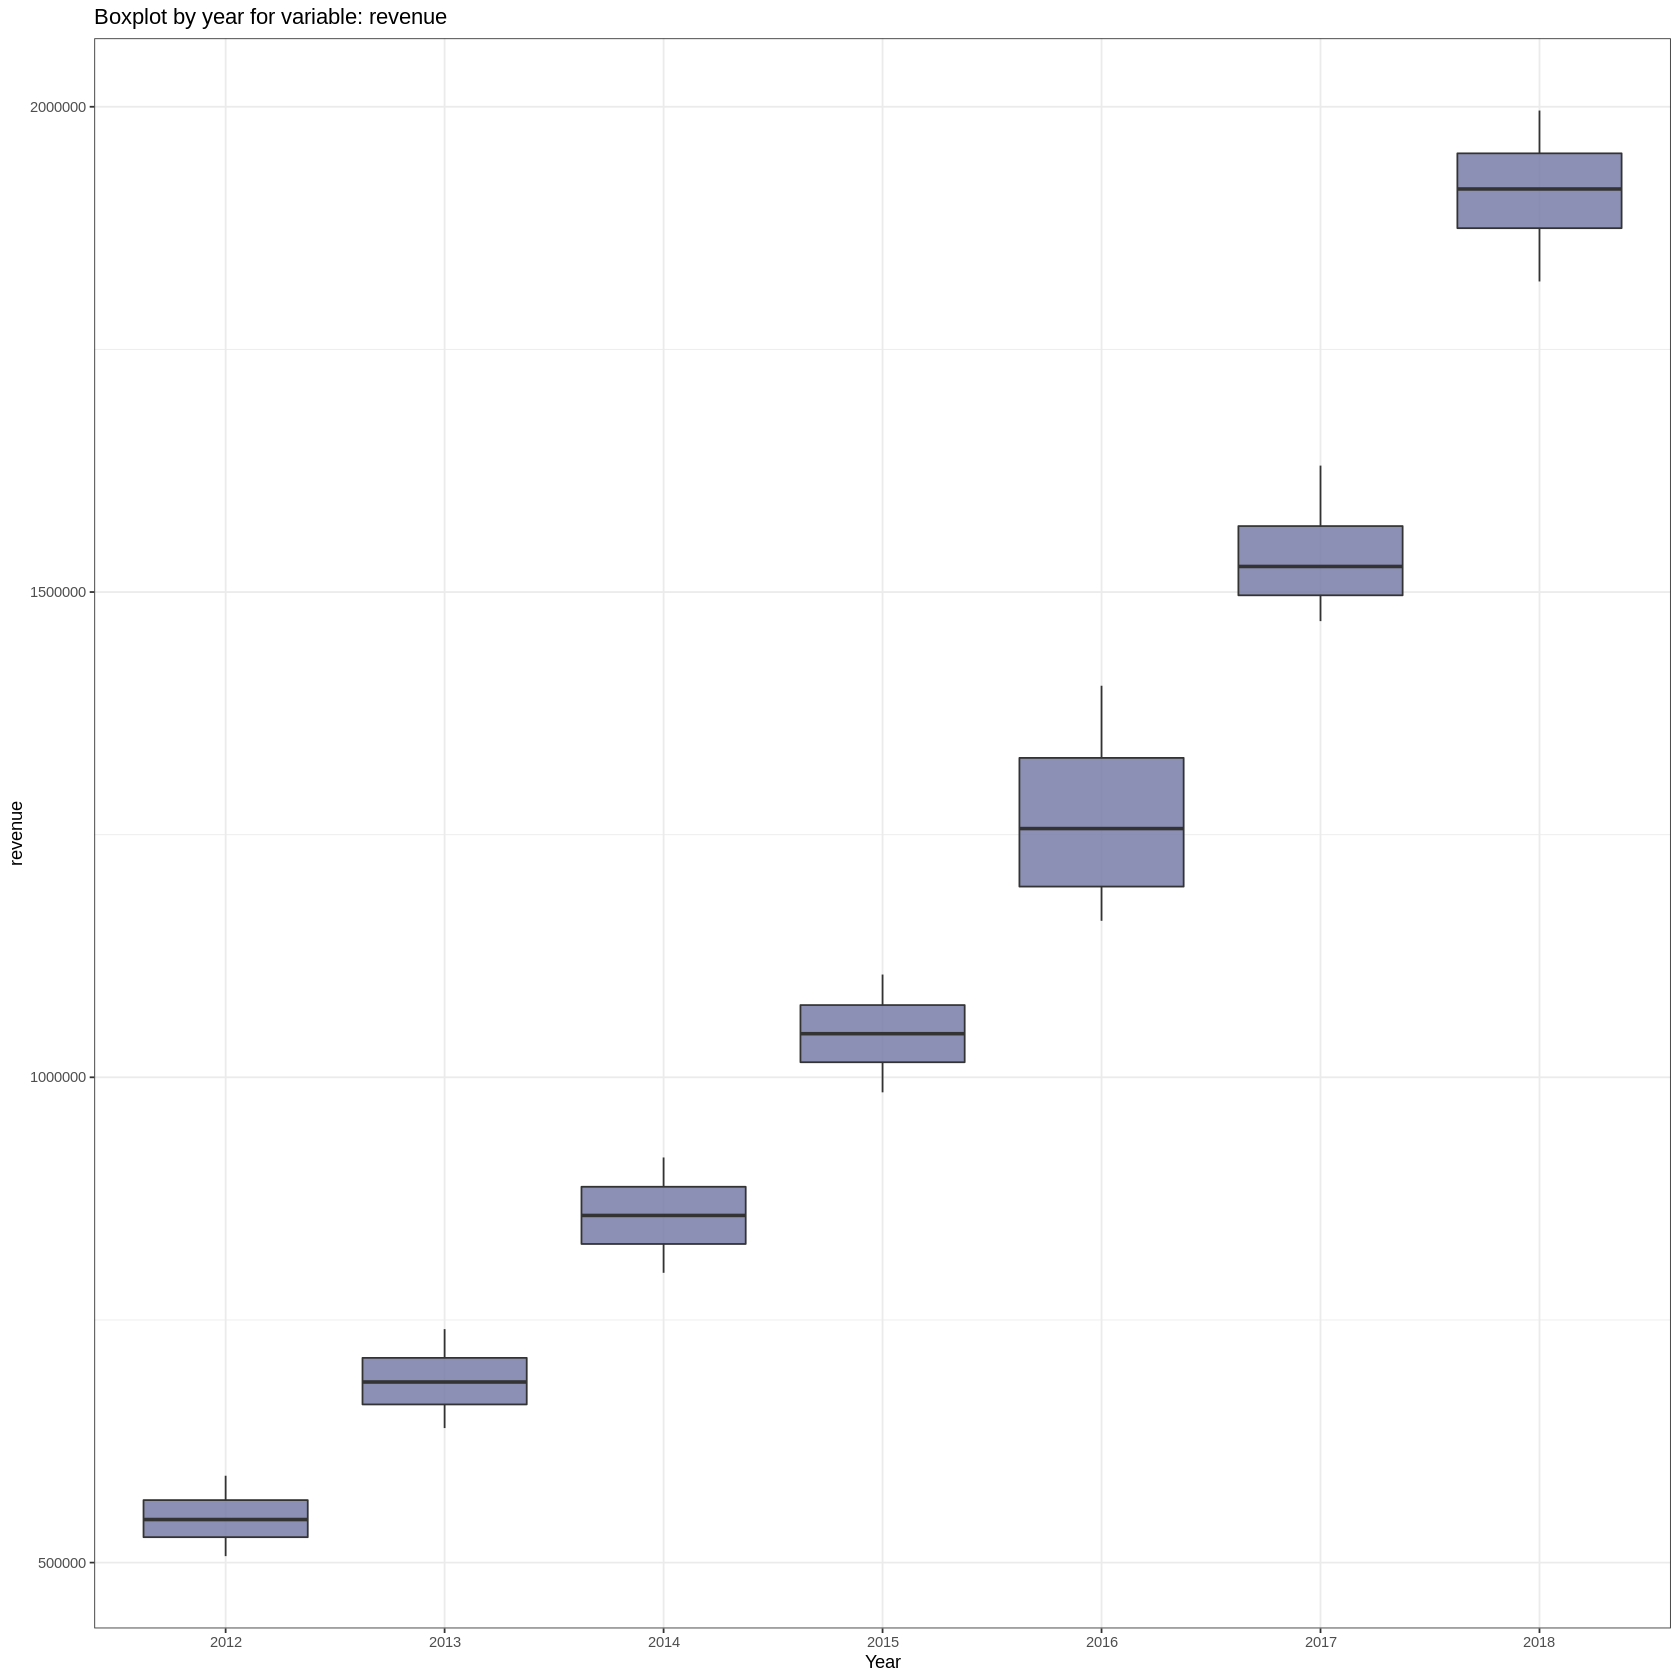

In [ ]:
# Criando um gráfico Boxplot, que agrupe a variável especificada, pelo ano ao qual seu registro está associada.

boxPlot(col = col, data = data, categ = 'year')

Como vimos anteriormente, a receita gerada aumenta a cada ano.

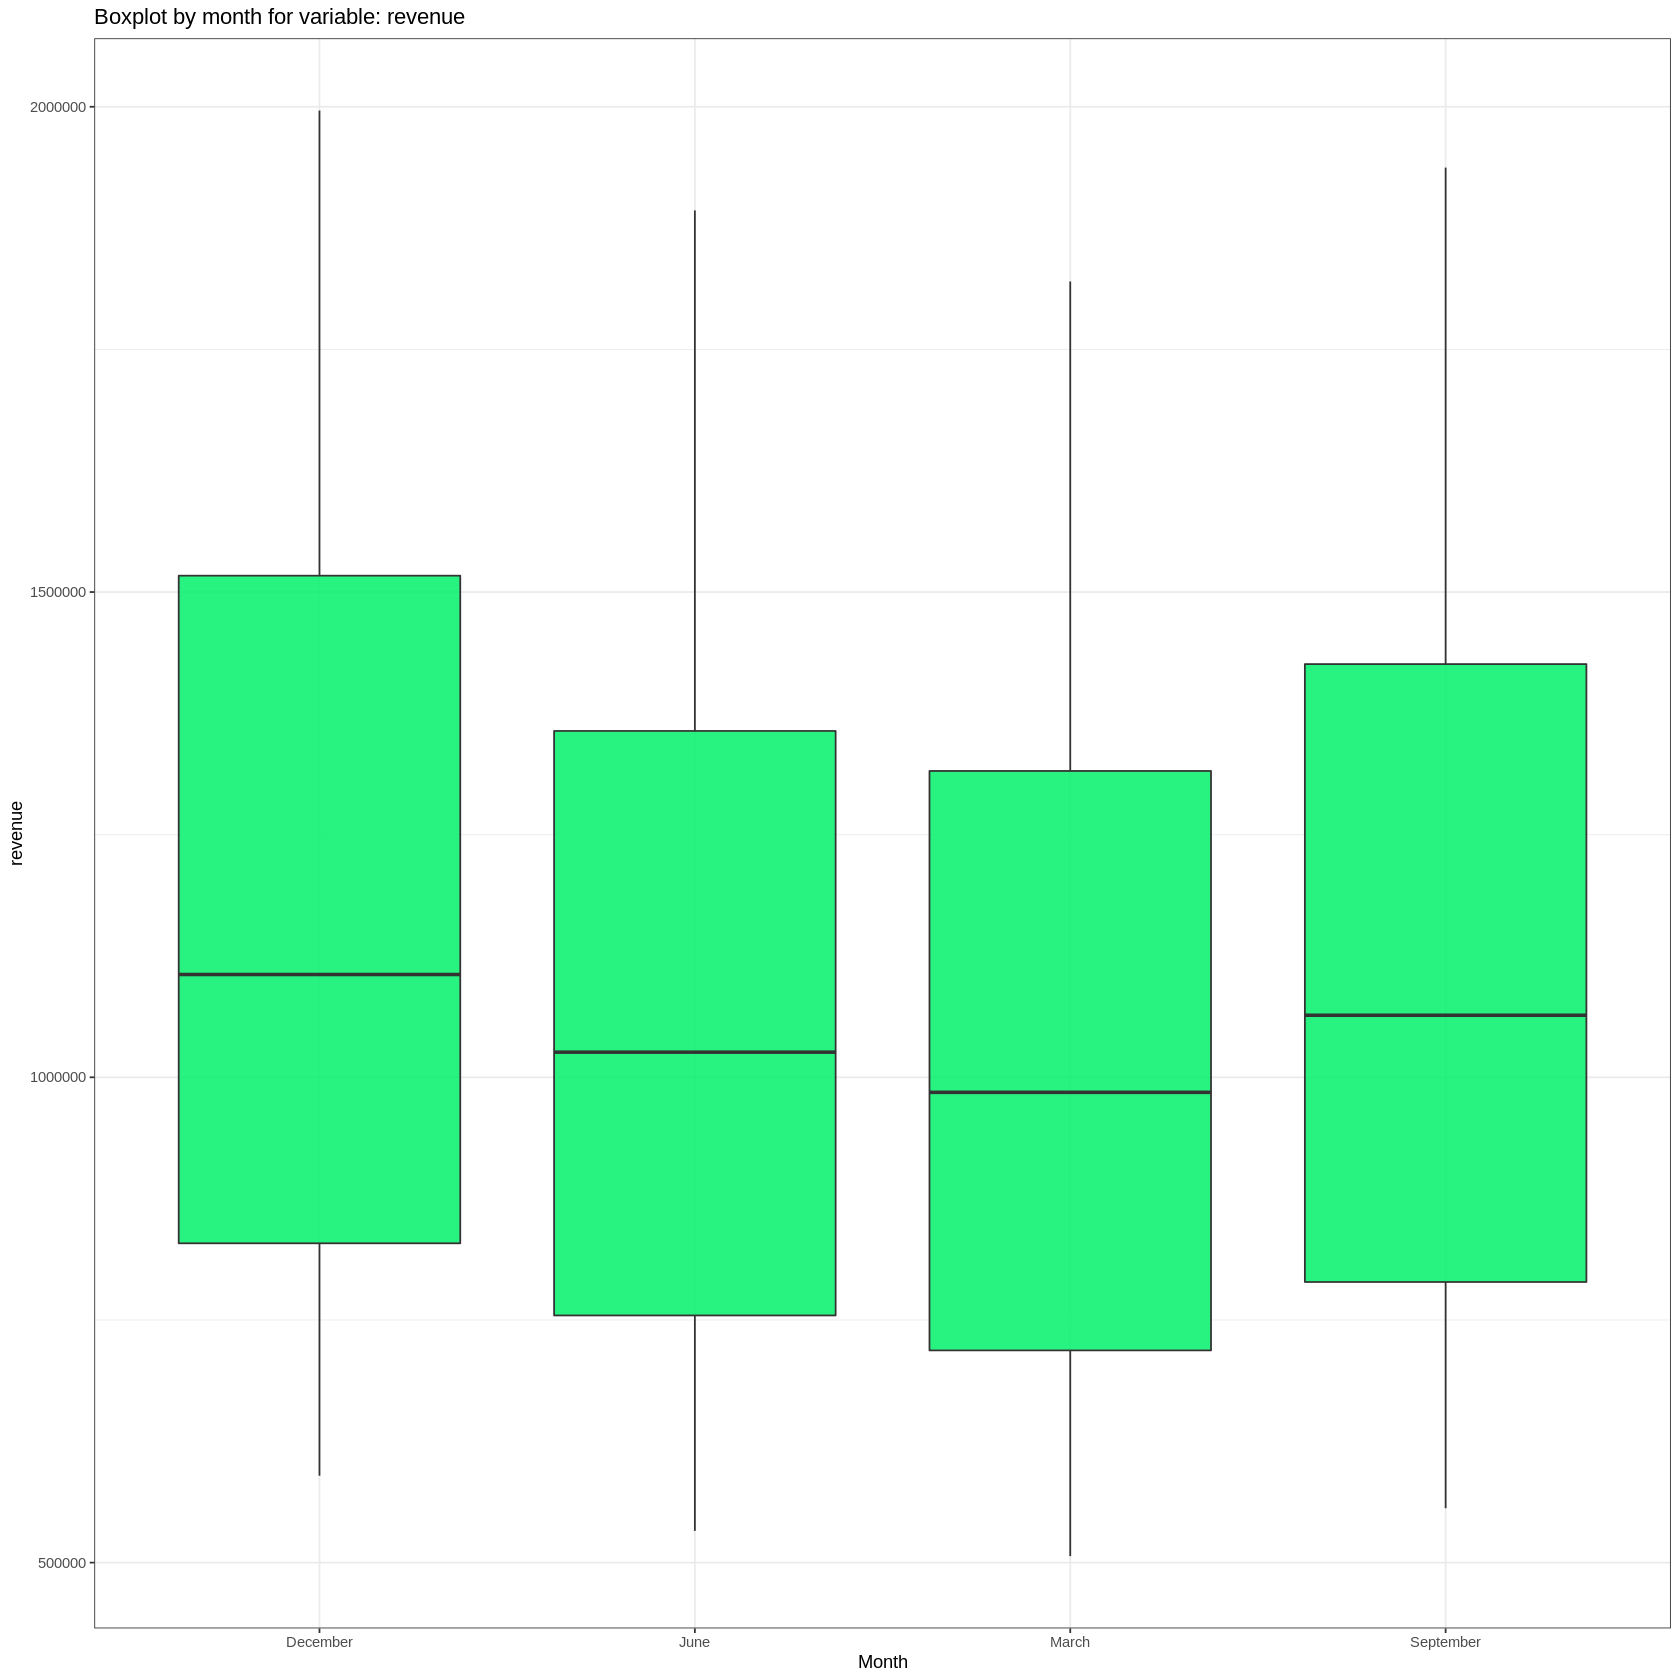

In [ ]:
# Criando um gráfico Boxplot, que agrupe a variável especificada, pelo trimestre ao qual seu registro está associada.

boxPlot(col = col, data = data, categ = 'month')

Parece não haver um diferença significativa, para a receita gerada, entre os trimestres dos anos.

#### **5.4.5 Variável costOfRevenues**

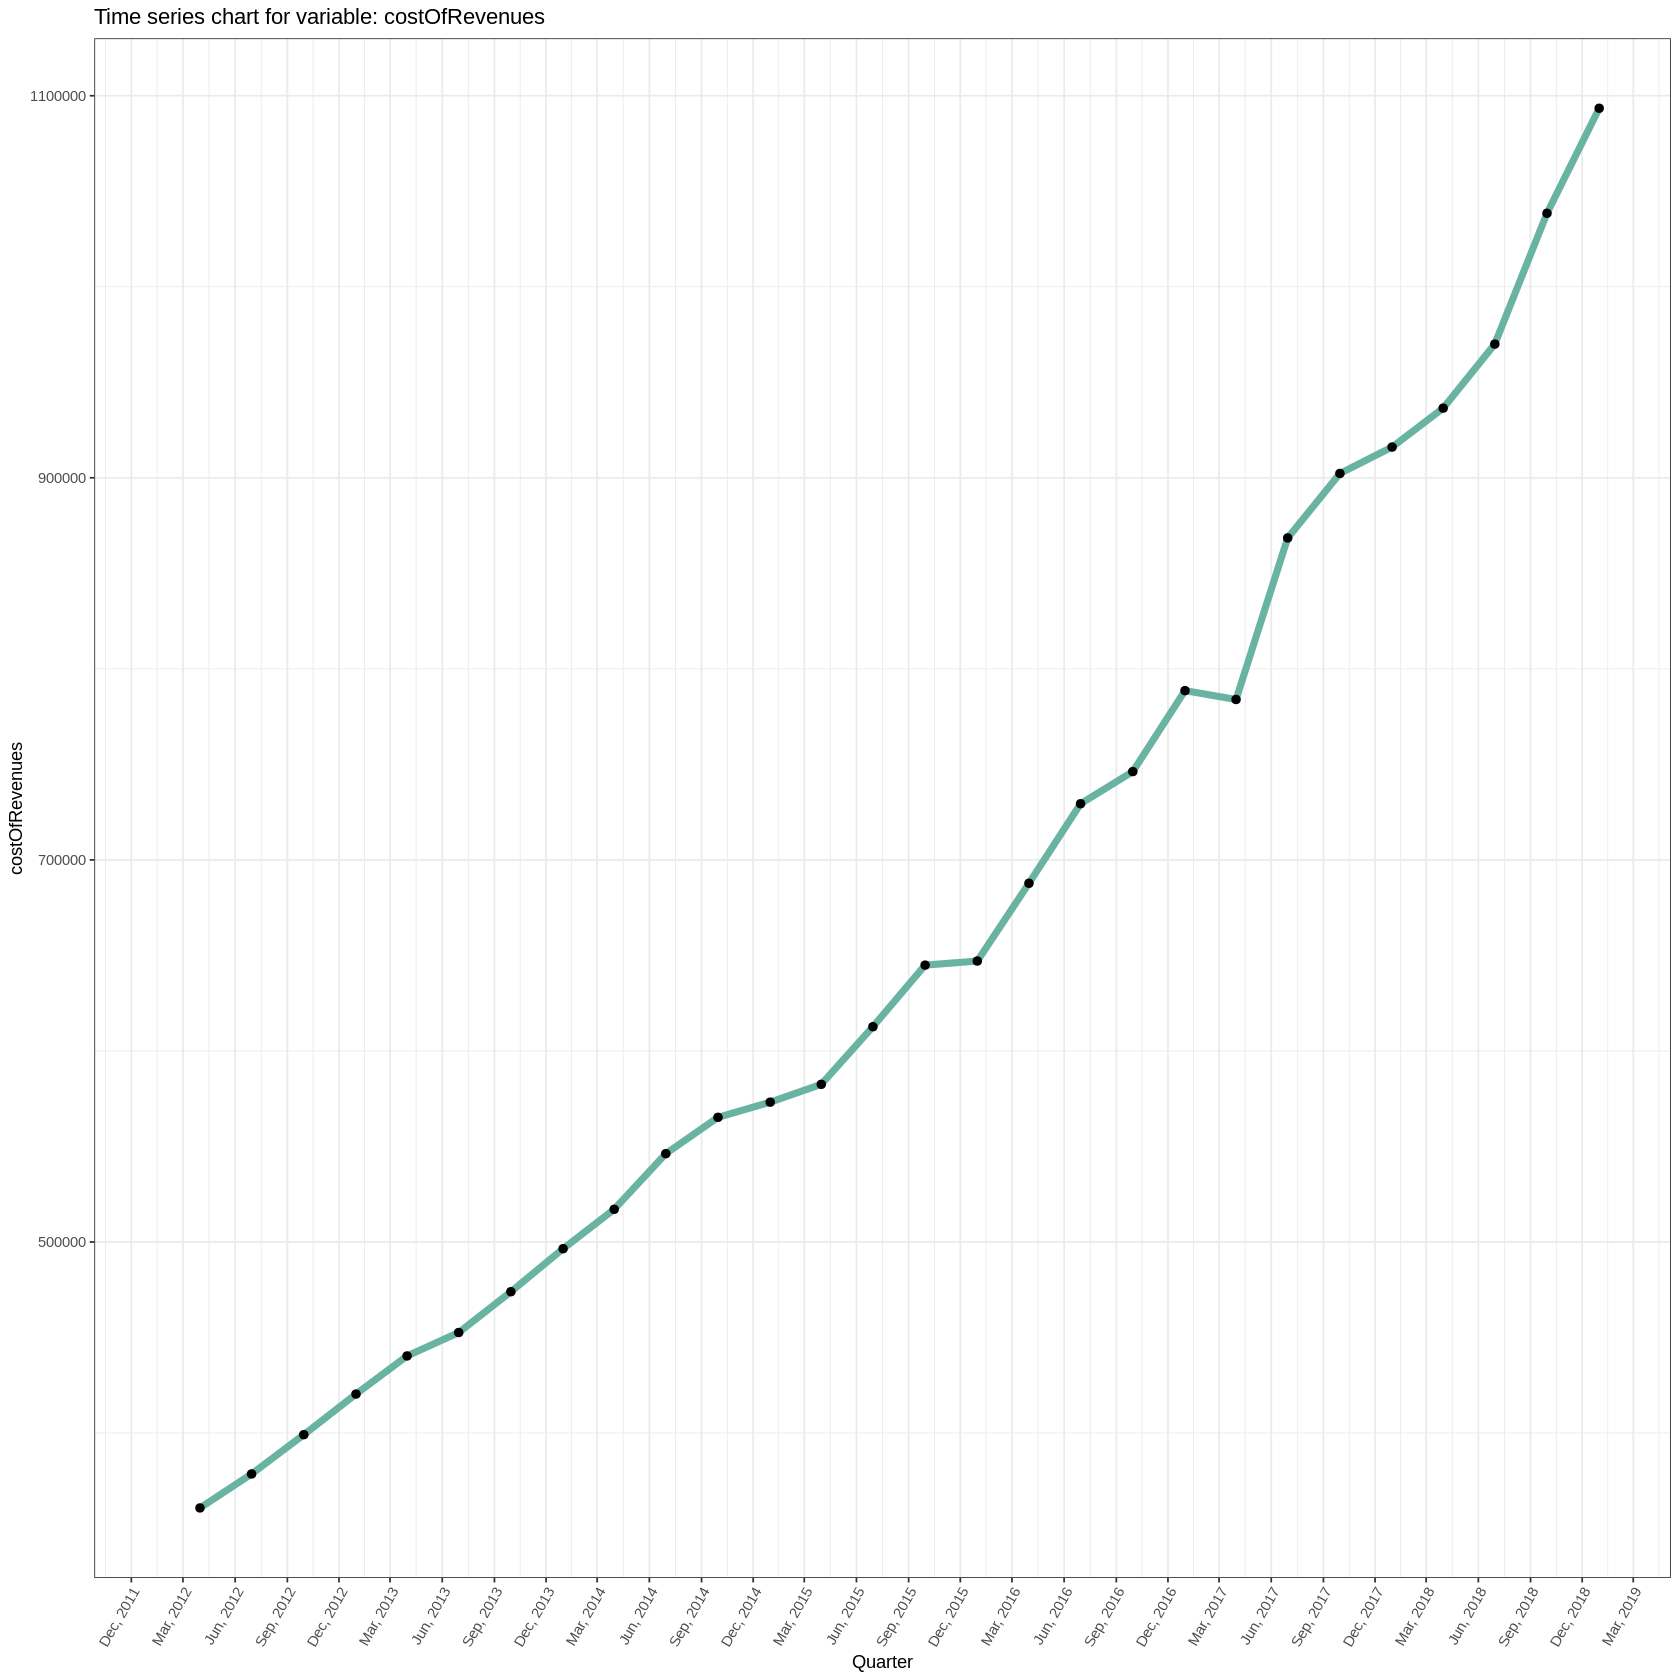

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'costOfRevenues'

# Criando um gráfico de série temporal para a variável especificada.

timeSeriesPlot(col = col, data = data)

A série temporal demonstra, um **crescimento aproximadamente linear**, do custo trimestral da receita gerada entre os anos em análise.

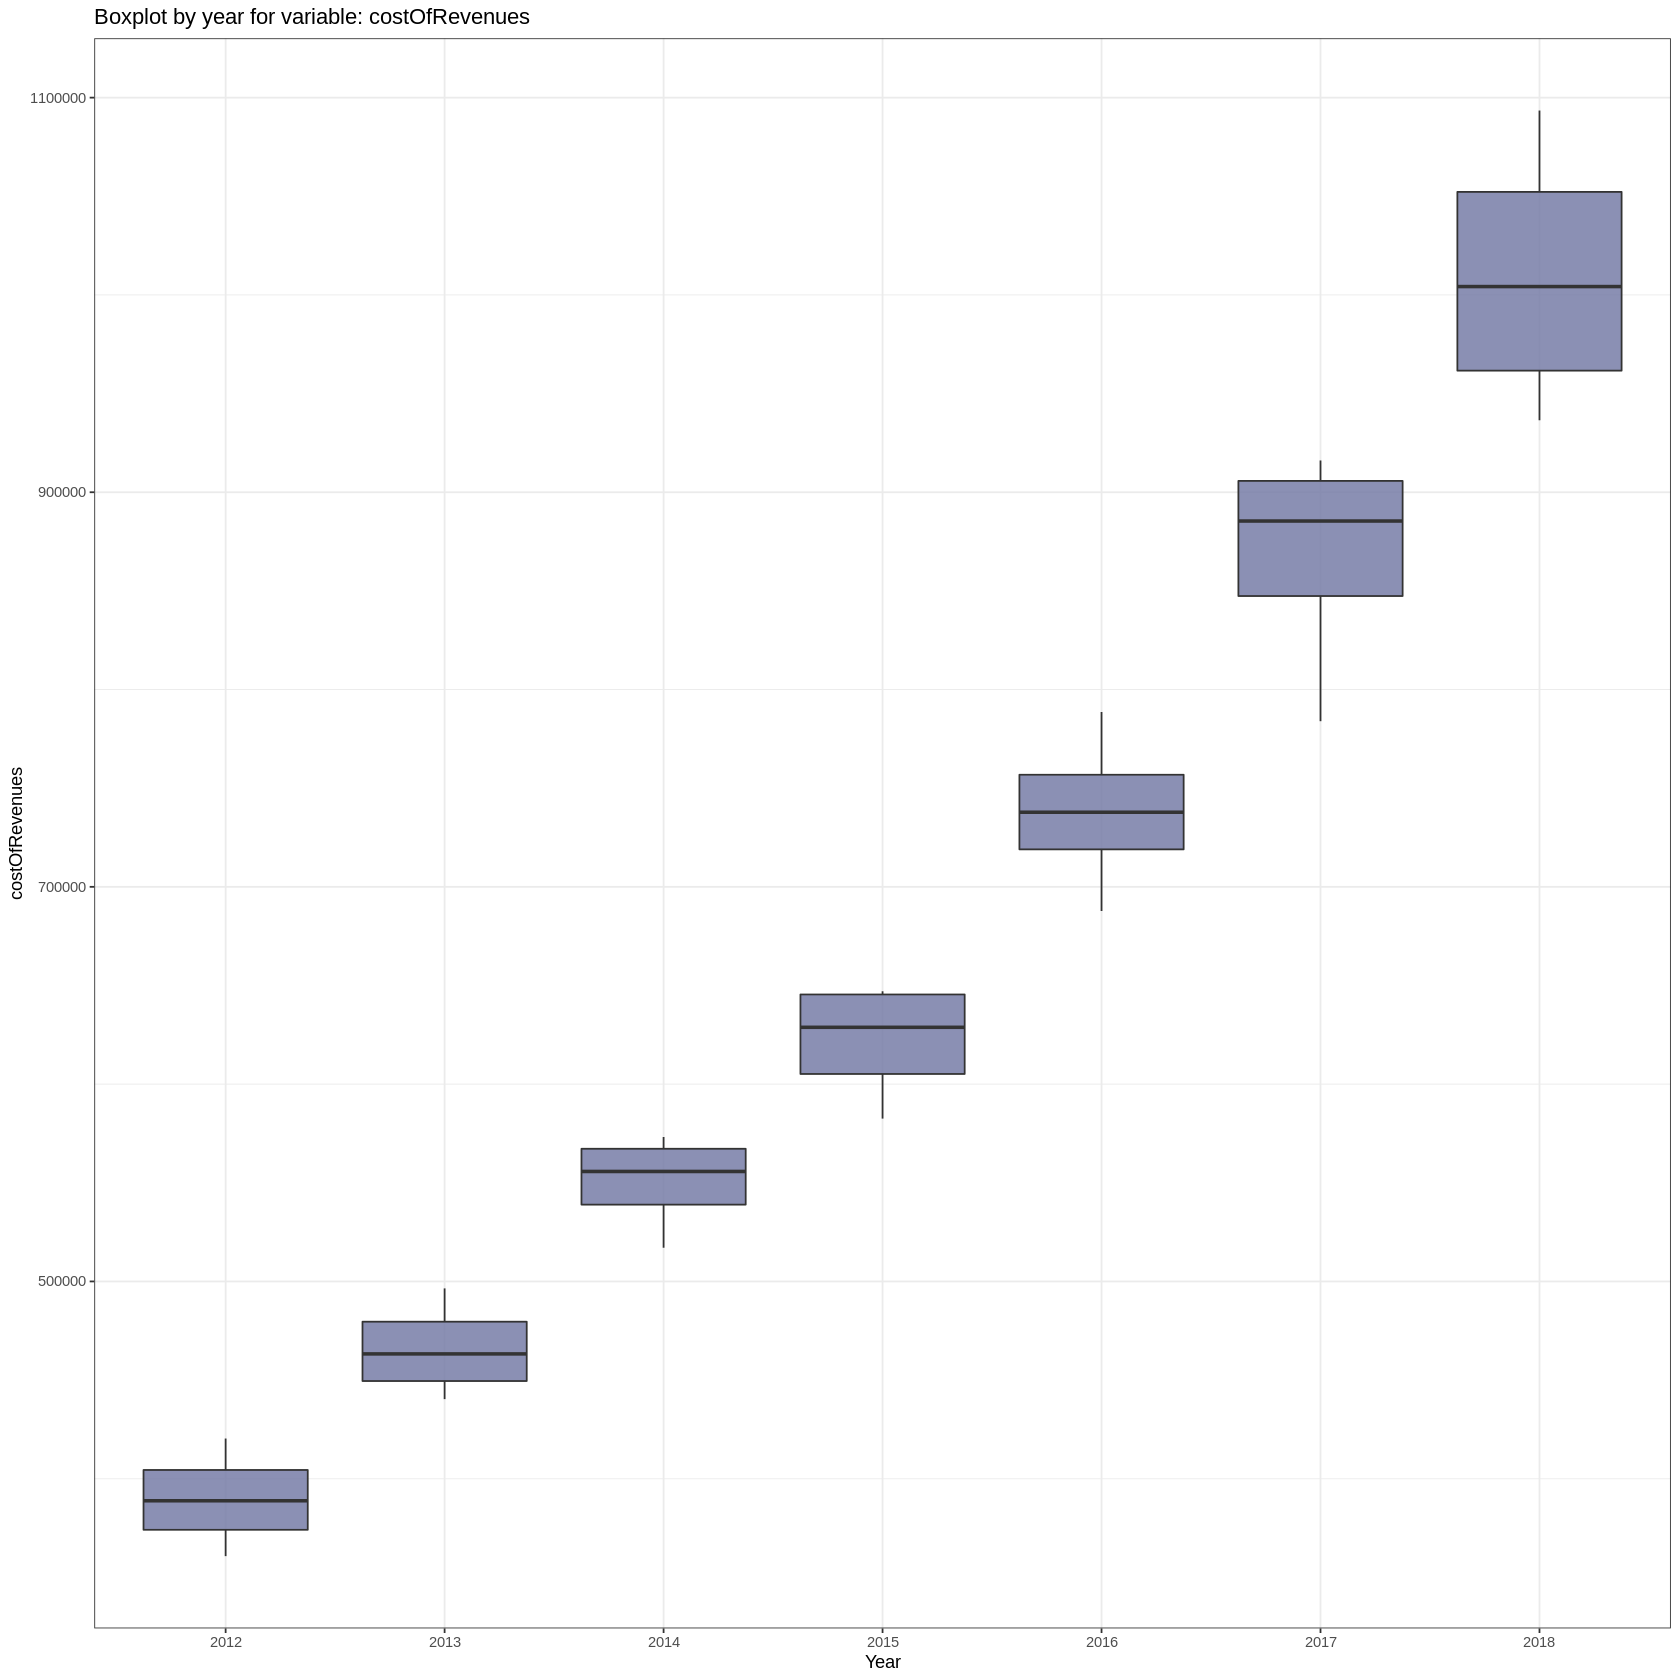

In [ ]:
# Criando um gráfico Boxplot, que agrupe a variável especificada, pelo ano ao qual seu registro está associada.

boxPlot(col = col, data = data, categ = 'year')

Como vimos anteriormente, o custo da receita gerada aumenta a cada ano.

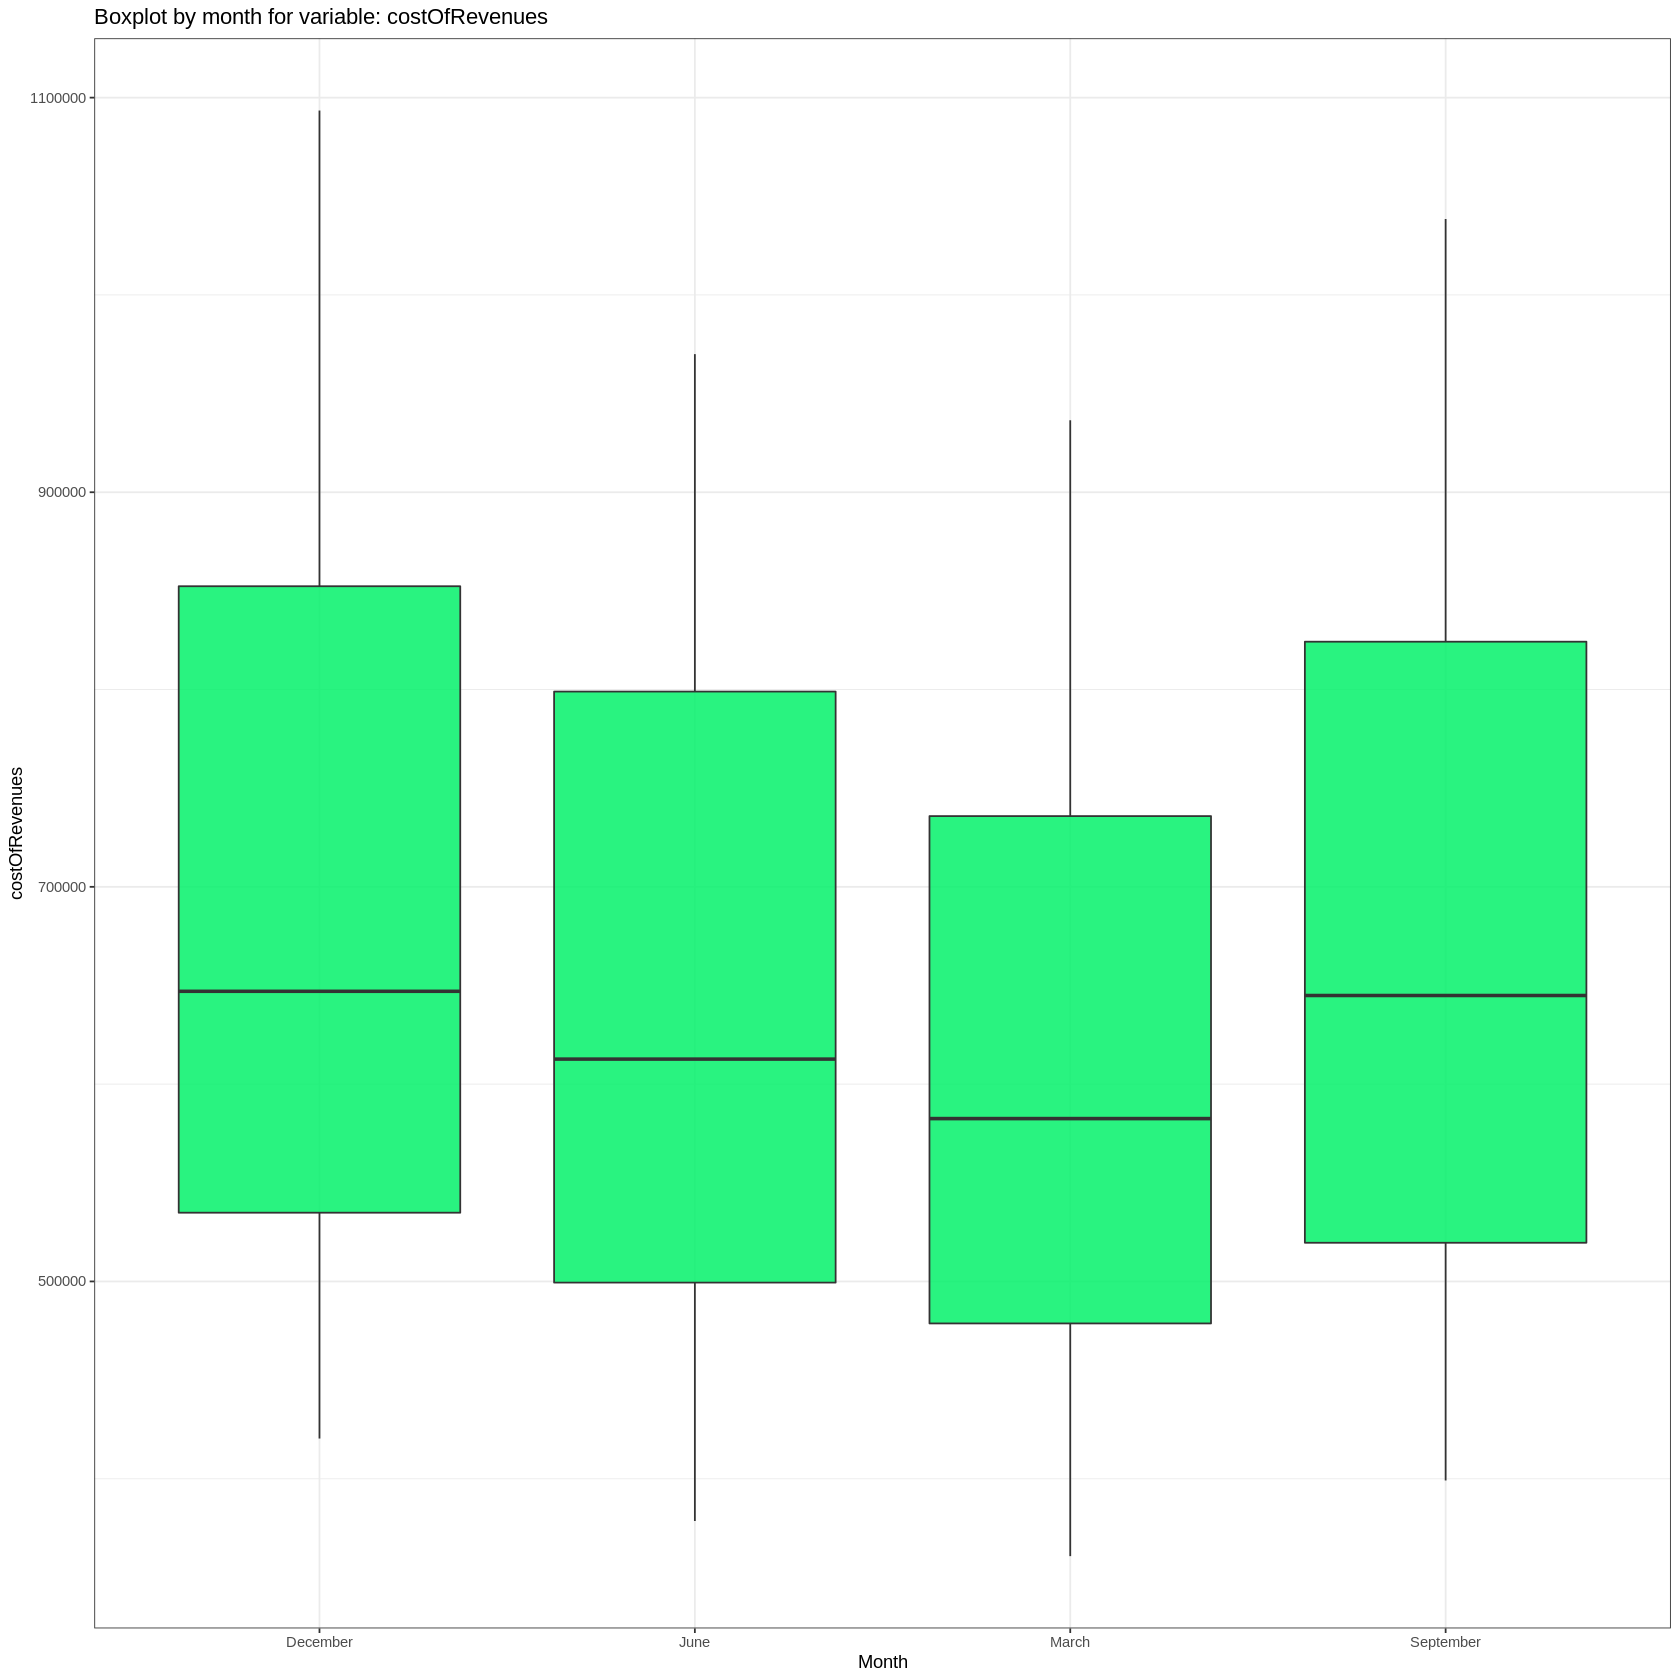

In [ ]:
# Criando um gráfico Boxplot, que agrupe a variável especificada, pelo trimestre ao qual seu registro está associada.

boxPlot(col = col, data = data, categ = 'month')

Parece não haver um diferença significativa, para o custo da receita gerada, entre os trimestres dos anos.

#### **5.4.6 Variável marketing**

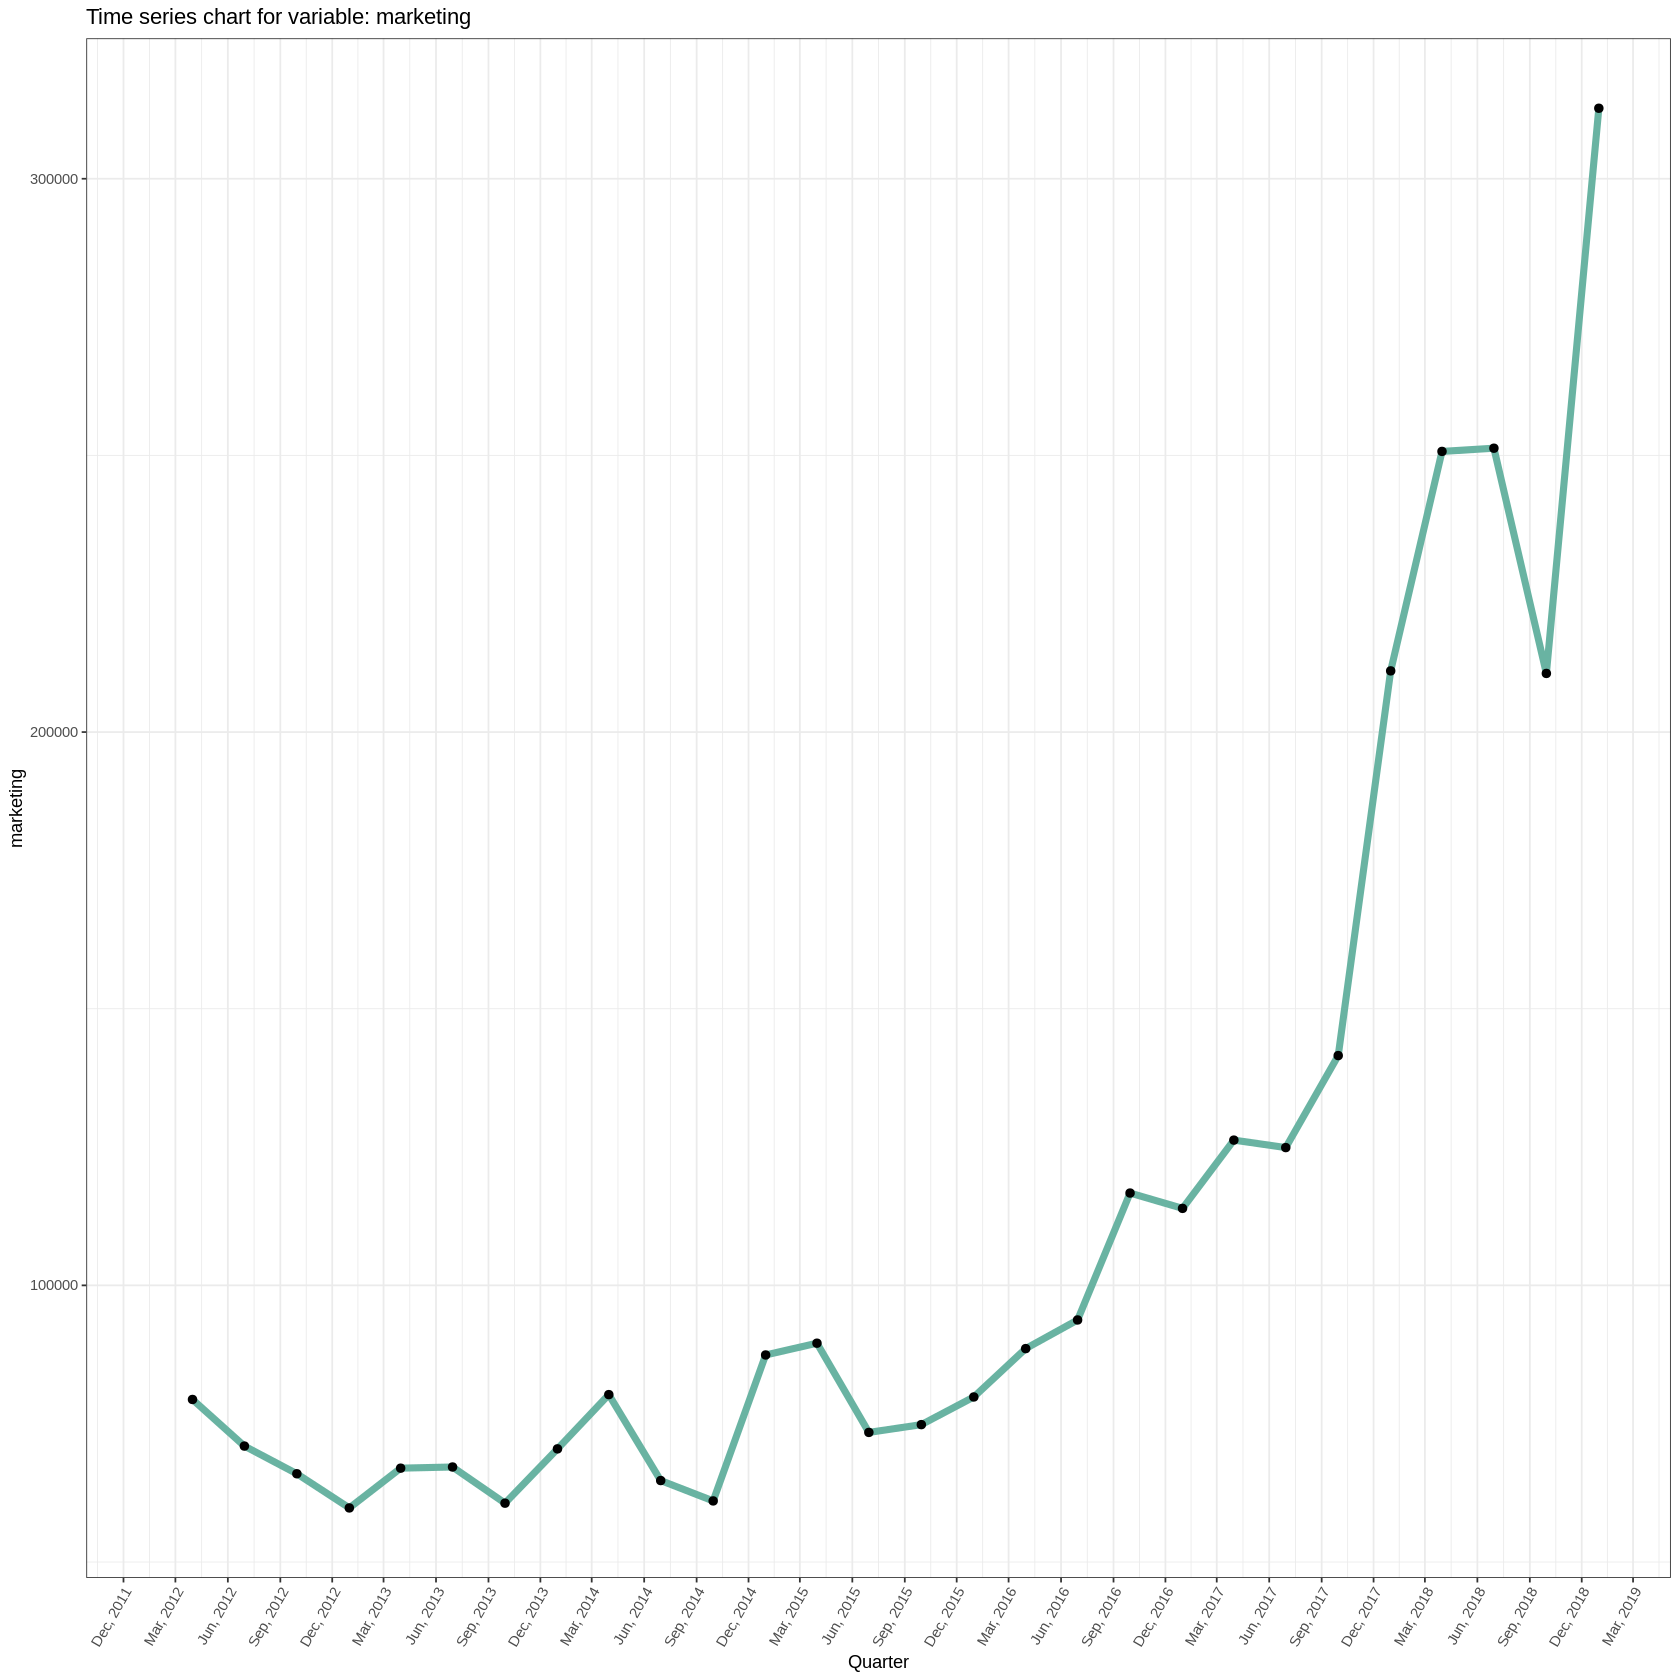

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'marketing'

# Criando um gráfico de série temporal para a variável especificada.

timeSeriesPlot(col = col, data = data)

A série temporal demonstra, um **crescimento aproximadamente exponencial**, do custo de marketing entre os anos em análise.


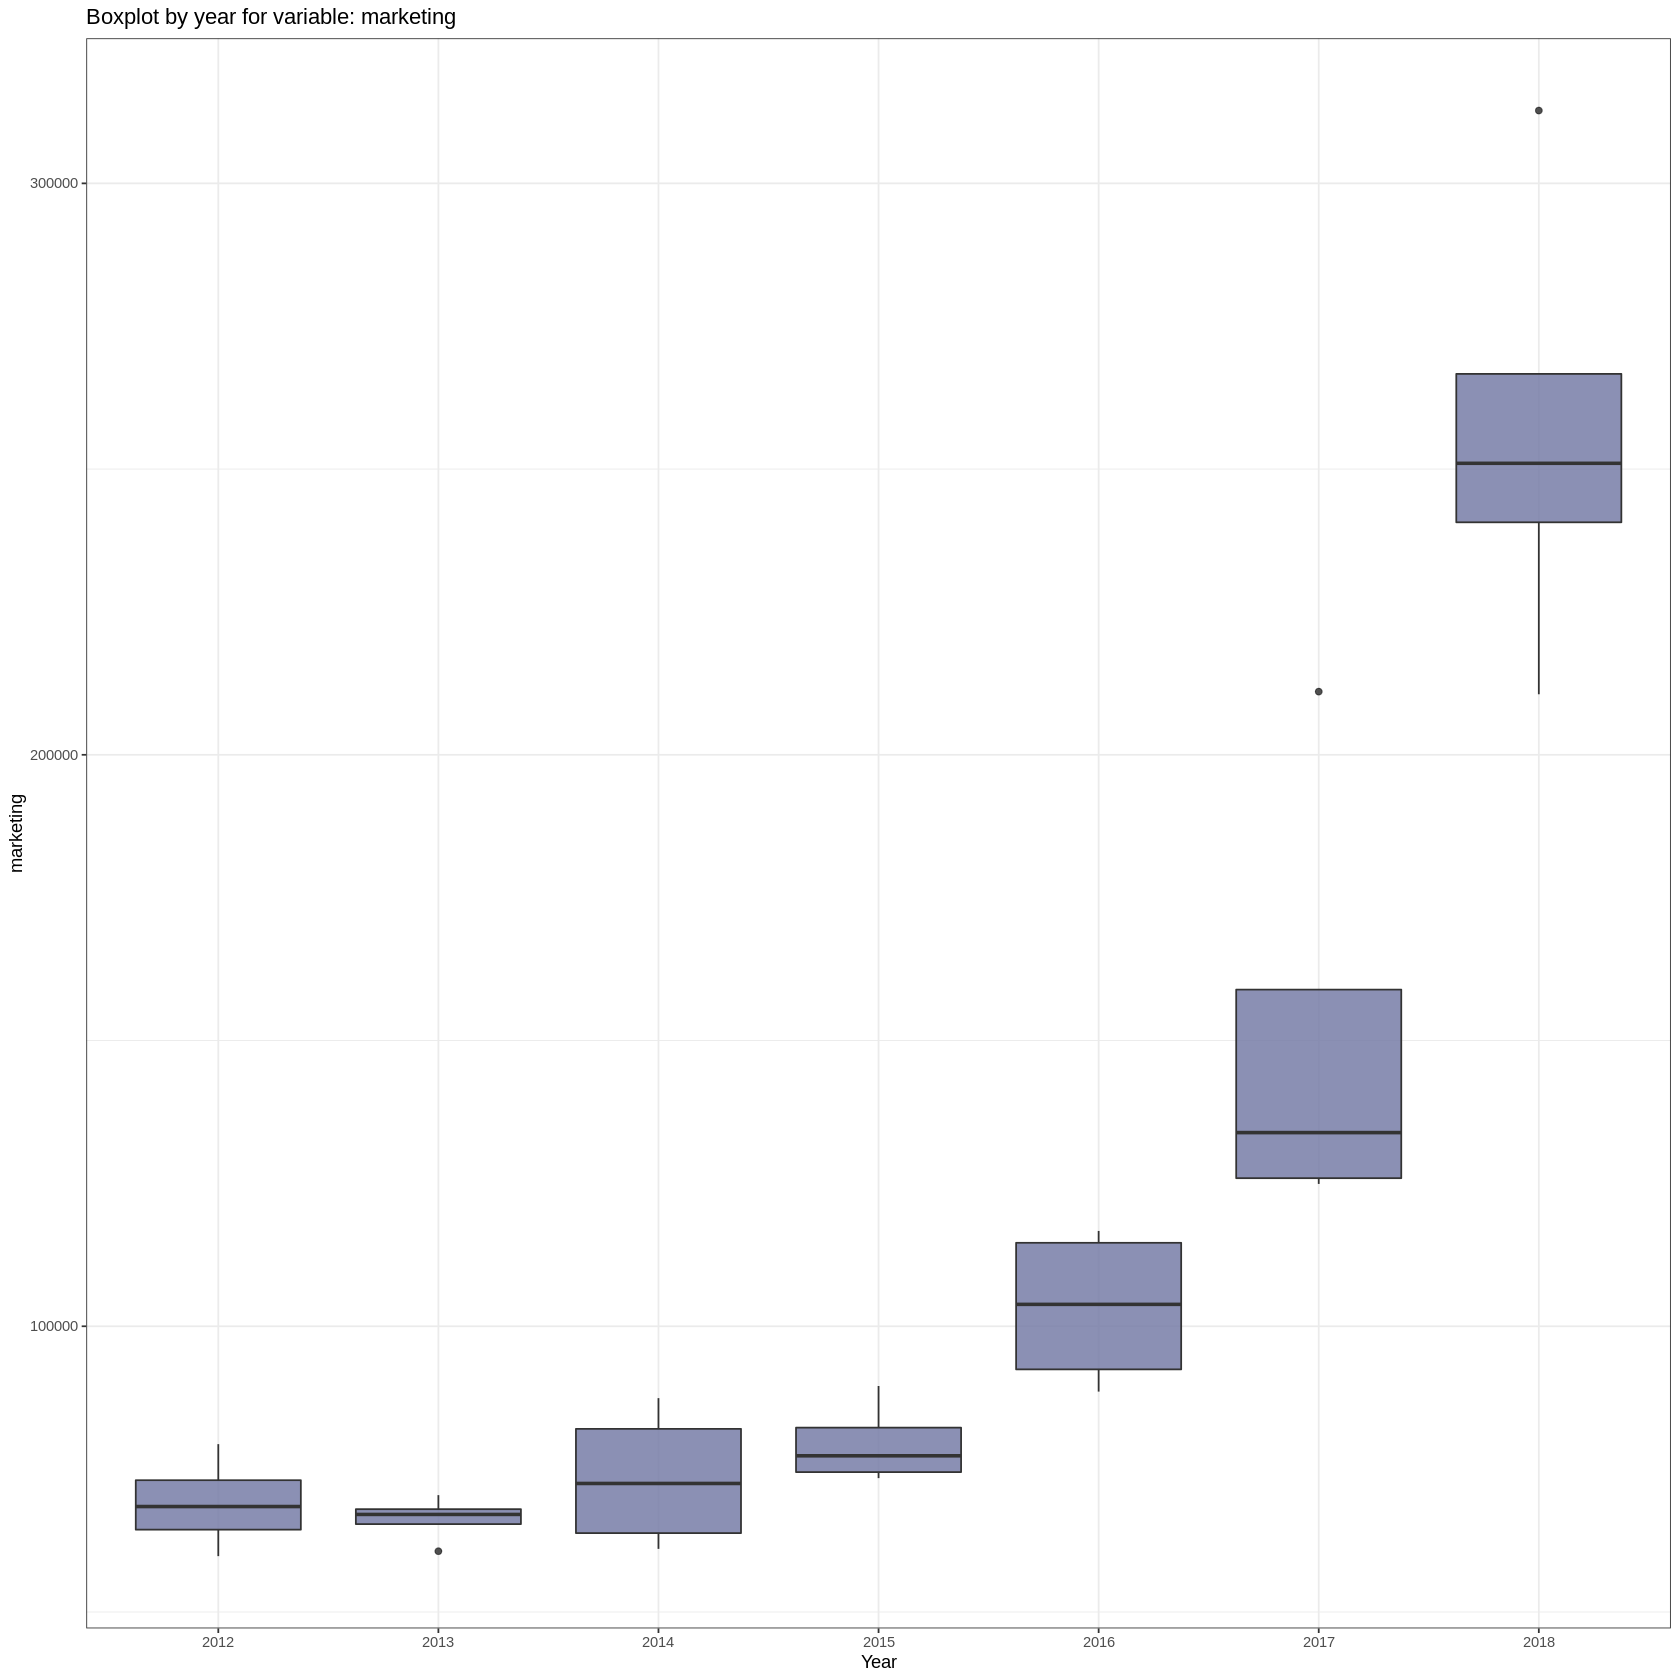

In [ ]:
# Criando um gráfico Boxplot, que agrupe a variável especificada, pelo ano ao qual seu registro está associada.

boxPlot(col = col, data = data, categ = 'year')

Como vimos anteriormente, o custo de marketing aumenta expencialmente a cada ano.

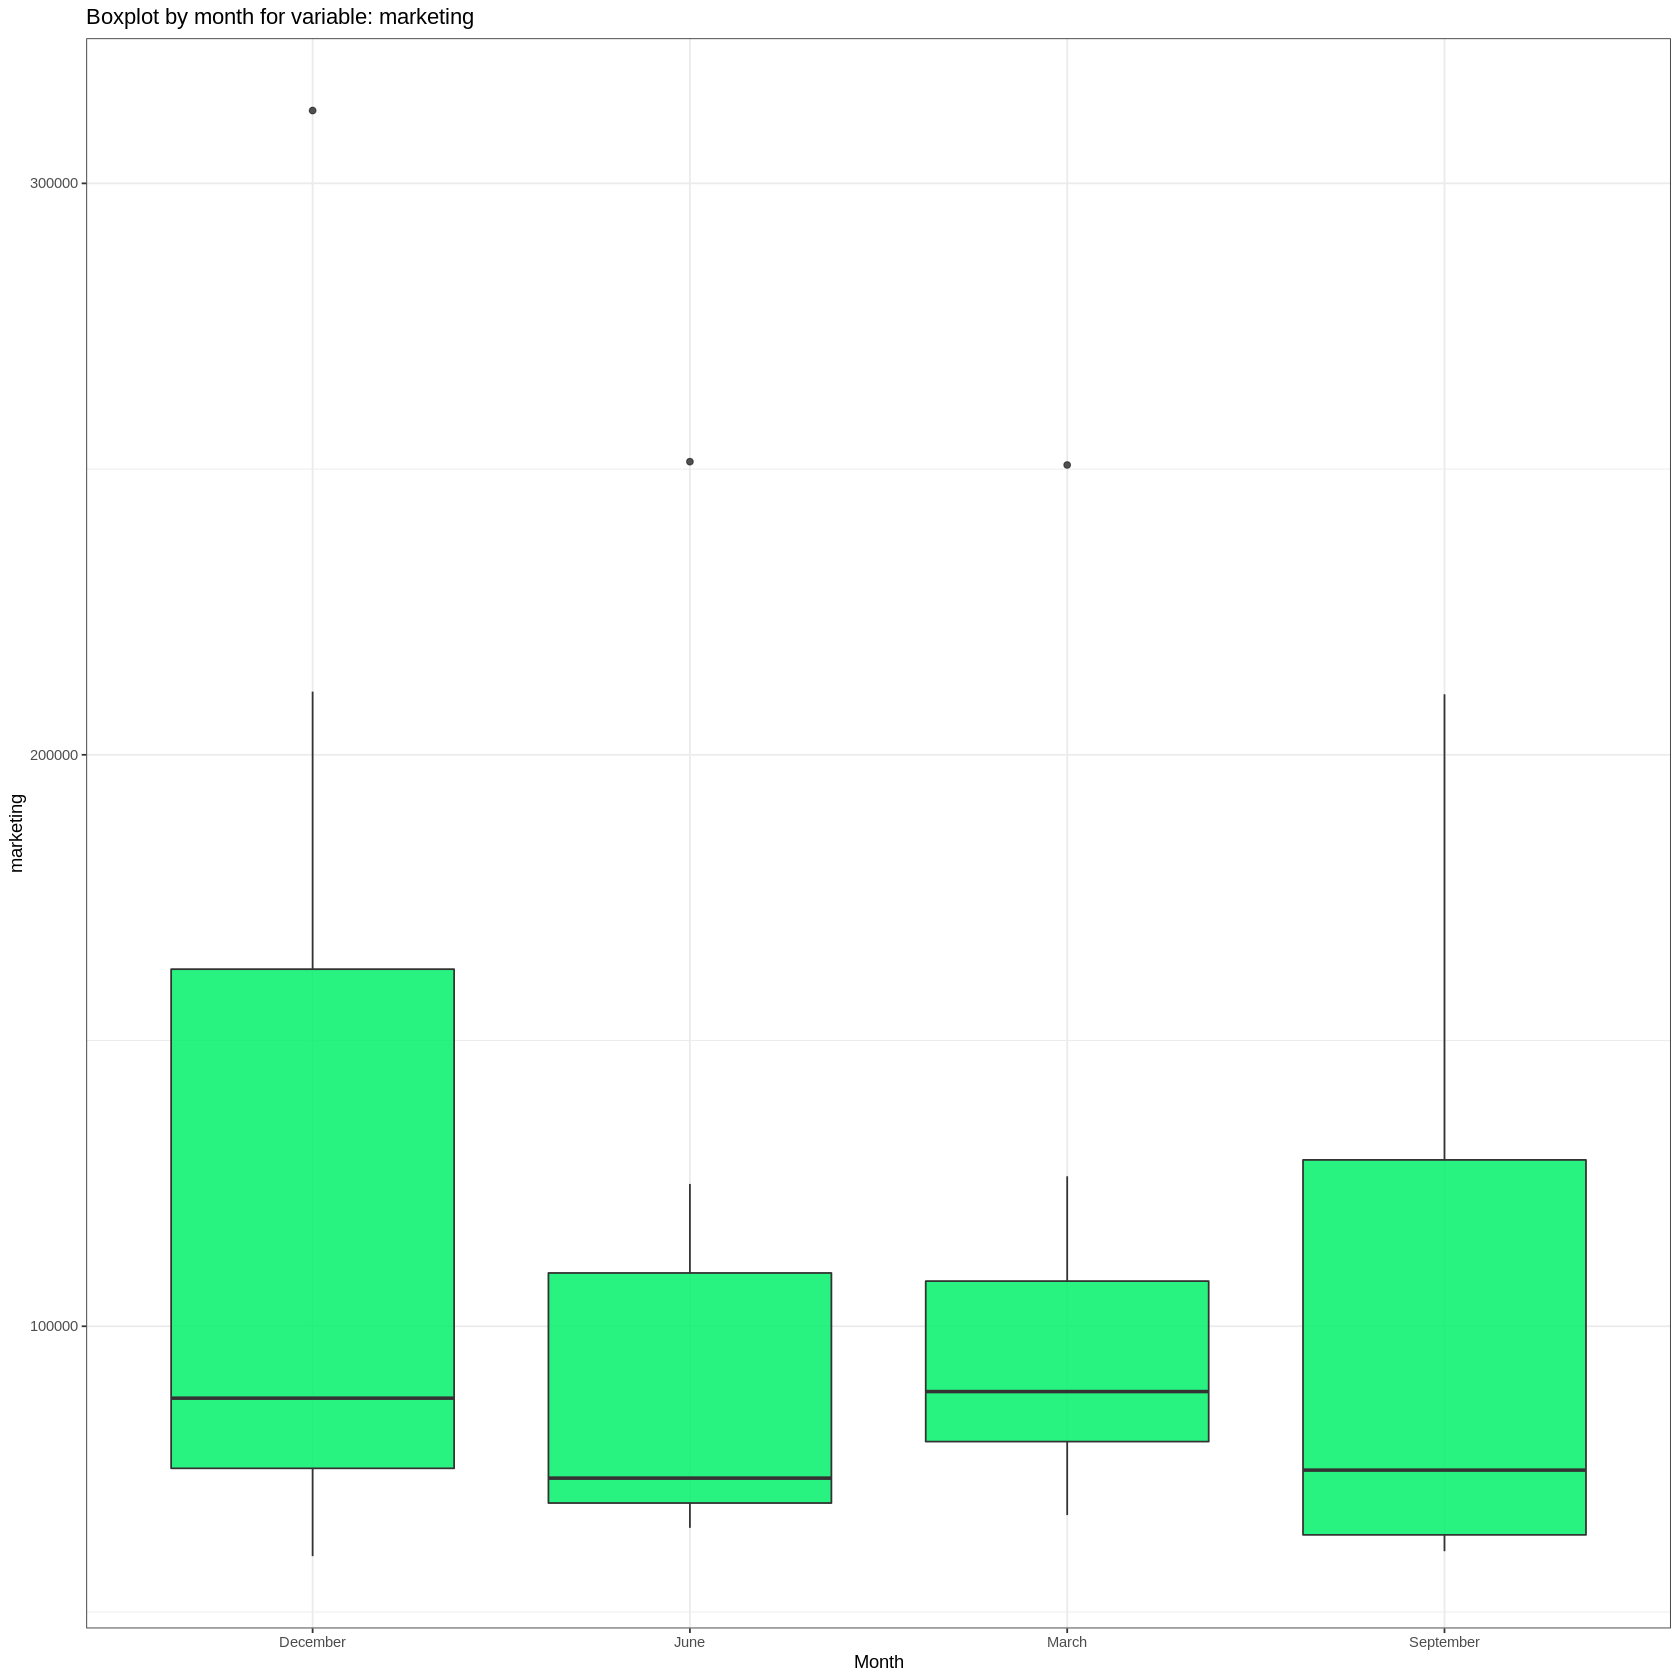

In [ ]:
# Criando um gráfico Boxplot, que agrupe a variável especificada, pelo trimestre ao qual seu registro está associada.

boxPlot(col = col, data = data, categ = 'month')

Parece não haver um diferença mediana significativa, para o custo de marketing, entre os trimestres dos anos. Também notamos uma alta variância no **terceiro e quarto trimestre**.

#### **5.4.7 Variável contributionProfit**

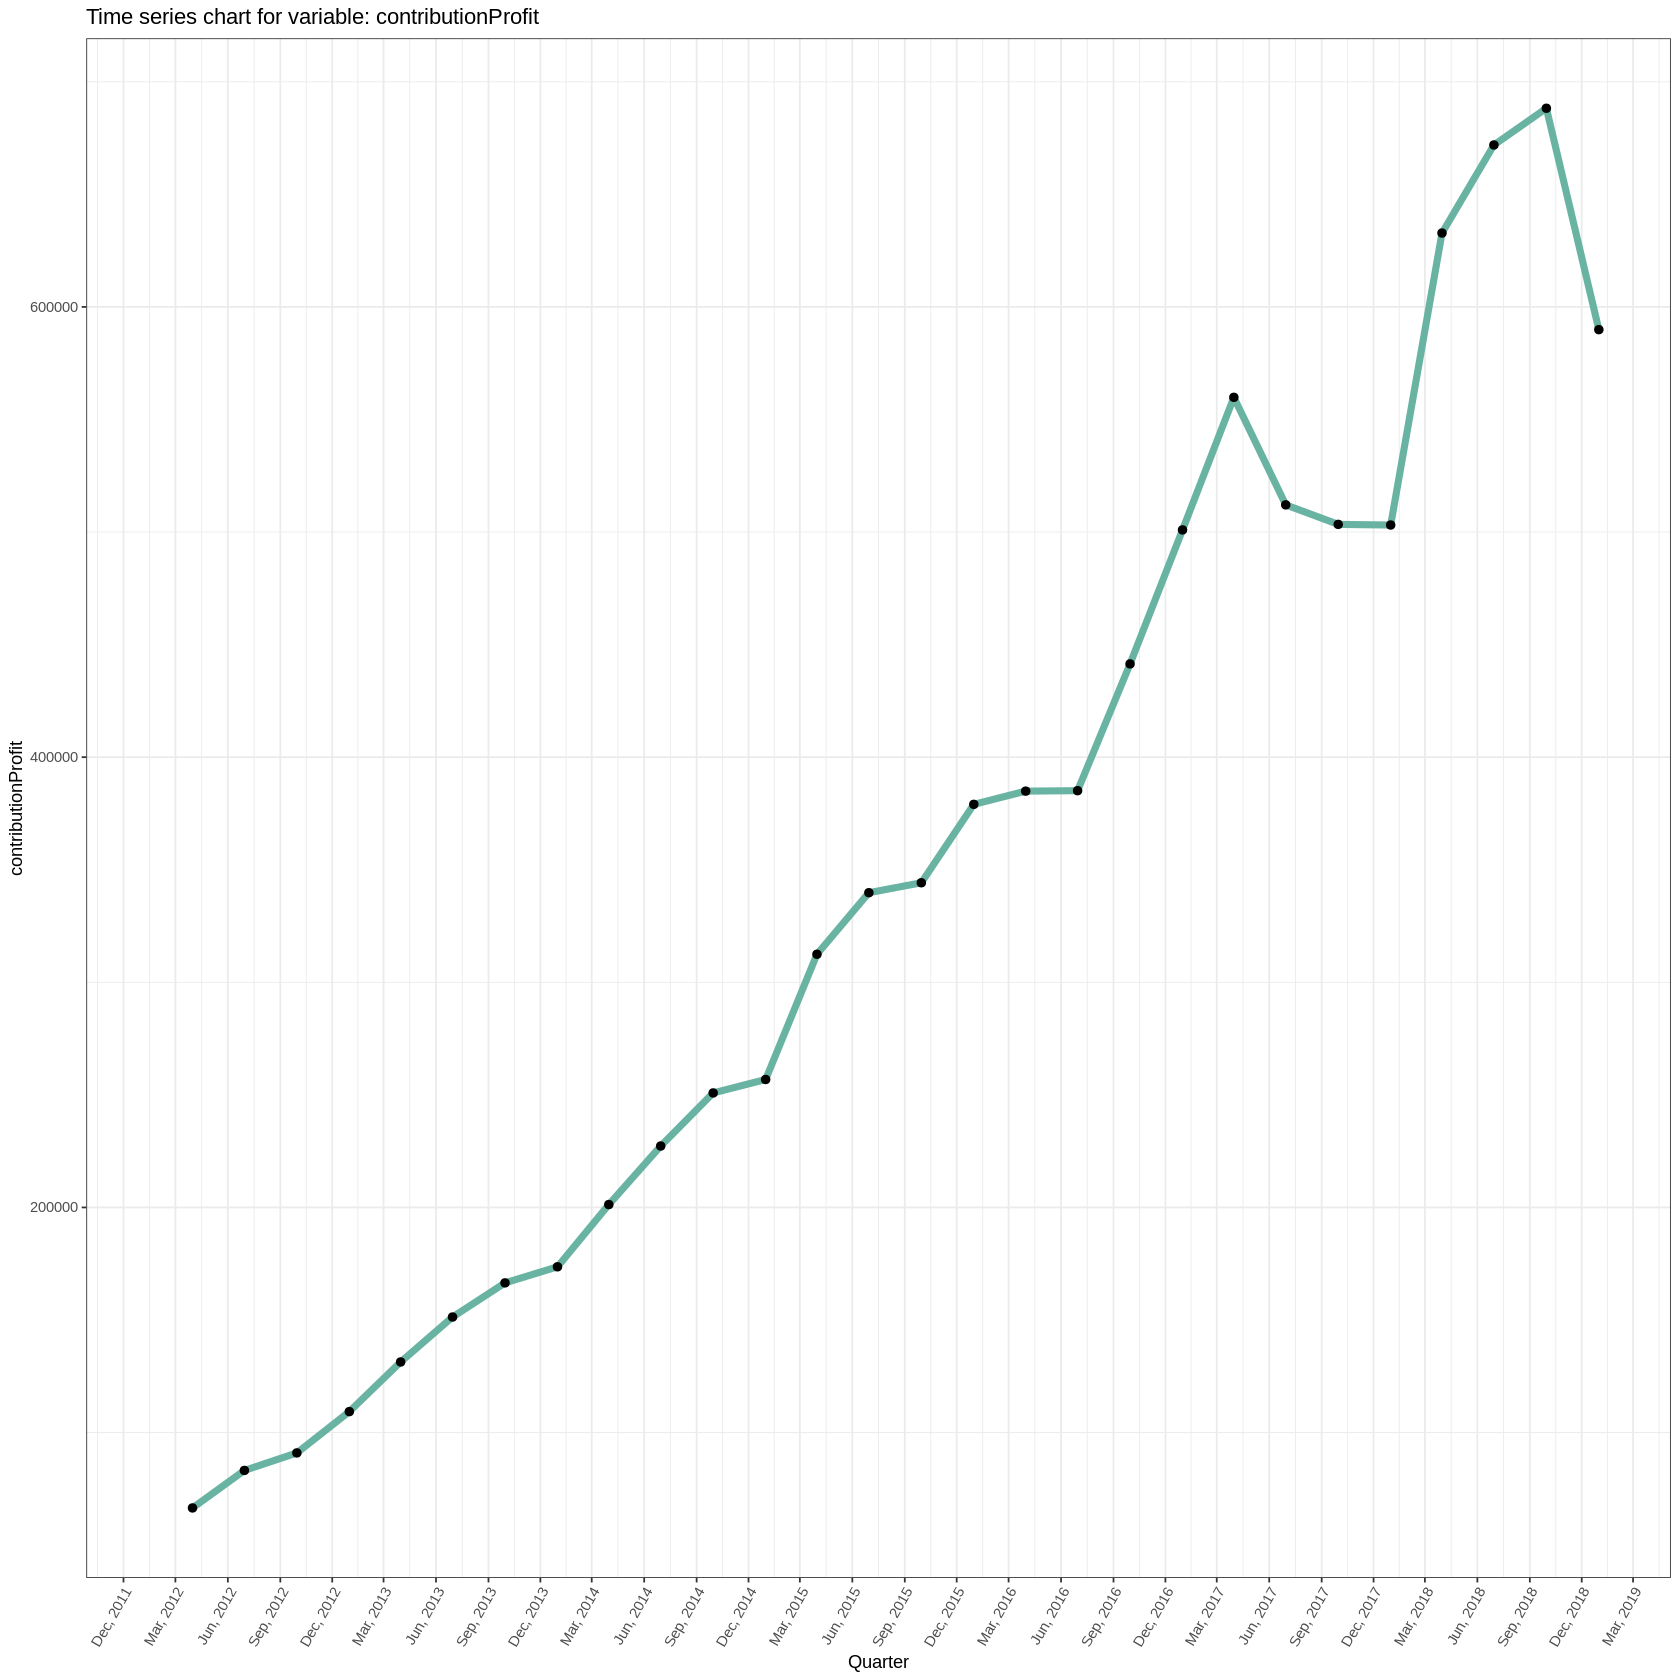

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'contributionProfit'

# Criando um gráfico de série temporal para a variável especificada.

timeSeriesPlot(col = col, data = data)

A série temporal demonstra, um **crescimento aproximadamente linear**, do lucro da contribuição entre os anos em análise.

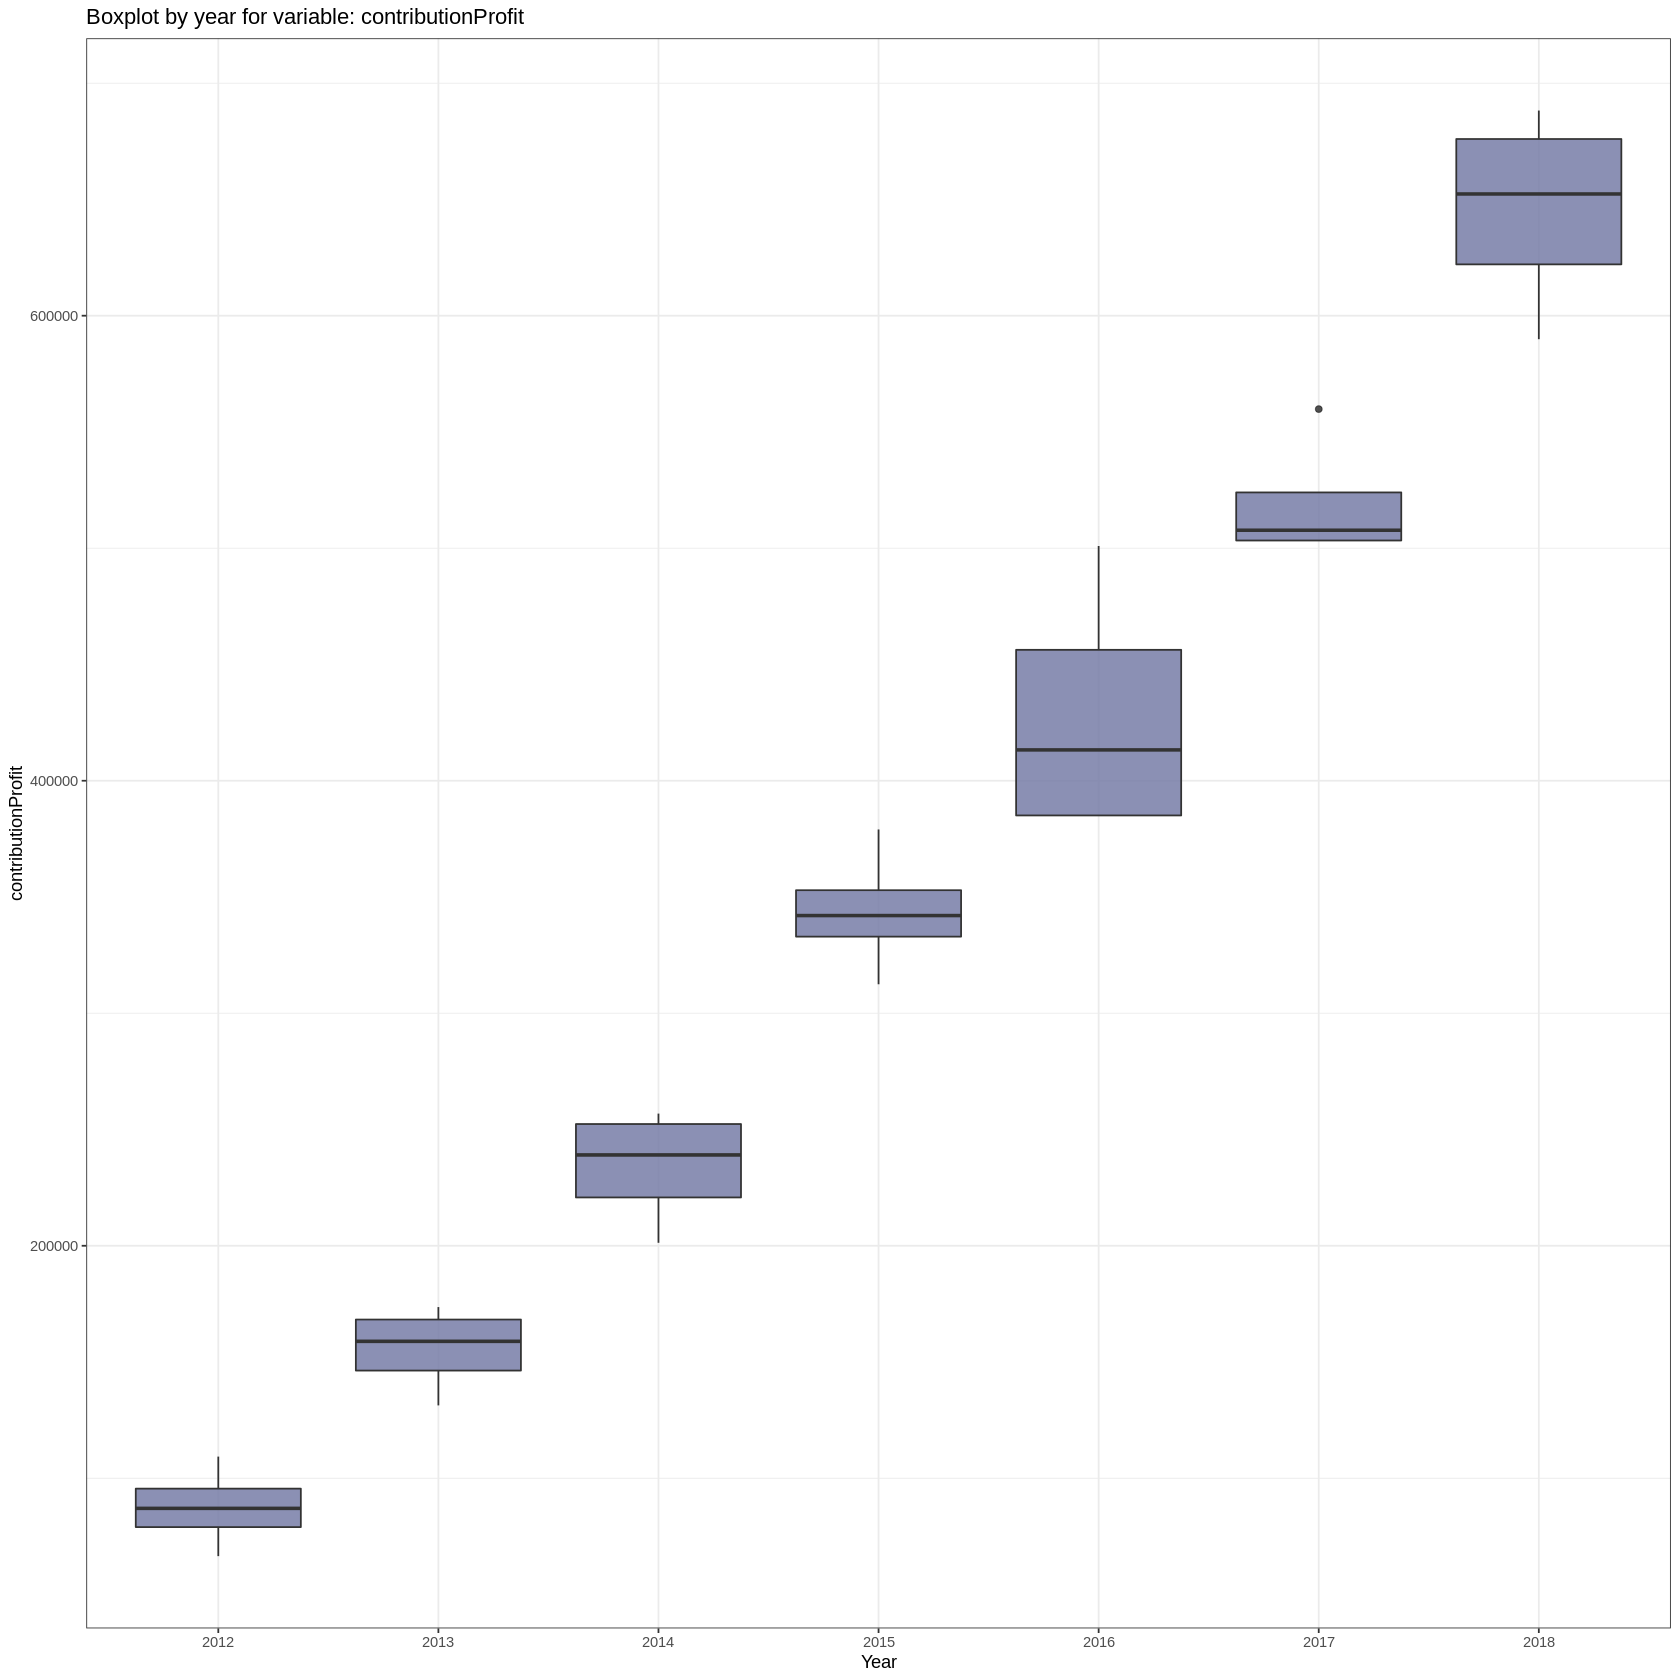

In [ ]:
# Criando um gráfico Boxplot, que agrupe a variável especificada, pelo ano ao qual seu registro está associada.

boxPlot(col = col, data = data, categ = 'year')

Como vimos anteriormente, o lucro da contribuição aumenta linearmente a cada ano.

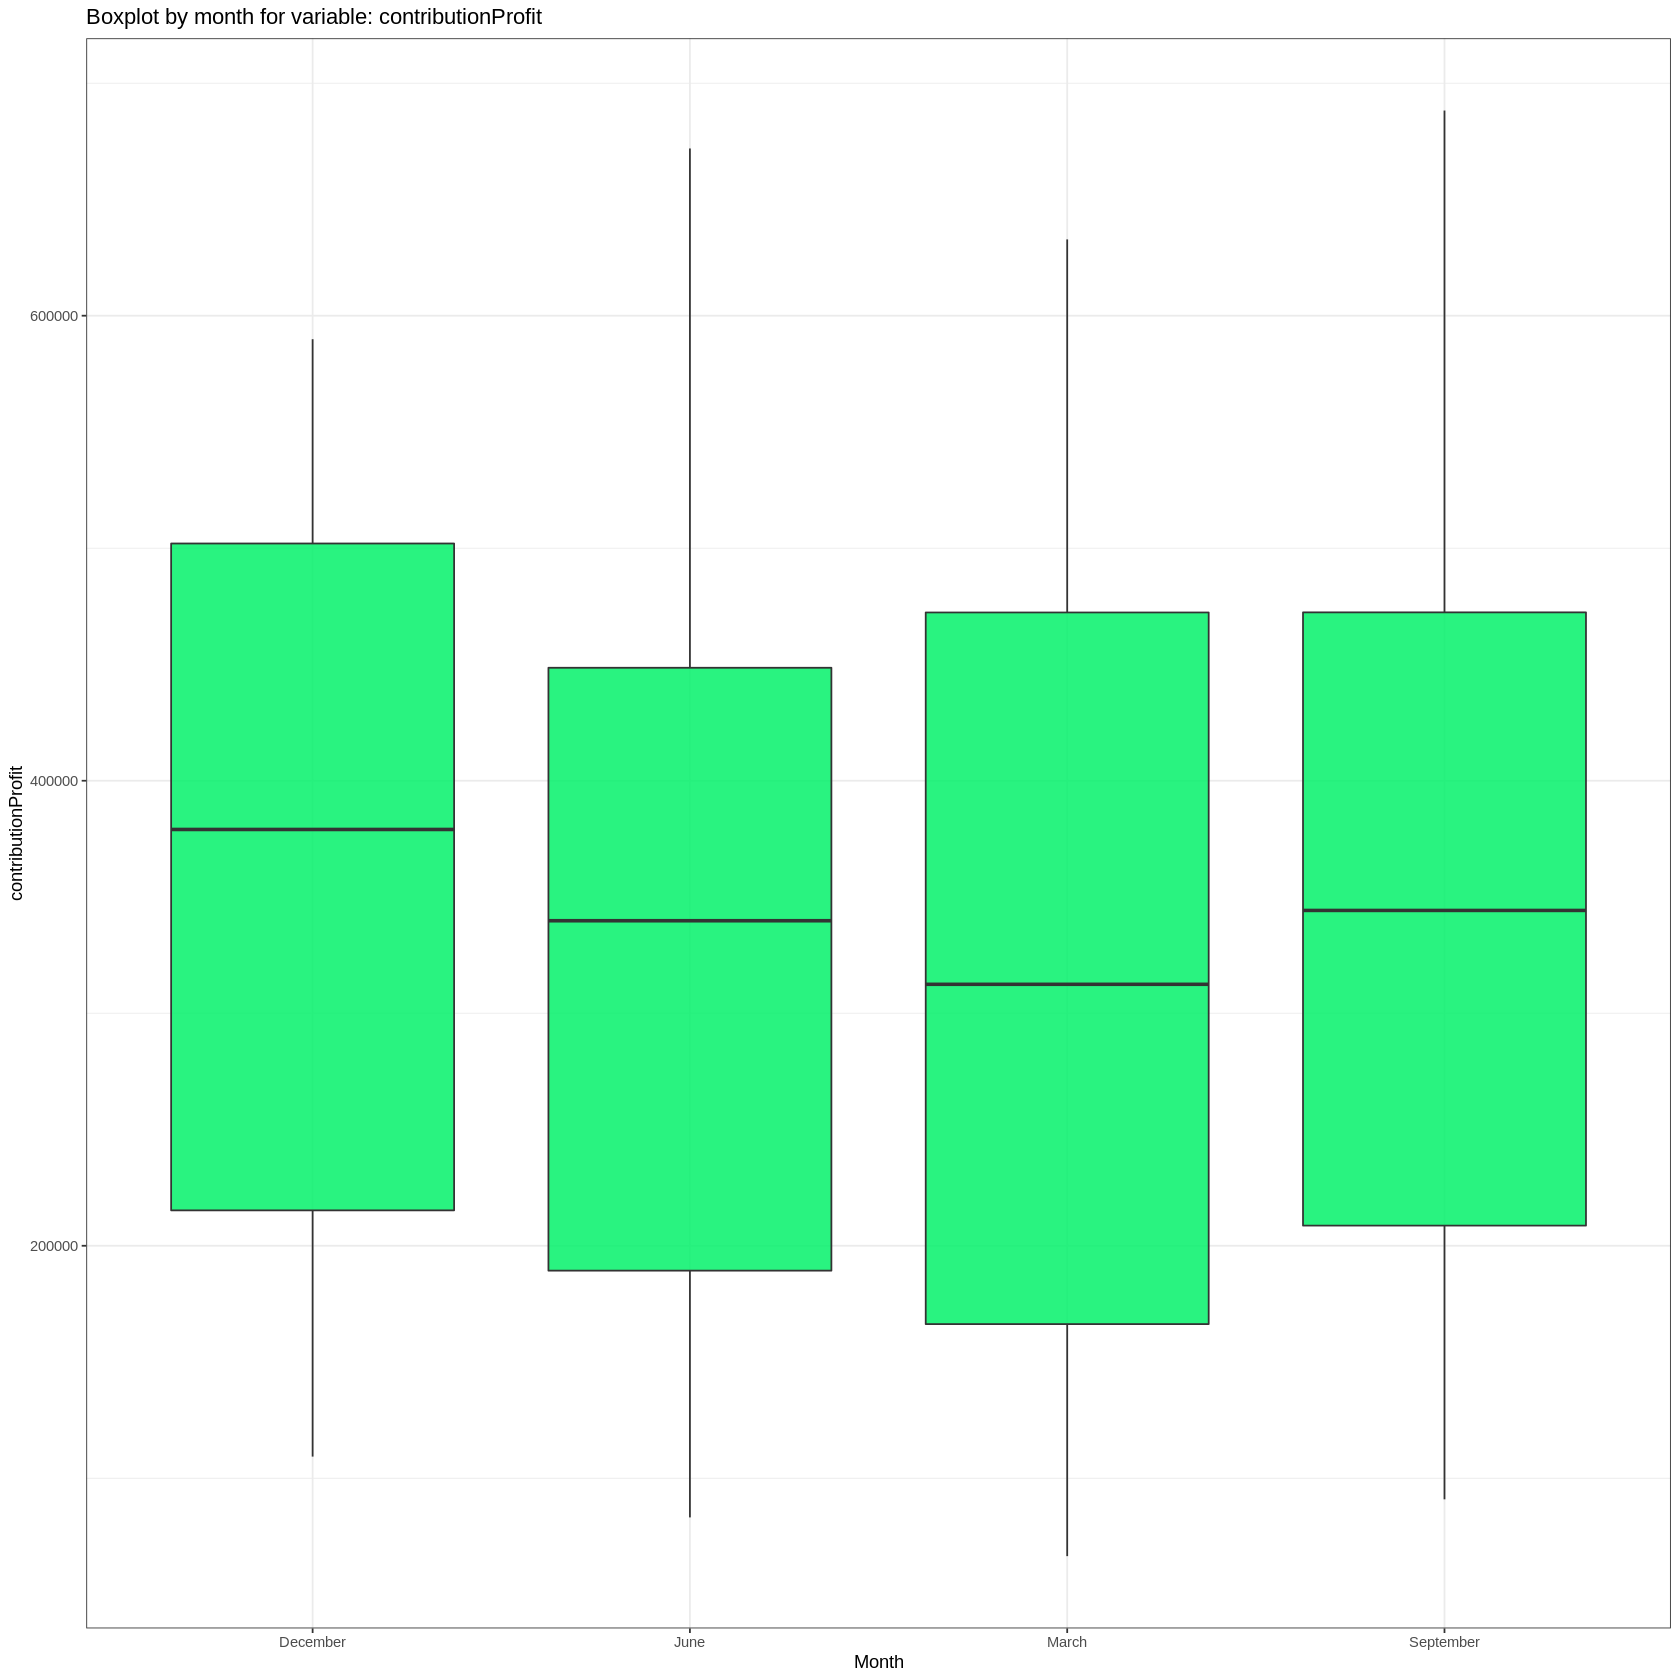

In [ ]:
# Criando um gráfico Boxplot, que agrupe a variável especificada, pelo trimestre ao qual seu registro está associada.

boxPlot(col = col, data = data, categ = 'month')

Parece não haver um diferença significativa, para o lucro da contribuição, entre os trimestres dos anos.

#### **5.4.8 Variável contributionMargin**

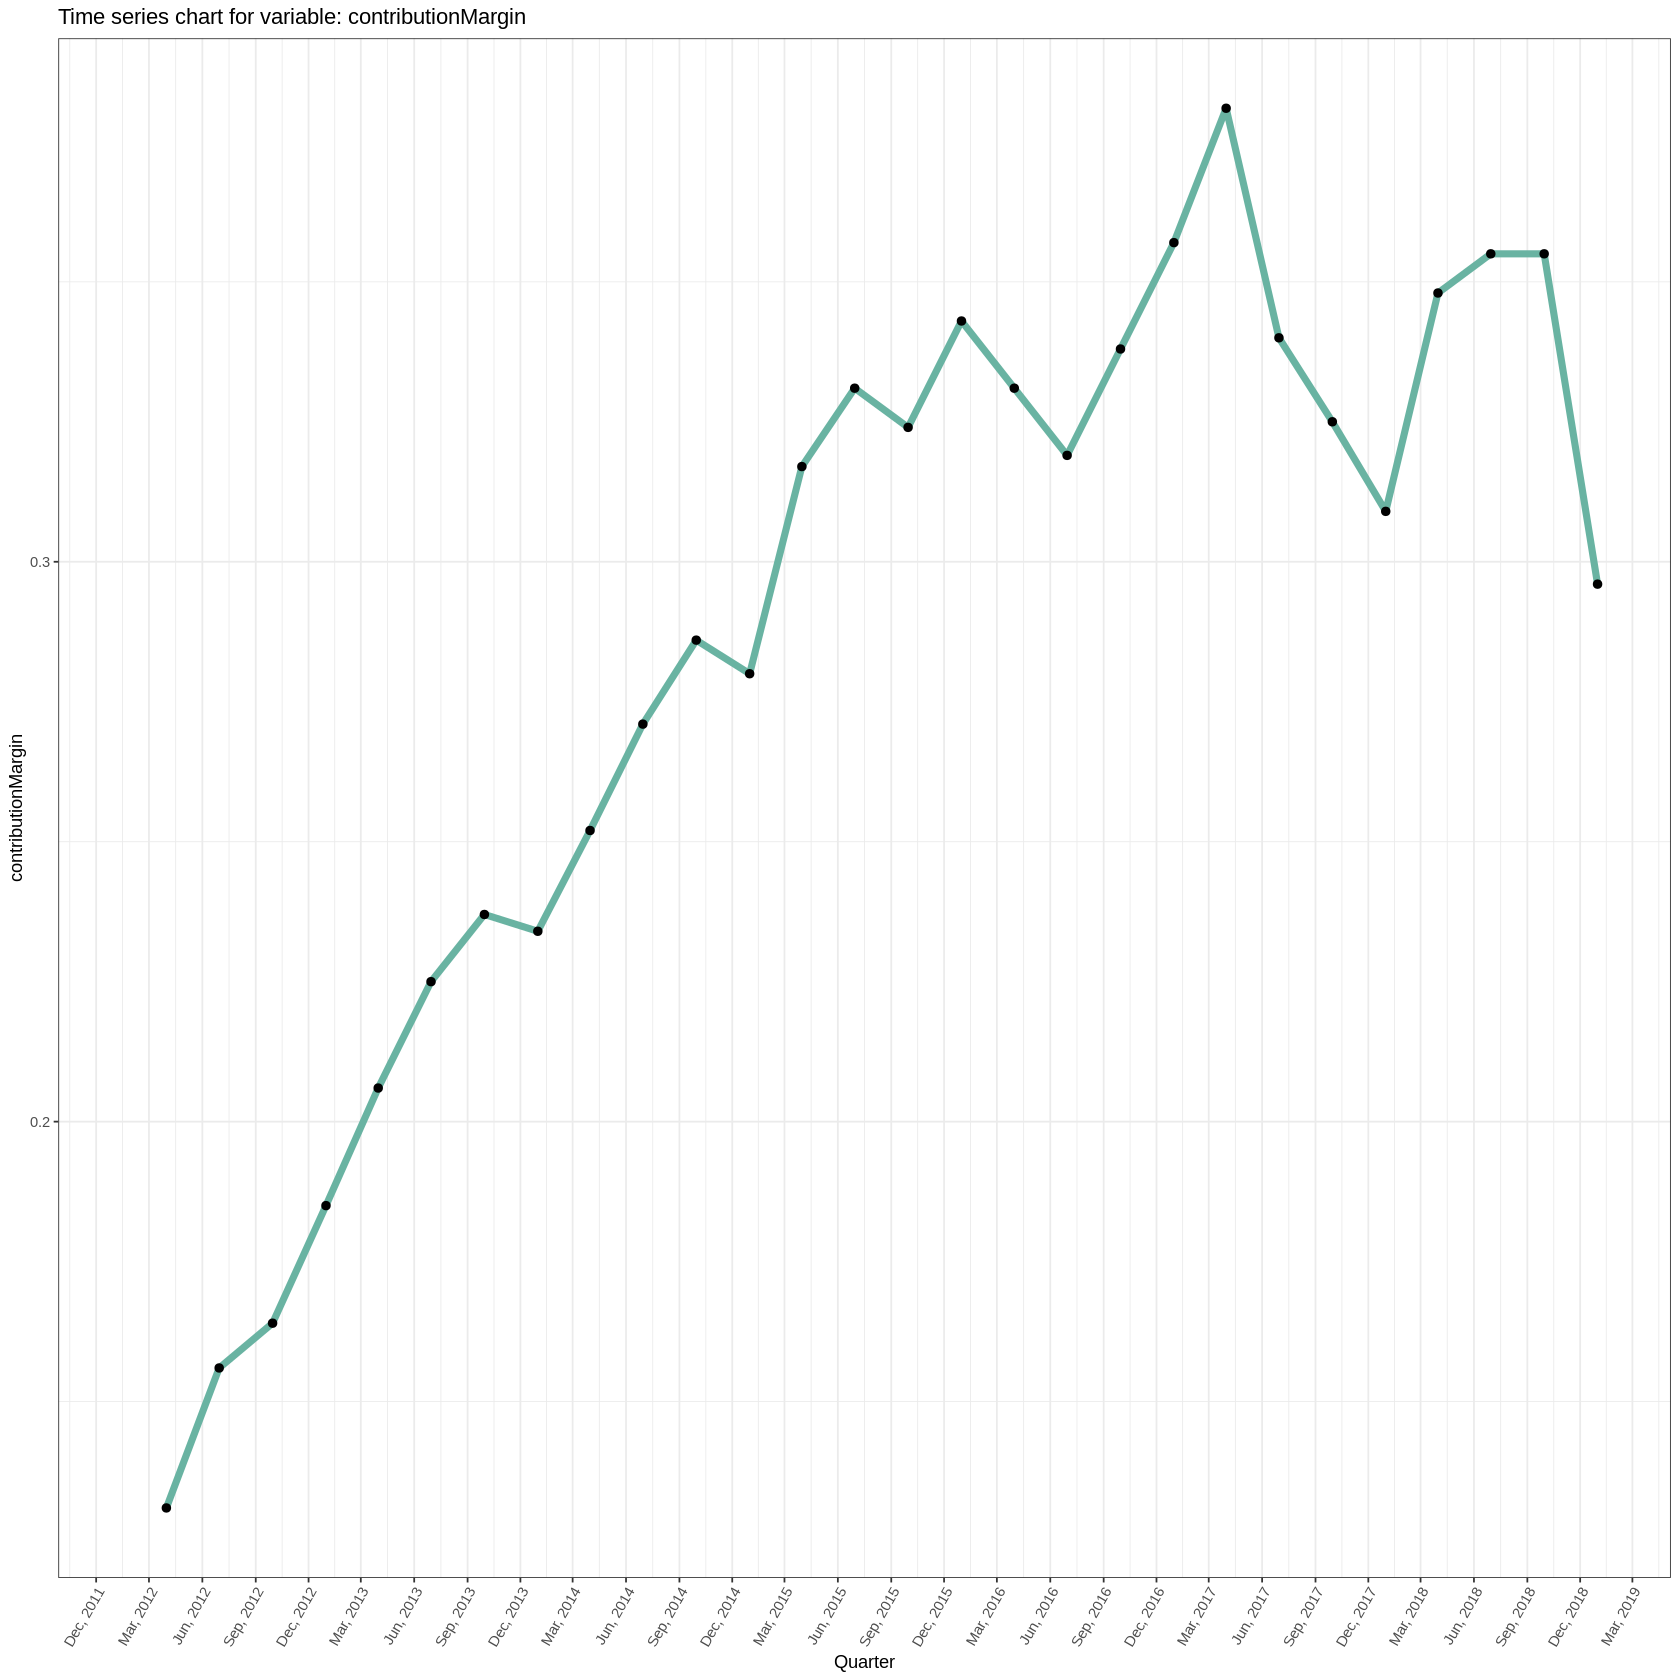

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'contributionMargin'

# Criando um gráfico de série temporal para a variável especificada.

timeSeriesPlot(col = col, data = data)

A série temporal demonstra, um **crescimento aproximadamente logístico**, da margem de contribuição entre os anos em análise.

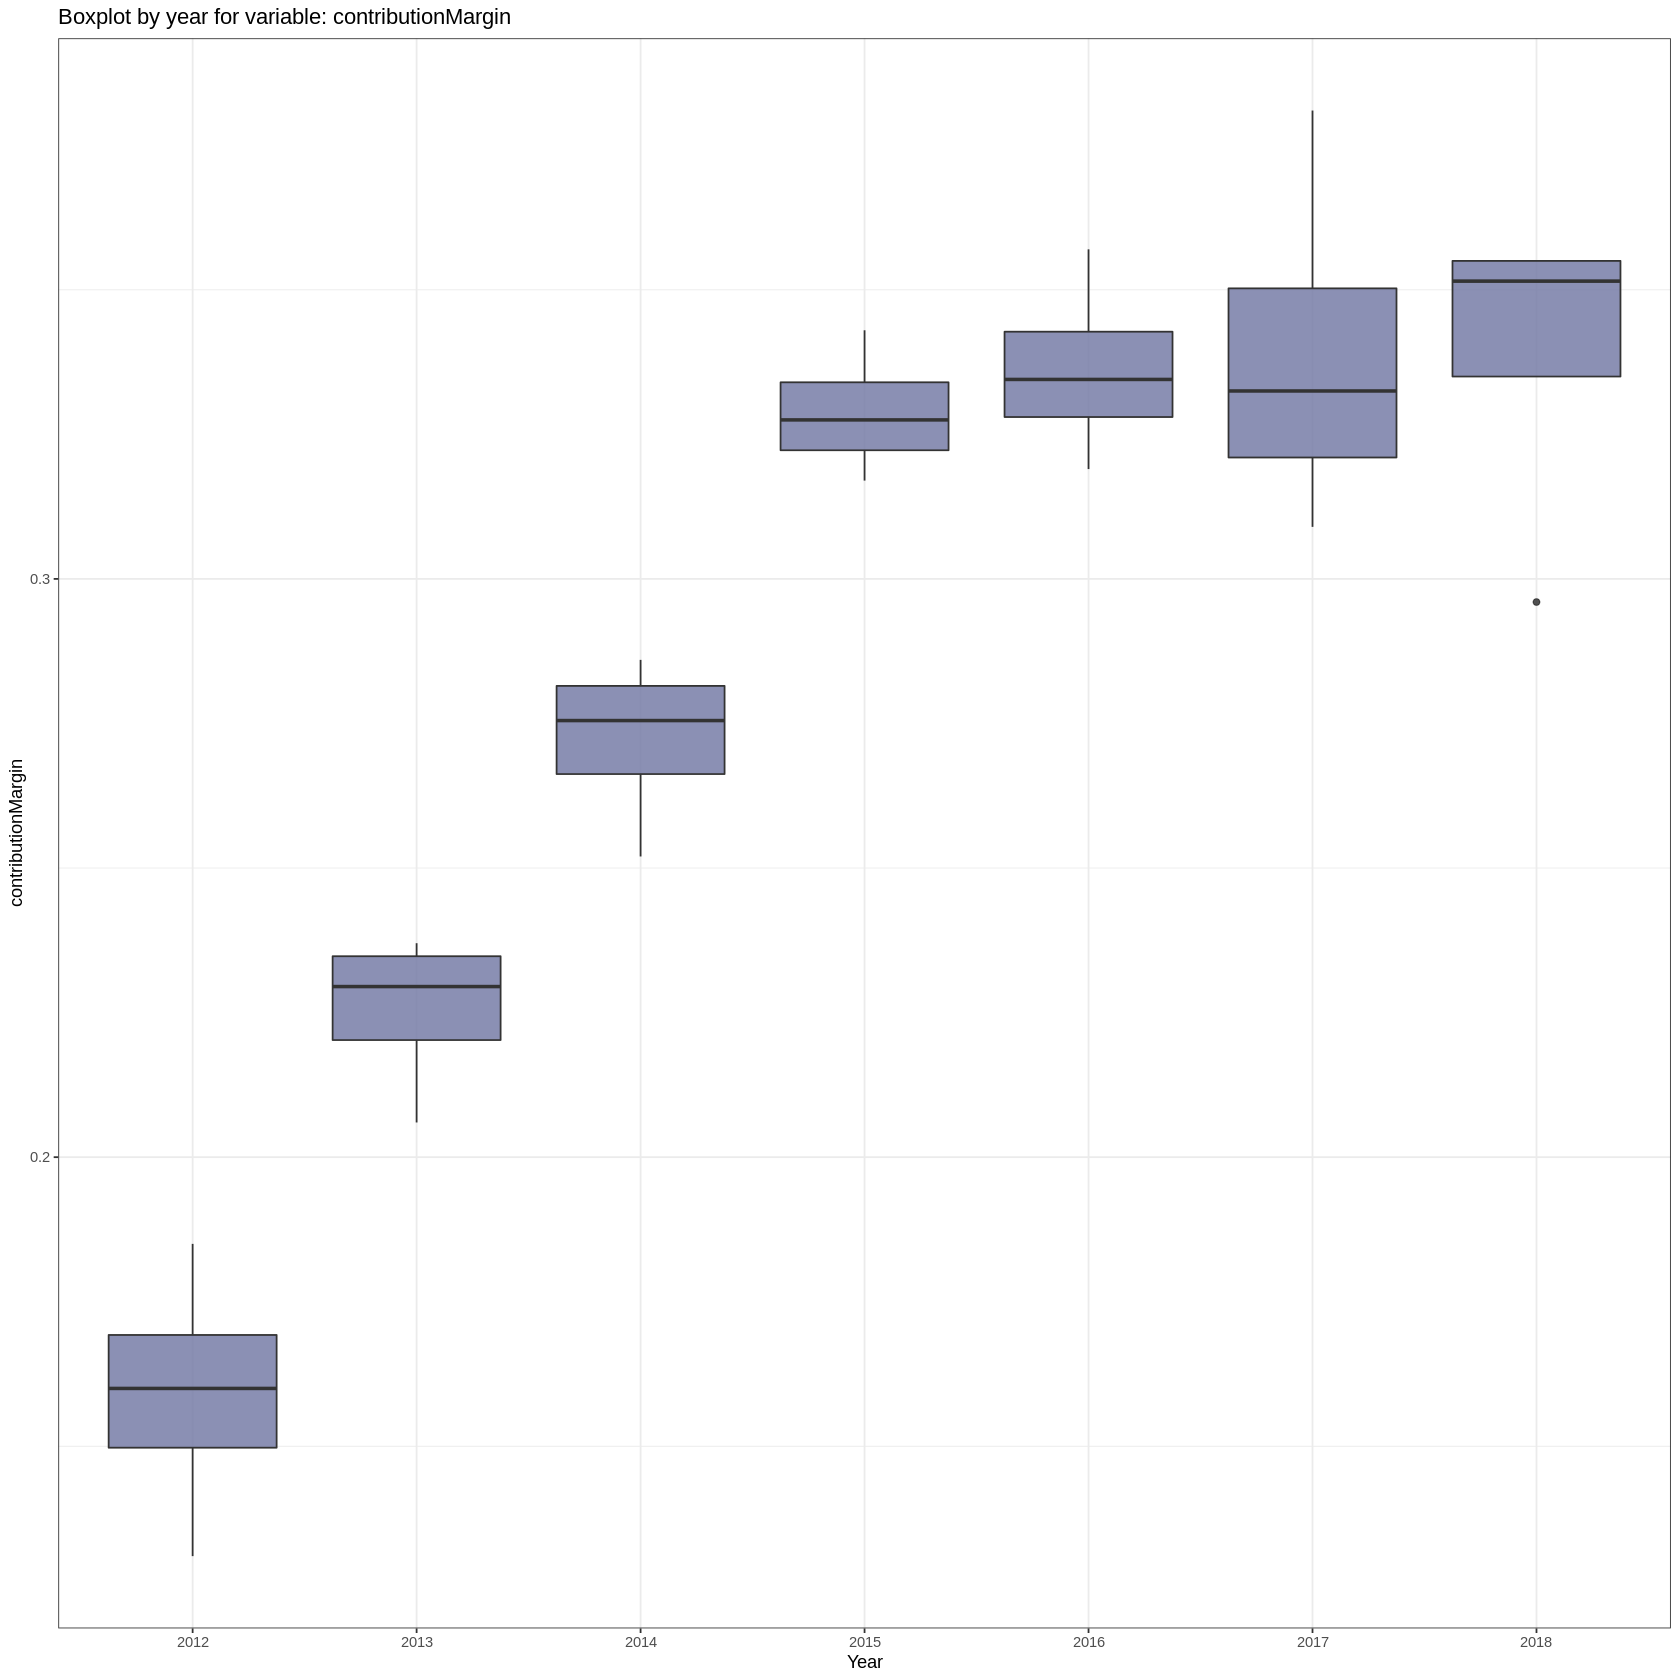

In [ ]:
# Criando um gráfico Boxplot, que agrupe a variável especificada, pelo ano ao qual seu registro está associada.

boxPlot(col = col, data = data, categ = 'year')

Como vimos anteriormente, a margem de contribuição aumenta logisticamente a cada ano.

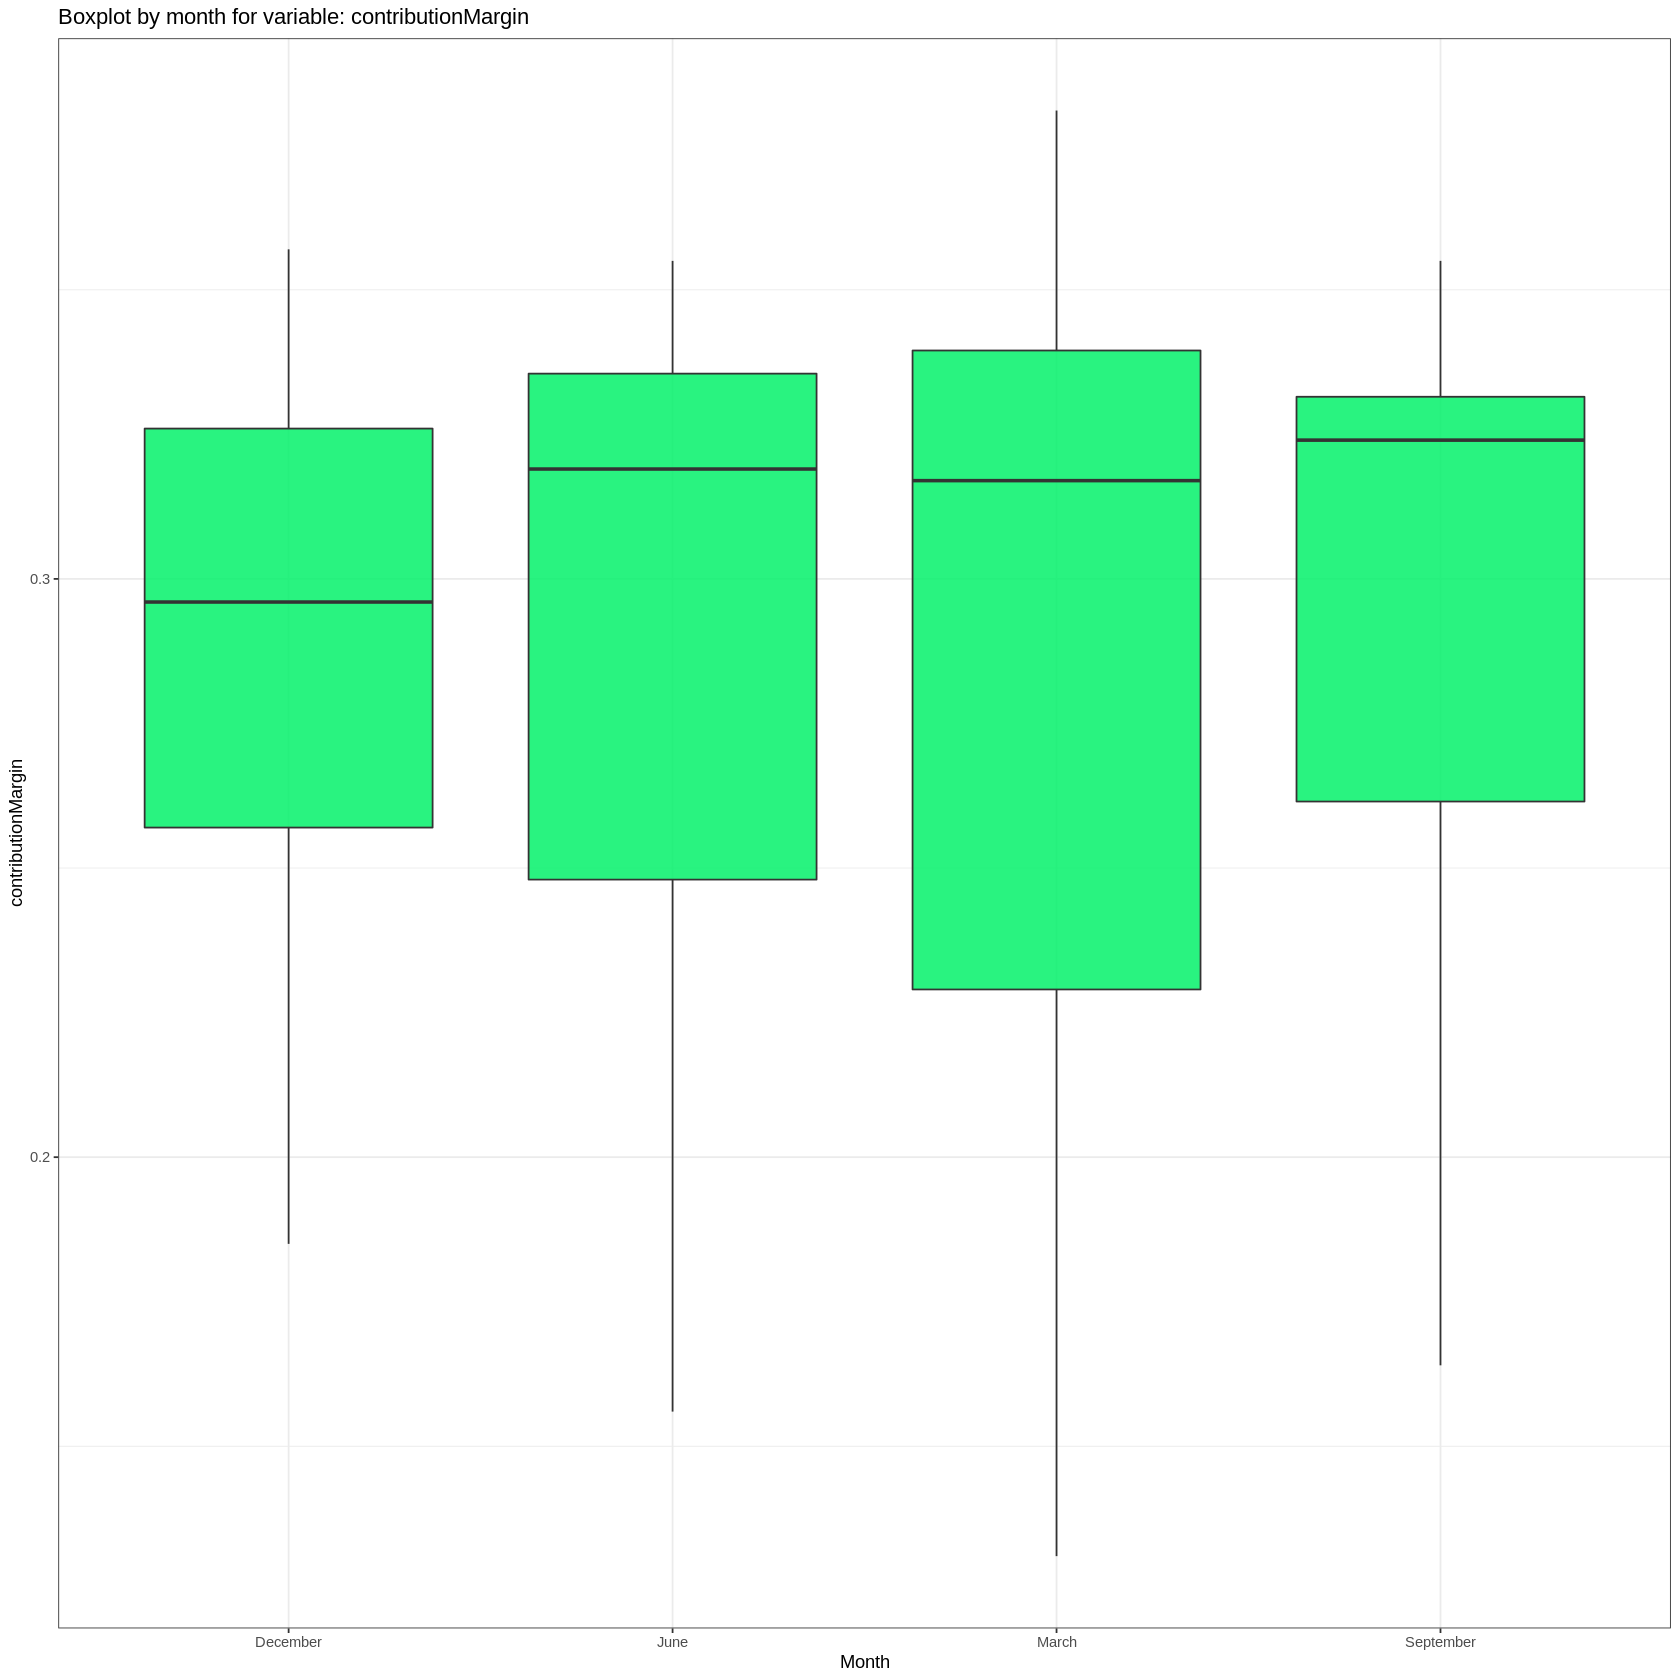

In [ ]:
# Criando um gráfico Boxplot, que agrupe a variável especificada, pelo trimestre ao qual seu registro está associada.

boxPlot(col = col, data = data, categ = 'month')

Parece não haver um diferença significativa, para a margem de contribuição, entre os trimestres dos anos.

#### **5.4.9 Variável costPerCustomer**

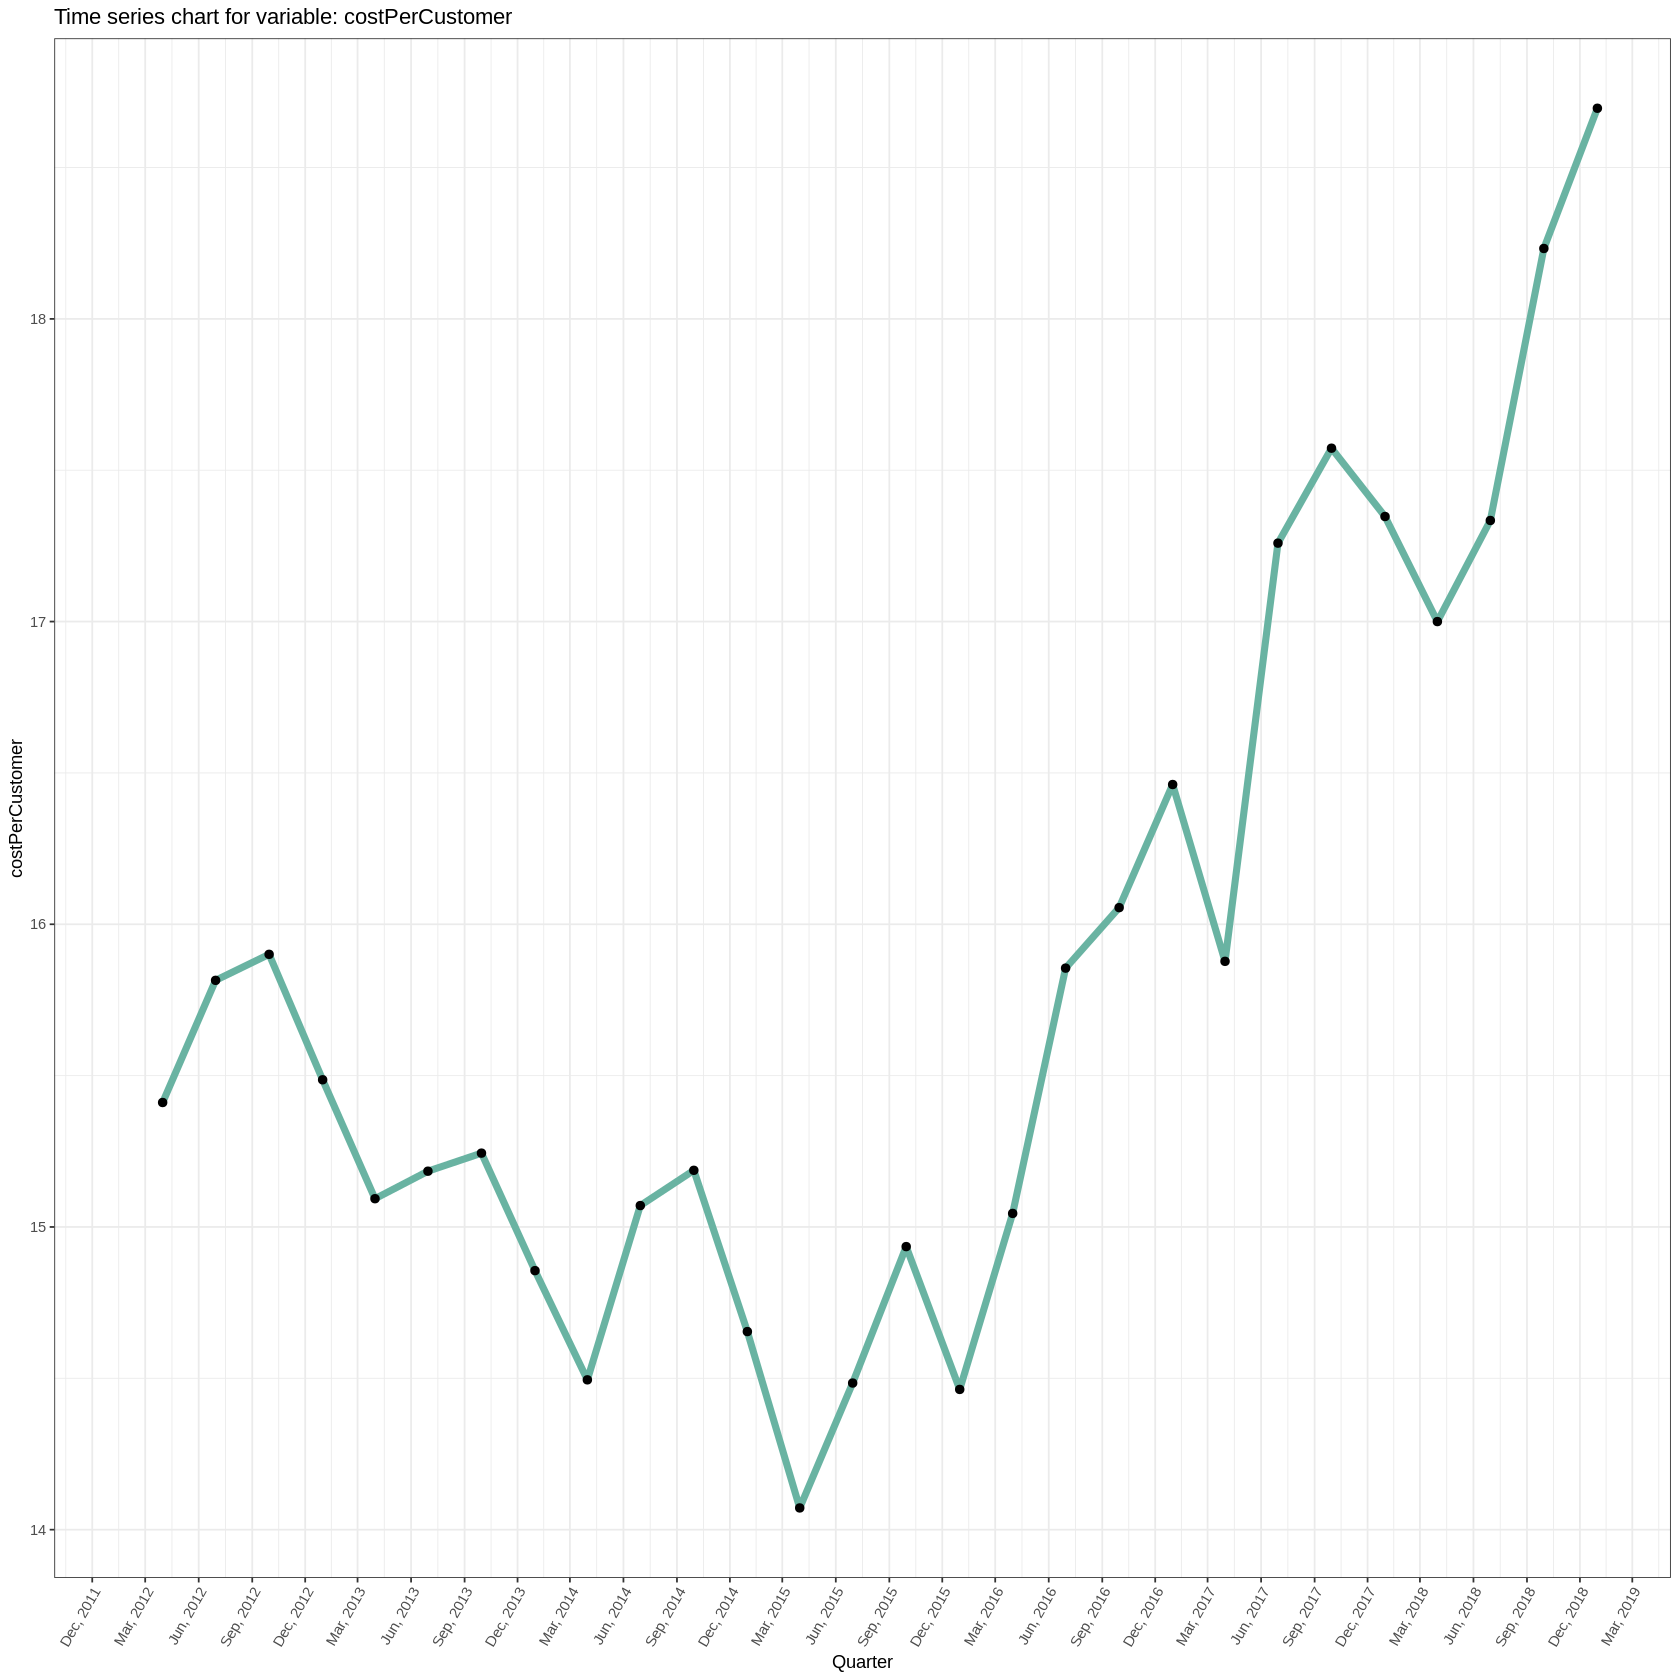

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'costPerCustomer'

# Criando um gráfico de série temporal para a variável especificada.

timeSeriesPlot(col = col, data = data)

A série temporal demonstra, um **crescimento aproximadamente exponencial**, do custo por cliente entre os anos em análise.


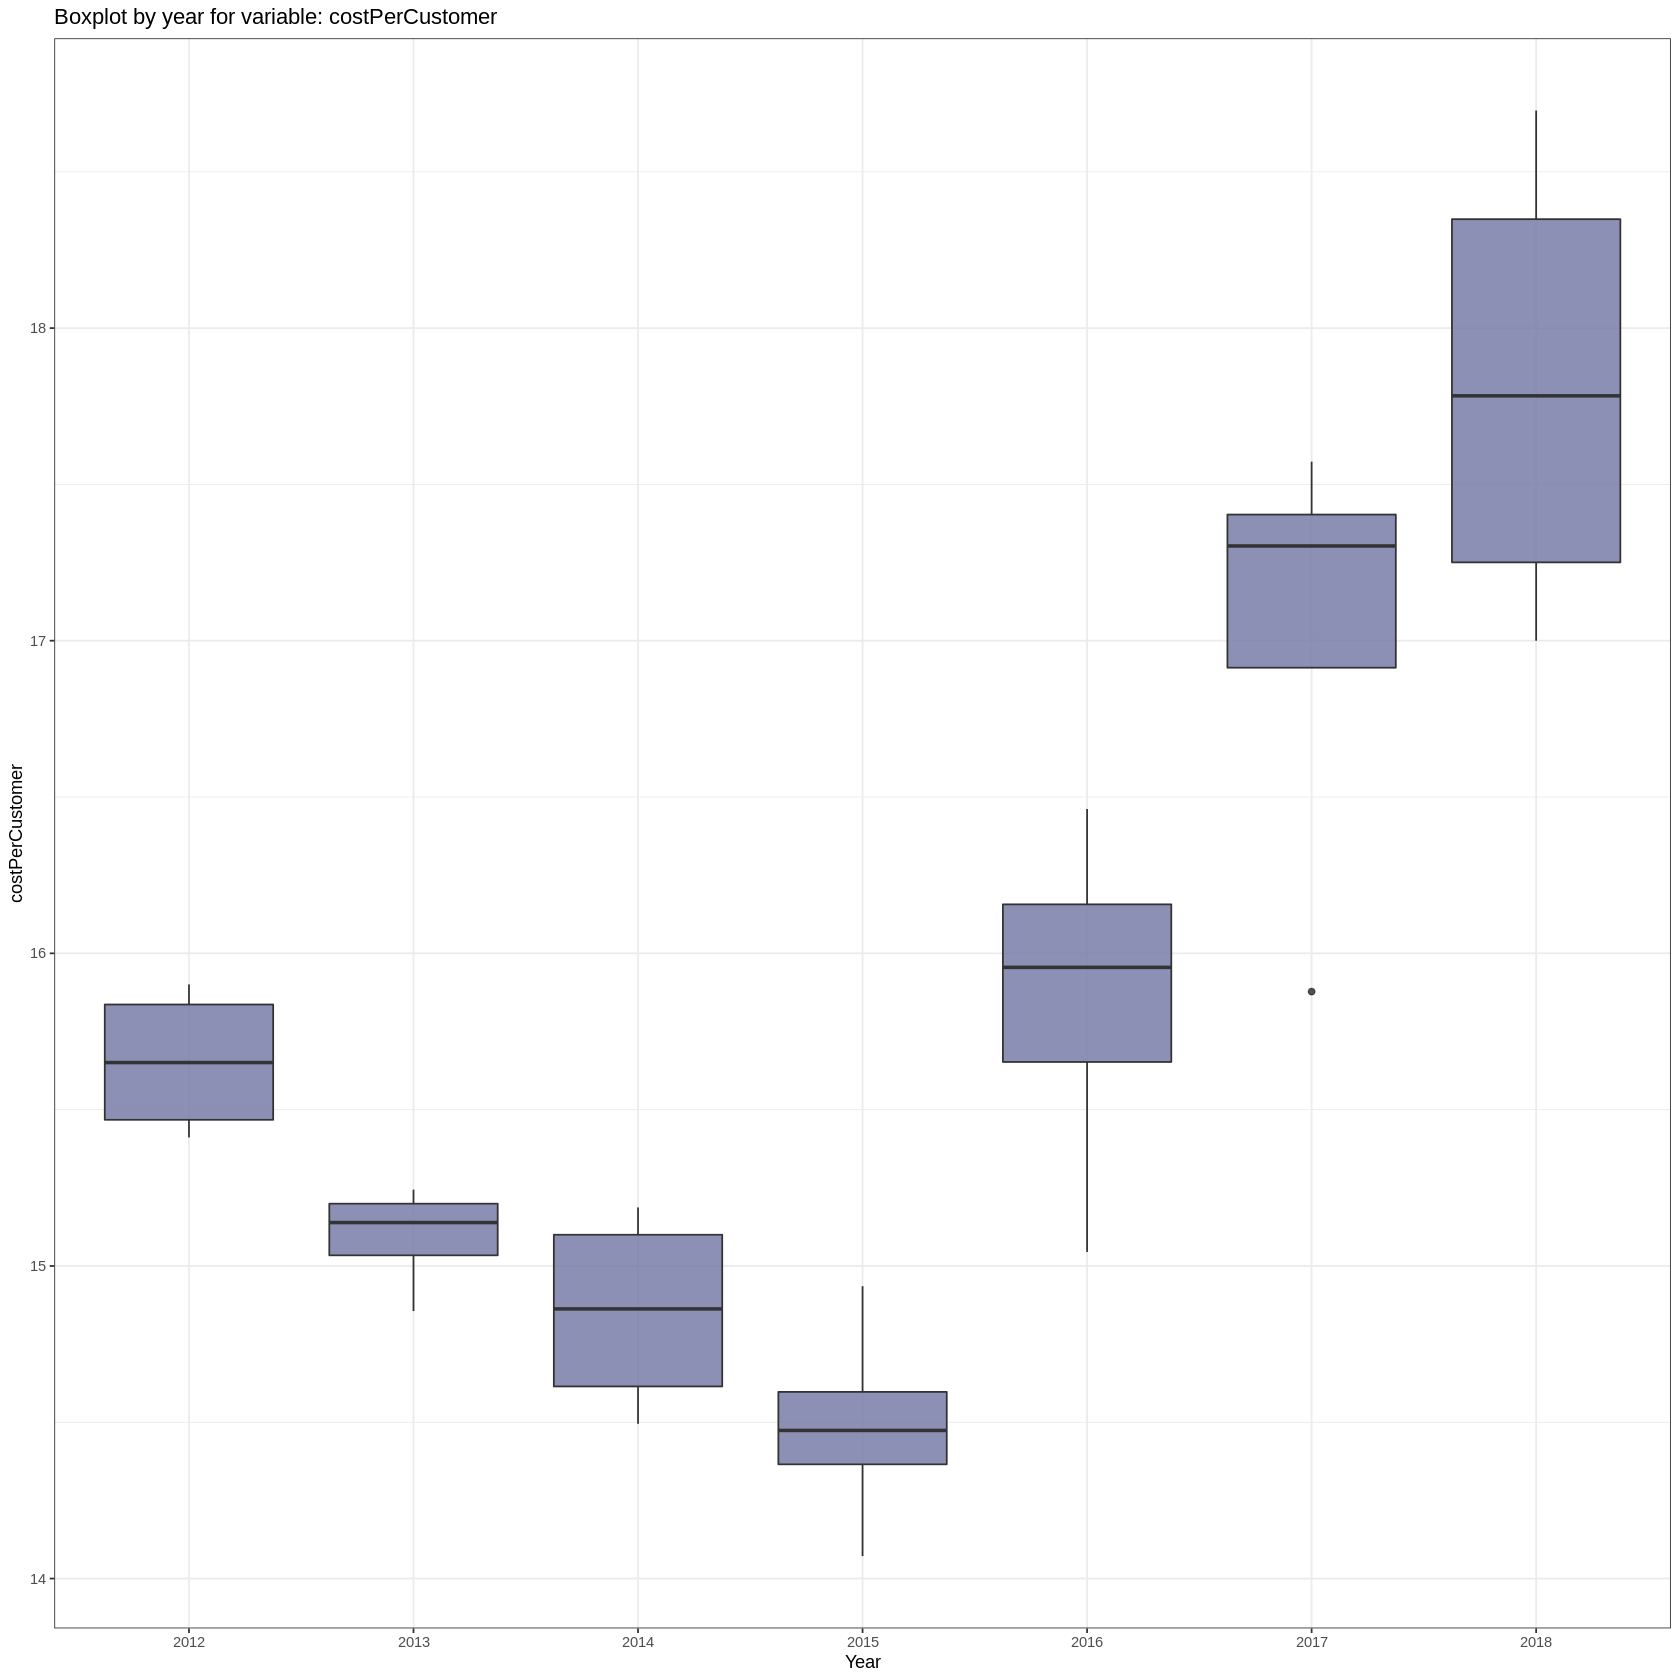

In [ ]:
# Criando um gráfico Boxplot, que agrupe a variável especificada, pelo ano ao qual seu registro está associada.

boxPlot(col = col, data = data, categ = 'year')

Como vimos anteriormente, o custo por cliente aumenta exponencialmente a cada ano.

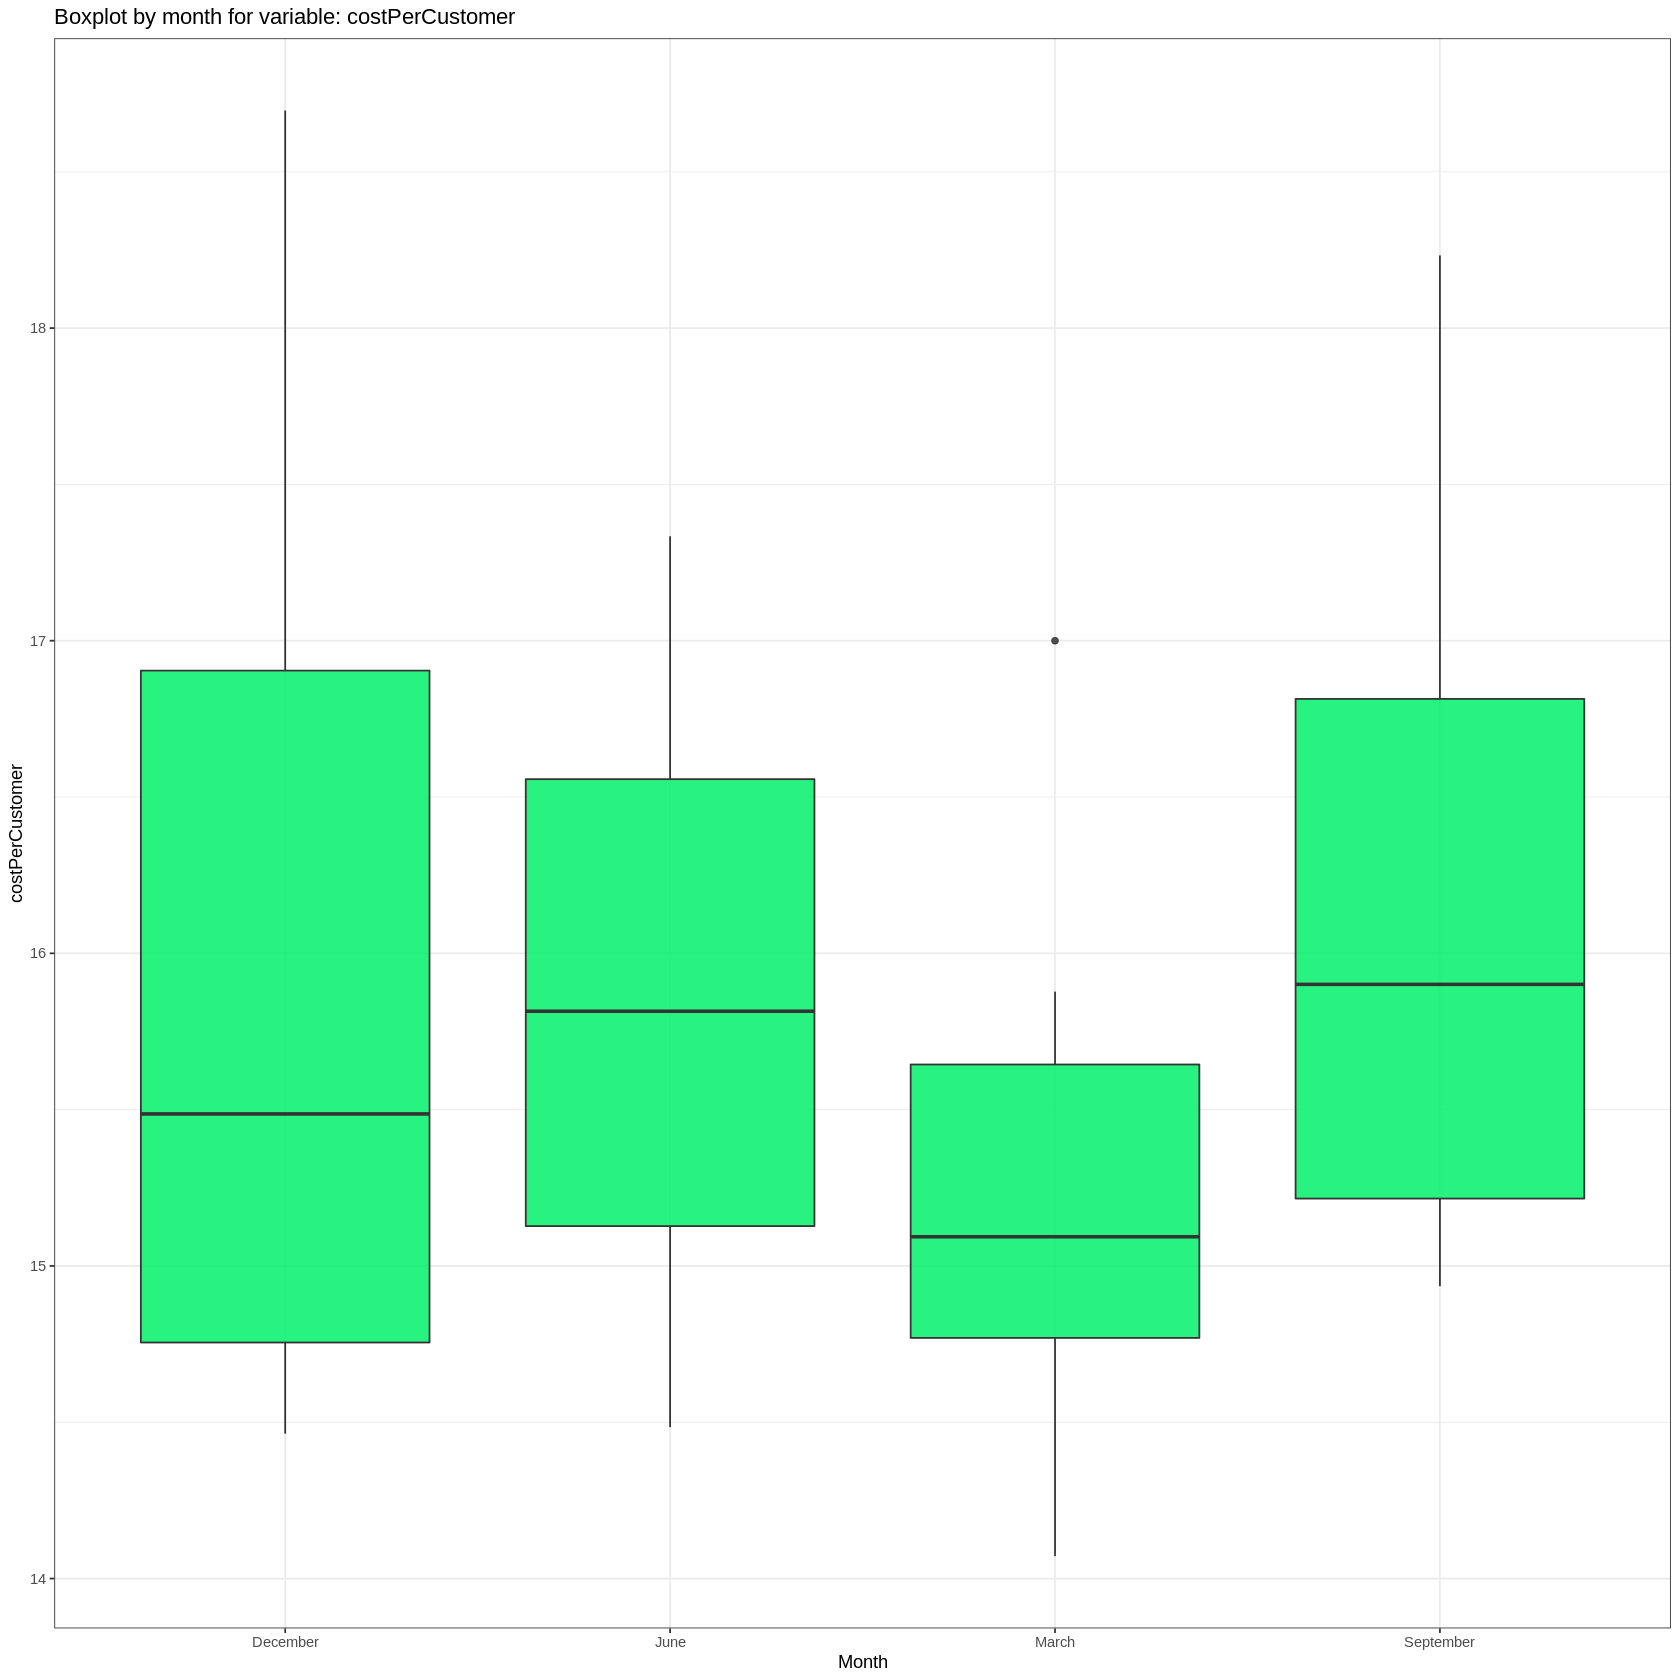

In [ ]:
# Criando um gráfico Boxplot, que agrupe a variável especificada, pelo trimestre ao qual seu registro está associada.

boxPlot(col = col, data = data, categ = 'month')

Parece haver uma diferença significativa, para o custo por cliente, entre os trimestres dos anos. O **primeiro trimestre**, apresenta um valor mediano menor do que os demais.


#### **5.4.10 Variável revenuePerCustomer**

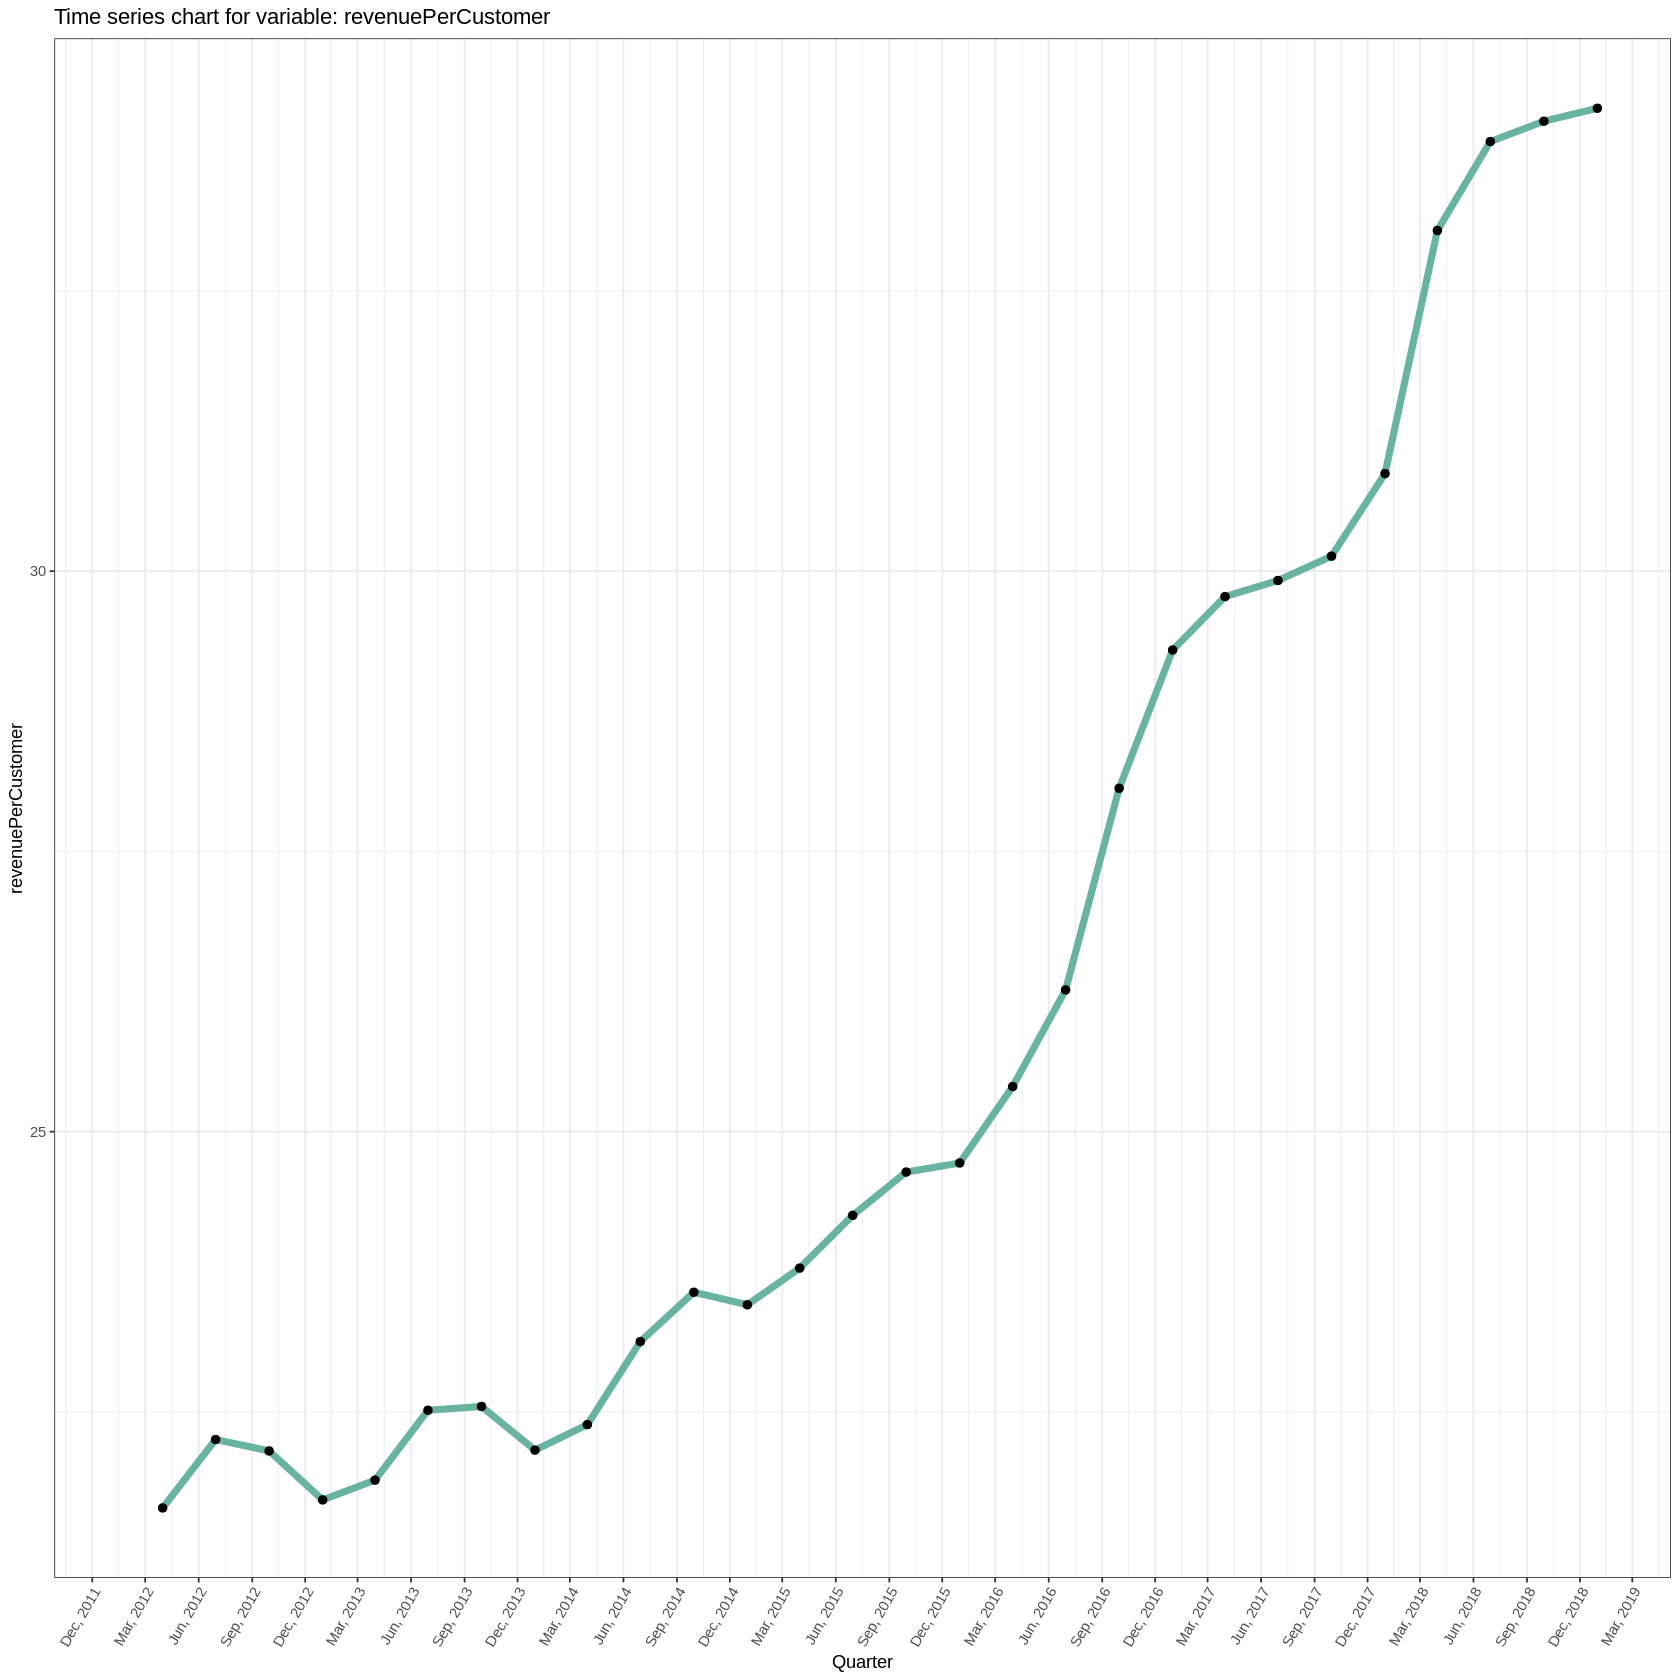

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'revenuePerCustomer'

# Criando um gráfico de série temporal para a variável especificada.

timeSeriesPlot(col = col, data = data)

A série temporal demonstra, um **crescimento aproximadamente exponencial**, da taxa de receita por cliente entre os anos em análise.


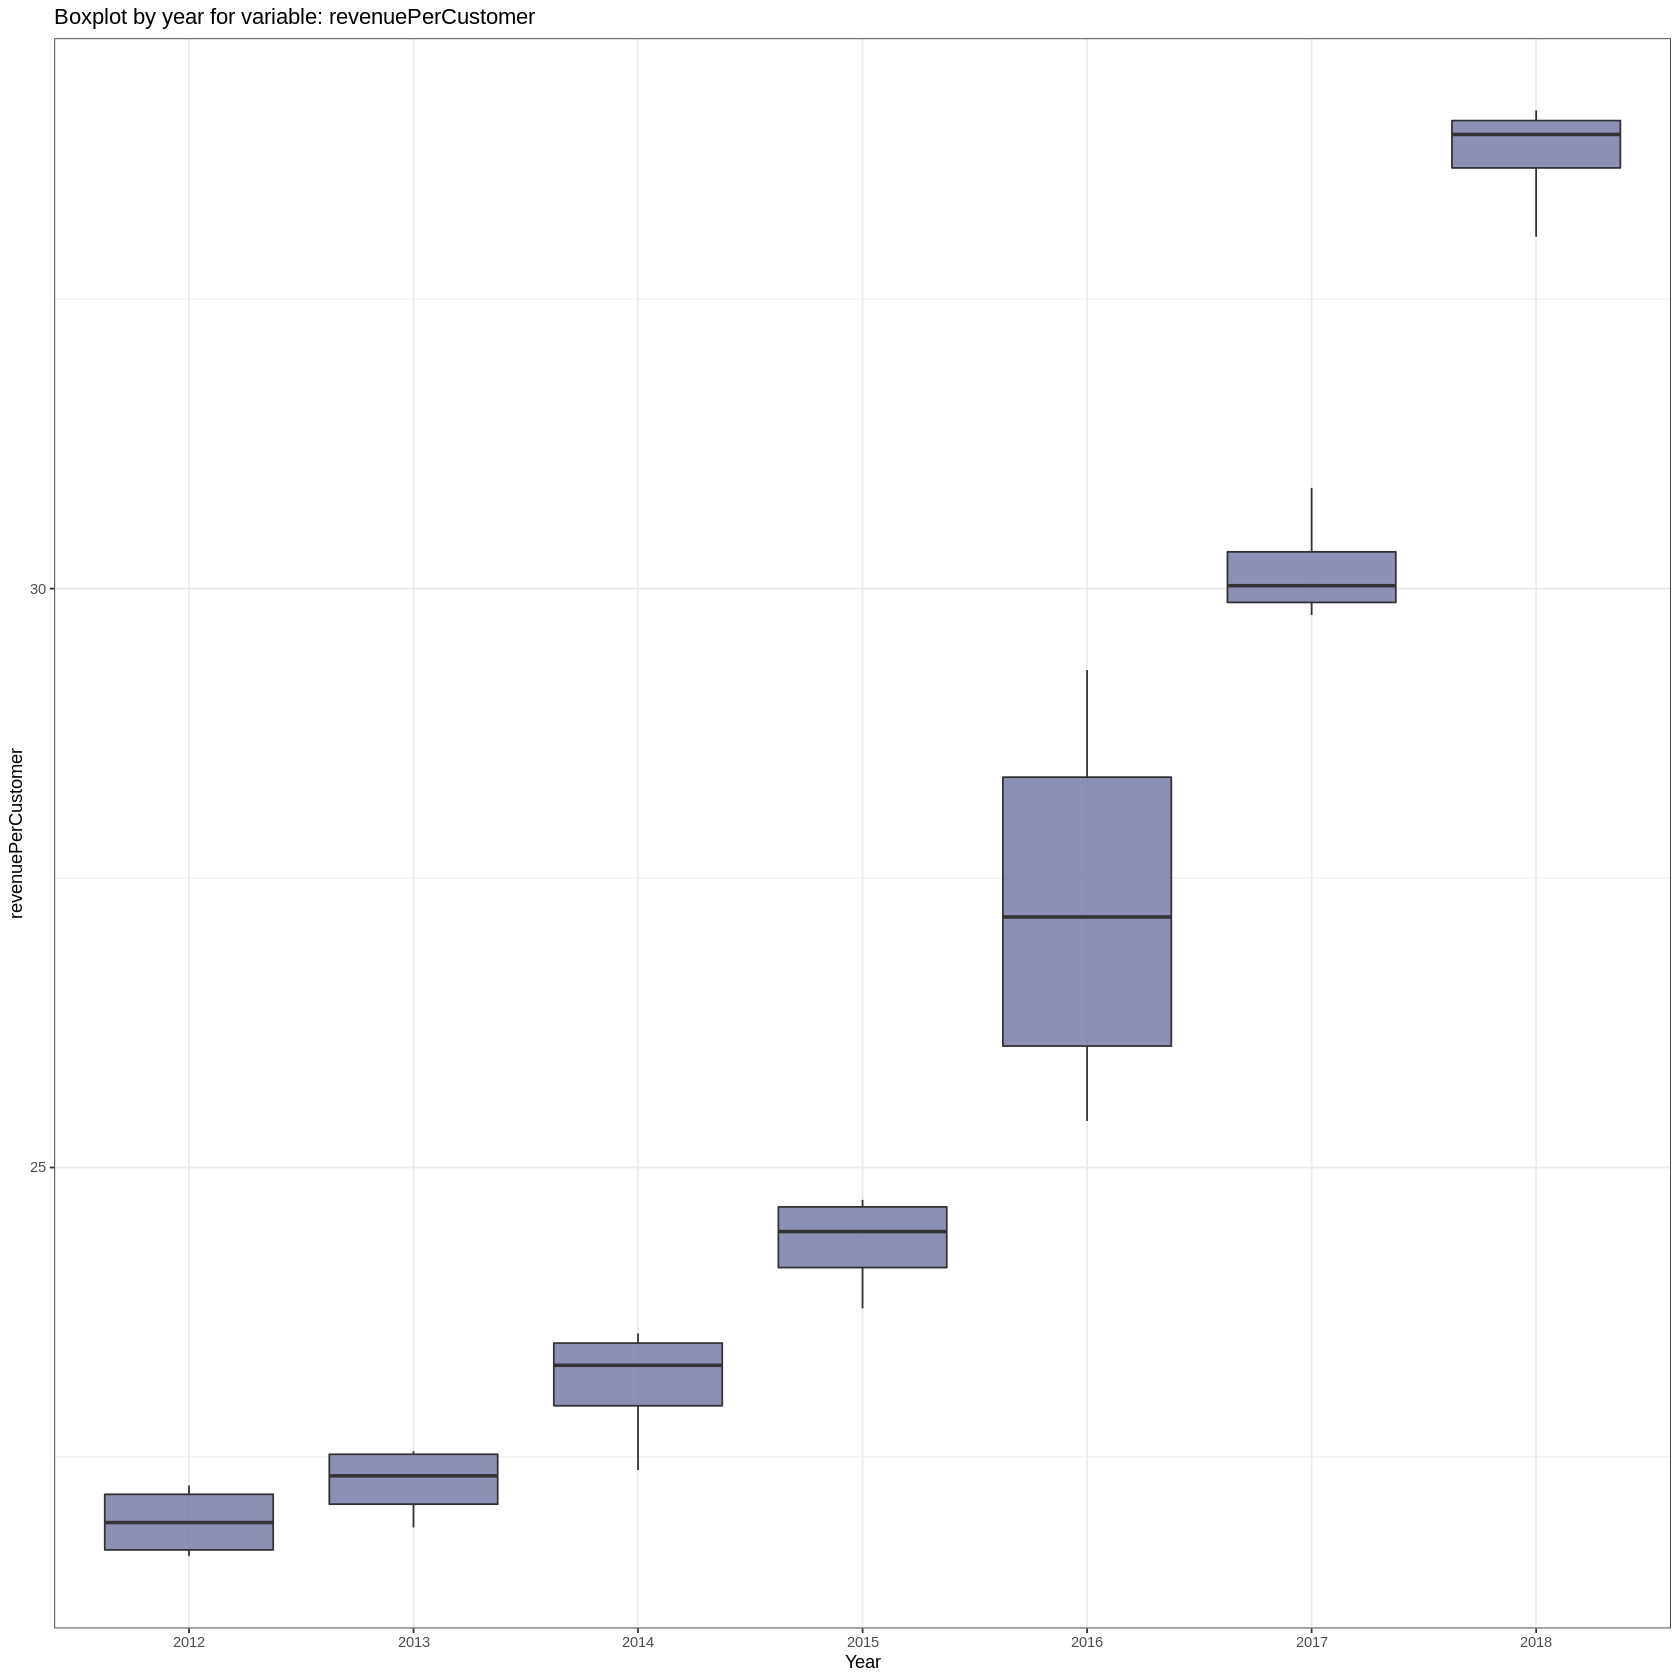

In [ ]:
# Criando um gráfico Boxplot, que agrupe a variável especificada, pelo ano ao qual seu registro está associada.

boxPlot(col = col, data = data, categ = 'year')

Como vimos anteriormente, a taxa de receita por cliente aumenta exponencialmente a cada ano.

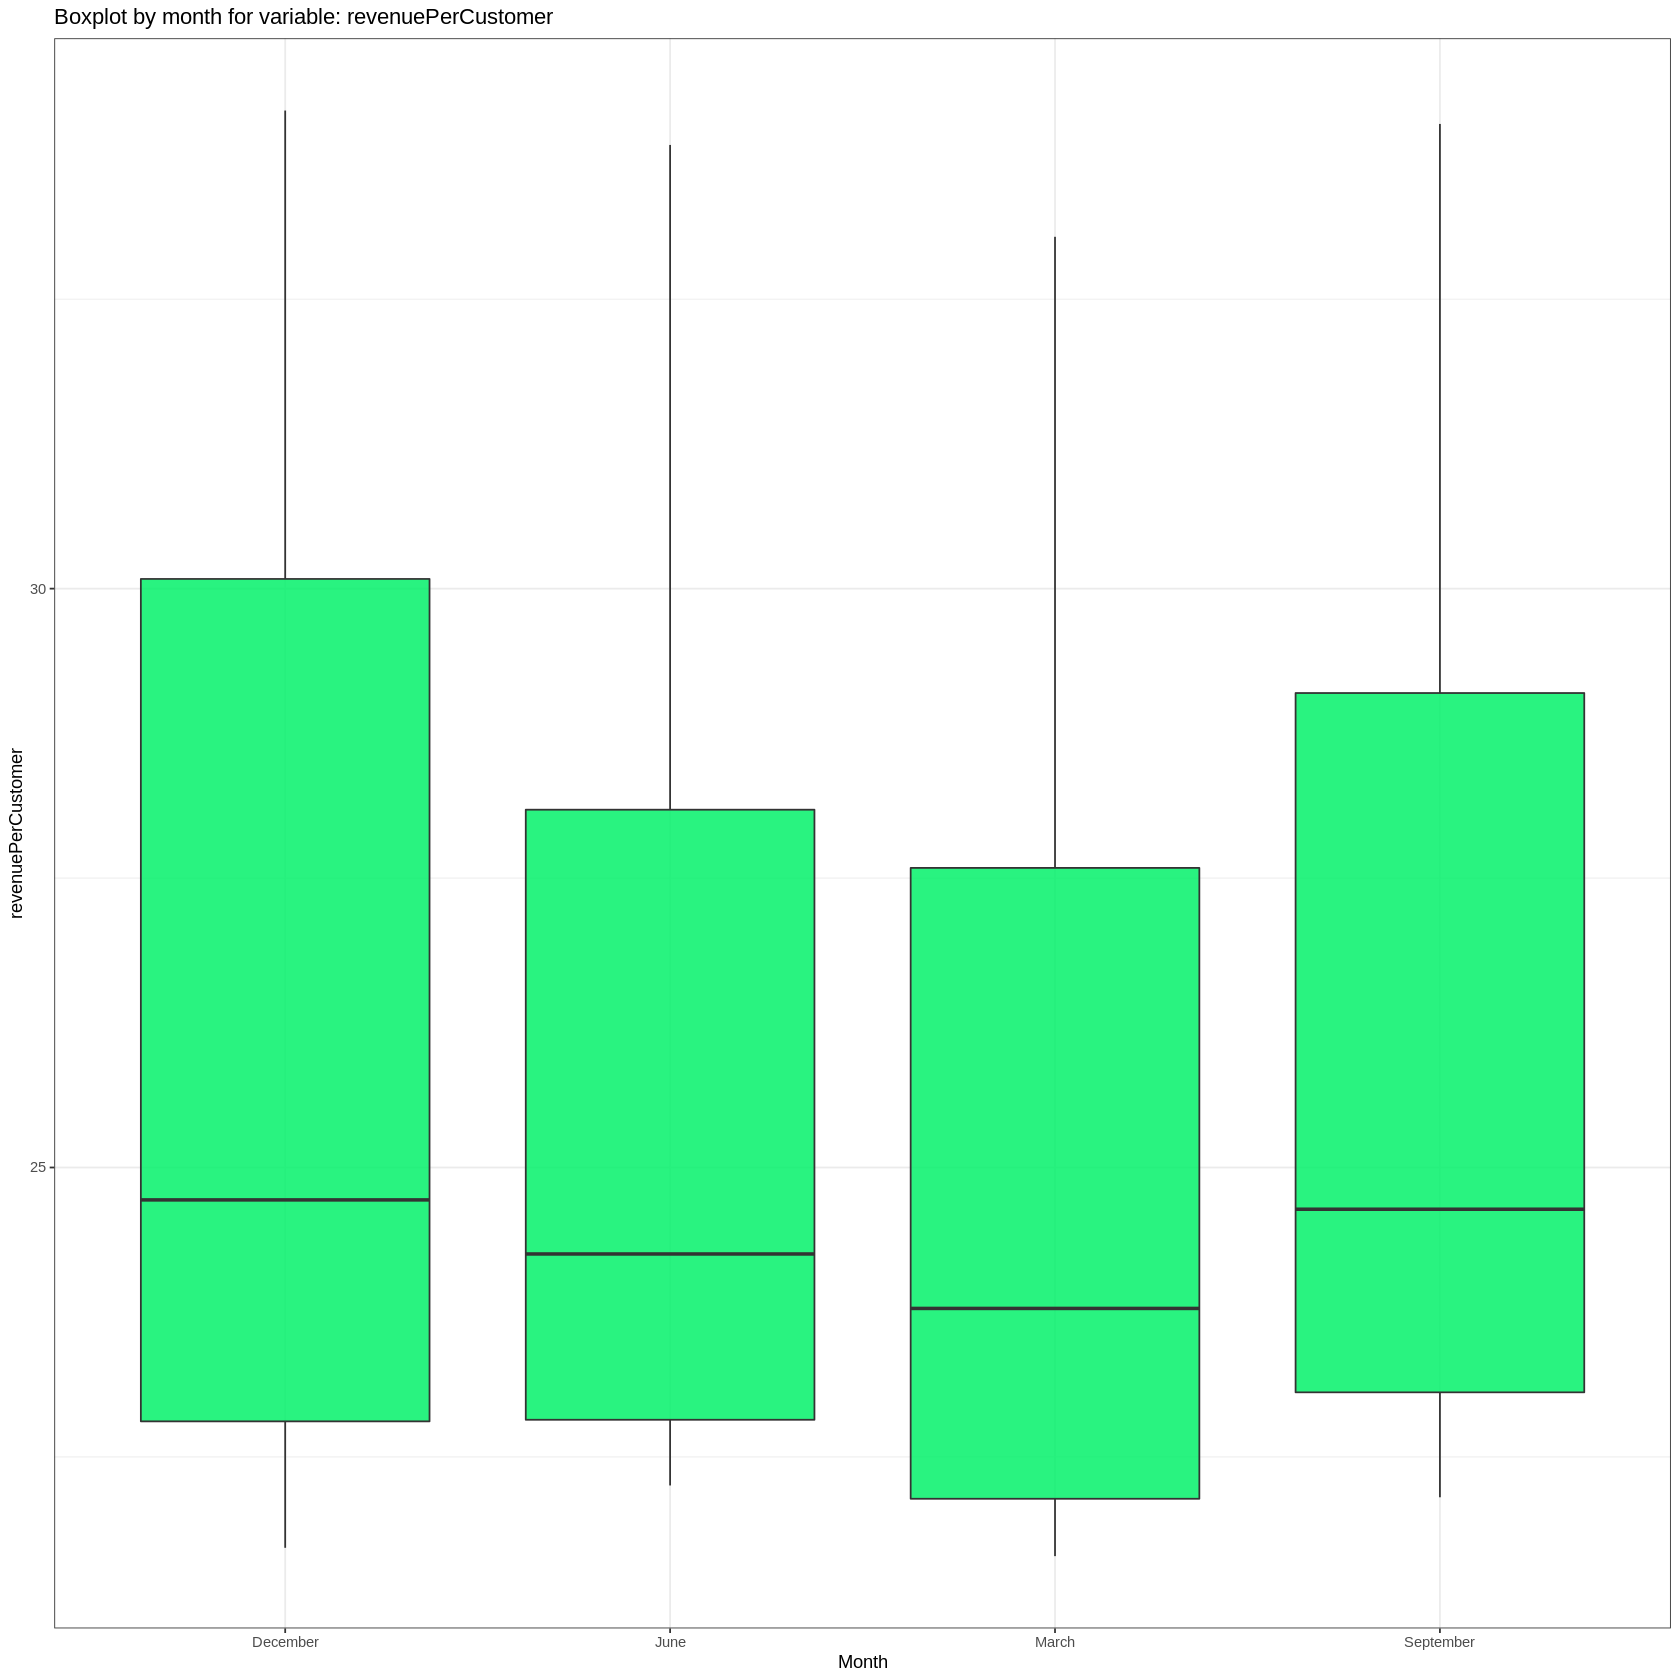

In [ ]:
# Criando um gráfico Boxplot, que agrupe a variável especificada, pelo trimestre ao qual seu registro está associada.

boxPlot(col = col, data = data, categ = 'month')

Parece não haver um diferença significativa, para a taxa de receita por cliente, entre os trimestres dos anos.

#### **5.4.11 Variável earningsPerCustomer**

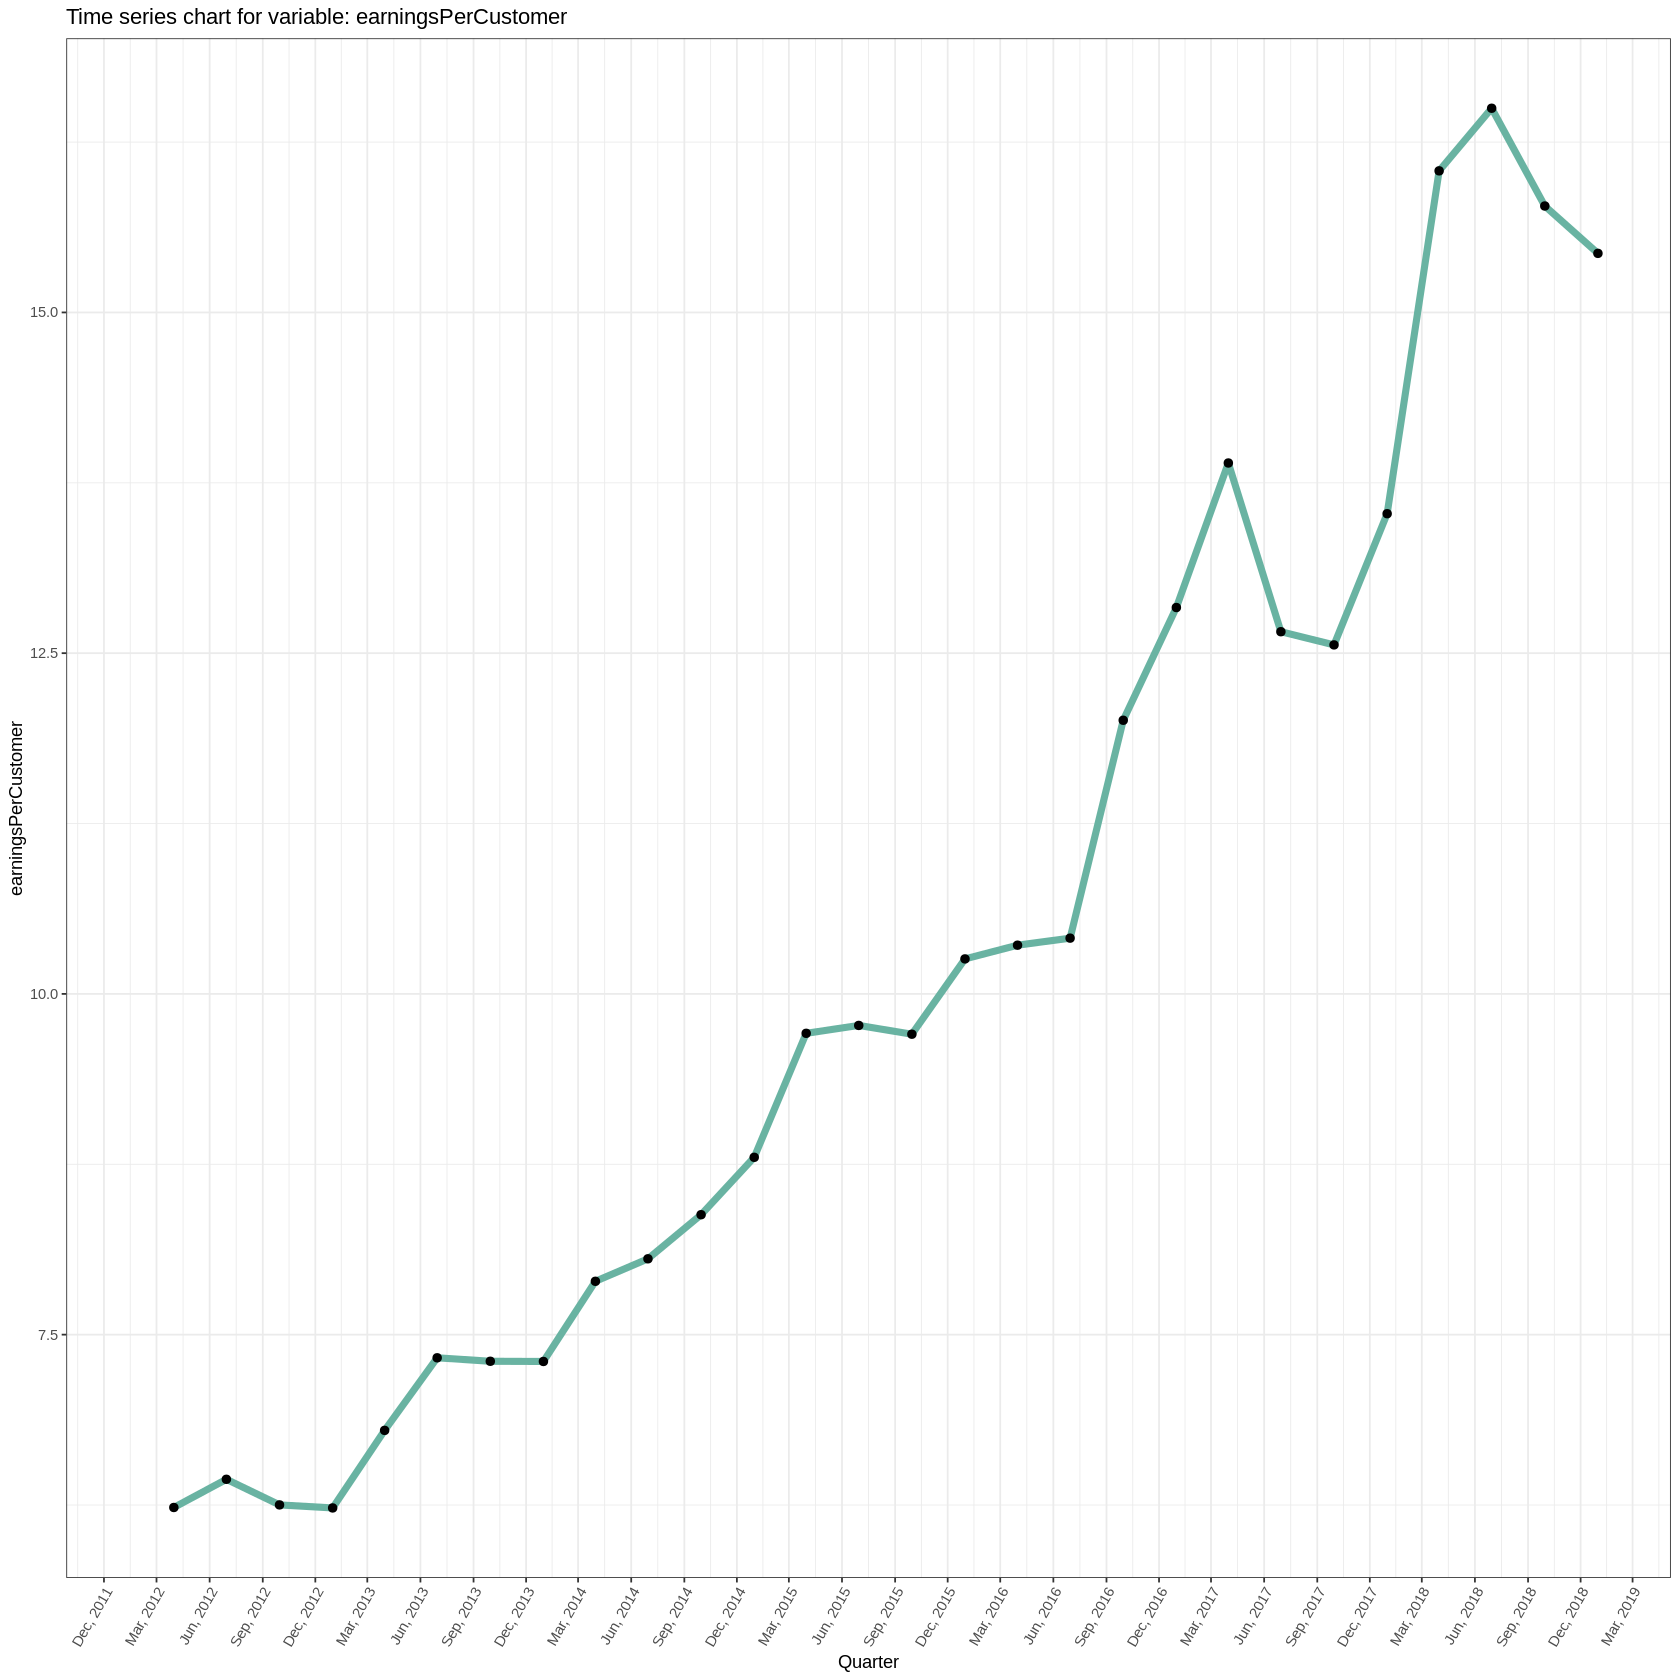

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'earningsPerCustomer'

# Criando um gráfico de série temporal para a variável especificada.

timeSeriesPlot(col = col, data = data)

A série temporal demonstra, um **crescimento aproximadamente linear**, da taxa de lucro por cliente entre os anos em análise.

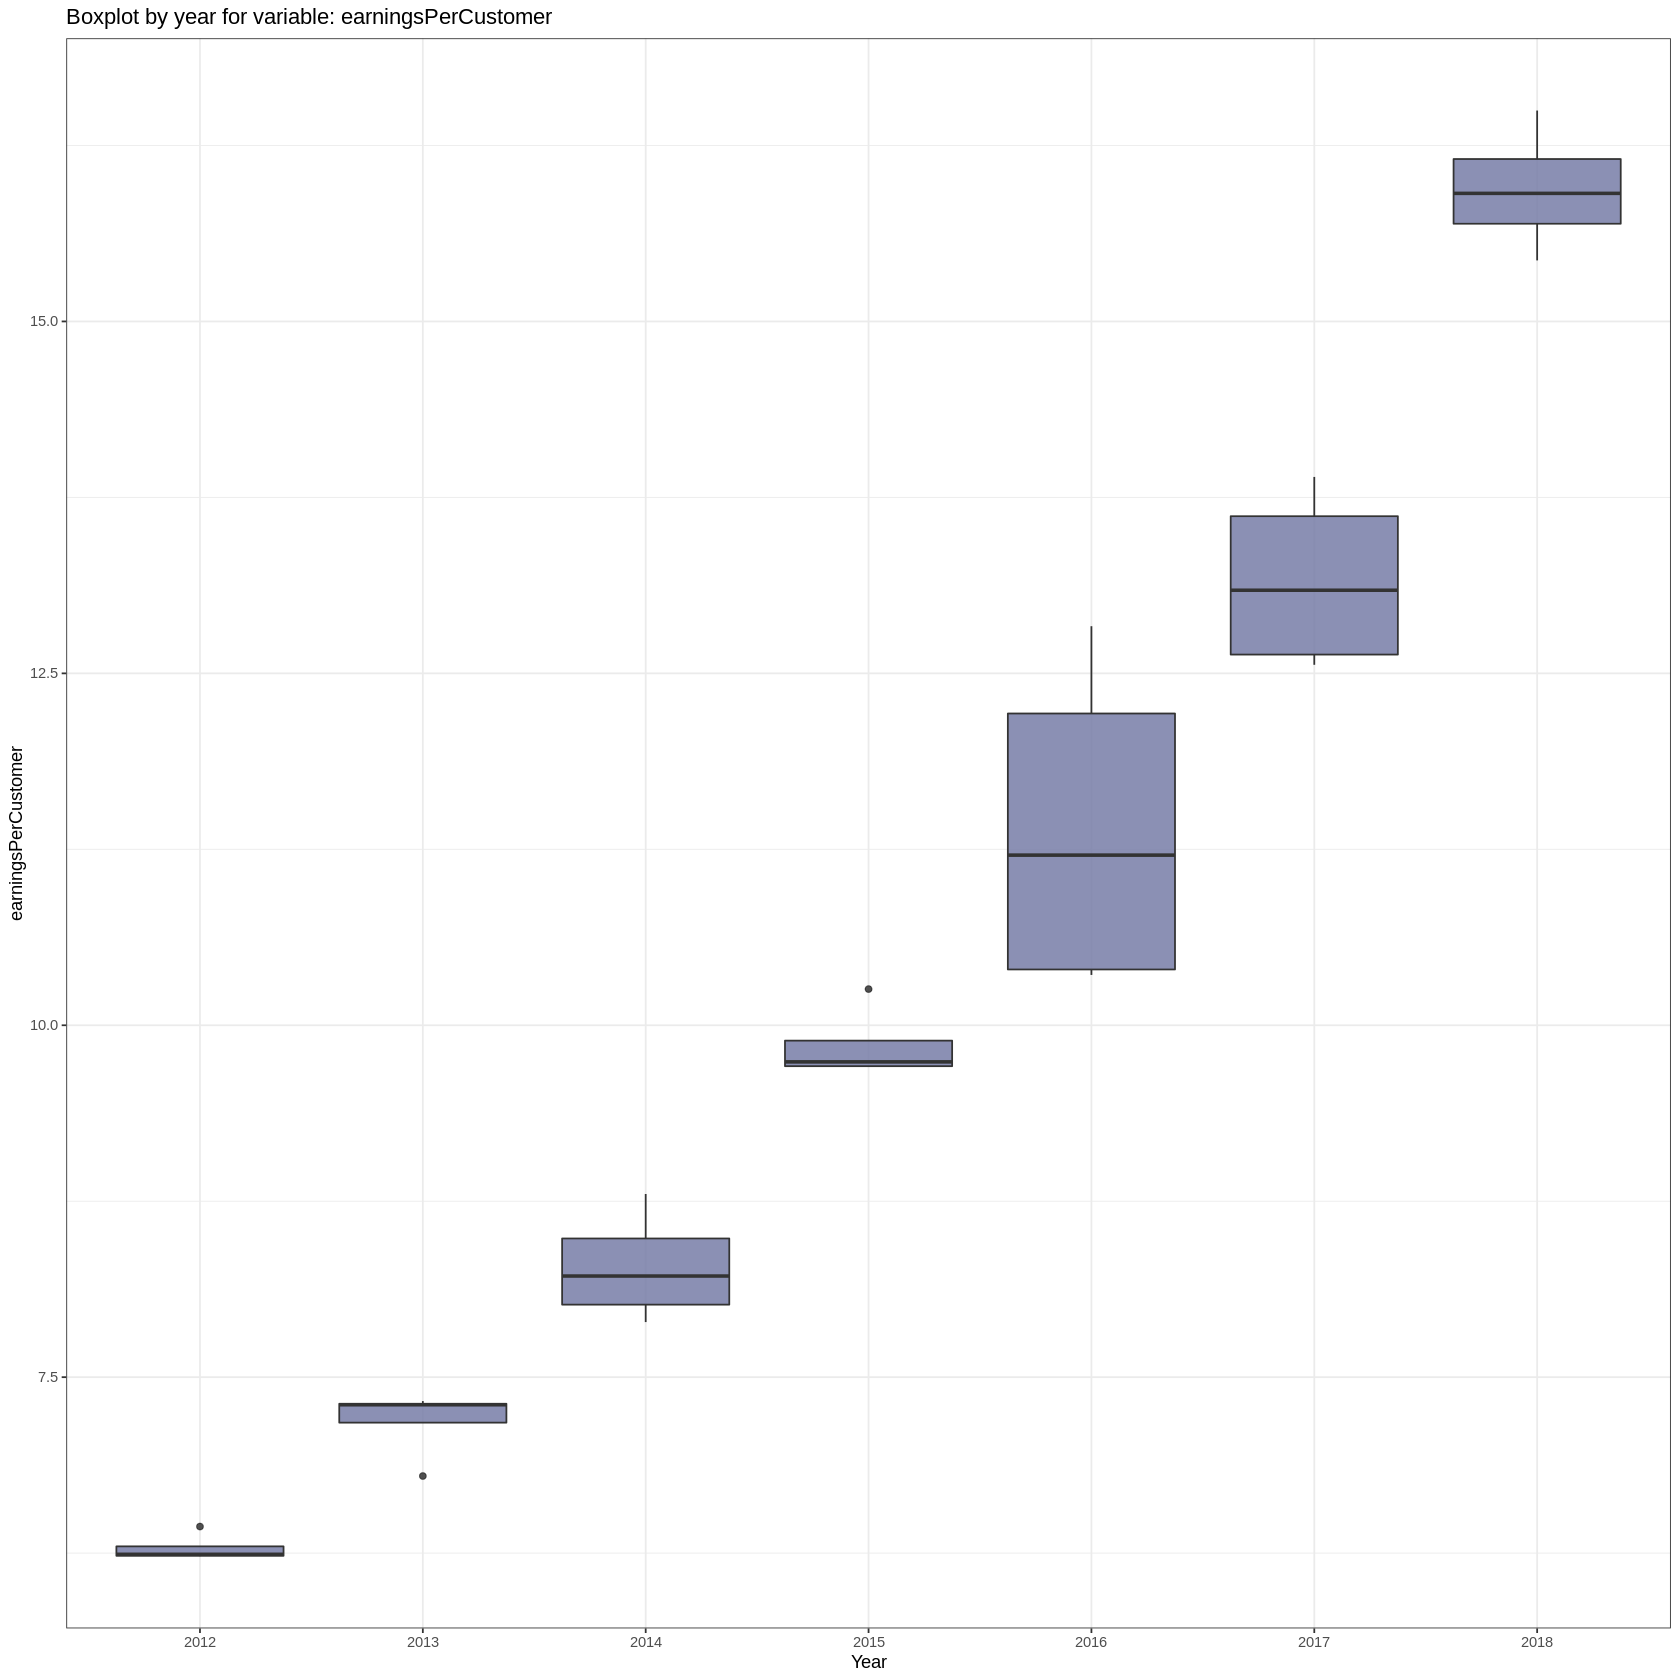

In [ ]:
# Criando um gráfico Boxplot, que agrupe a variável especificada, pelo ano ao qual seu registro está associada.

boxPlot(col = col, data = data, categ = 'year')

Como vimos anteriormente, a taxa de lucro por cliente aumenta linearmente a cada ano.

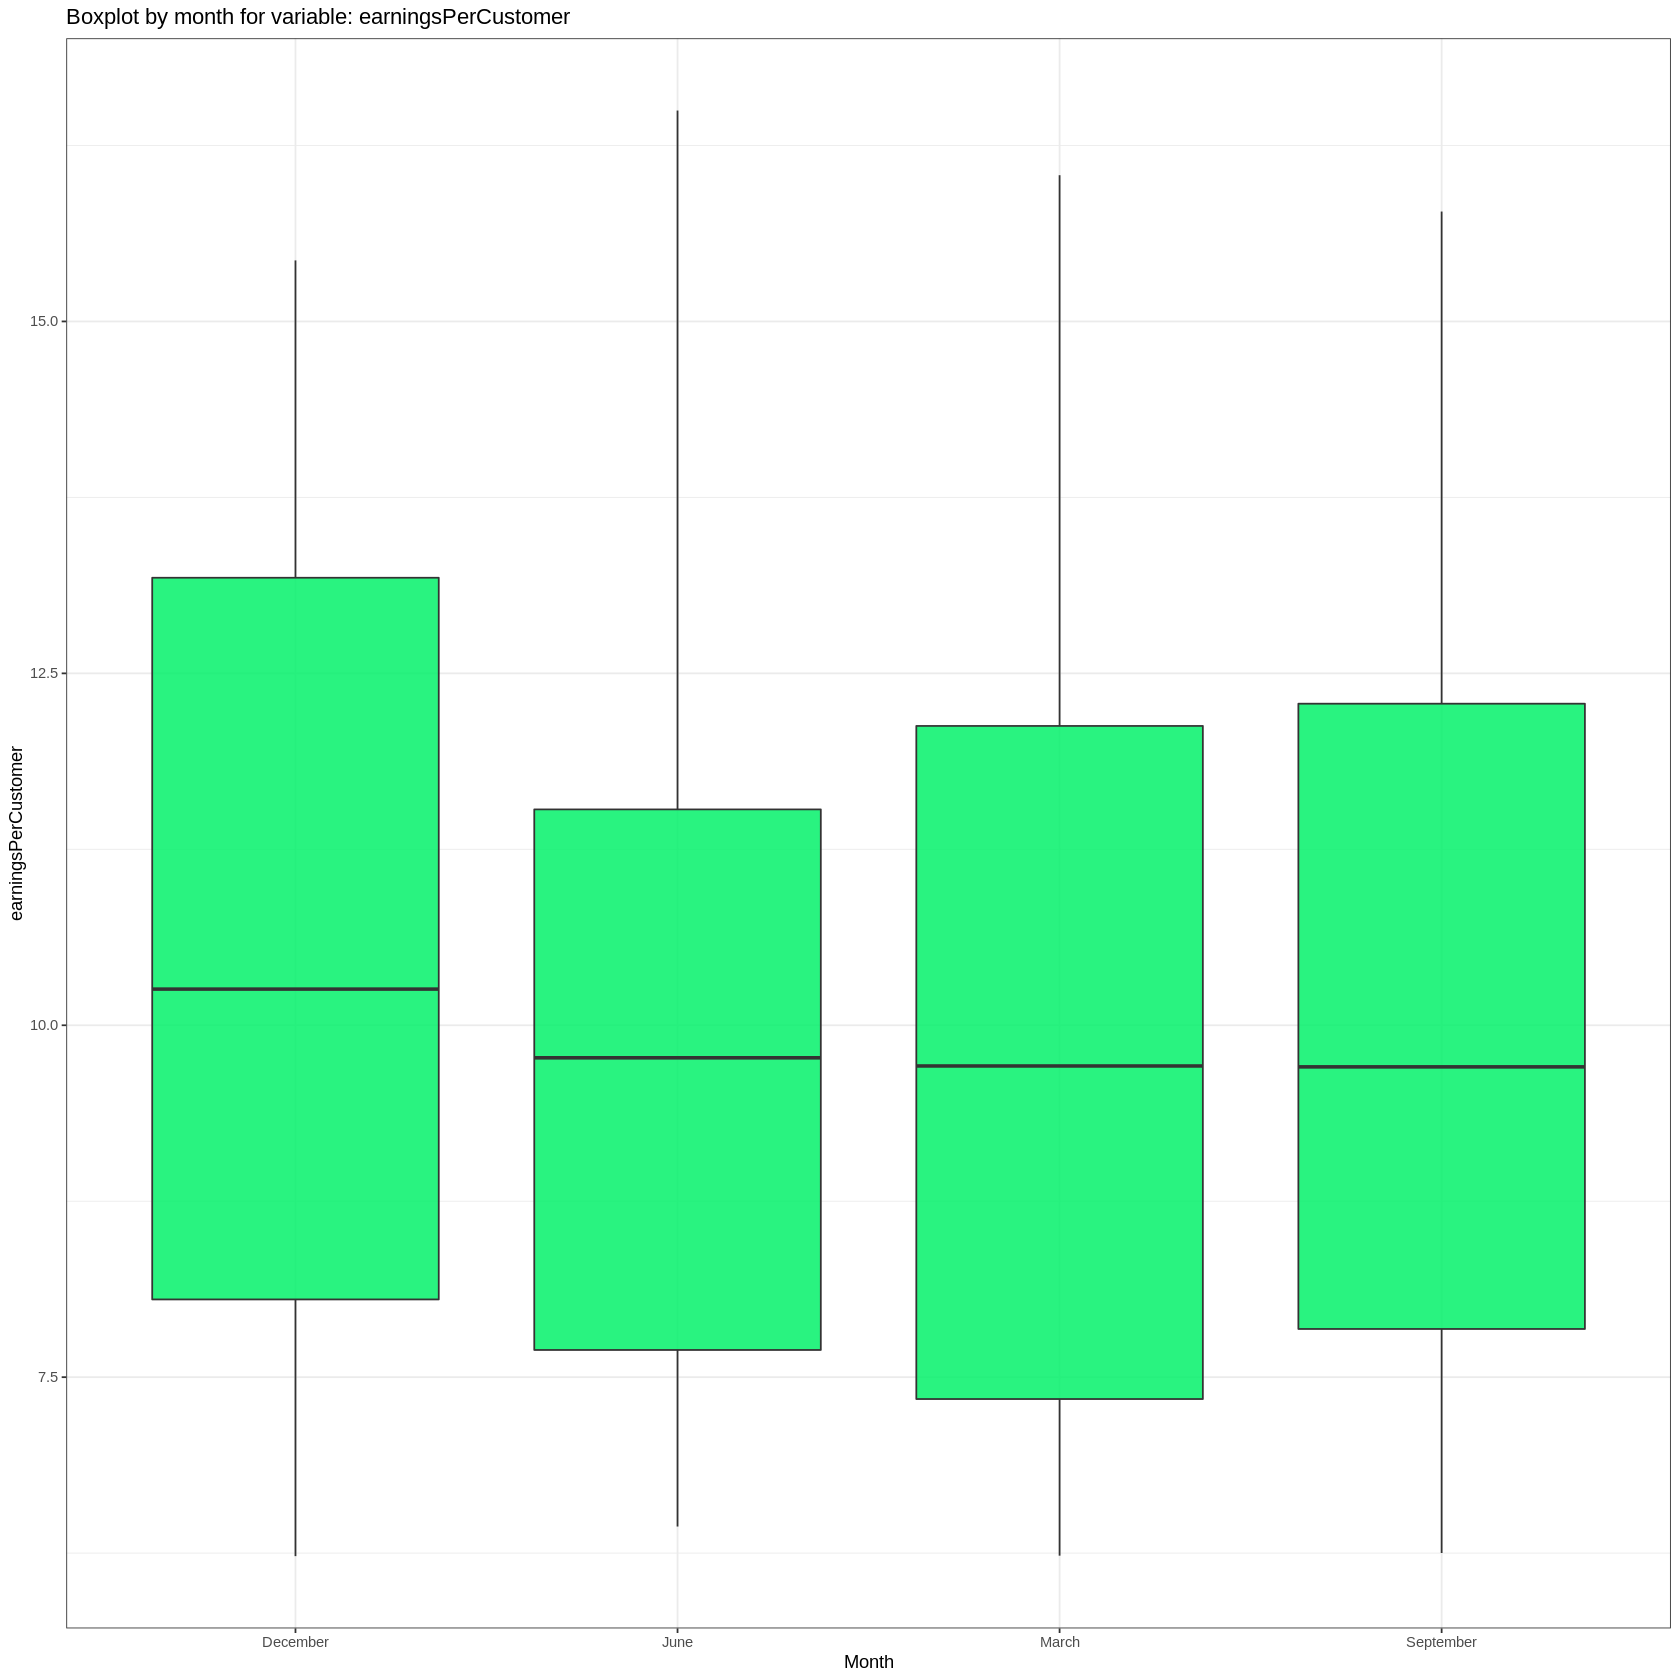

In [ ]:
# Criando um gráfico Boxplot, que agrupe a variável especificada, pelo trimestre ao qual seu registro está associada.

boxPlot(col = col, data = data, categ = 'month')

Parece não haver um diferença significativa, para a taxa de lucro por cliente, entre os trimestres dos anos.

#### **5.4.12 Variável freeTrialsFromTotal**

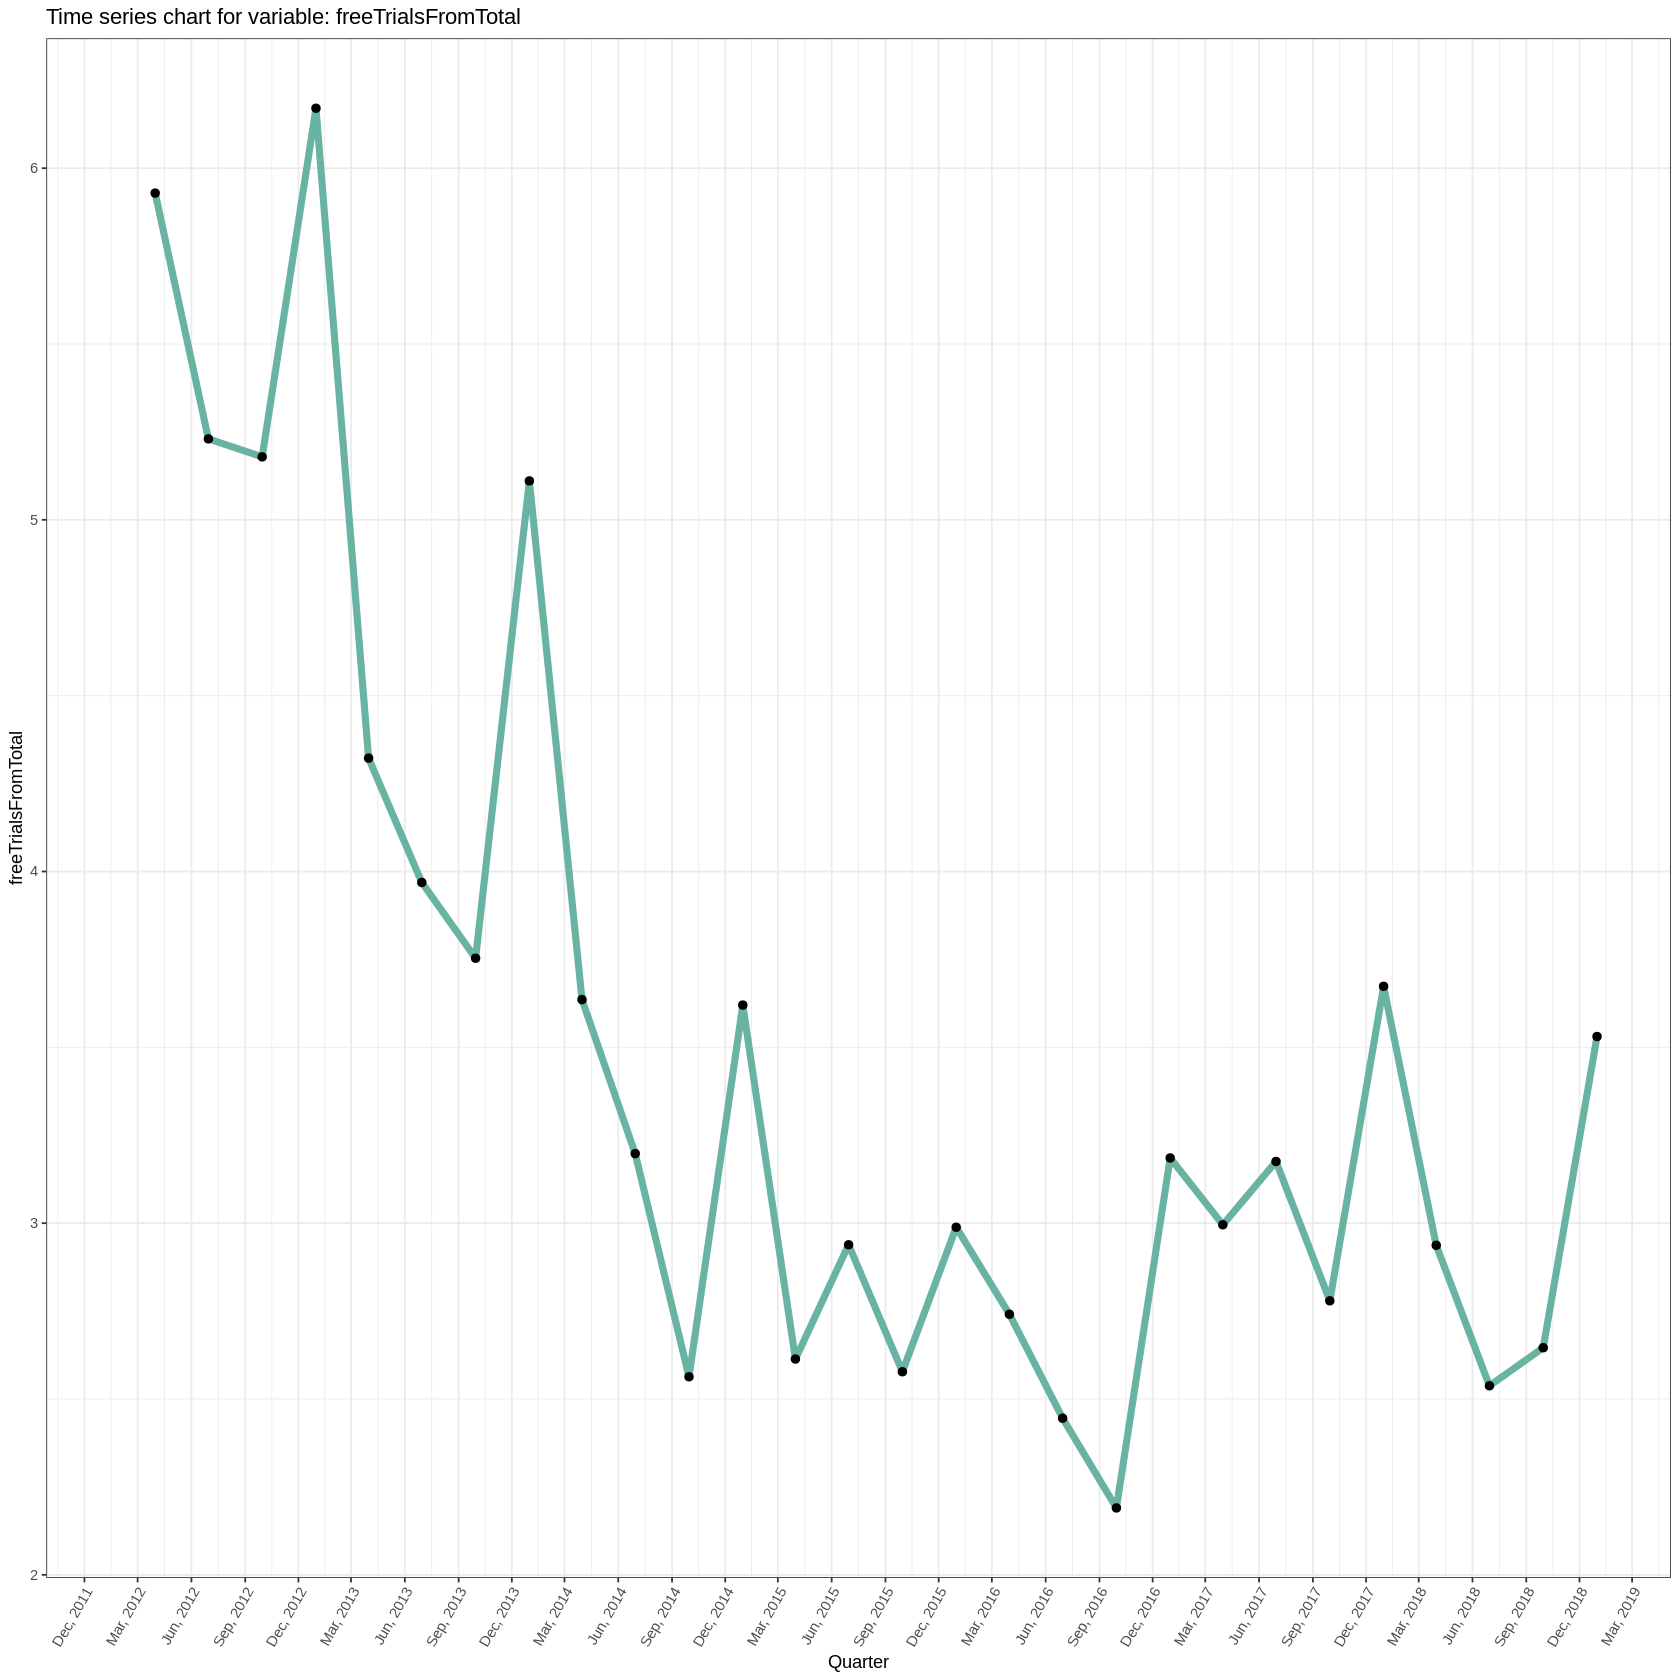

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'freeTrialsFromTotal'

# Criando um gráfico de série temporal para a variável especificada.

timeSeriesPlot(col = col, data = data)

A série temporal demonstra, um **decrescimento aproximadamente exponecial**, da proporção de avaliações gratuitas do total de assinaturas entre os anos em análise.

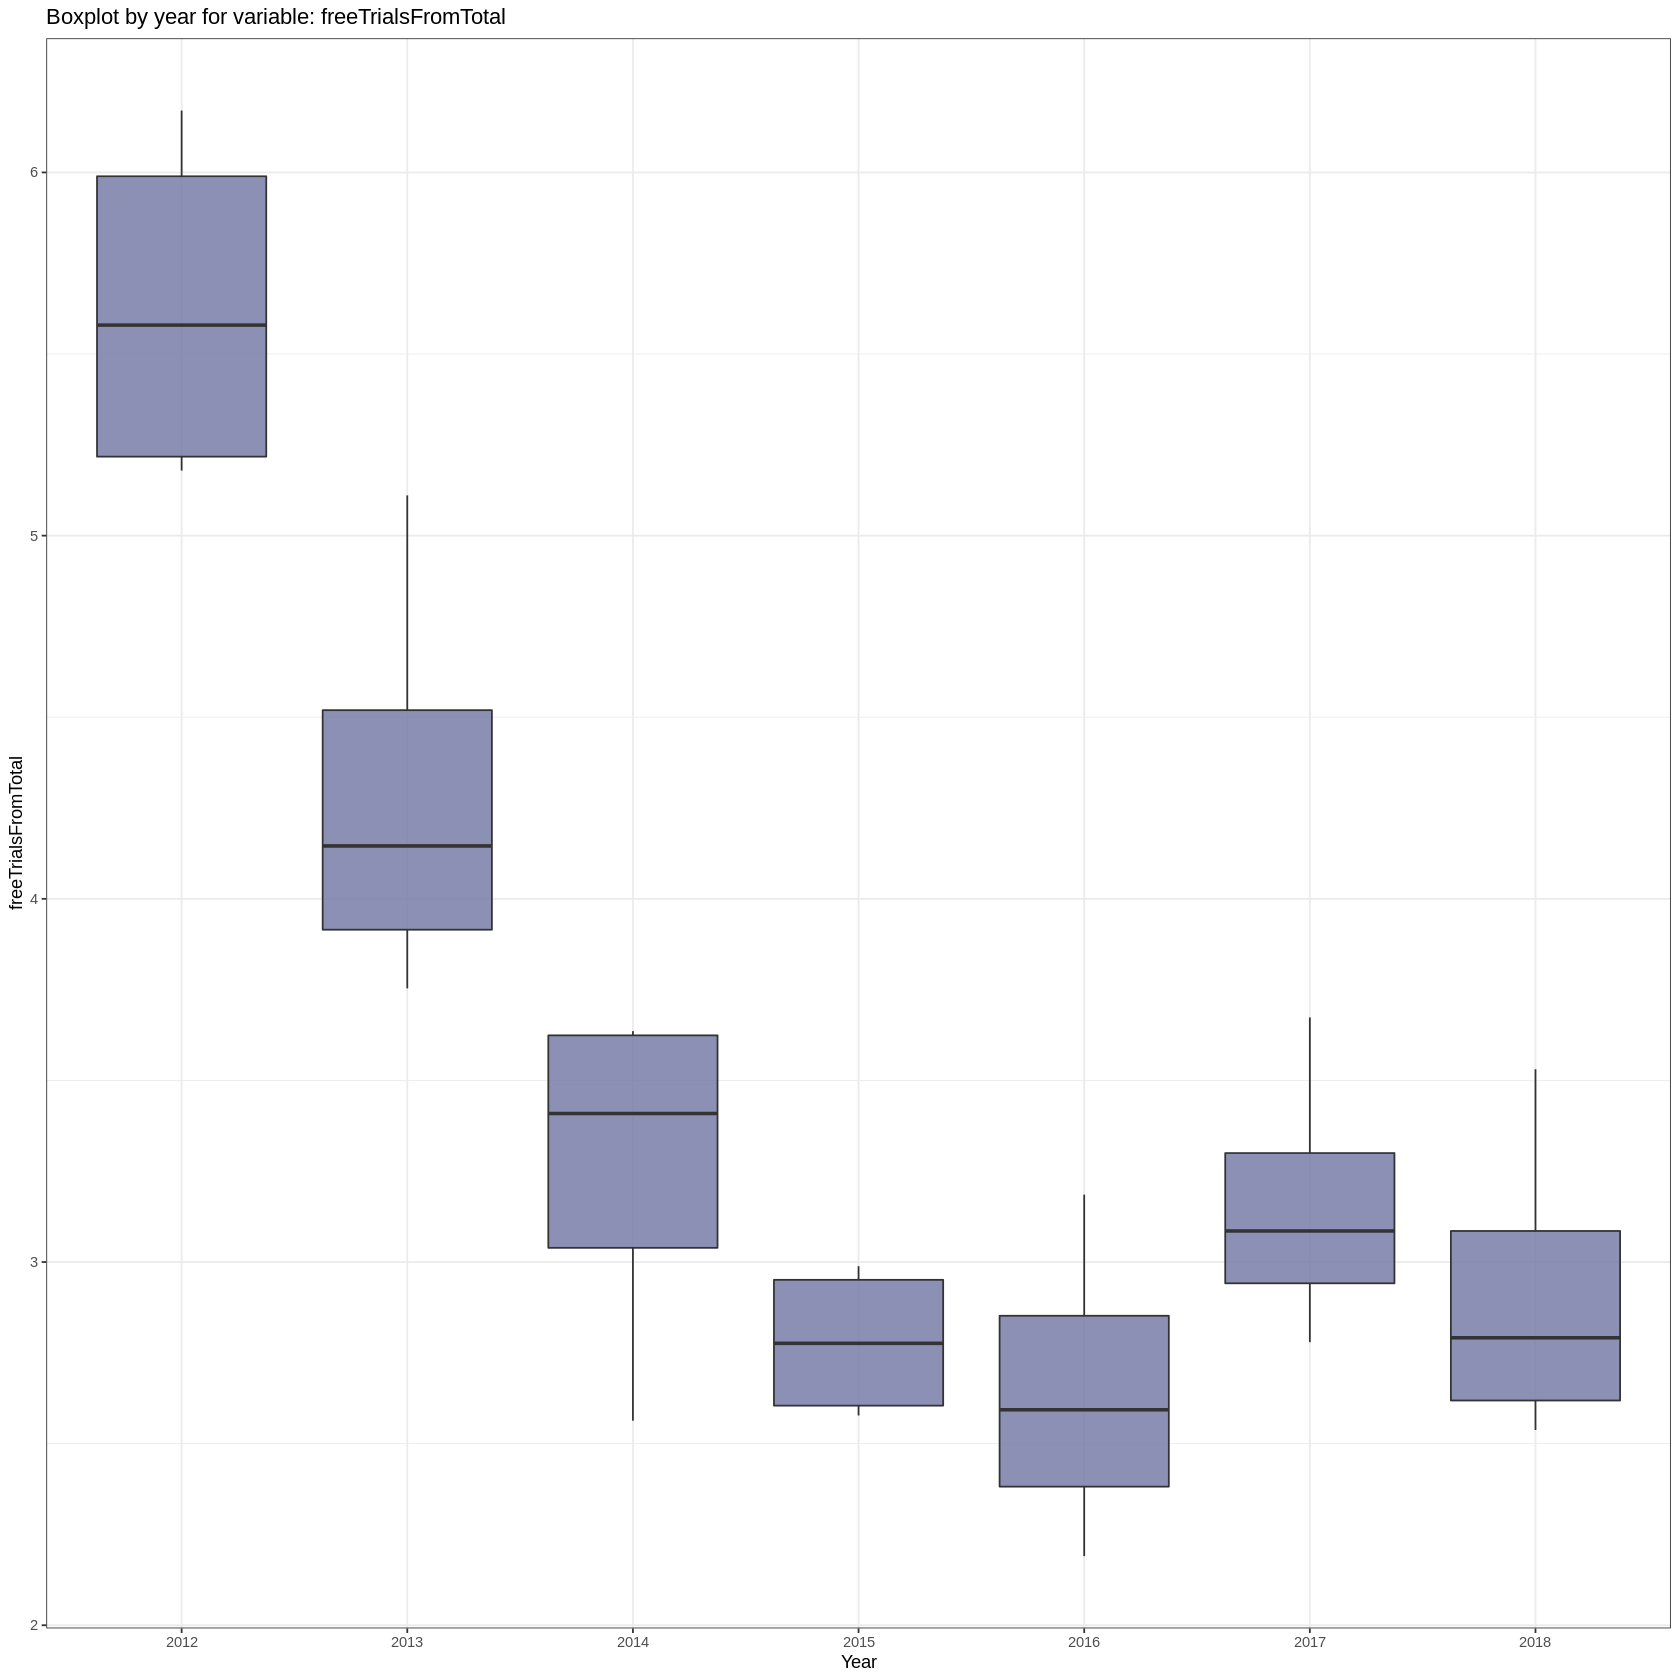

In [ ]:
# Criando um gráfico Boxplot, que agrupe a variável especificada, pelo ano ao qual seu registro está associada.

boxPlot(col = col, data = data, categ = 'year')

Como vimos anteriormente, a proporção de avaliações gratuitas do total de assinaturas diminui exponecialmente a cada ano.

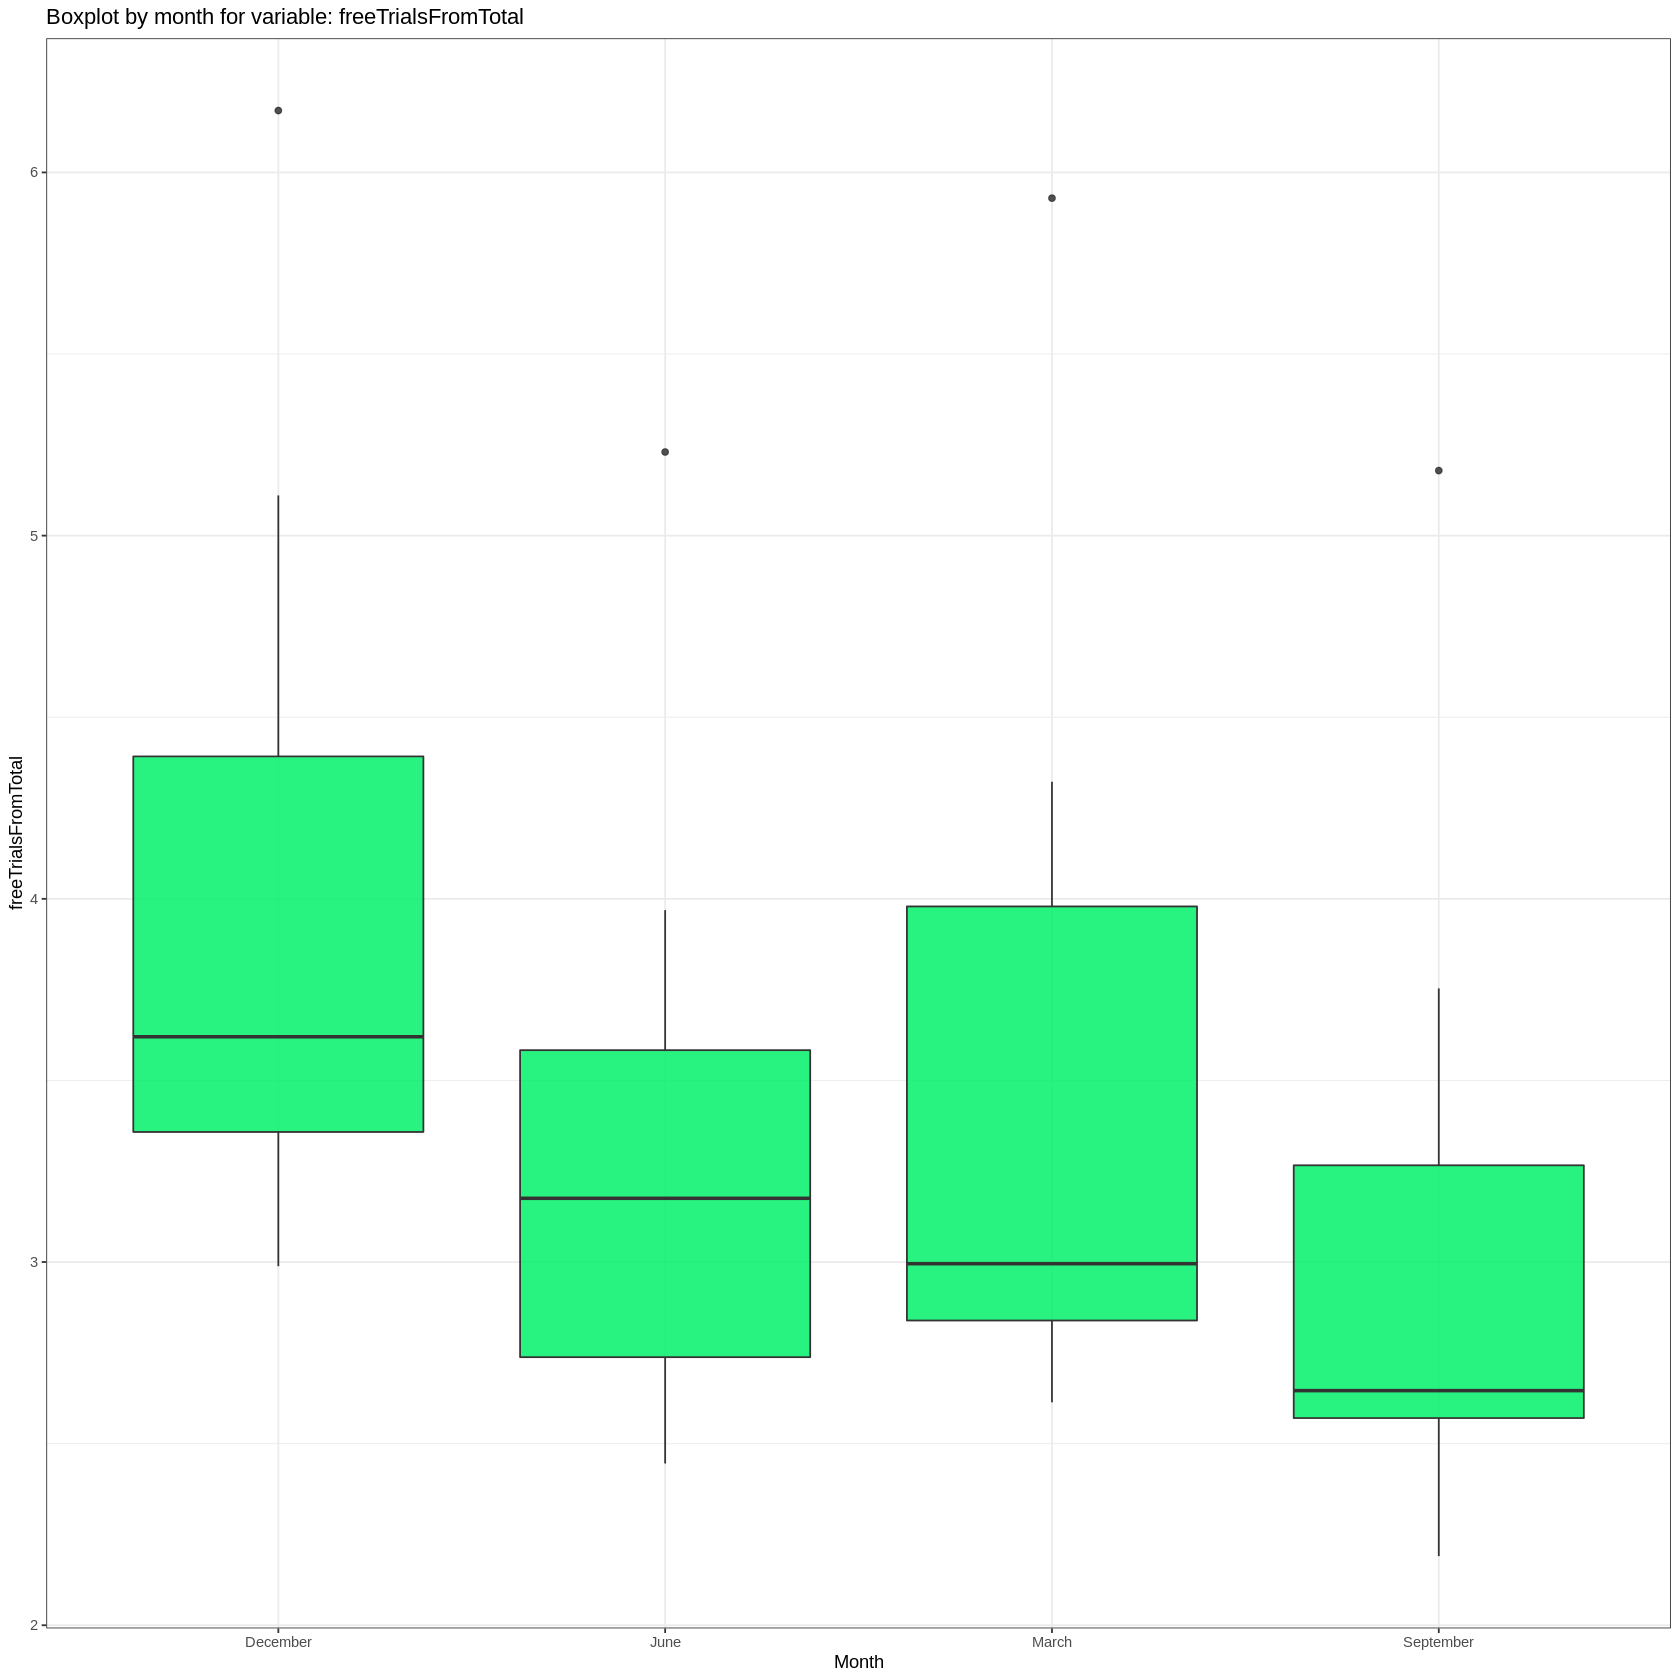

In [ ]:
# Criando um gráfico Boxplot, que agrupe a variável especificada, pelo trimestre ao qual seu registro está associada.

boxPlot(col = col, data = data, categ = 'month')

Parece haver uma diferença significativa, para a proporção de avaliações gratuitas do total de assinaturas, entre os trimestres dos anos. O **terceiro trimestre**, apresenta um valor mediano menor do que os demais.

#### **5.4.13 Variável marketingFromTotal**

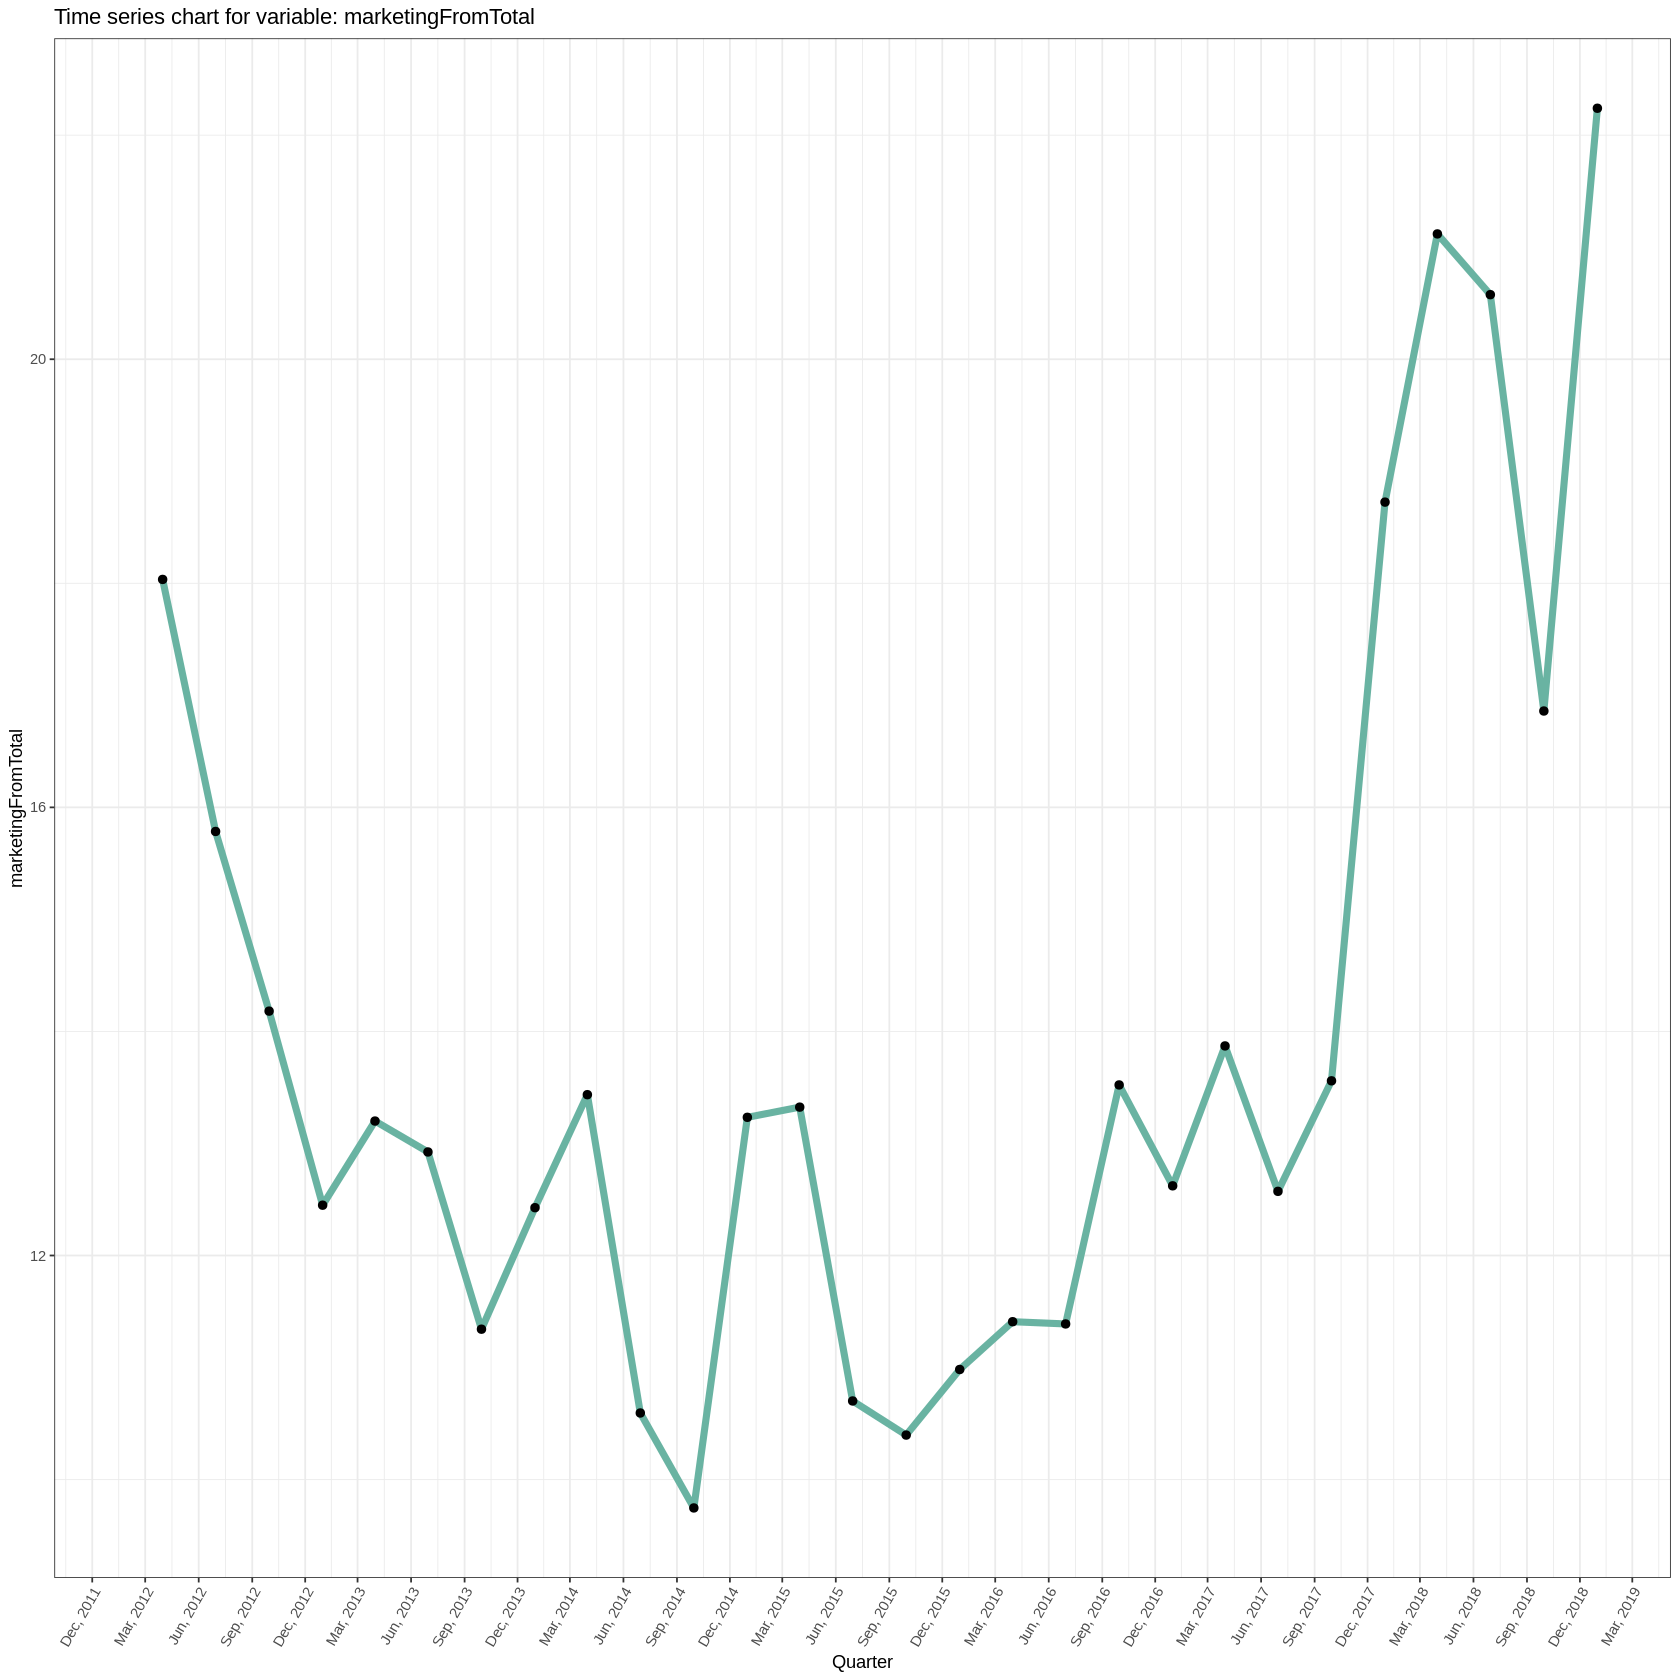

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'marketingFromTotal'

# Criando um gráfico de série temporal para a variável especificada.

timeSeriesPlot(col = col, data = data)

A série temporal demonstra, um **crescimento aproximadamente exponencial**, da proporção de custo com marketing em relação ao custo total entre os anos em análise.


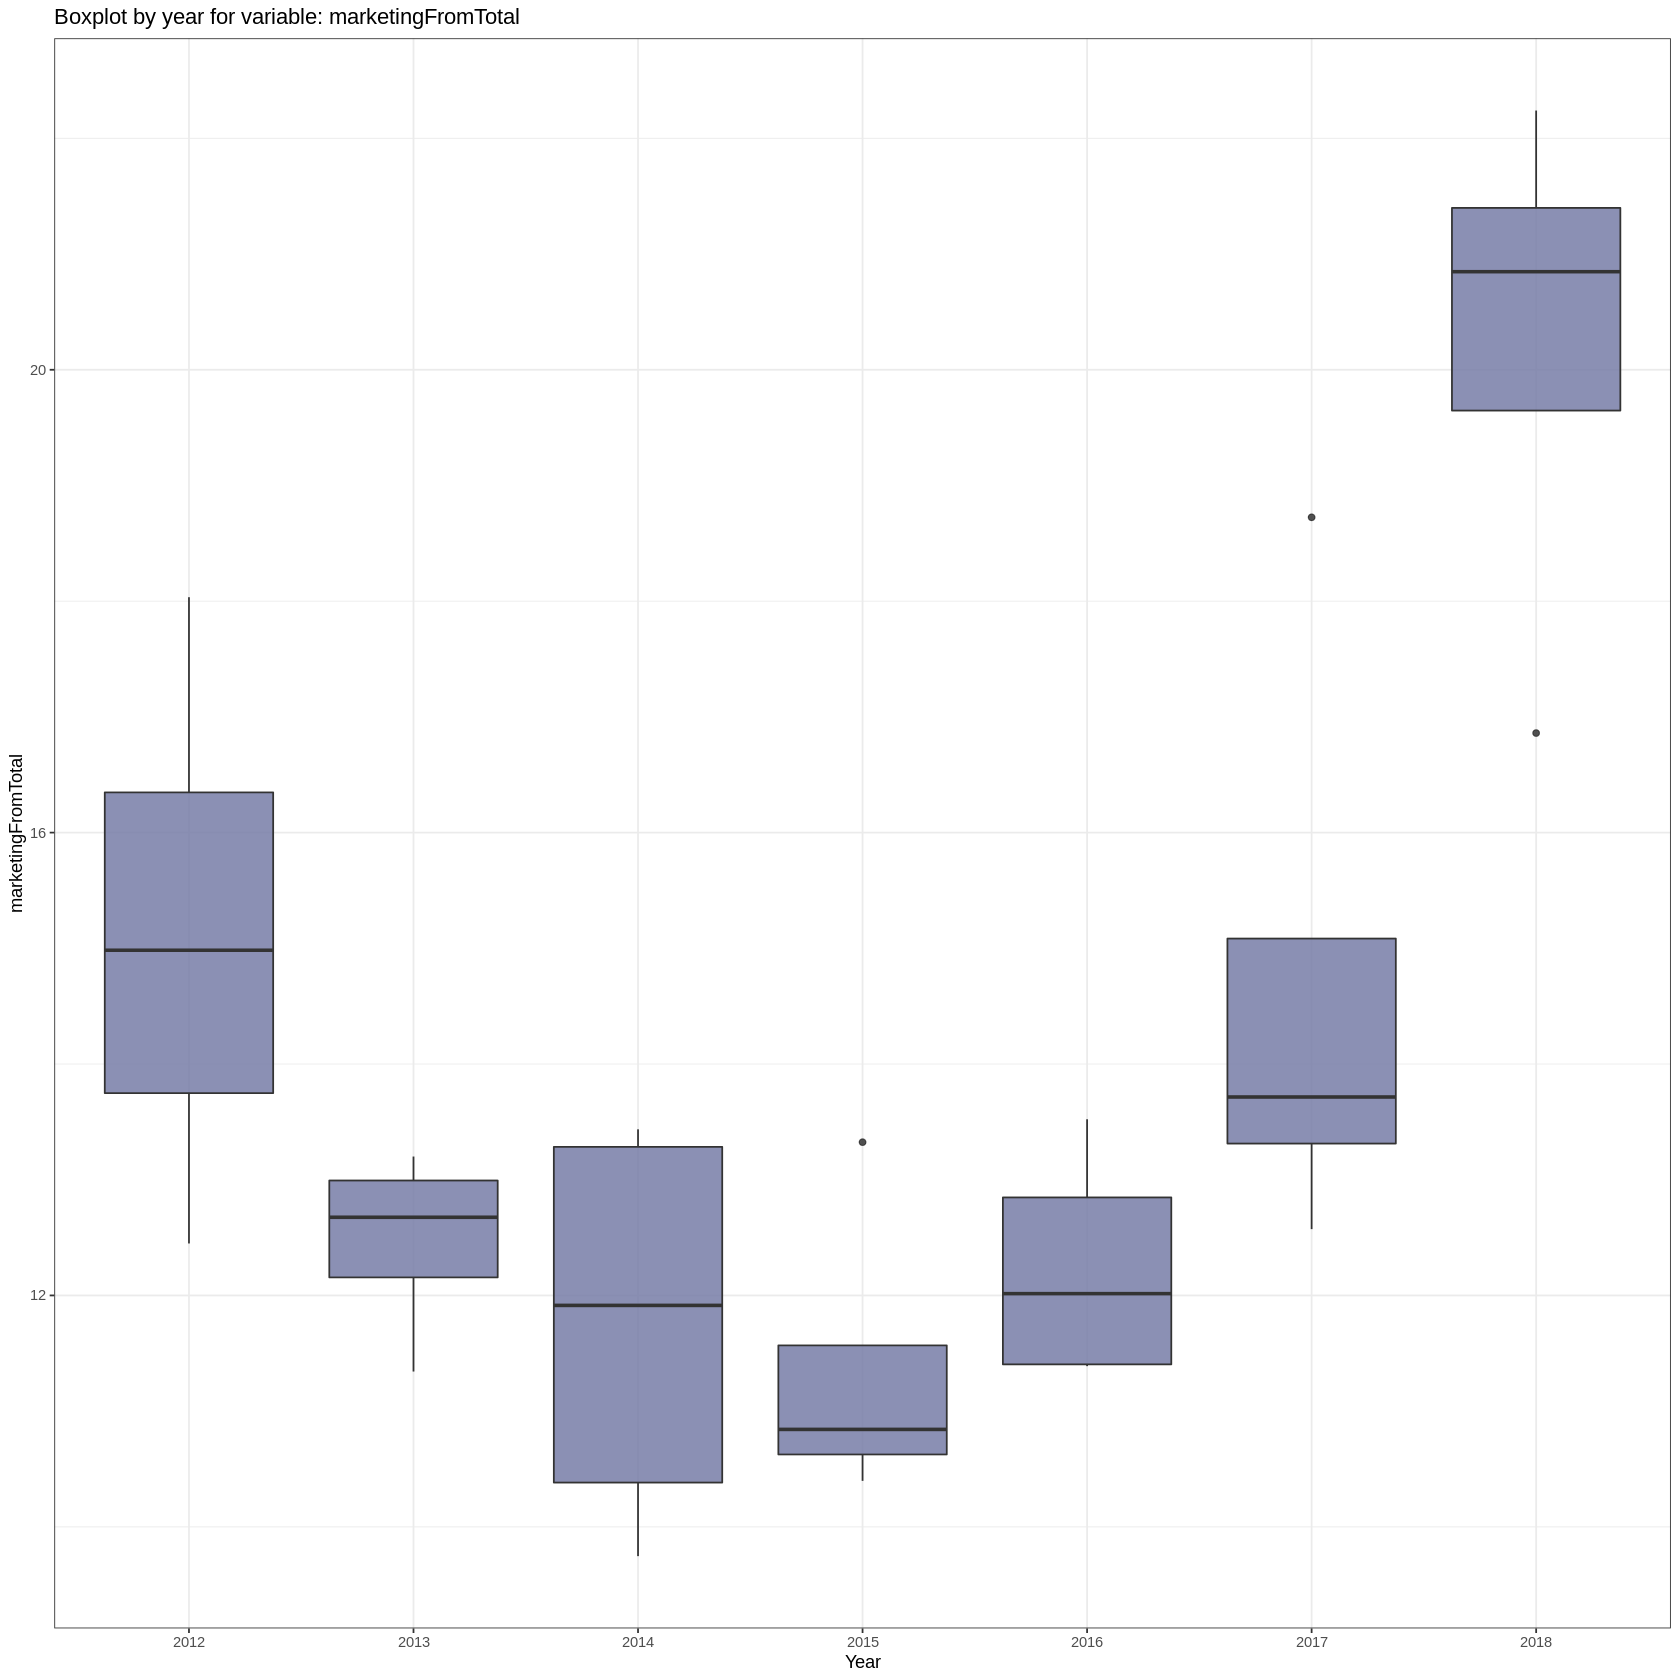

In [ ]:
# Criando um gráfico Boxplot que agrupe a variável especificada pelo ano ao qual seu registro está associada.

boxPlot(col = col, data = data %>% select_at(c('year', col)), categ = 'year')

Como vimos anteriormente, a proporção de custo com marketing em relação ao custo total aumenta exponencialmente a cada ano.

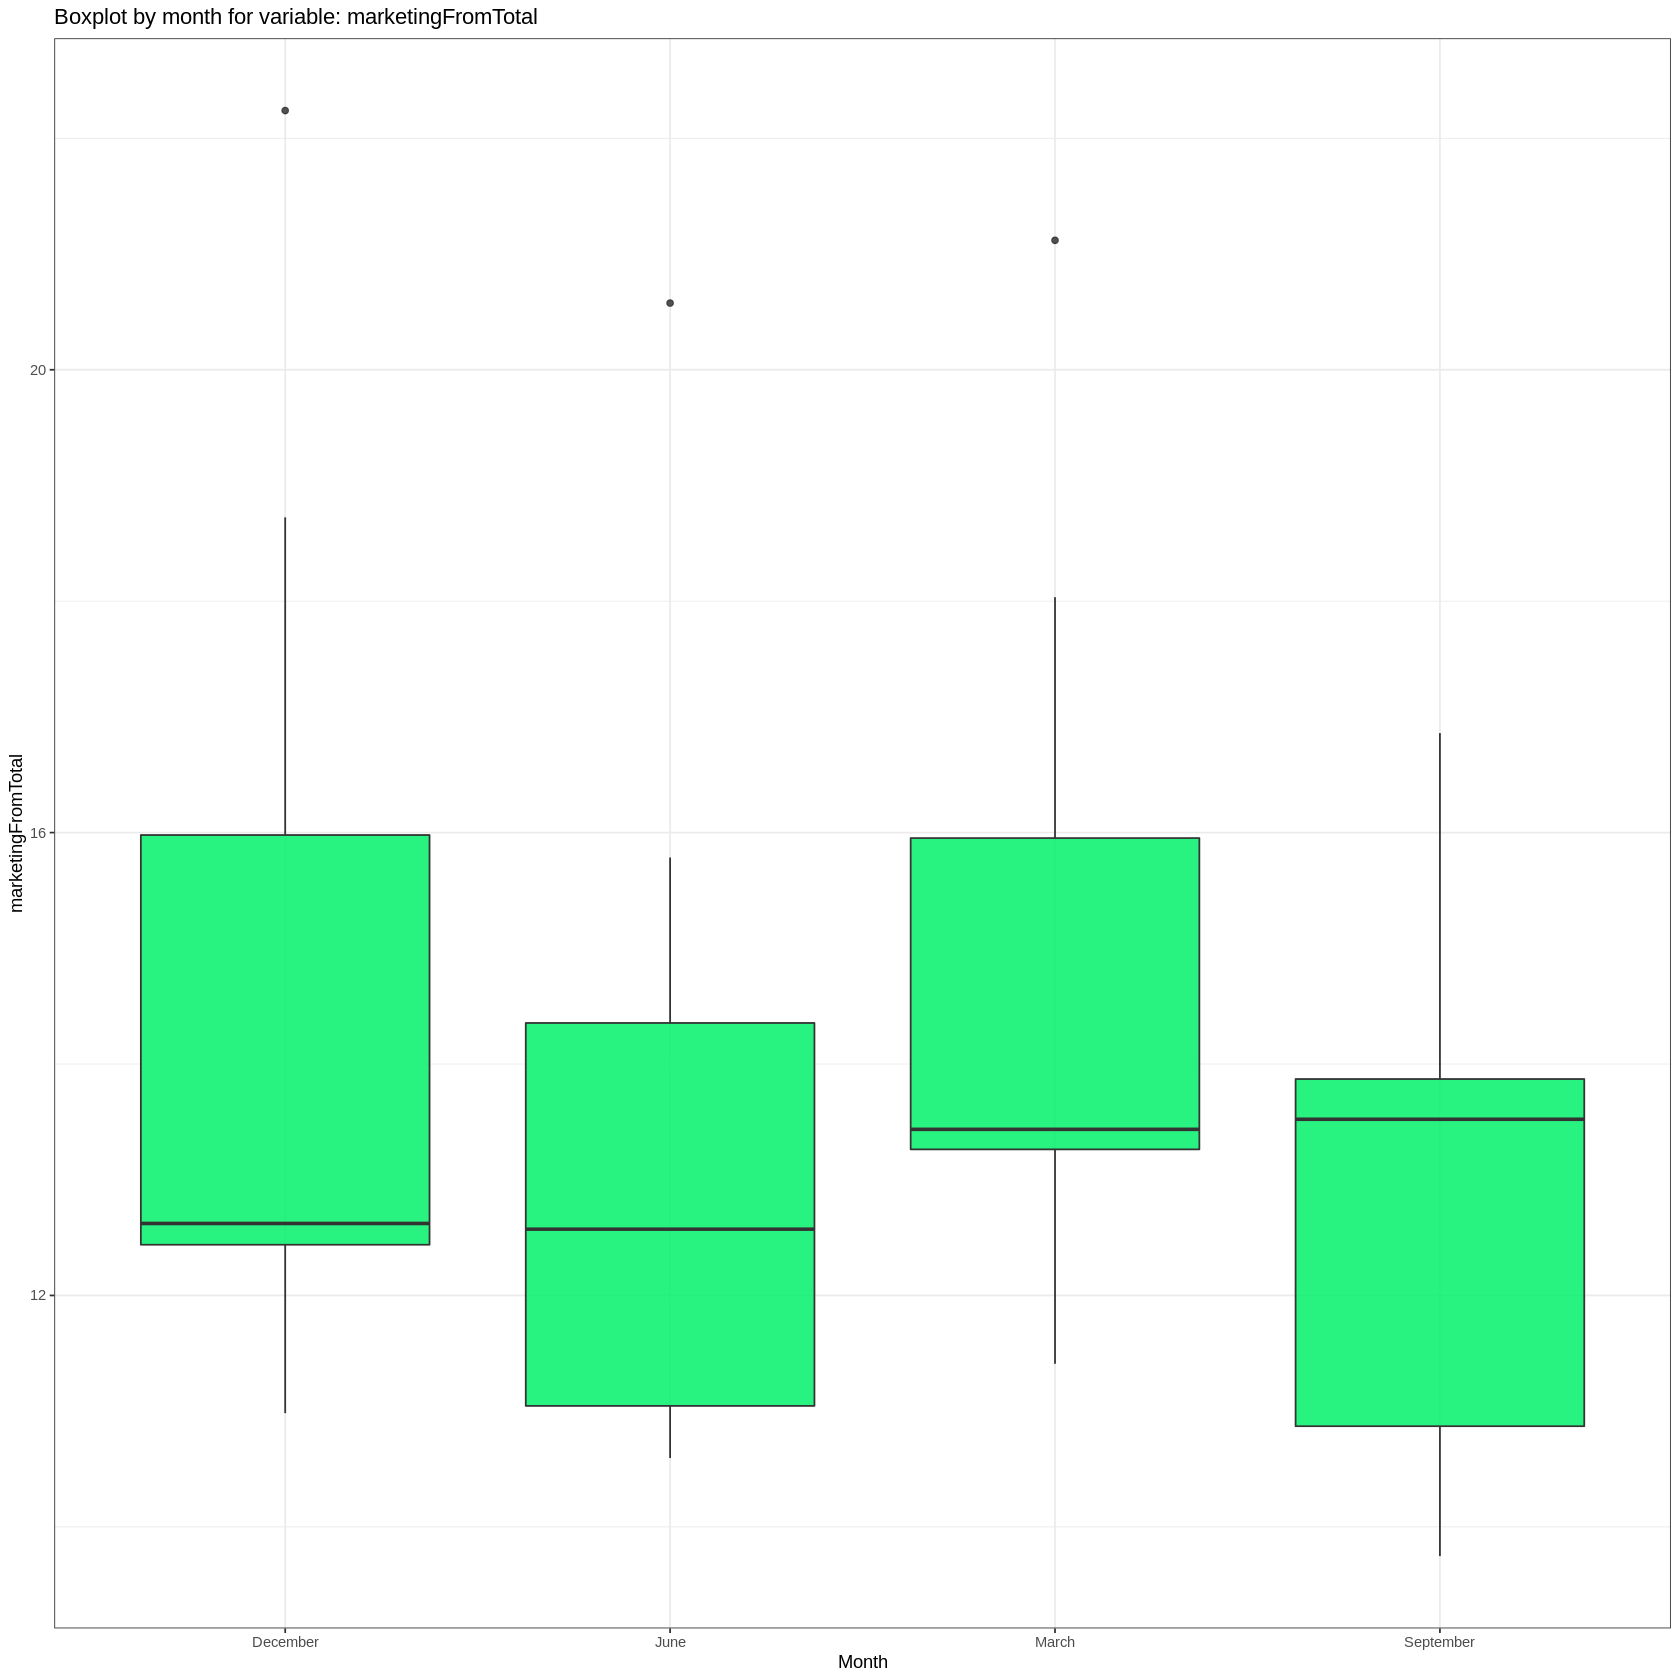

In [ ]:
# Criando um gráfico Boxplot, que agrupe a variável especificada, pelo trimestre ao qual seu registro está associada.

boxPlot(col = col, data = data, categ = 'month')

Parece não haver um diferença significativa, para a proporção de custo com marketing em relação ao custo total, entre os trimestres dos anos.

### **5.5 Aplicando teste Anova One-Way as variáveis do dataset**

Para aplicarmos o teste Anova One-Way, os **4 requisitos a seguir** devem ser cumpridos:

1.  As observações são obtidas de forma **independente e aleatória** a partir da população definida pelos níveis de fator;

2. Os dados de cada nível de fator são **normalmente distribuídos**;

3. Essas populações normais têm uma **variância comum** e;

4. Os dados devem ser **contínuos**.

As variáveis que passarem com êxito por as etapas, serão classificadas como **variáveis paramétricas**, e poderão ser analisadas pelo teste *ANOVA One-Way*.

As variáveis que descumprirem algum destes pontos, serão classificadas como **variáveis não paramétricas**, e poderão ser analisadas pelo *teste de Kruskal-Wallis*.

In [ ]:
# Aplicando o teste de Shapiro-Wilks, para avaliar a normalidade das variáveis.

nmT <- normalityTest(data)

# Verificando quais variáveis são continuas.

isContinuous <- !sapply(data, is.integer)

Iremos utilizar o **ano**, para categorizar as variáveis que serão analisadas.

In [ ]:
# Definindo a variável categórica que será utilizada nos testes.

categ <- 'year'

# Aplicando o teste de Levene, para verificar se a variância entre os grupos é homogênea.

nmVarT <- normVarTest(categ = categ, data)

# Determinando quais variáveis são paramétricas.

varsForParametricTests <- rownames(nmT)[nmT$thereIsEvidenceOfNormality & nmVarT$thereIsEvidenceOfNormVar]

# Determinando quais variáveis são não paramétricas.

varsForNonParametricTests <- rownames(nmT)[!(nmT$thereIsEvidenceOfNormality & nmVarT$thereIsEvidenceOfNormVar)]

# Determinando quais variáveis são contínuas.

continuousCols <- varsForParametricTests %in% colnames(data[isContinuous])

# Definindo variáveis que devem passar por testes não paramétricos.

varsForNonParametricTests <- append(varsForNonParametricTests, varsForParametricTests[!continuousCols])

# Definindo variáveis que devem passar por testes paramétricos.

varsForParametricTests <- varsForParametricTests[continuousCols]

In [ ]:
# Aplicando o teste ANOVA One-Way, para as variáveis paramétricas, segundo a variável categórica especificada.

anovaTest(categ = categ, parametricVars = varsForParametricTests, data = data)

pValue                     thereIsEvidenceForEqualsMeans
revenue            0.000000000000000008403435 FALSE                        
costOfRevenues     0.000000000000013494042149 FALSE                        
contributionProfit 0.000000000000000546453504 FALSE

Concluímos que, **há evidências estatisticamente significativas**, com um nível de significância de 5%, para rejeitar a hipótese nula de que as médias das variáveis **revenue**, **costOfRevenues** e **ContributionProfit** sejam iguais entre os anos.

In [ ]:
# Aplicando o teste de Kruskal-Wallis, para as variáveis não paramétricas, segundo a variável categórica especificada.

kruskalTest(categ = categ, nonParametricVars = varsForNonParametricTests, data = data)

pValue       thereIsEvidenceForEqualsMeans
marketing           0.0007761152 FALSE                        
contributionMargin  0.0011541486 FALSE                        
costPerCustomer     0.0007809553 FALSE                        
revenuePerCustomer  0.0002281178 FALSE                        
earningsPerCustomer 0.0001977781 FALSE                        
freeTrialsFromTotal 0.0029392189 FALSE                        
marketingFromTotal  0.0088238841 FALSE                        
totalSubscriptions  0.0001809473 FALSE                        
paidSubscriptions   0.0001809473 FALSE                        
freeTrails          0.0375644146 FALSE

Concluímos que, **há evidências estatisticamente significativas**, com um nível de significância de 5%, para rejeitar a hipótese nula de que as médias das variáveis **marketing**, **contributionMargin**, **contributionMargin**, **costPerCustomer**, **revenuePerCustomer**, **earningsPerCustomer**, **freeTrialsFromTotal**, **marketingFromTotal**, **totalSubscriptions**, **paidSubscriptions** e **freeTrails** sejam iguais entre os anos.

Também podemos categorizar as variáveis que estamos analisando por **mês**.

In [ ]:
# Definindo a variável categórica que será utilizada nos testes.

categ <- 'month'

# Aplicando o teste de Levene, para verificar se a variância entre os grupos é homogênea.

nmVarT <- normVarTest(categ = categ, data)

# Determinando quais variáveis são paramétricas.

varsForParametricTests <- rownames(nmT)[nmT$thereIsEvidenceOfNormality & nmVarT$thereIsEvidenceOfNormVar]

# Determinando quais variáveis são não paramétricas.

varsForNonParametricTests <- rownames(nmT)[!(nmT$thereIsEvidenceOfNormality & nmVarT$thereIsEvidenceOfNormVar)]

# Determinando quais variáveis são contínuas.

continuousCols <- varsForParametricTests %in% colnames(data[isContinuous])

# Definindo variáveis que devem passar por testes não paramétricos.

varsForNonParametricTests <- append(varsForNonParametricTests, varsForParametricTests[!continuousCols])

# Definindo variáveis que devem passar por testes paramétricos.

varsForParametricTests <- varsForParametricTests[continuousCols]

In [ ]:
# Aplicando o teste ANOVA One-Way, para as variáveis paramétricas, segundo a variável categórica especificada.

anovaTest(categ = categ, parametricVars = varsForParametricTests, data = data)

pValue    thereIsEvidenceForEqualsMeans
revenue            0.9523326 TRUE                         
costOfRevenues     0.8872829 TRUE                         
contributionProfit 0.9900704 TRUE

Concluímos que, **não há evidências estatisticamente significativas**, com um nível de significância de 5%, para rejeitar a hipótese nula de que as médias das variáveis **revenue**, **costOfRevenues** e **ContributionProfit** sejam iguais entre os trimestres.

In [ ]:
# Aplicando o teste de Kruskal-Wallis, para as variáveis não paramétricas, segundo a variável categórica especificada.

kruskalTest(categ = categ, nonParametricVars = varsForNonParametricTests, data = data)

pValue     thereIsEvidenceForEqualsMeans
marketing           0.83829462  TRUE                        
contributionMargin  0.99843972  TRUE                        
costPerCustomer     0.50465343  TRUE                        
revenuePerCustomer  0.89216640  TRUE                        
earningsPerCustomer 0.99432772  TRUE                        
freeTrialsFromTotal 0.23780293  TRUE                        
marketingFromTotal  0.55864741  TRUE                        
totalSubscriptions  0.91508755  TRUE                        
paidSubscriptions   0.91508755  TRUE                        
freeTrails          0.01361153 FALSE

Concluímos que, **não há evidências estatisticamente significativas**, com um nível de significância de 5%, para rejeitar a hipótese nula de que as médias das variáveis **marketing**, **contributionMargin**, **contributionMargin**, **costPerCustomer**, **revenuePerCustomer**, **earningsPerCustomer**, **freeTrialsFromTotal**, **marketingFromTotal**, **totalSubscriptions** e **paidSubscriptions** sejam iguais entre os trimestres.

**Há evidências estatisticamente significativas**, com um nível de significância de 5%, para rejeitar a hipótese nula de que a média da variável **freeTrails** seja igual entre os trimestres.

### **5.6 Analisando correlações entre as variáveis**

Nesta etapa desejamos verificar como as variáveis se correlacionam, ou seja, como uma variável ajuda a prever o valor de outra variável no dataset.

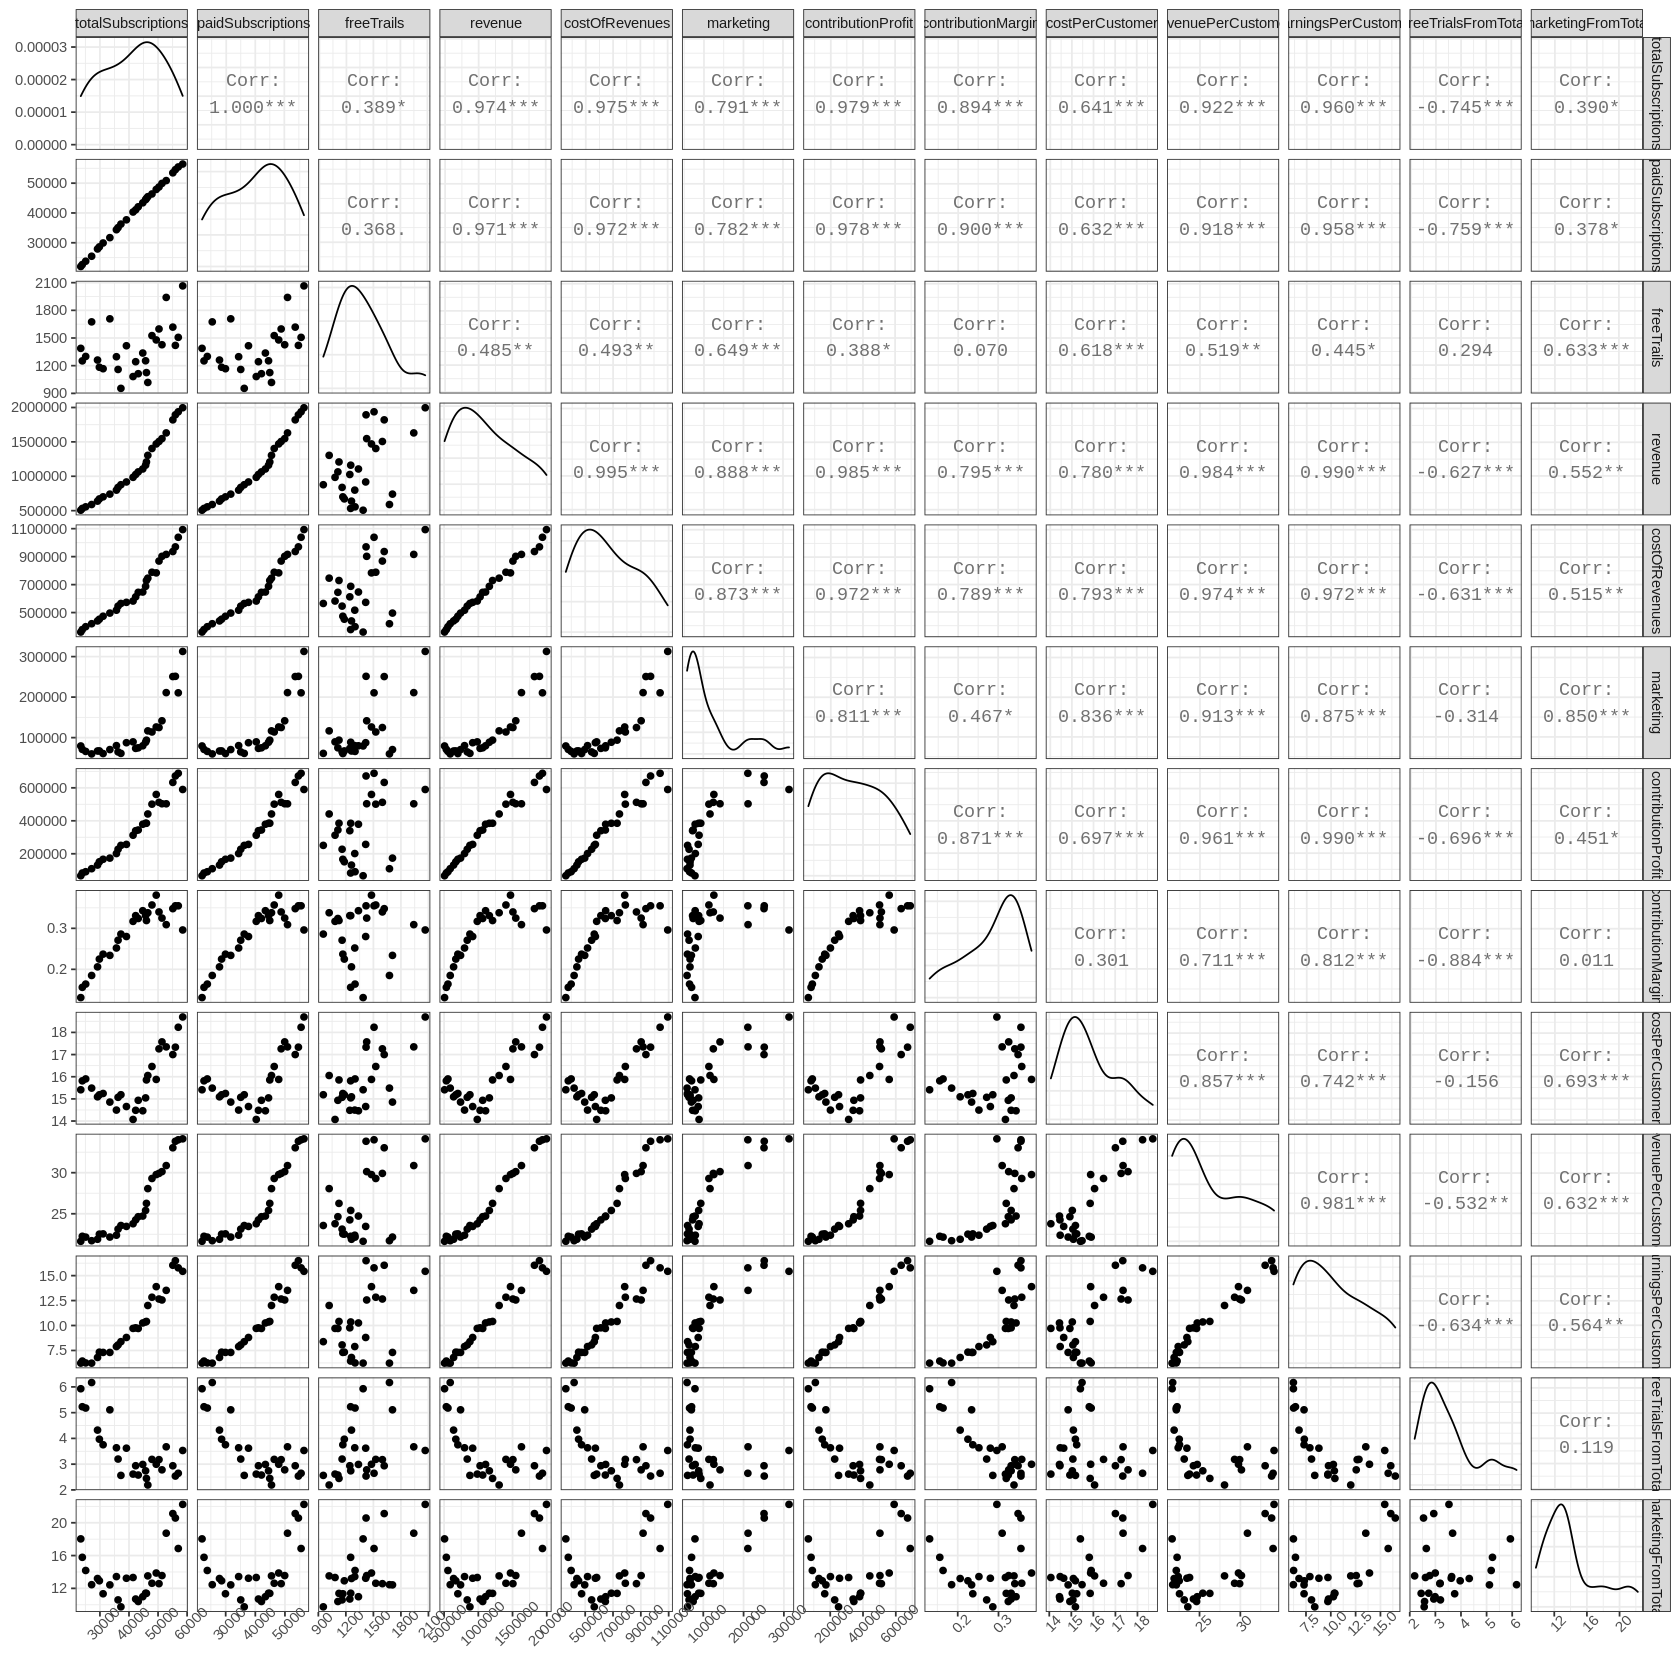

In [ ]:
# Determinando quais variáveis do dataset são do tipo numérico.

numVars <- sapply(data, is.numeric)

# Criando um pair plot para visualizar as correlações entre as variáveis númericas. 

ggpairs(data[numVars]) + theme_bw() + theme(axis.text.x = element_text(angle = 45, vjust = 1))

Algo interessante de se notar neste gráfico, é a alta correlação existente entre praticamente todas as variáveis do dataset.

Vamos investigar mais detalhadamente a força e a direção dessas correlações.

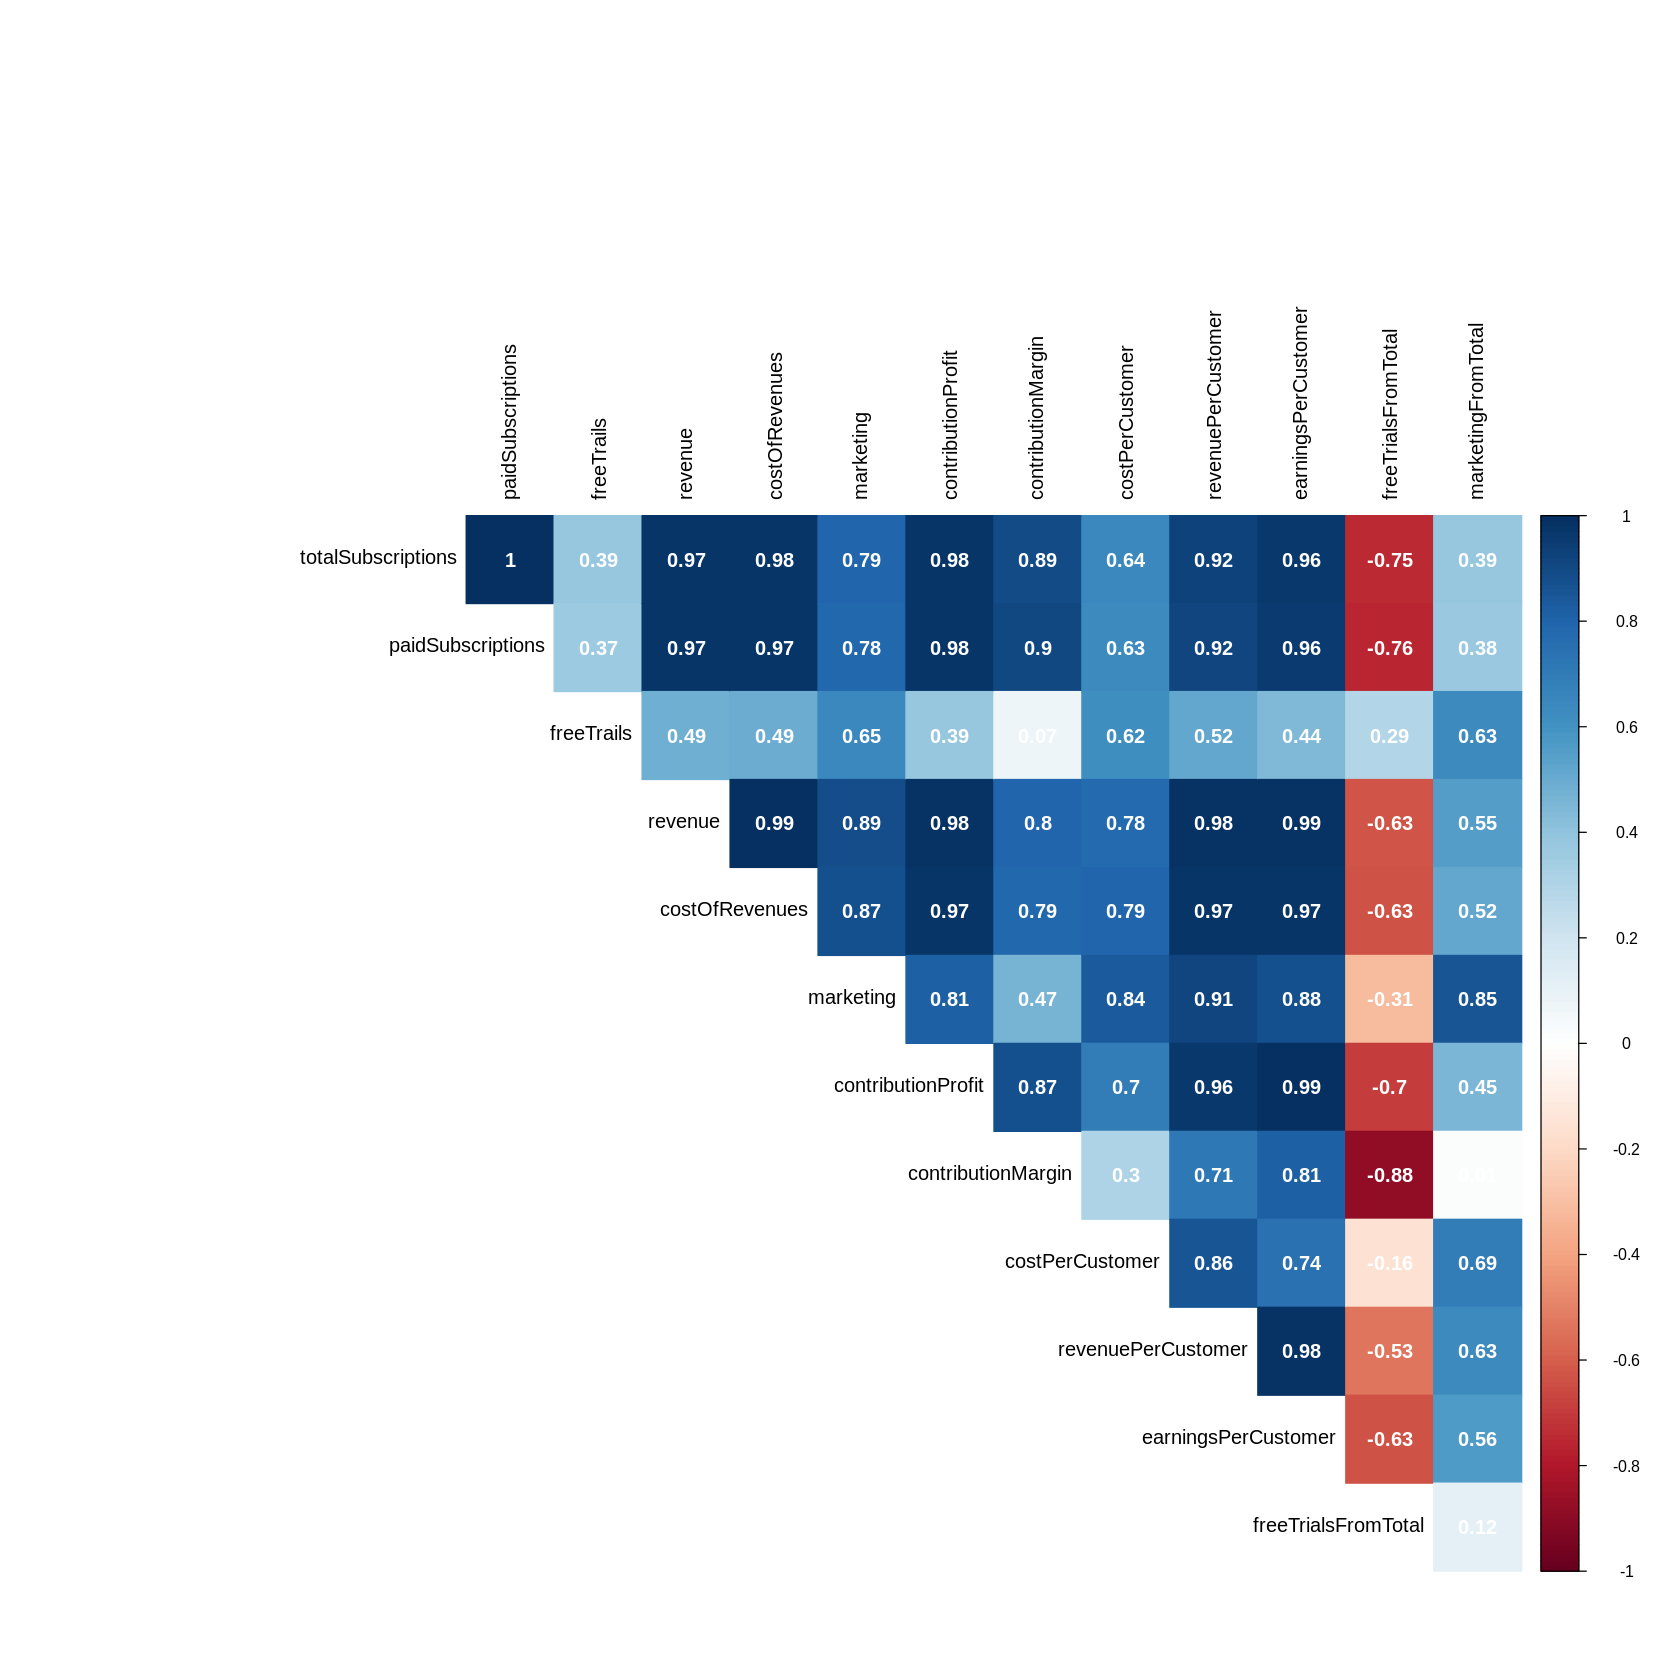

In [ ]:
# Verificando a correlação entre as variáveis do dataset.

corrplot(cor(data[numVars]),
         method      = 'color', 
         addCoef.col = 'white', 
         type        = 'upper', 
         tl.col      = 'black',
         diag        = F
)

Como suspeitávamos, há correlações praticamente perfeitas entre quase todas as variáveis do conjunto de dados. Ou seja, boa parte das variáveis carregam, praticamente, as mesmas informações que as outras.

Destacamos a correlação entre as variáveis **totalSubscriptions** e **paidSubscriptions**, que é perfeitamente positiva (correlação igual a **1**).

## **6. Análise exploratória dos dados como Séries Temporais**

Nesta etapa, iremos analisar as variáveis do dataset como séries temporais.

### **6.1 Criando funções auxiliares**

#### **6.1.1 Funções para aplicar testes estatísticos**

##### **6.1.1.1 Teste Augmented Dickey-Fuller (ADF)**

Em estatística e econometria, o **Teste de Dickey-Fuller aumentado** ou **Teste ADF** (*do acrônimo em inglês Augmented Dickey-Fuller*) é um teste de raiz unitária em séries temporais. Ele é uma versão aumentada do Teste de Dickey-Fuller, é aplicado a modelos mais complicados de séries temporais.

A estatística ADF, usada no teste, é um número negativo, e quanto mais negativo, mais indicativo o teste se torna de rejeitar a hipótese nula de que existe raiz unitária na série.

O nome do teste faz referência aos estatísticos *D. A. Dickey* e *W. A. Fuller*.

As hipóteses deste teste são:

| Teste de hipótese                                    |
|:-----------------------------------------------------|
|**H0:** A série é não é estácionária.                 |
|**Ha:** A série é estacionária.                       |


Para saber mais sobre testes estatísticos para comparar variâncias, consulte este [link](https://nwfsc-timeseries.github.io/atsa-labs/sec-boxjenkins-aug-dickey-fuller.html).

In [ ]:
# Definindo uma função, para aplicar o teste ADF, as séries temporais do dataset.

adfTest <- function(data, freq = 4, sig = 0.05) {

    # Aplicando o teste ADF a cada variável do dataset.

    result <- sapply(data, function(t) {

        # Convertendo a variável especificada em uma série temporal.

        t <- ts(t, frequency = freq)

        # Aplicando o teste ADF, e capturando o p-value gerado.

        adf.test(t, alternative = "stationary")$p.value
    })

    # Transpondo dados.

    dfTest <- data.frame(result)

    # Atribuindo o nome da coluna com os p-values.

    colnames(dfTest) <- 'pValue'
    
    # Criando um variável, para determinar se o p-value é menor do que o nível de significância especificado 
    # (por padrão, o nível de significância é de 5%).

    isStationary <- sapply(dfTest, function(pvalue) { ifelse(pvalue < sig, TRUE, FALSE) })

    # Renomeando o nome da variável especificada.

    colnames(isStationary) <- 'isStationary'
    
    # Convertendo variáveis para um dataframe.

    dfTest <- data.frame(dfTest)

    # Retornando um dataframe com os resultados obtidos.

    cbind(dfTest, isStationary)
}

#### **6.1.2 Funções para a criação de gráficos**

In [ ]:
# Definindo uma função, para plotar gráficos das compontentes da série temporal especificada.

tsDecomposePlot <- function(col, data, type, freq = 4, color = '#FF4E00') {

    # Convertendo a variável especificada em uma série temporal.

    t <- ts(data[col], frequency = freq)

    # Cria o gráfico da série temporal decomposta.
    
    ggdecompose(dts2(t, type = type)) + 
        geom_line(color = color, size = 2) +
        geom_point(size = 2) + 
        theme_bw() +
        xlab('Year') +
        ggtitle(paste("Time series components chart for variable:", col))
}

In [ ]:
# Definindo uma função, para plotar um gráfico de série temporal, com as previsões geradas. 

plotPredQuarters <- function(col, data, h = 2, freq = 4, colors = c('#06D6A0', '#FF4E00'), size = 2) {
 
    # Convertendo a variável especificada em uma série temporal.

    t <- ts(data[, col], frequency = freq)

    # Criando um modelo ARIMA.

    model <- auto.arima(t)

    # Realizando a previsão de h trimestres, segundo o modelo ARIMA criado.

    pred <- forecast(model, h = h)

    # Criando um gráfico de série temporal, com as previsões geradas para a variável especificada.

    autoplot(pred, predict.colour = colors[1], predict.size = size, colour = colors[2], size = size) +
        theme_bw() +
        xlab('Year') +
        ggtitle(paste("Forecasting chart for variable", col, "on the next", toString(h), "quartes")) 
}

#### **6.1.3 Função para gerar previsões com o modelo ARIMA**

In [ ]:
# Definindo uma função para gerar previsões para séries temporais utilizando o modelo ARIMA.

predQuarters <- function(data, h = 2, freq = 4) {
    
    # Capturando as métricas obtidas, e as previsões geradas, para cada uma das variáveis do dataset.

    result <- sapply(colnames(data), function(col){

        # Convertendo a variável especificada em uma série temporal.

        t <- ts(data[, col], frequency = freq)

        # Criando um modelo ARIMA.

        model <- auto.arima(t)

        # Imprimindo uma mensagem, para identificar a qual variável o modelo pertence.

        print(paste('---------------', 'model ARIMA for variable:', col, '---------------'))

        # Capturando as métricas do modelo criado, e imprimindo um resumo estatístico.

        metrics <- summary(model)

        # Realizando a previsão de h trimestres, segundo o modelo ARIMA criado.

        pred <- forecast(model, h = h)

        # Capturando os valores previstos para os trimestres.

        quarters <- data.frame(t(pred$mean))

        # Criando um nome para as colunas que vão armazenar os resultados previstos.

        colnames(quarters) <- sapply(1:h, function(n){paste('Qtr', toString(n), sep ="") } )

        # Criando um Dataframe com métricas, e com os resultados dos trimestres previstos.

        cbind(data.frame(metrics), quarters)
    })

    # Convertendo os resultados gerados para uma matriz de números inteiros.

    result <- sapply(as.data.frame(t(result)), as.numeric)

    # Convertendo resultados da matriz para um Dataframe.

    result <- as.data.frame(result)

    # Atribuindo o nome das linhas do Dataframe.

    rownames(result) <- colnames(data)
    
    # Retornando os resultados gerados.

    result
}

### **6.2 Aplicando o teste de estacionariedade ADF**

In [ ]:
# Eliminando variáveis desnecessárias para a análise.

dt <- data %>% select(-c(date, segment, month, year))

In [ ]:
# Aplicando o teste ADF.

adfTest(dt)

pValue    isStationary
totalSubscriptions  0.6083427 FALSE       
paidSubscriptions   0.6738019 FALSE       
freeTrails          0.9215495 FALSE       
revenue             0.9900000 FALSE       
costOfRevenues      0.9900000 FALSE       
marketing           0.9900000 FALSE       
contributionProfit  0.3717972 FALSE       
contributionMargin  0.9900000 FALSE       
costPerCustomer     0.8844615 FALSE       
revenuePerCustomer  0.9194801 FALSE       
earningsPerCustomer 0.9575494 FALSE       
freeTrialsFromTotal 0.4192908 FALSE       
marketingFromTotal  0.9900000 FALSE

**Não há evidências estatisticamente significativas**, com um nível de significância de 5%, para rejeitar a hipótese nula de que as variáveis listadas acima são não estácionárias.

### **6.3 Decompondo Séries Temporais**

#### **6.3.1 Variável totalSubscriptions**

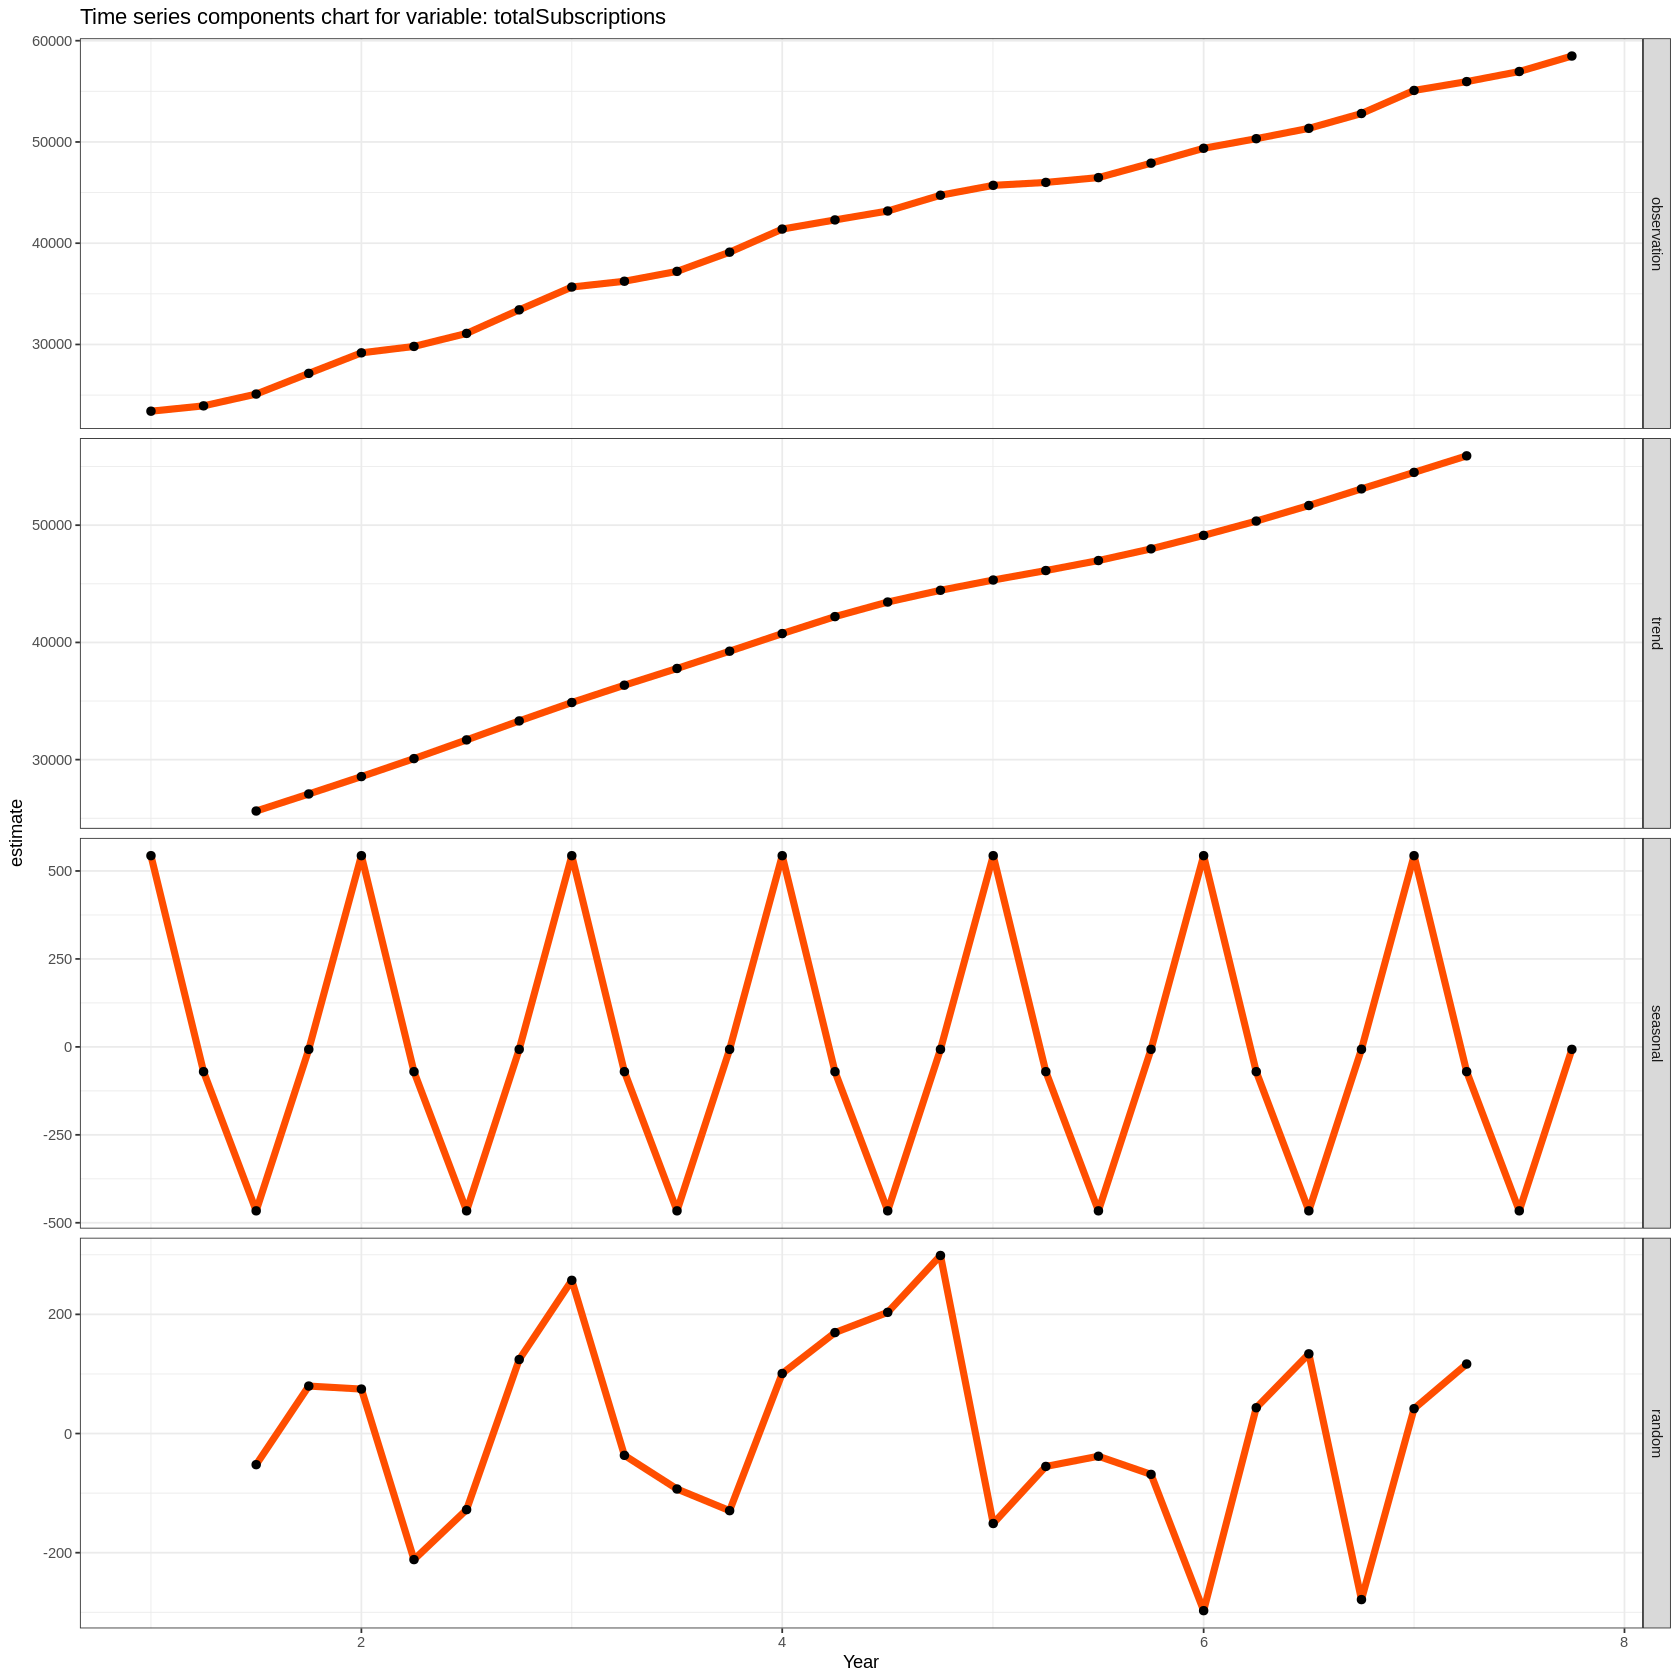

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'totalSubscriptions'

# Criando um gráfico de cada um dos componentes que constituem a série temporal.

tsDecomposePlot(col, dt, type = 'additive')

Ao analisar o gráfico de sazonalidade da variável **totalSubscriptions**, notamos que o **primeiro** trimestre é o de **maior sazonalidade** e o **terceiro** trimestre é o de **menor sazonalidade**.

#### **6.3.2 Variável paidSubscriptions**

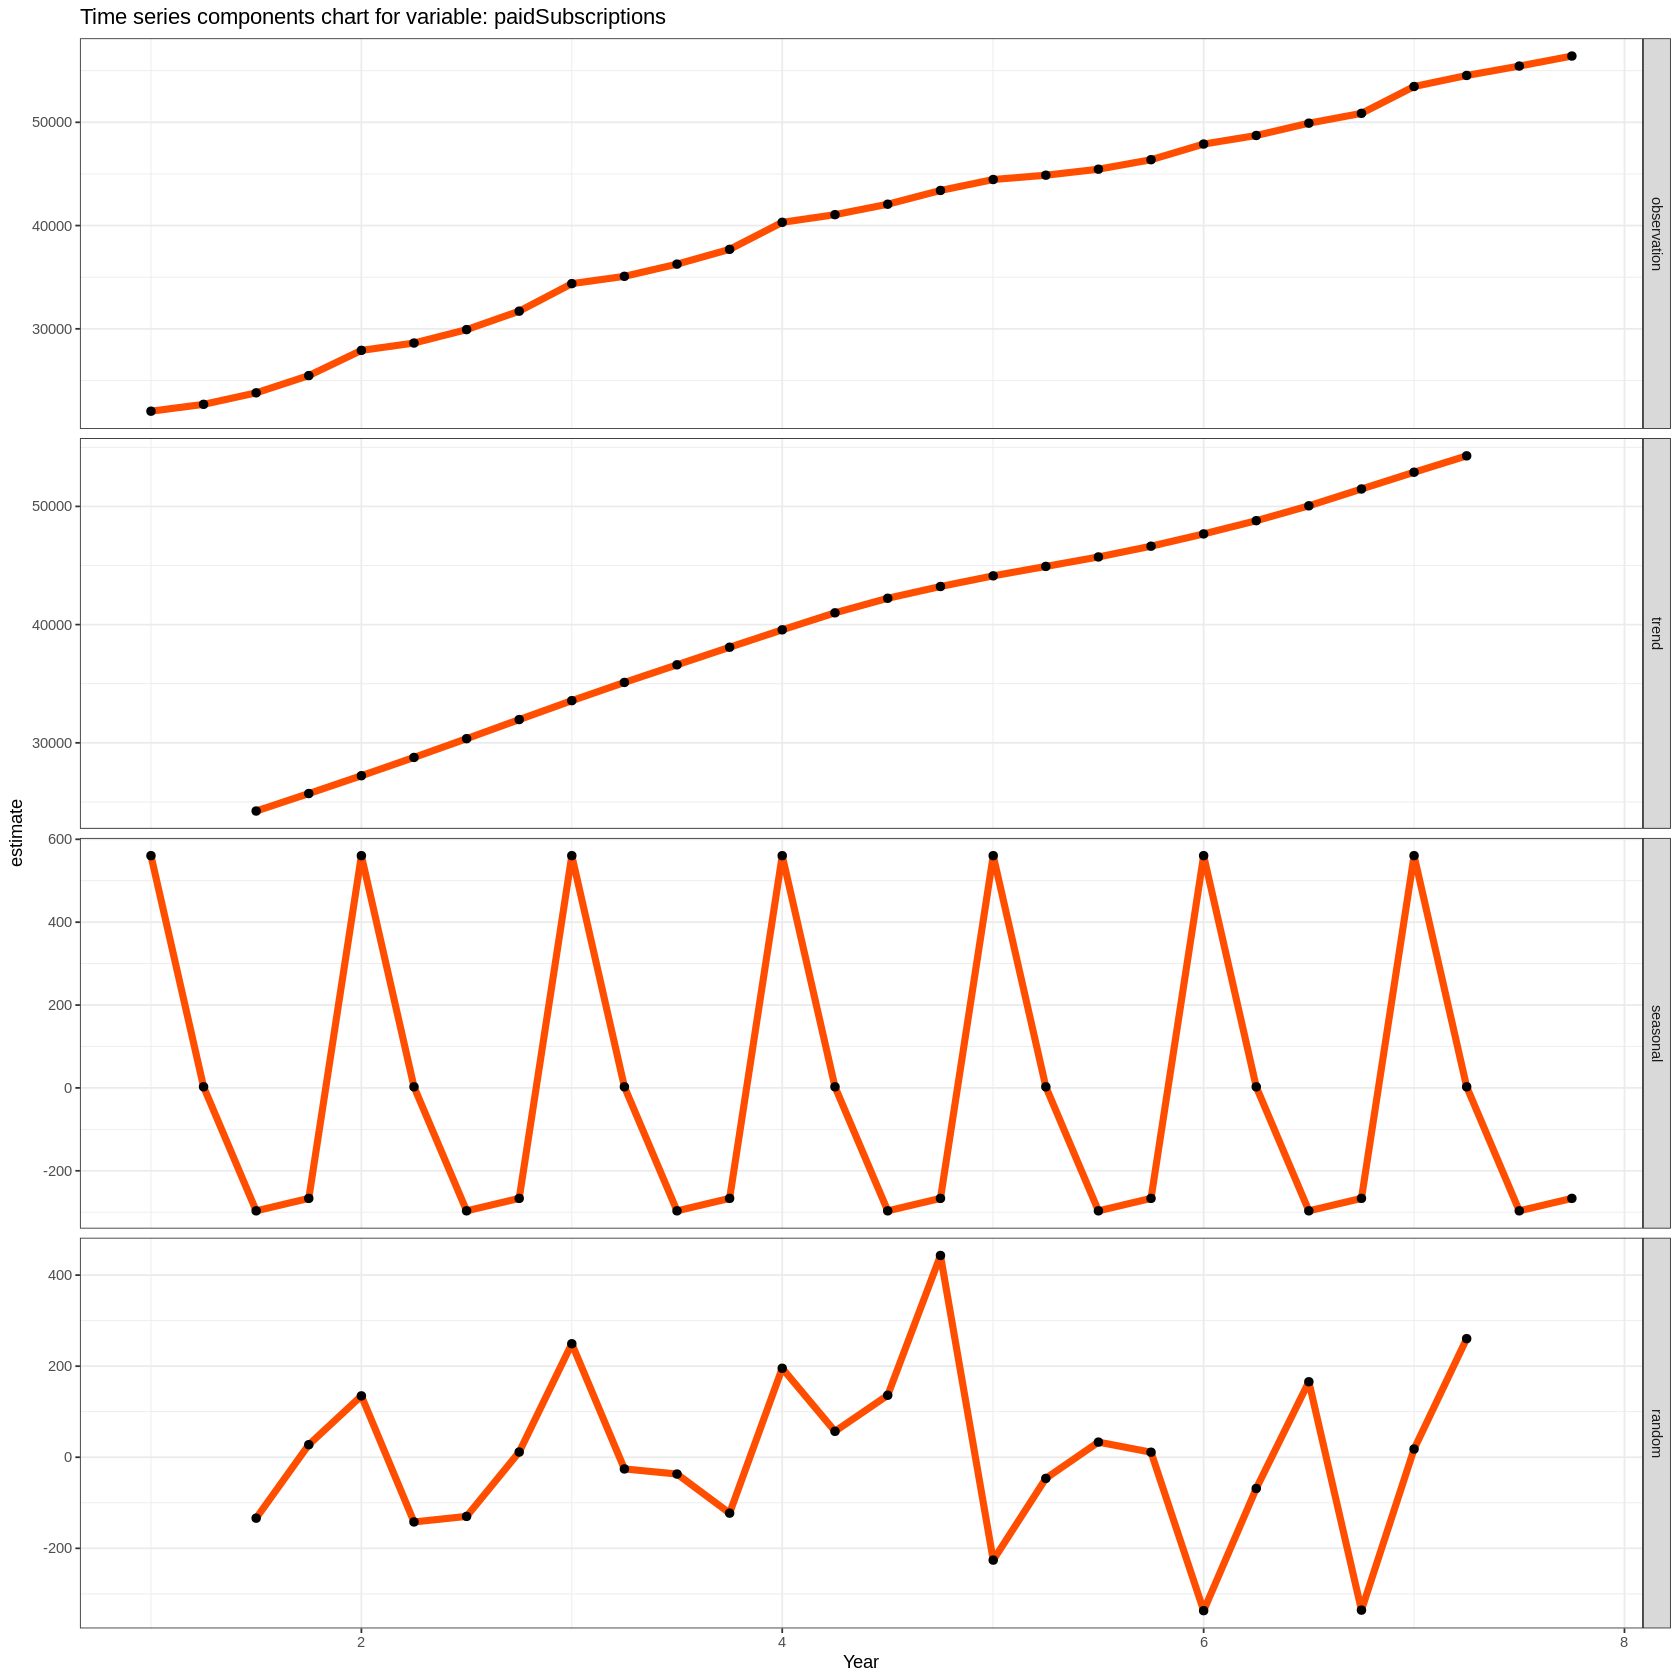

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'paidSubscriptions'

# Criando um gráfico de cada um dos componentes que constituem a série temporal.

tsDecomposePlot(col, dt, type = 'additive')

Ao analisar o gráfico de sazonalidade da variável **paidSubscriptions**, notamos que o **primeiro** trimestre é o de **maior sazonalidade** e o **terceiro** trimestre é o de **menor sazonalidade**.

#### **6.3.3 Variável freeTrails**

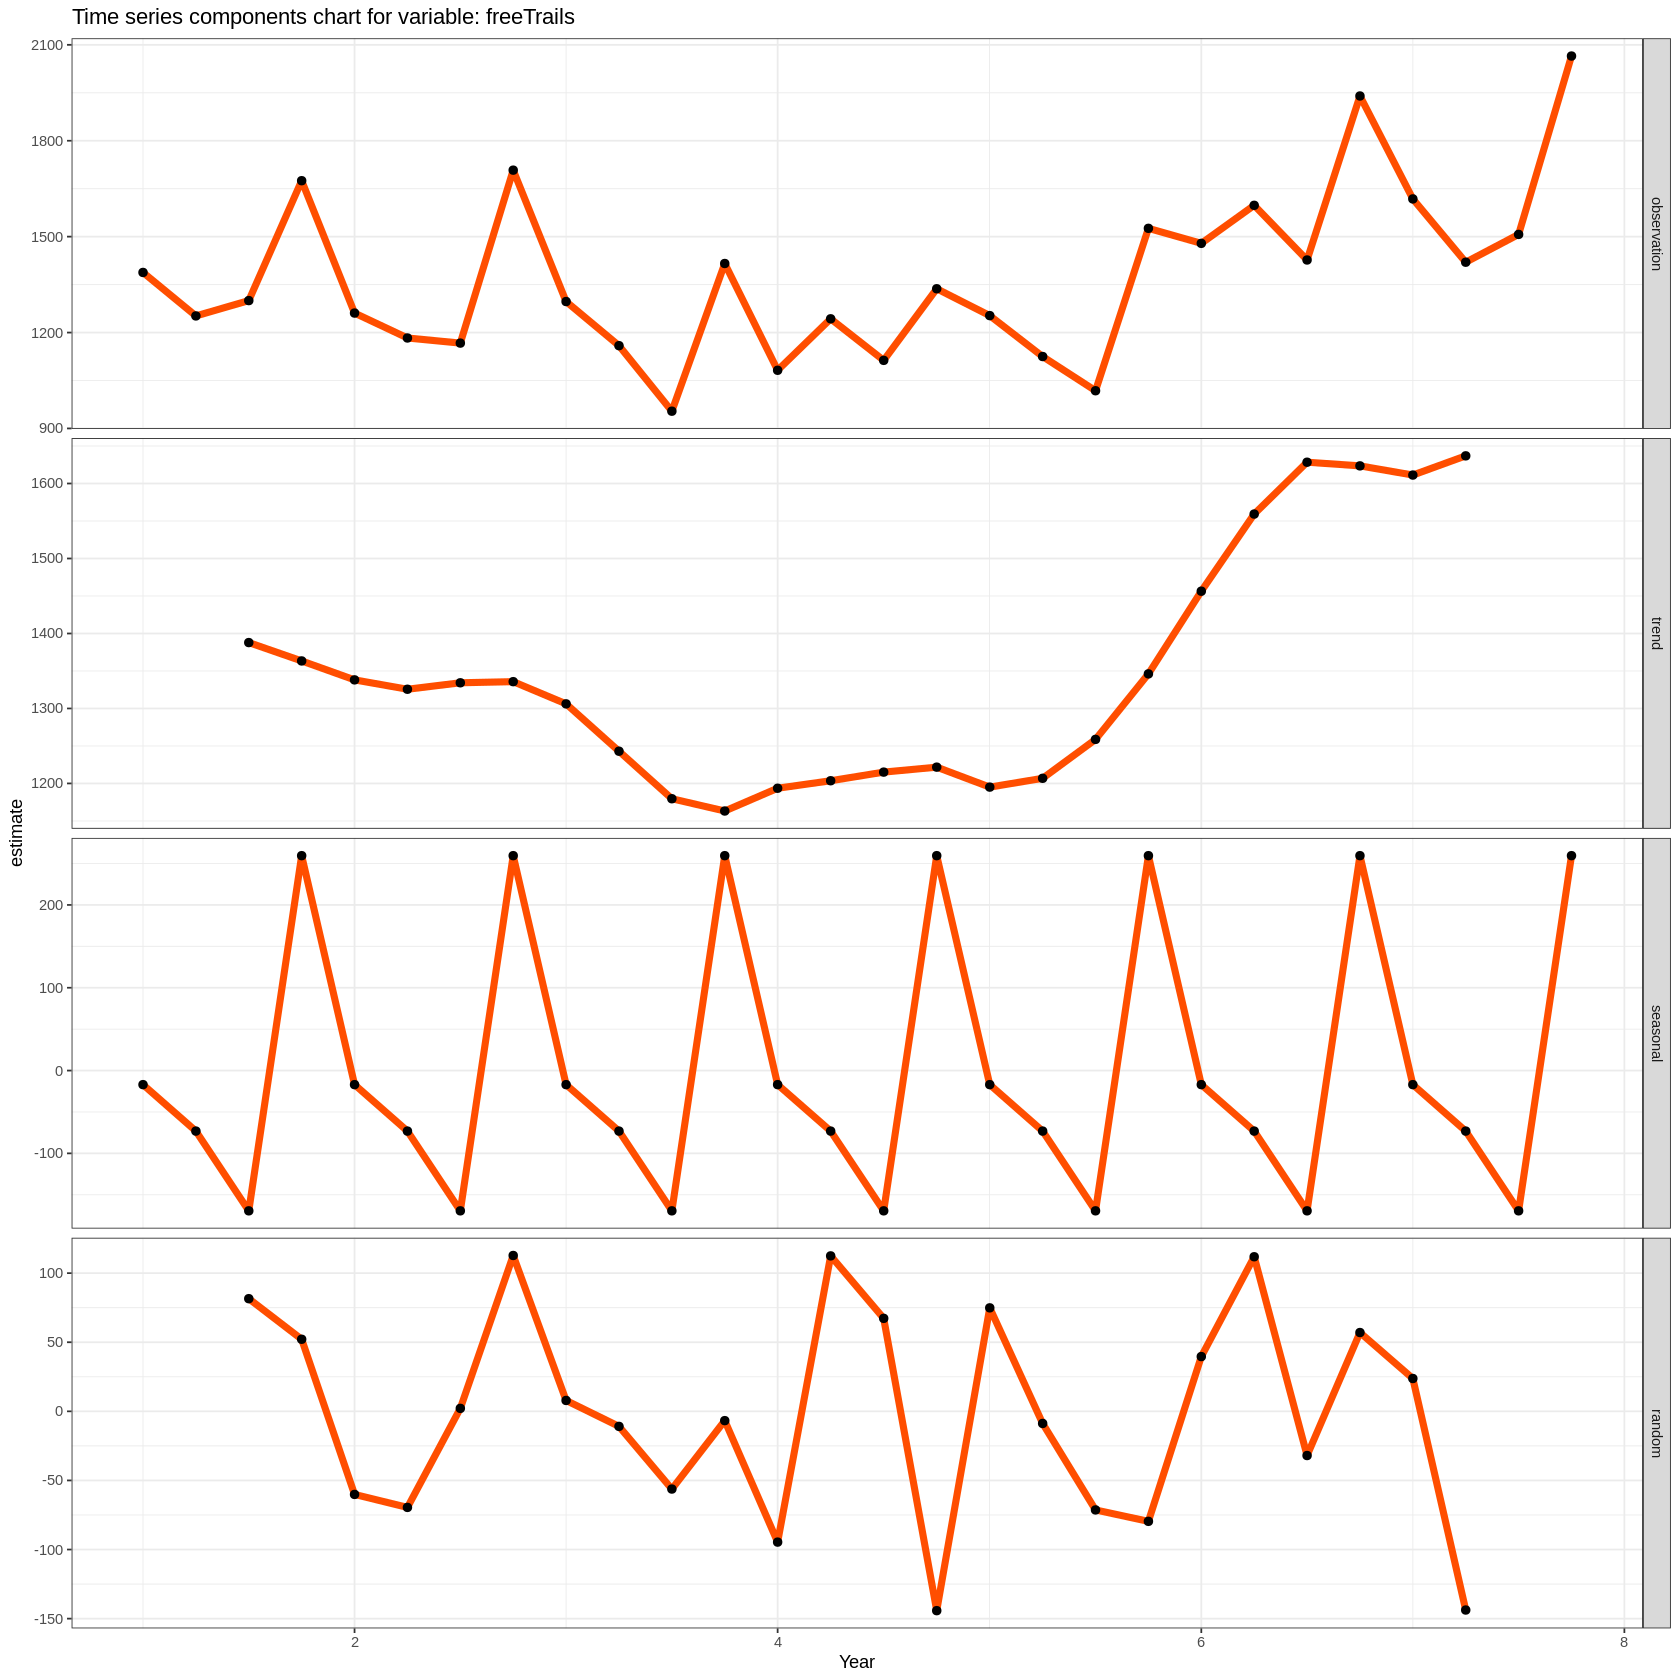

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'freeTrails'

# Criando um gráfico de cada um dos componentes que constituem a série temporal.

tsDecomposePlot(col, dt, type = 'additive')

Ao analisar o gráfico de sazonalidade da variável **freeTrails**, notamos que o **quarto** trimestre é o de **maior sazonalidade** e o **terceiro** trimestre é o de **menor sazonalidade**.

#### **6.3.4 Variável revenue**

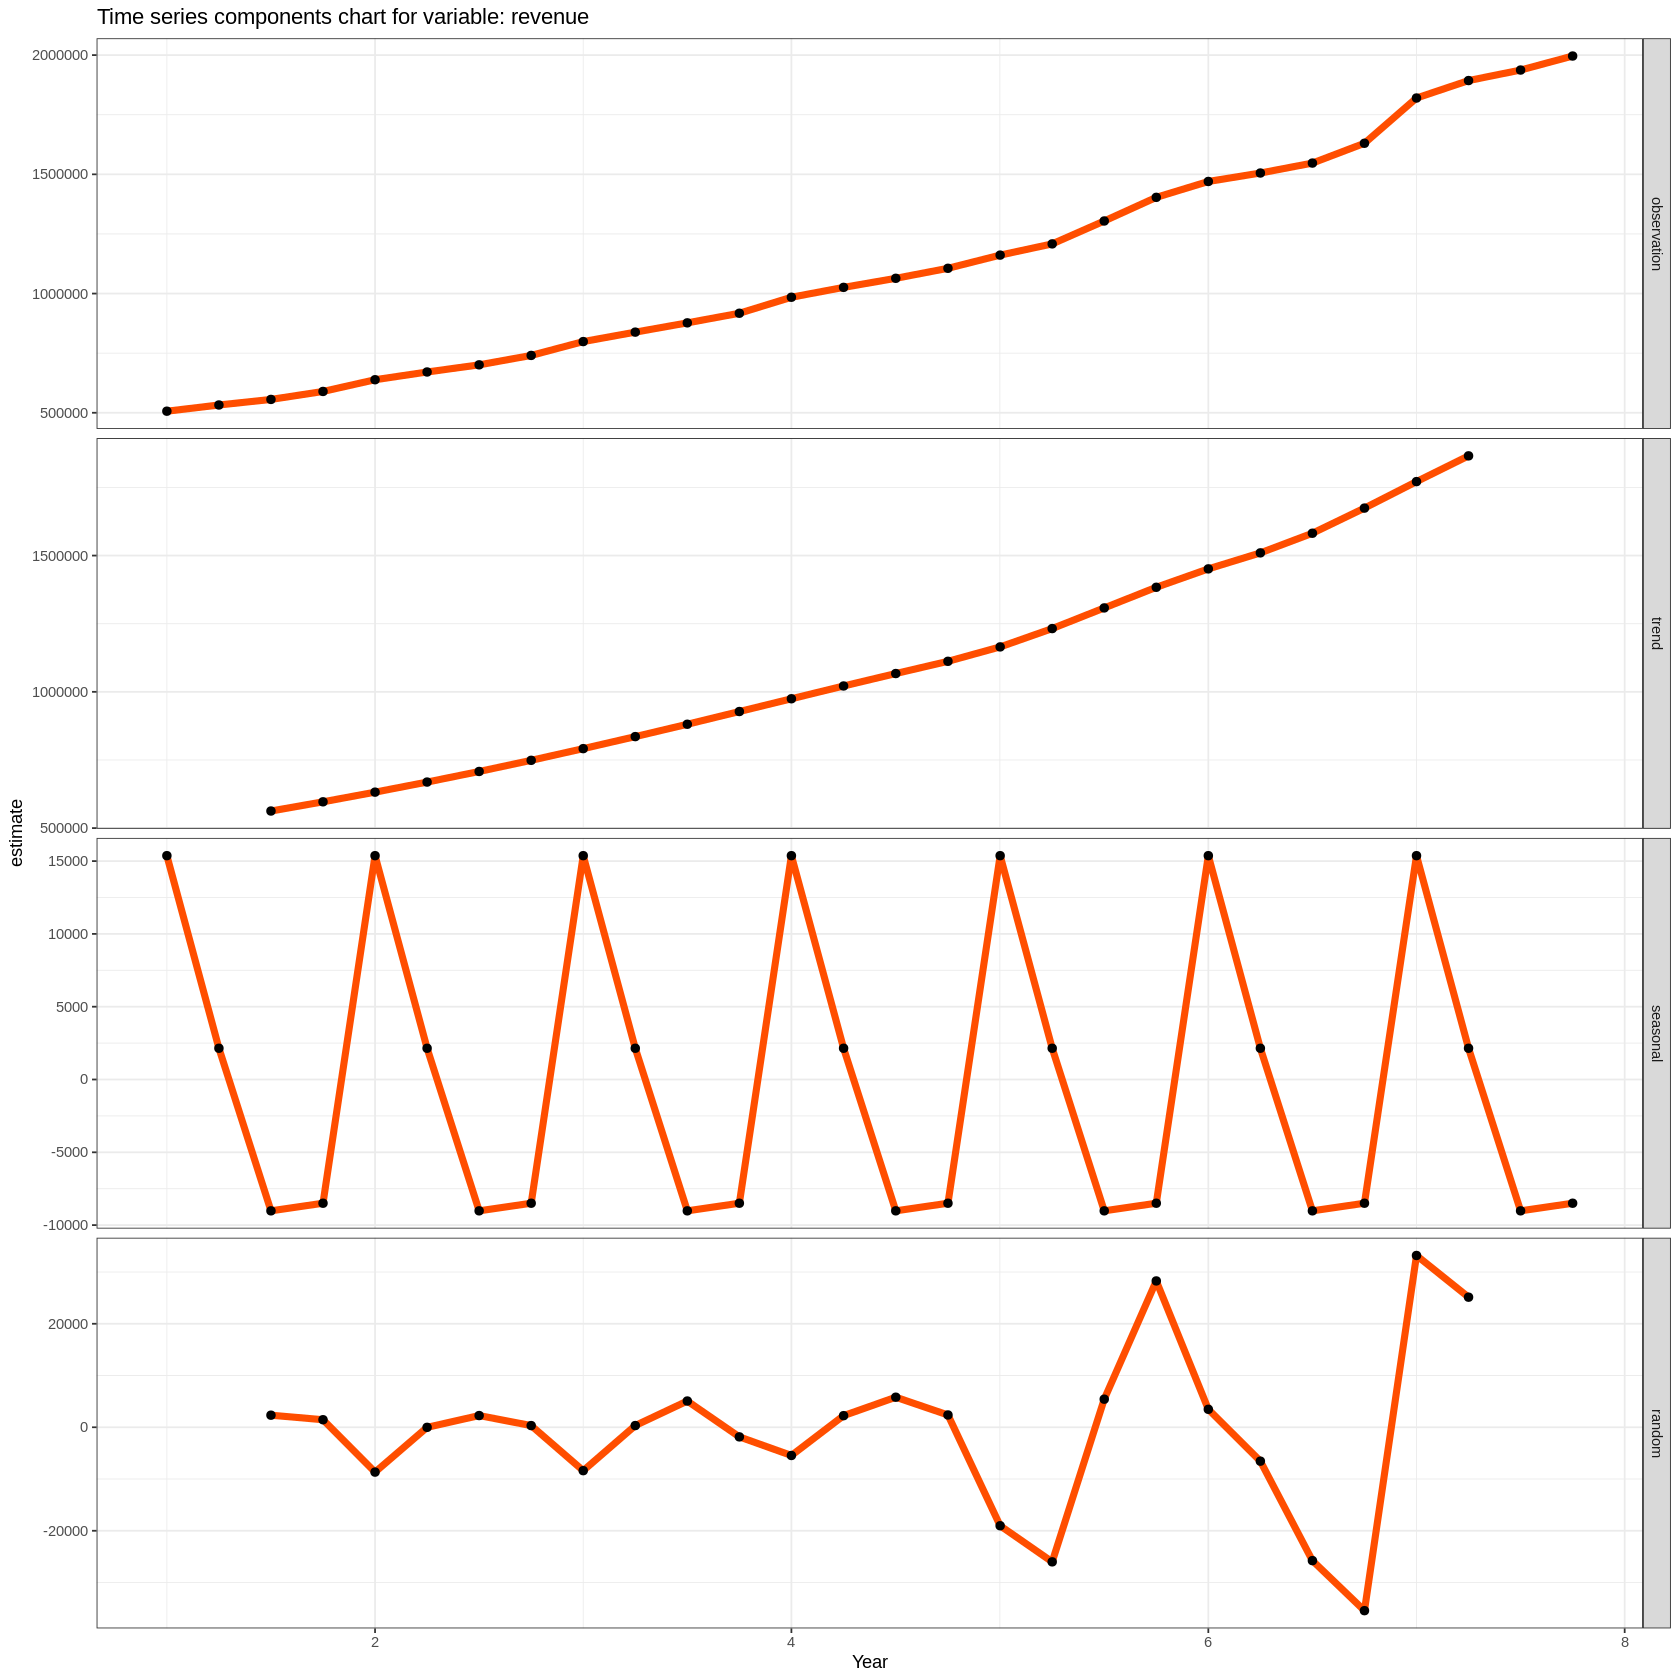

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'revenue'

# Criando um gráfico de cada um dos componentes que constituem a série temporal.

tsDecomposePlot(col, dt, type = 'additive')

Ao analisar o gráfico de sazonalidade da variável **revenue**, notamos que o **primeiro** trimestre é o de **maior sazonalidade** e o **terceiro** trimestre é o de **menor sazonalidade**.

#### **6.3.5 Variável costOfRevenues**

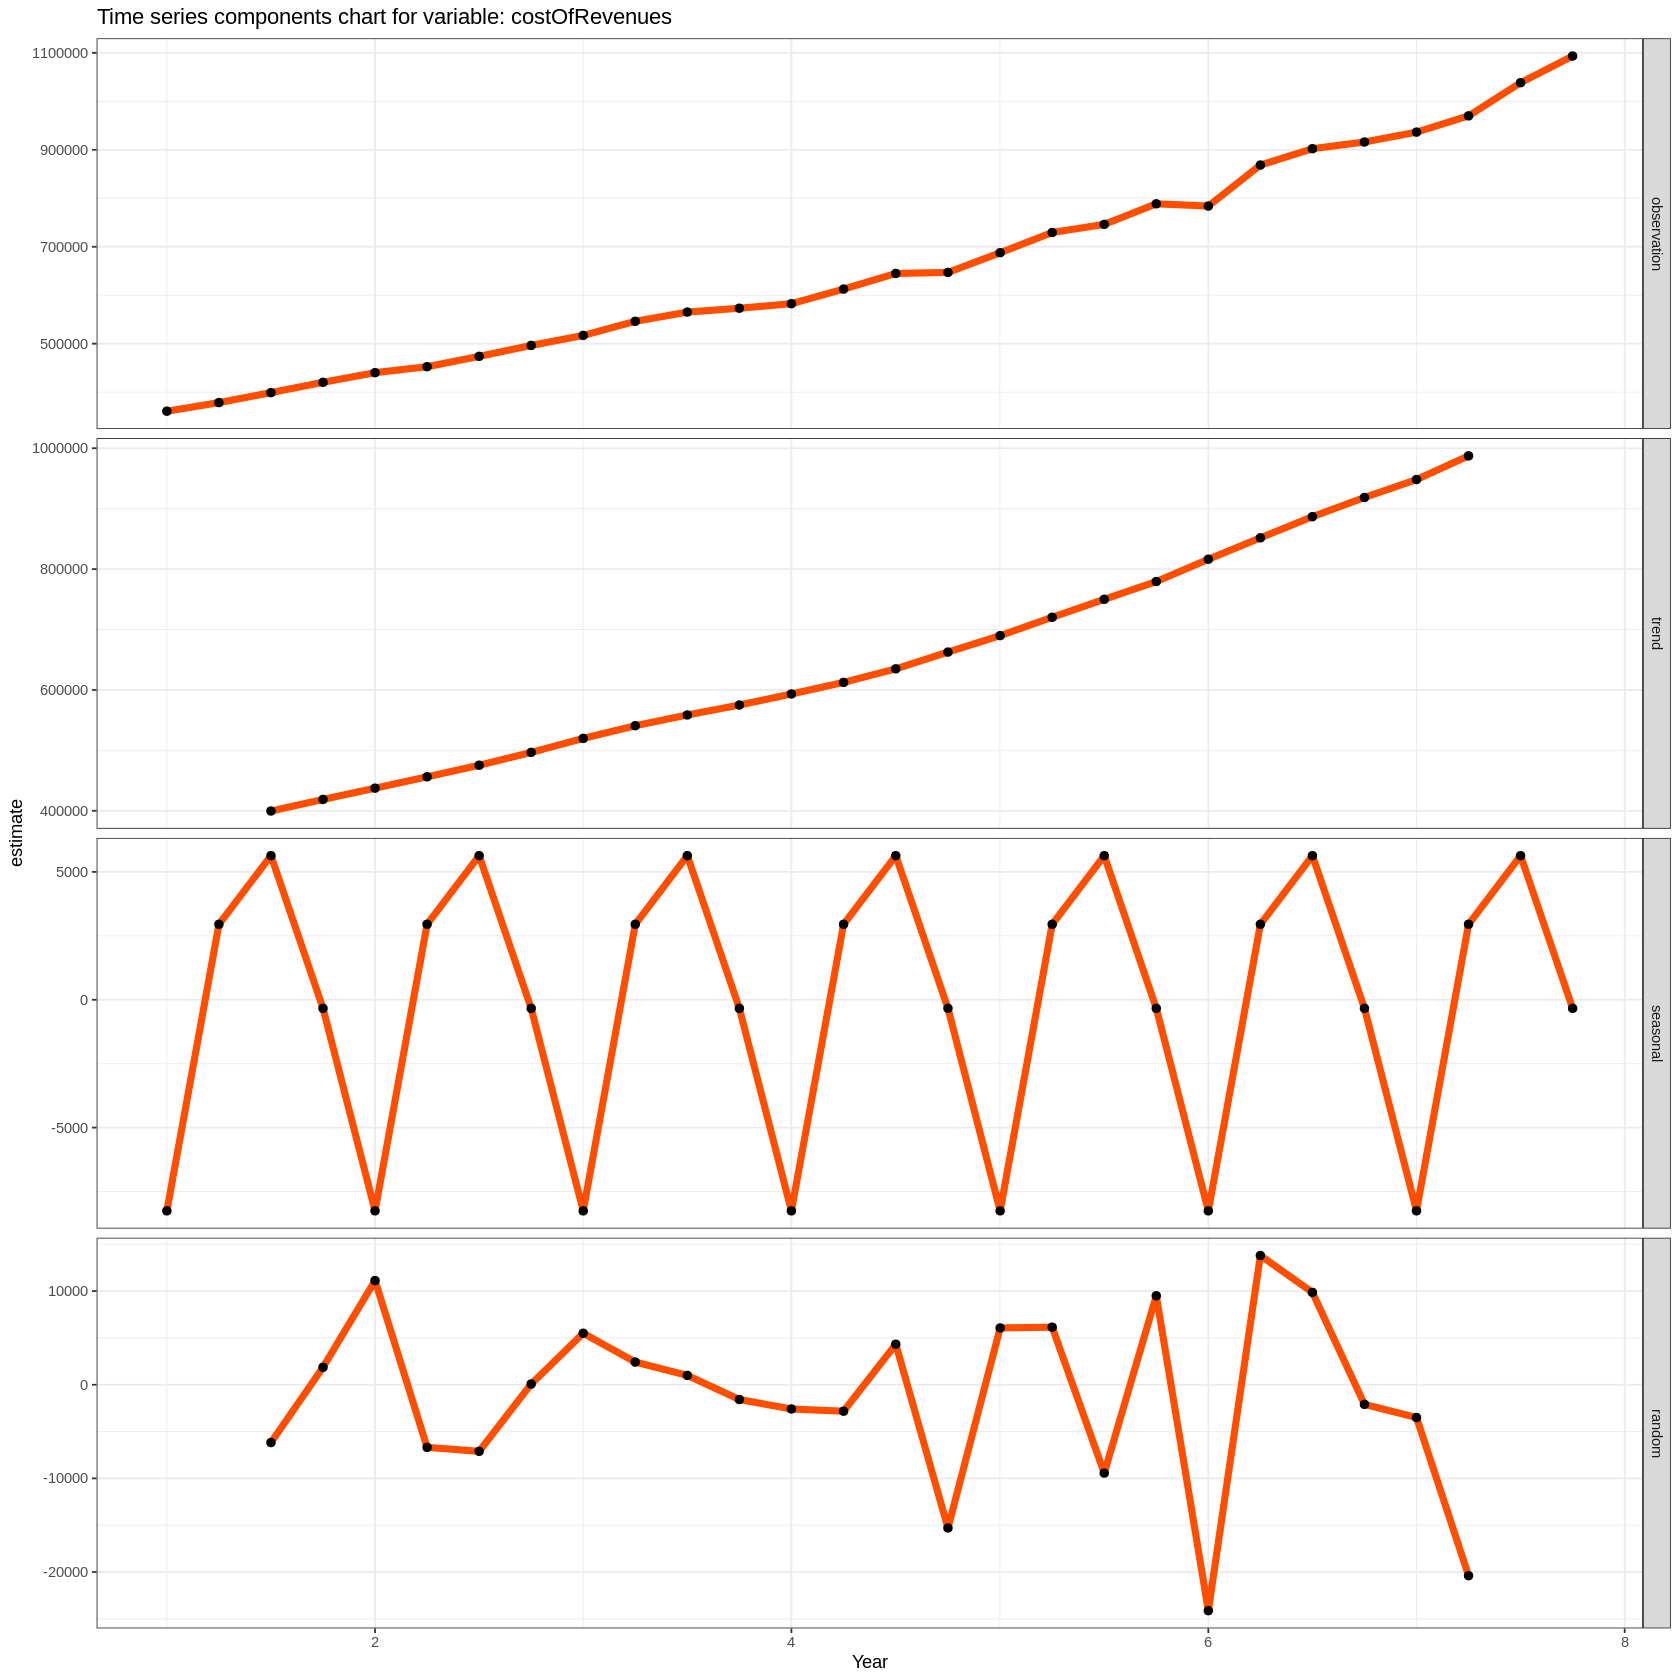

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'costOfRevenues'

# Criando um gráfico de cada um dos componentes que constituem a série temporal.

tsDecomposePlot(col, dt, type = 'additive')

Ao analisar o gráfico de sazonalidade da variável **costOfRevenues**, notamos que o **terceiro** trimestre é o de **maior sazonalidade** e o **primeiro** trimestre é o de **menor sazonalidade**.

#### **6.3.6 Variável marketing**

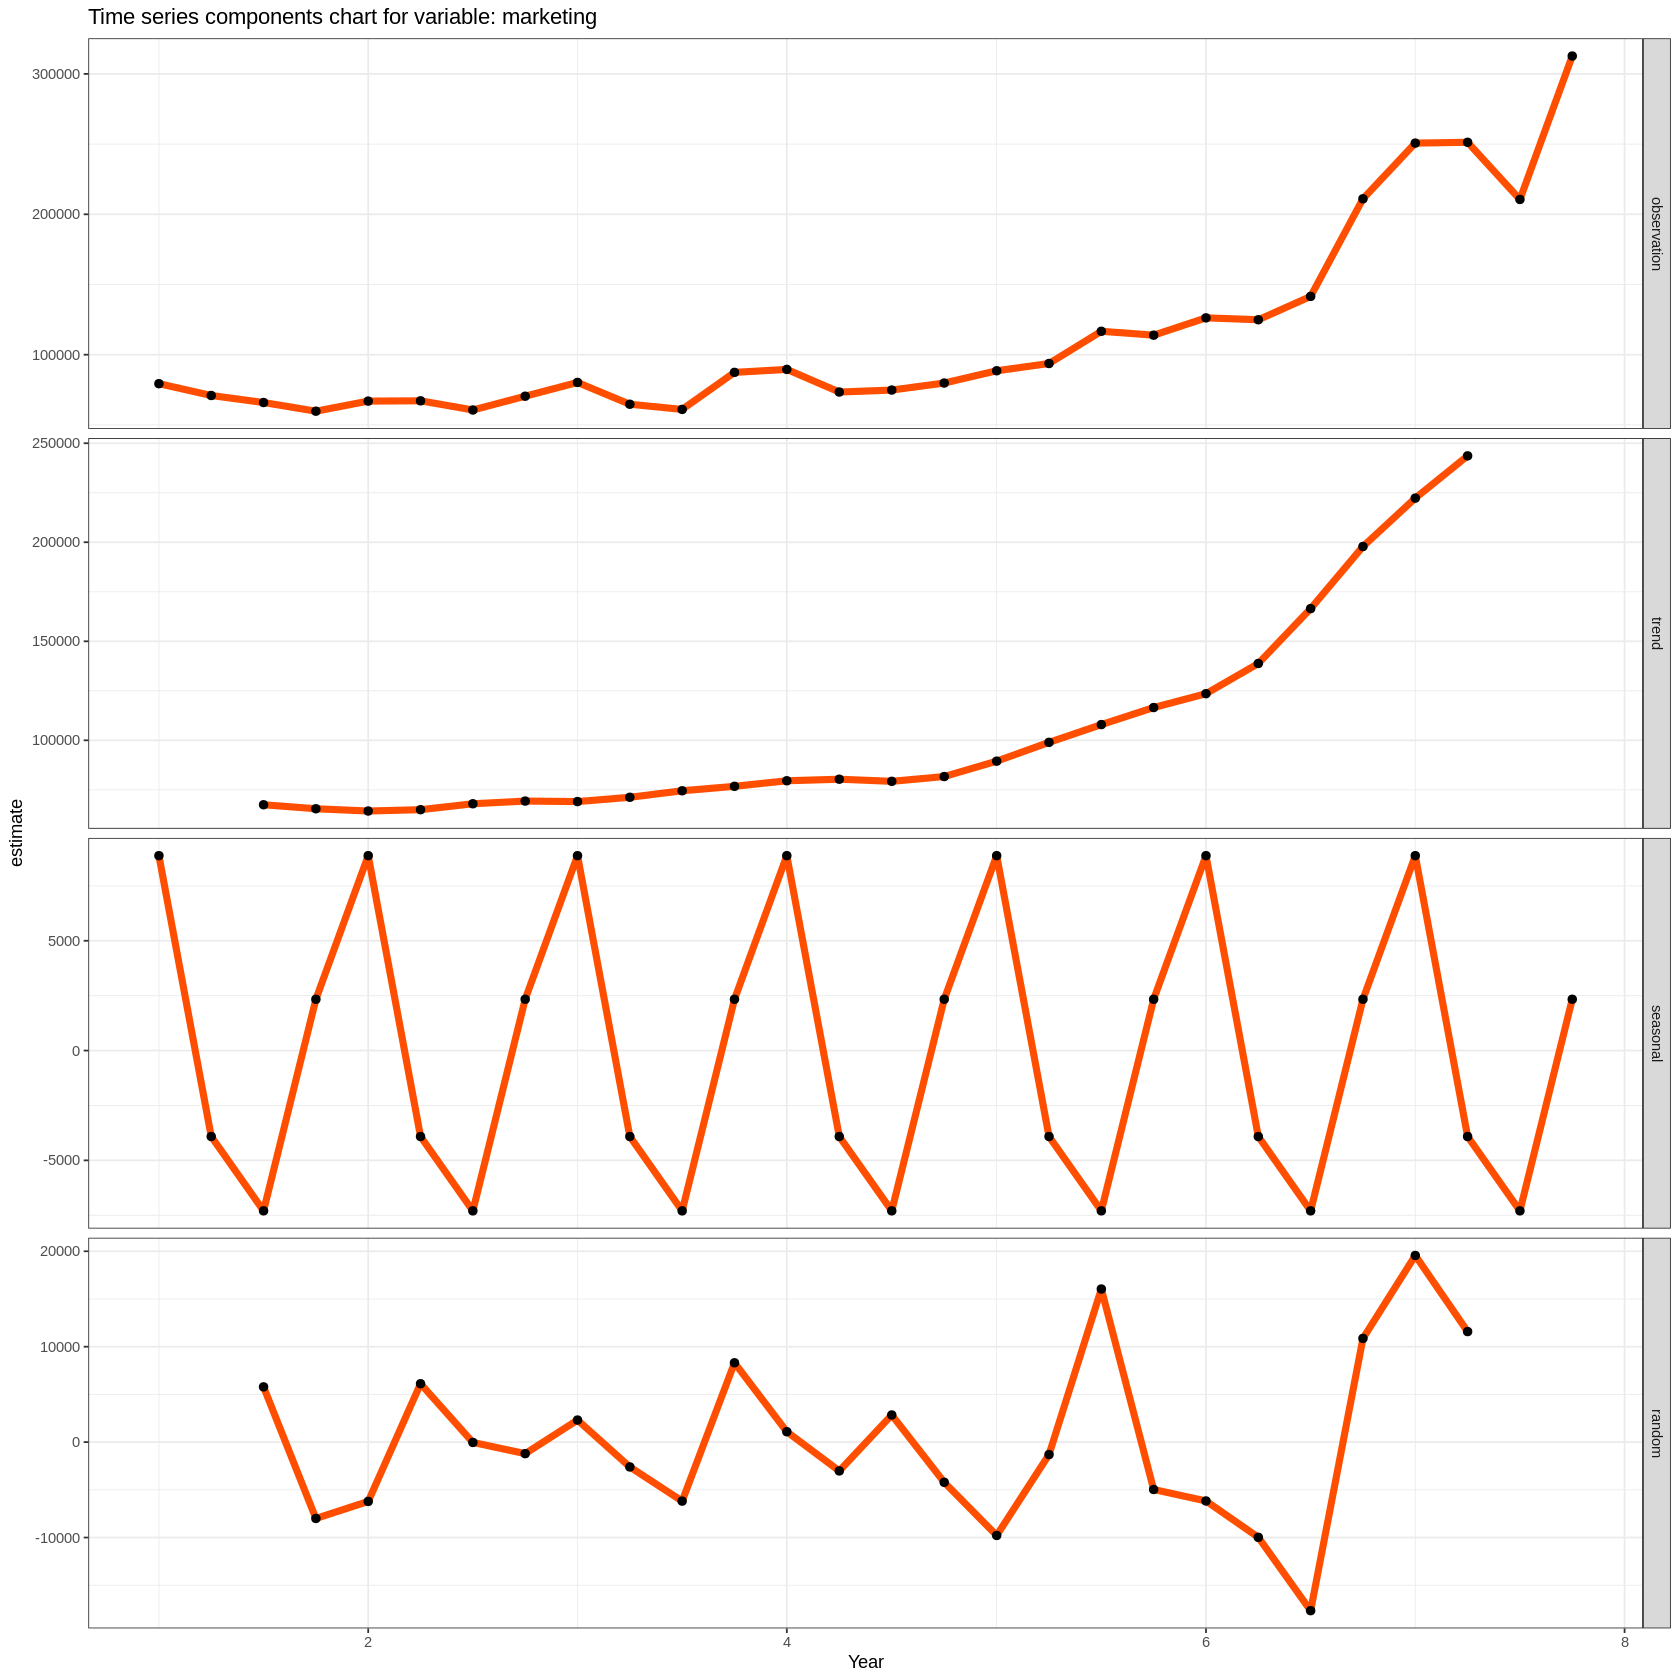

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'marketing'

# Criando um gráfico de cada um dos componentes que constituem a série temporal.

tsDecomposePlot(col, dt, type = 'additive')

Ao analisar o gráfico de sazonalidade da variável **marketing**, notamos que o **primeiro** trimestre é o de **maior sazonalidade** e o **terceiro** trimestre é o de **menor sazonalidade**.

#### **6.3.7 Variável contributionProfit**

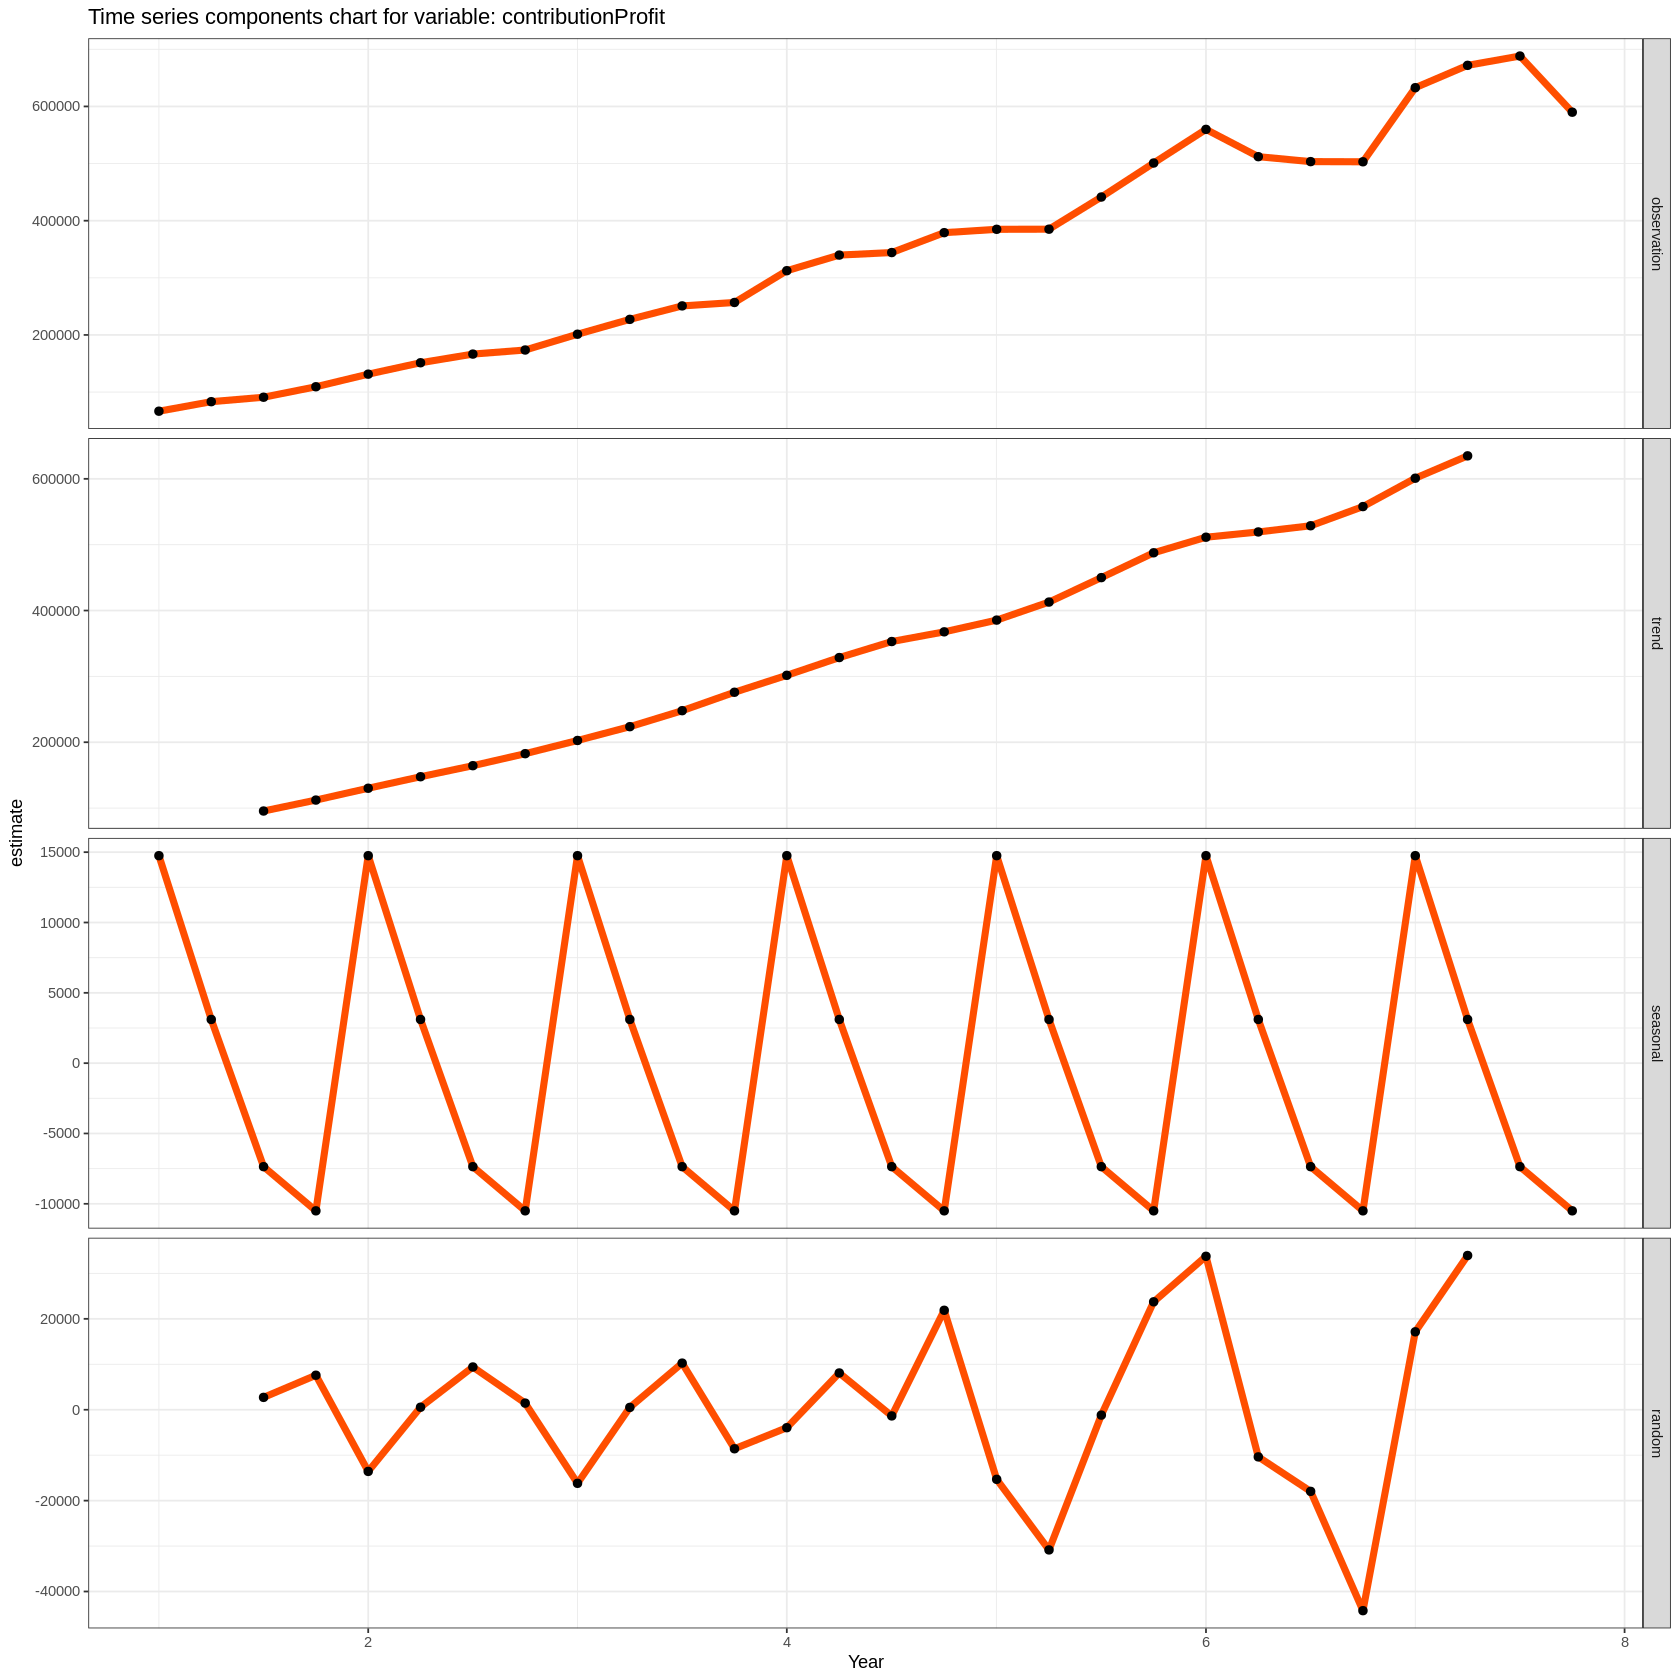

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'contributionProfit'

# Criando um gráfico de cada um dos componentes que constituem a série temporal.

tsDecomposePlot(col, dt, type = 'additive')

Ao analisar o gráfico de sazonalidade da variável **contributionProfit**, notamos que o **primeiro** trimestre é o de **maior sazonalidade** e o **quarto** trimestre é o de **menor sazonalidade**.

#### **6.3.8 Variável contributionMargin**

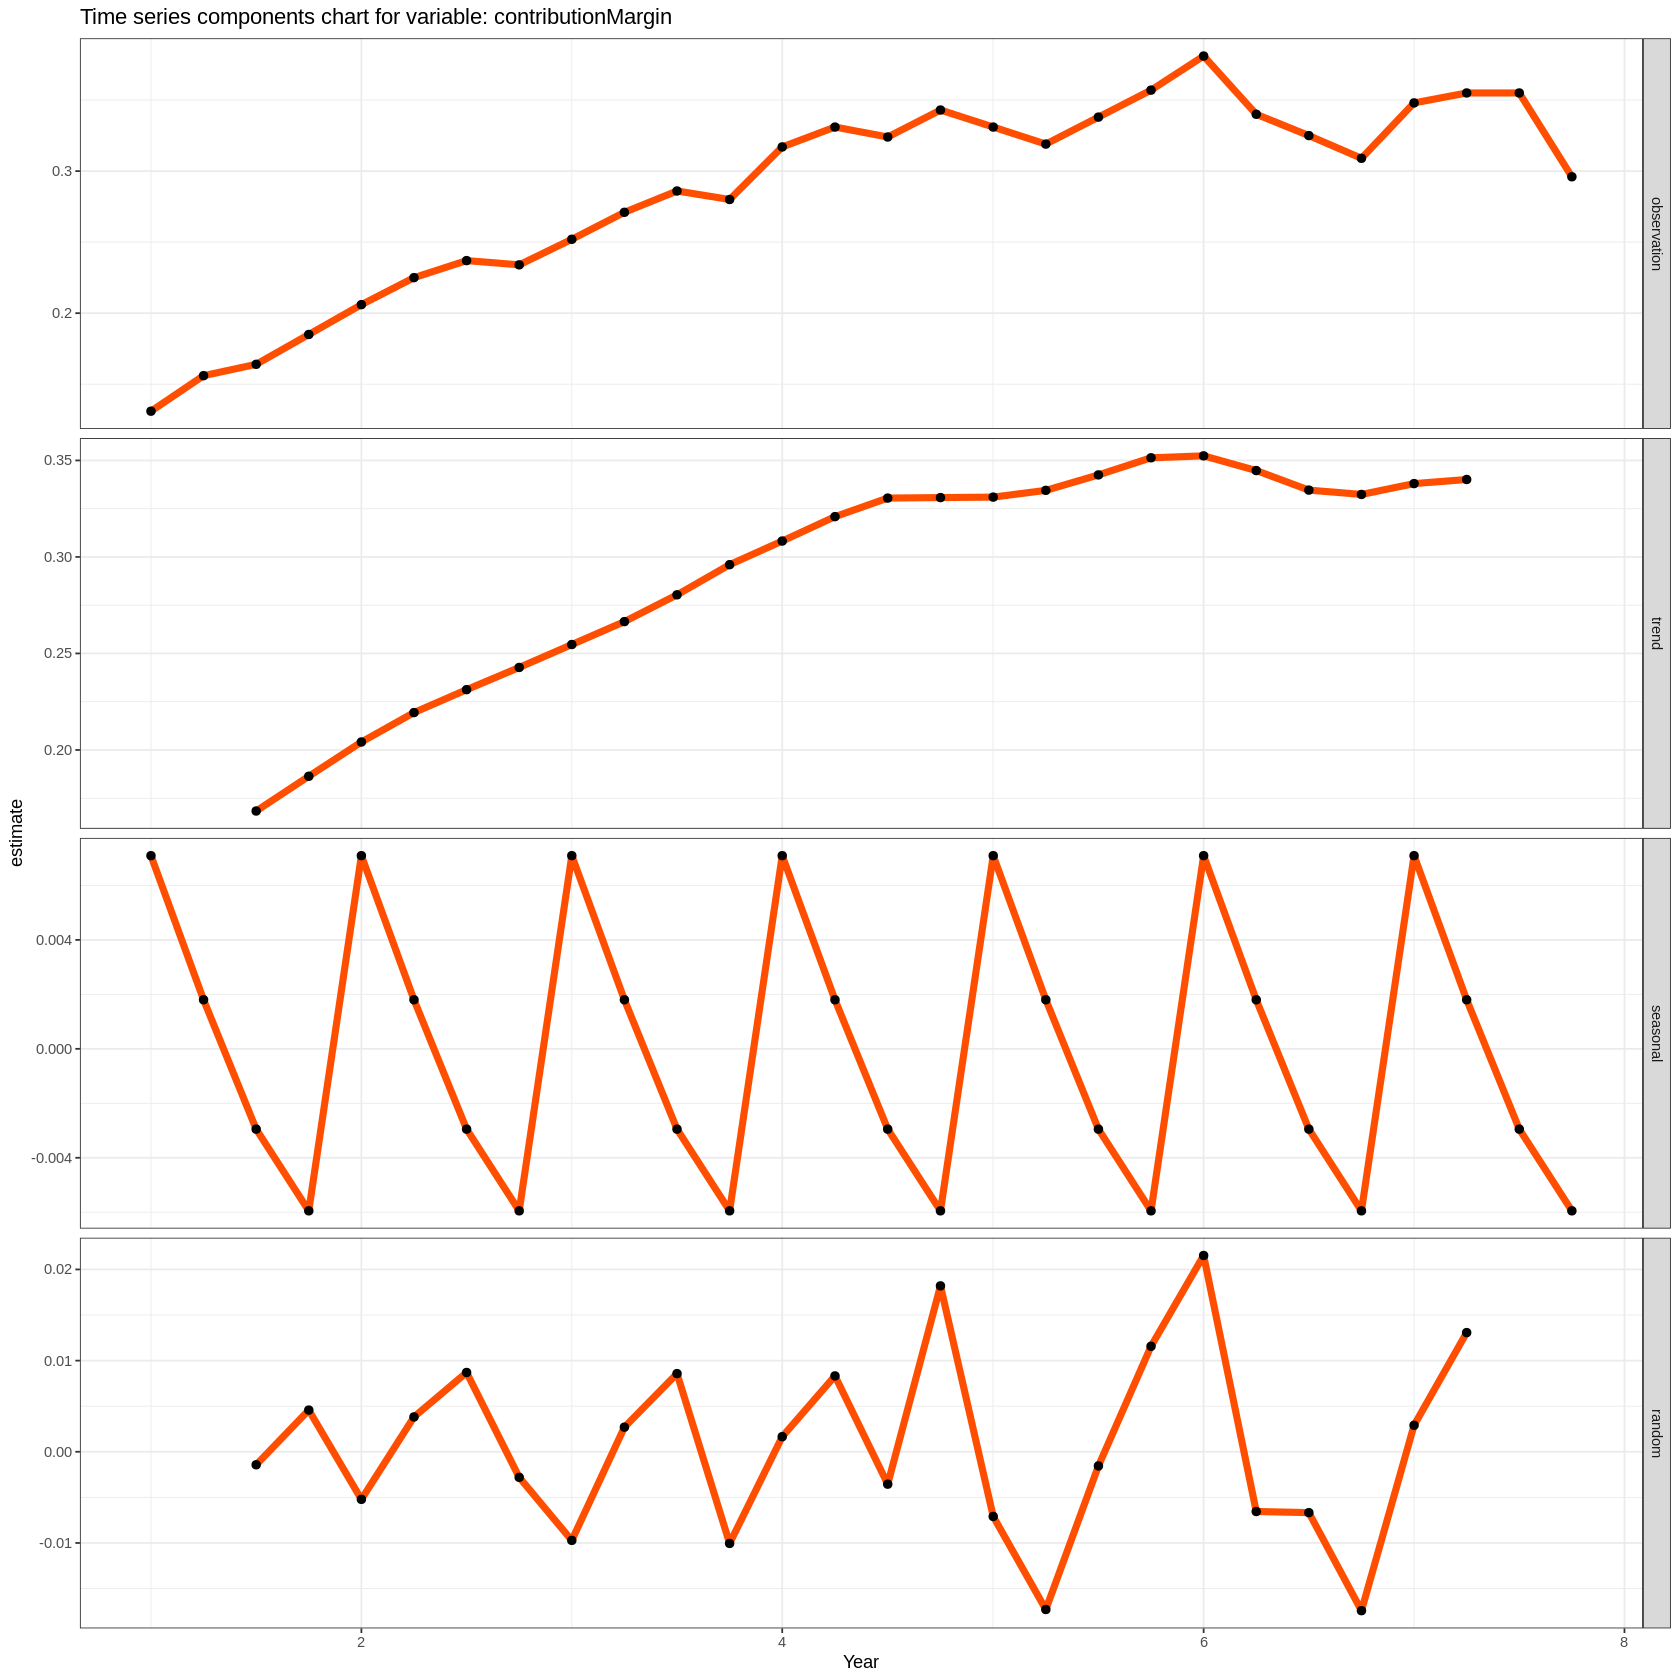

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'contributionMargin'

# Criando um gráfico de cada um dos componentes que constituem a série temporal.

tsDecomposePlot(col, dt, type = 'additive')

Ao analisar o gráfico de sazonalidade da variável **contributionMargin**, notamos que o **primeiro** trimestre é o de **maior sazonalidade** e o **quarto** trimestre é o de **menor sazonalidade**.

#### **6.3.9 Variável costPerCustomer**

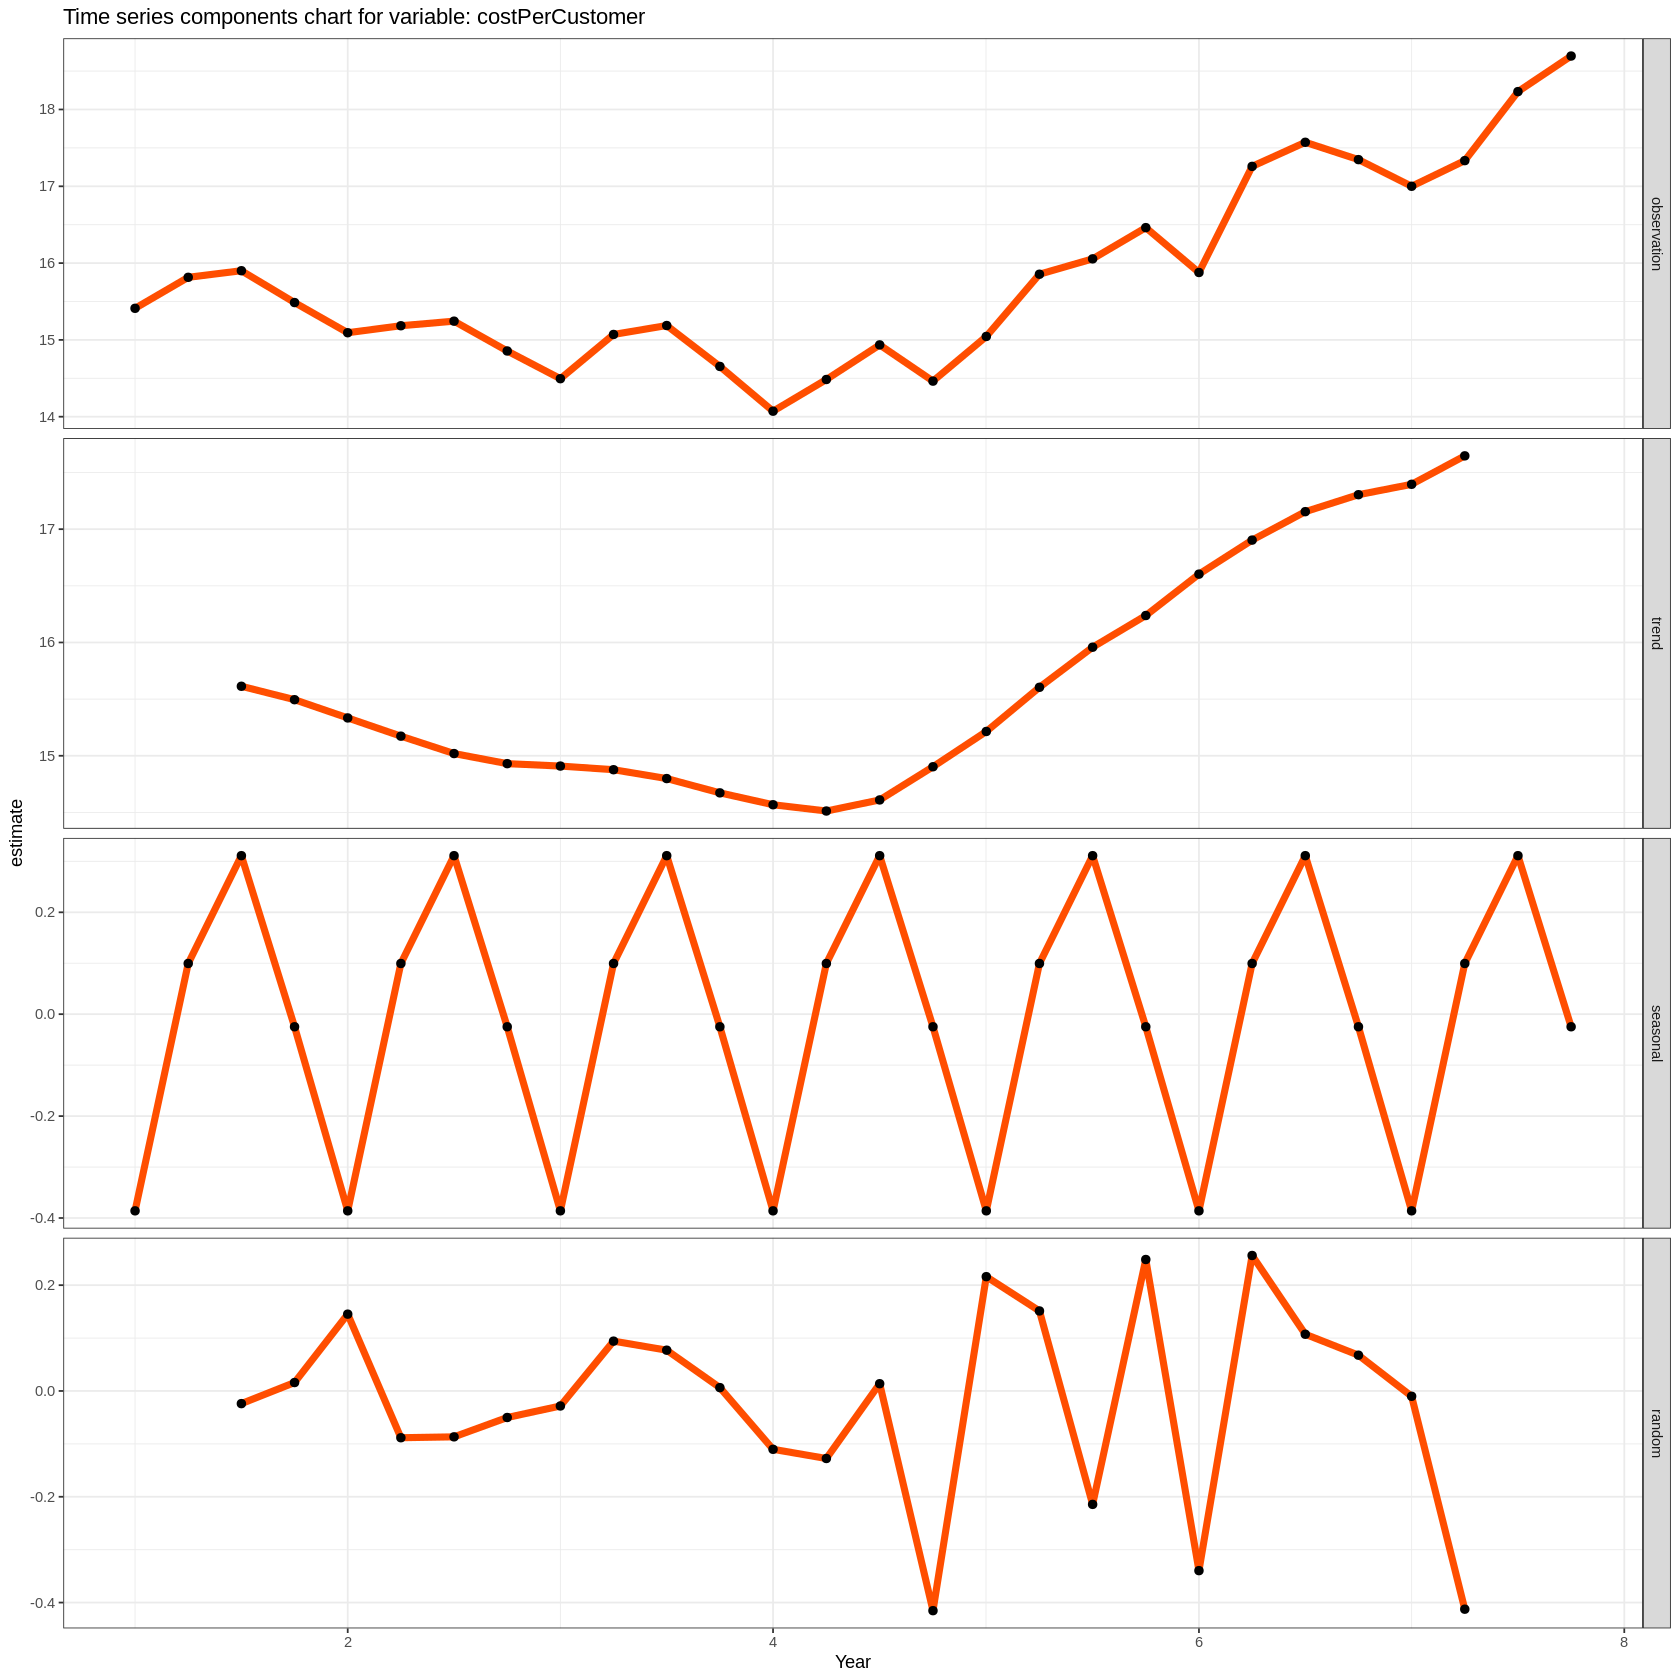

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'costPerCustomer'

# Criando um gráfico de cada um dos componentes que constituem a série temporal.

tsDecomposePlot(col, dt, type = 'additive')

Ao analisar o gráfico de sazonalidade da variável **costPerCustomer**, notamos que o **terceiro** trimestre é o de **maior sazonalidade** e o **primeiro** trimestre é o de **menor sazonalidade**.

#### **6.3.10 Variável revenuePerCustomer**

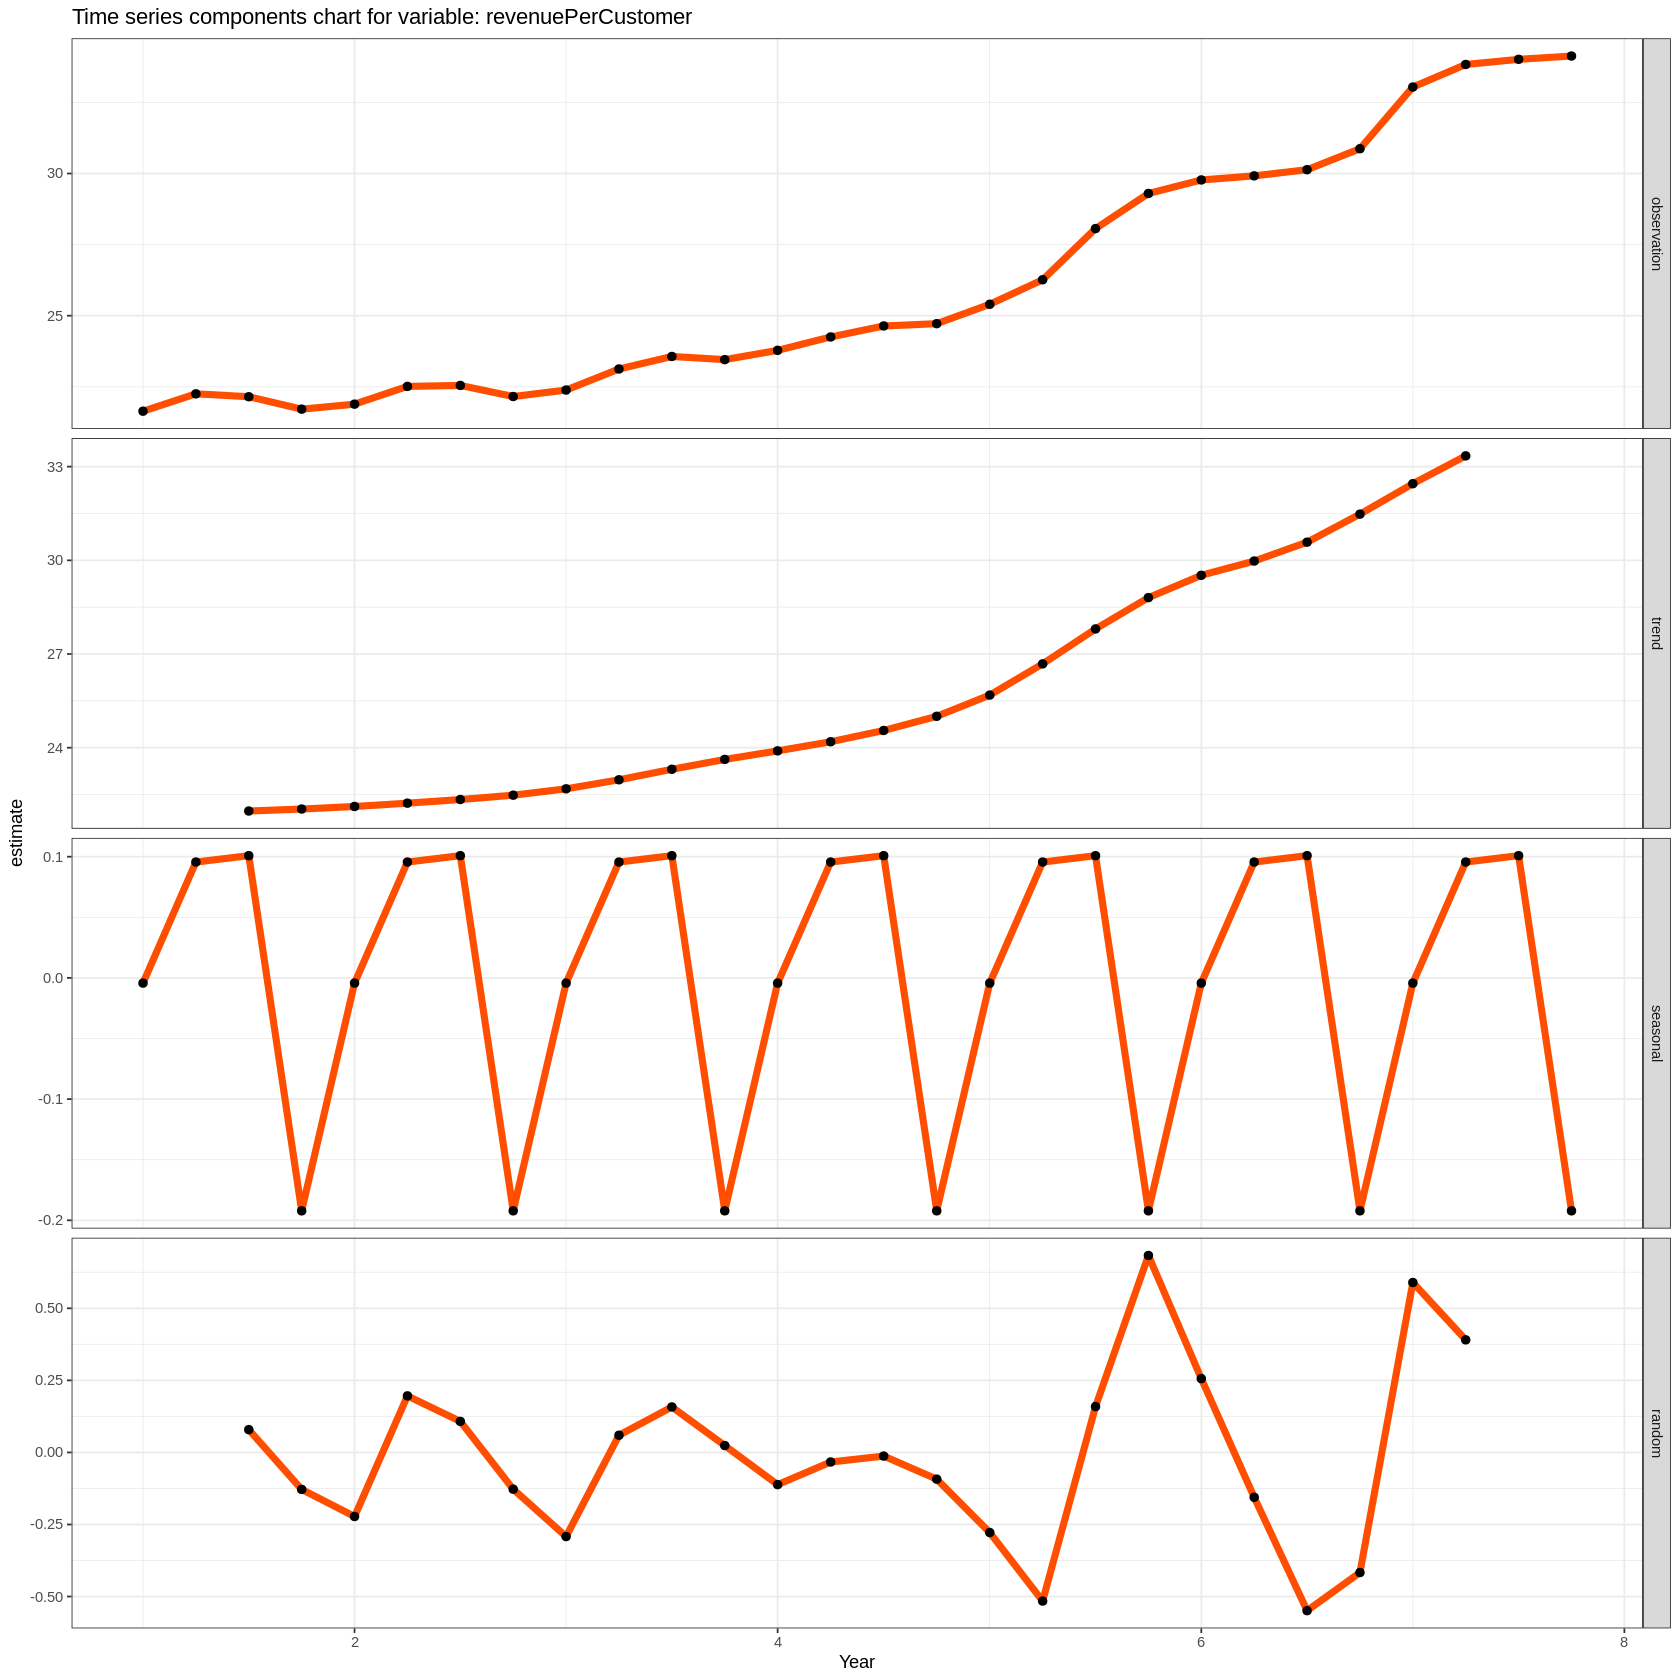

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'revenuePerCustomer'

# Criando um gráfico de cada um dos componentes que constituem a série temporal.

tsDecomposePlot(col, dt, type = 'additive')

Ao analisar o gráfico de sazonalidade da variável **revenuePerCustomer**, notamos que o **terceiro** trimestre é o de **maior sazonalidade** e o **quarto** trimestre é o de **menor sazonalidade**.

#### **6.3.11 Variável earningsPerCustomer**

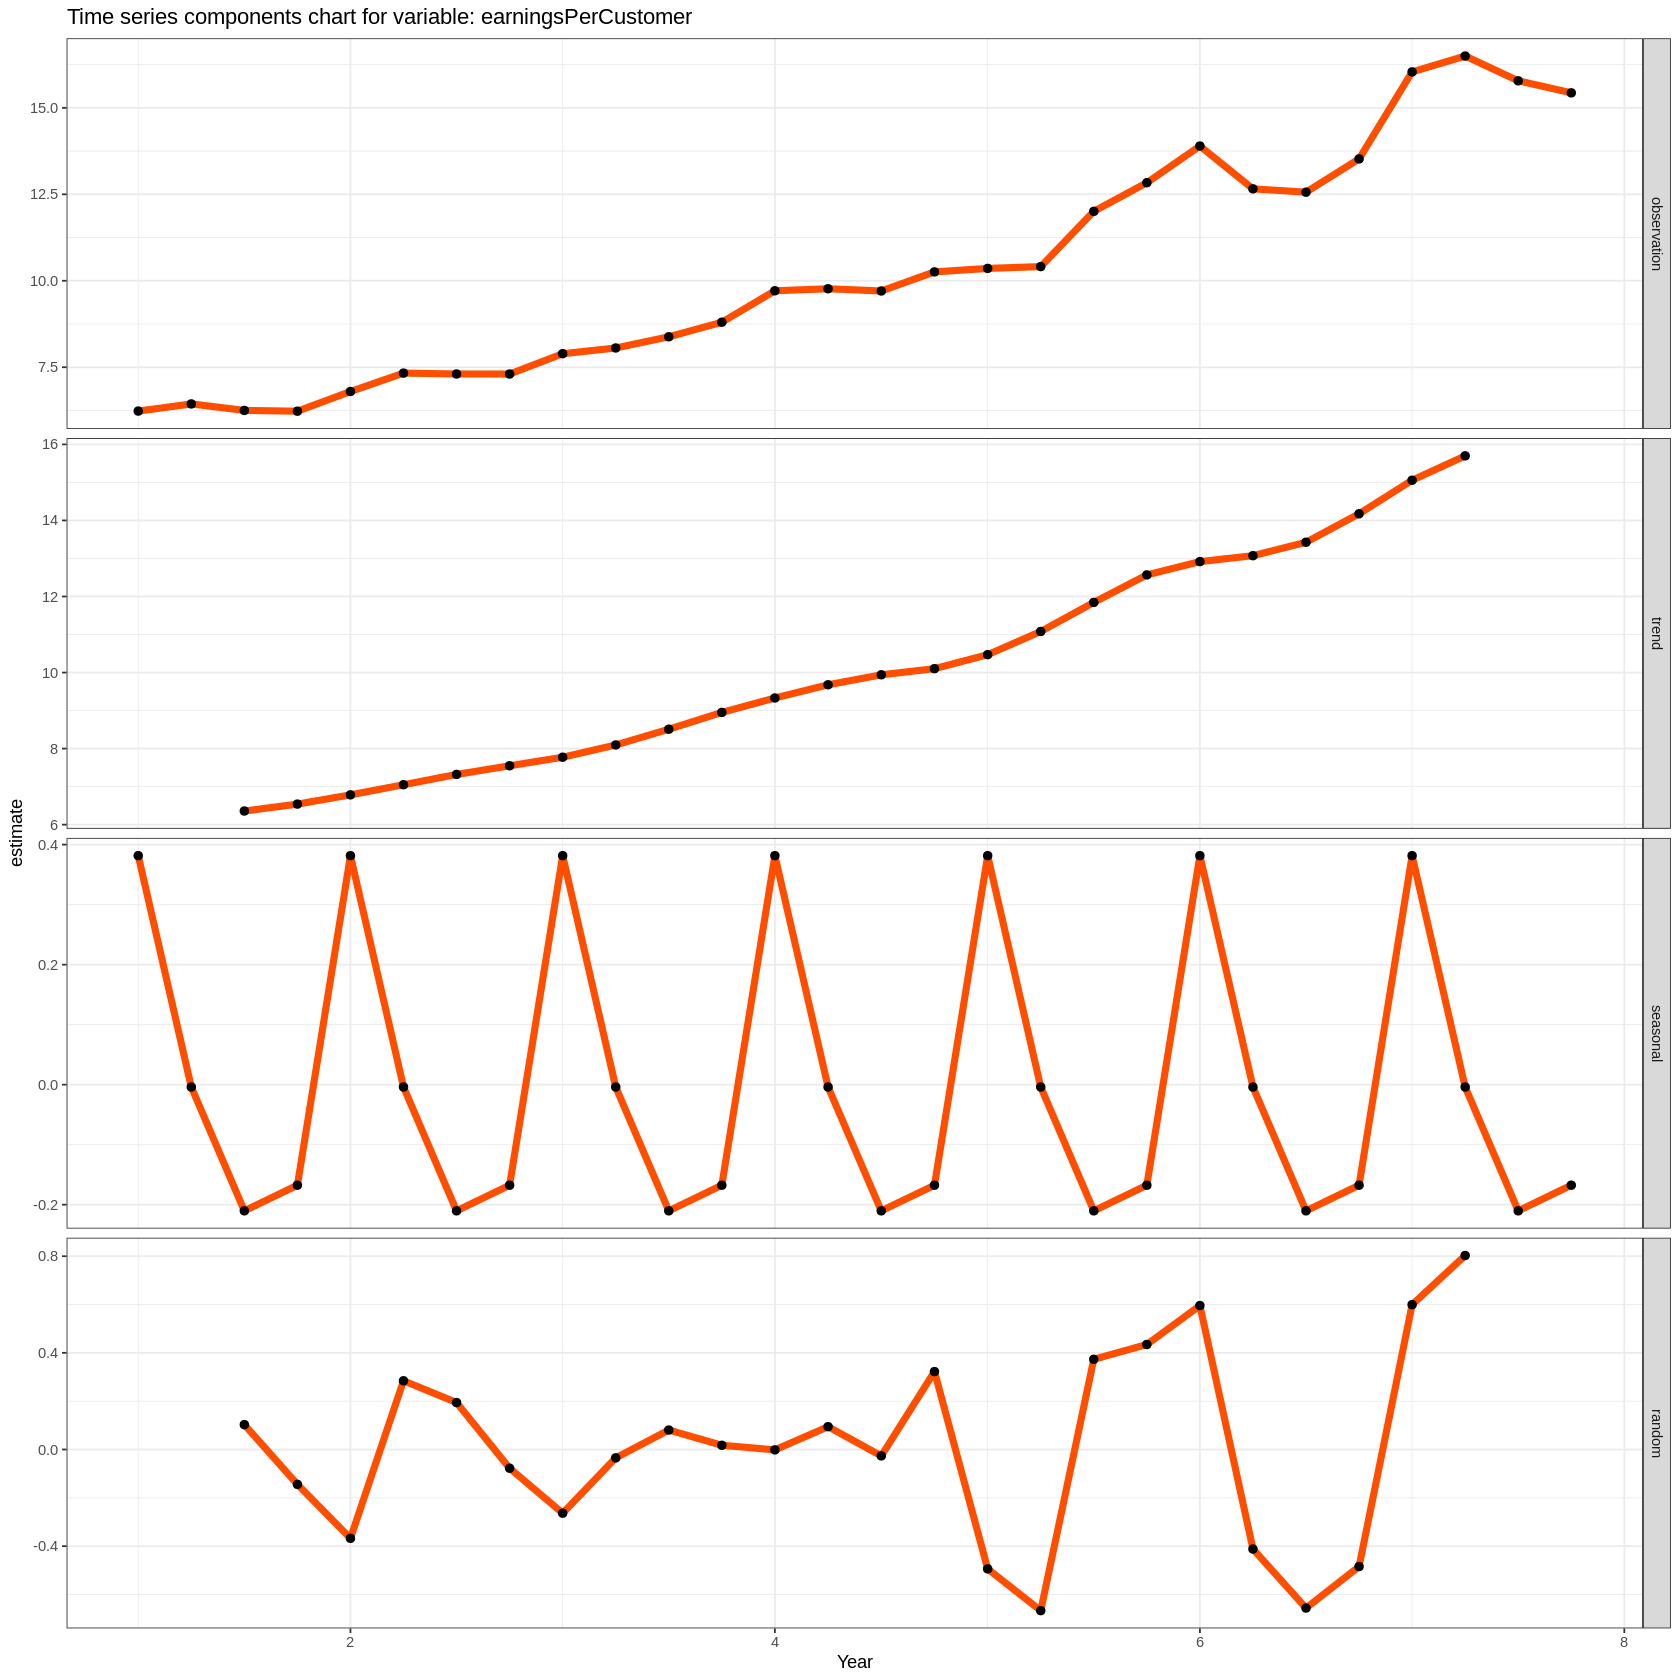

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'earningsPerCustomer'

# Criando um gráfico de cada um dos componentes que constituem a série temporal.

tsDecomposePlot(col, dt, type = 'additive')

Ao analisar o gráfico de sazonalidade da variável **earningsPerCustomer**, notamos que o **primeiro** trimestre é o de **maior sazonalidade** e o **terceiro** trimestre é o de **menor sazonalidade**.

#### **6.3.12 Variável freeTrialsFromTotal**

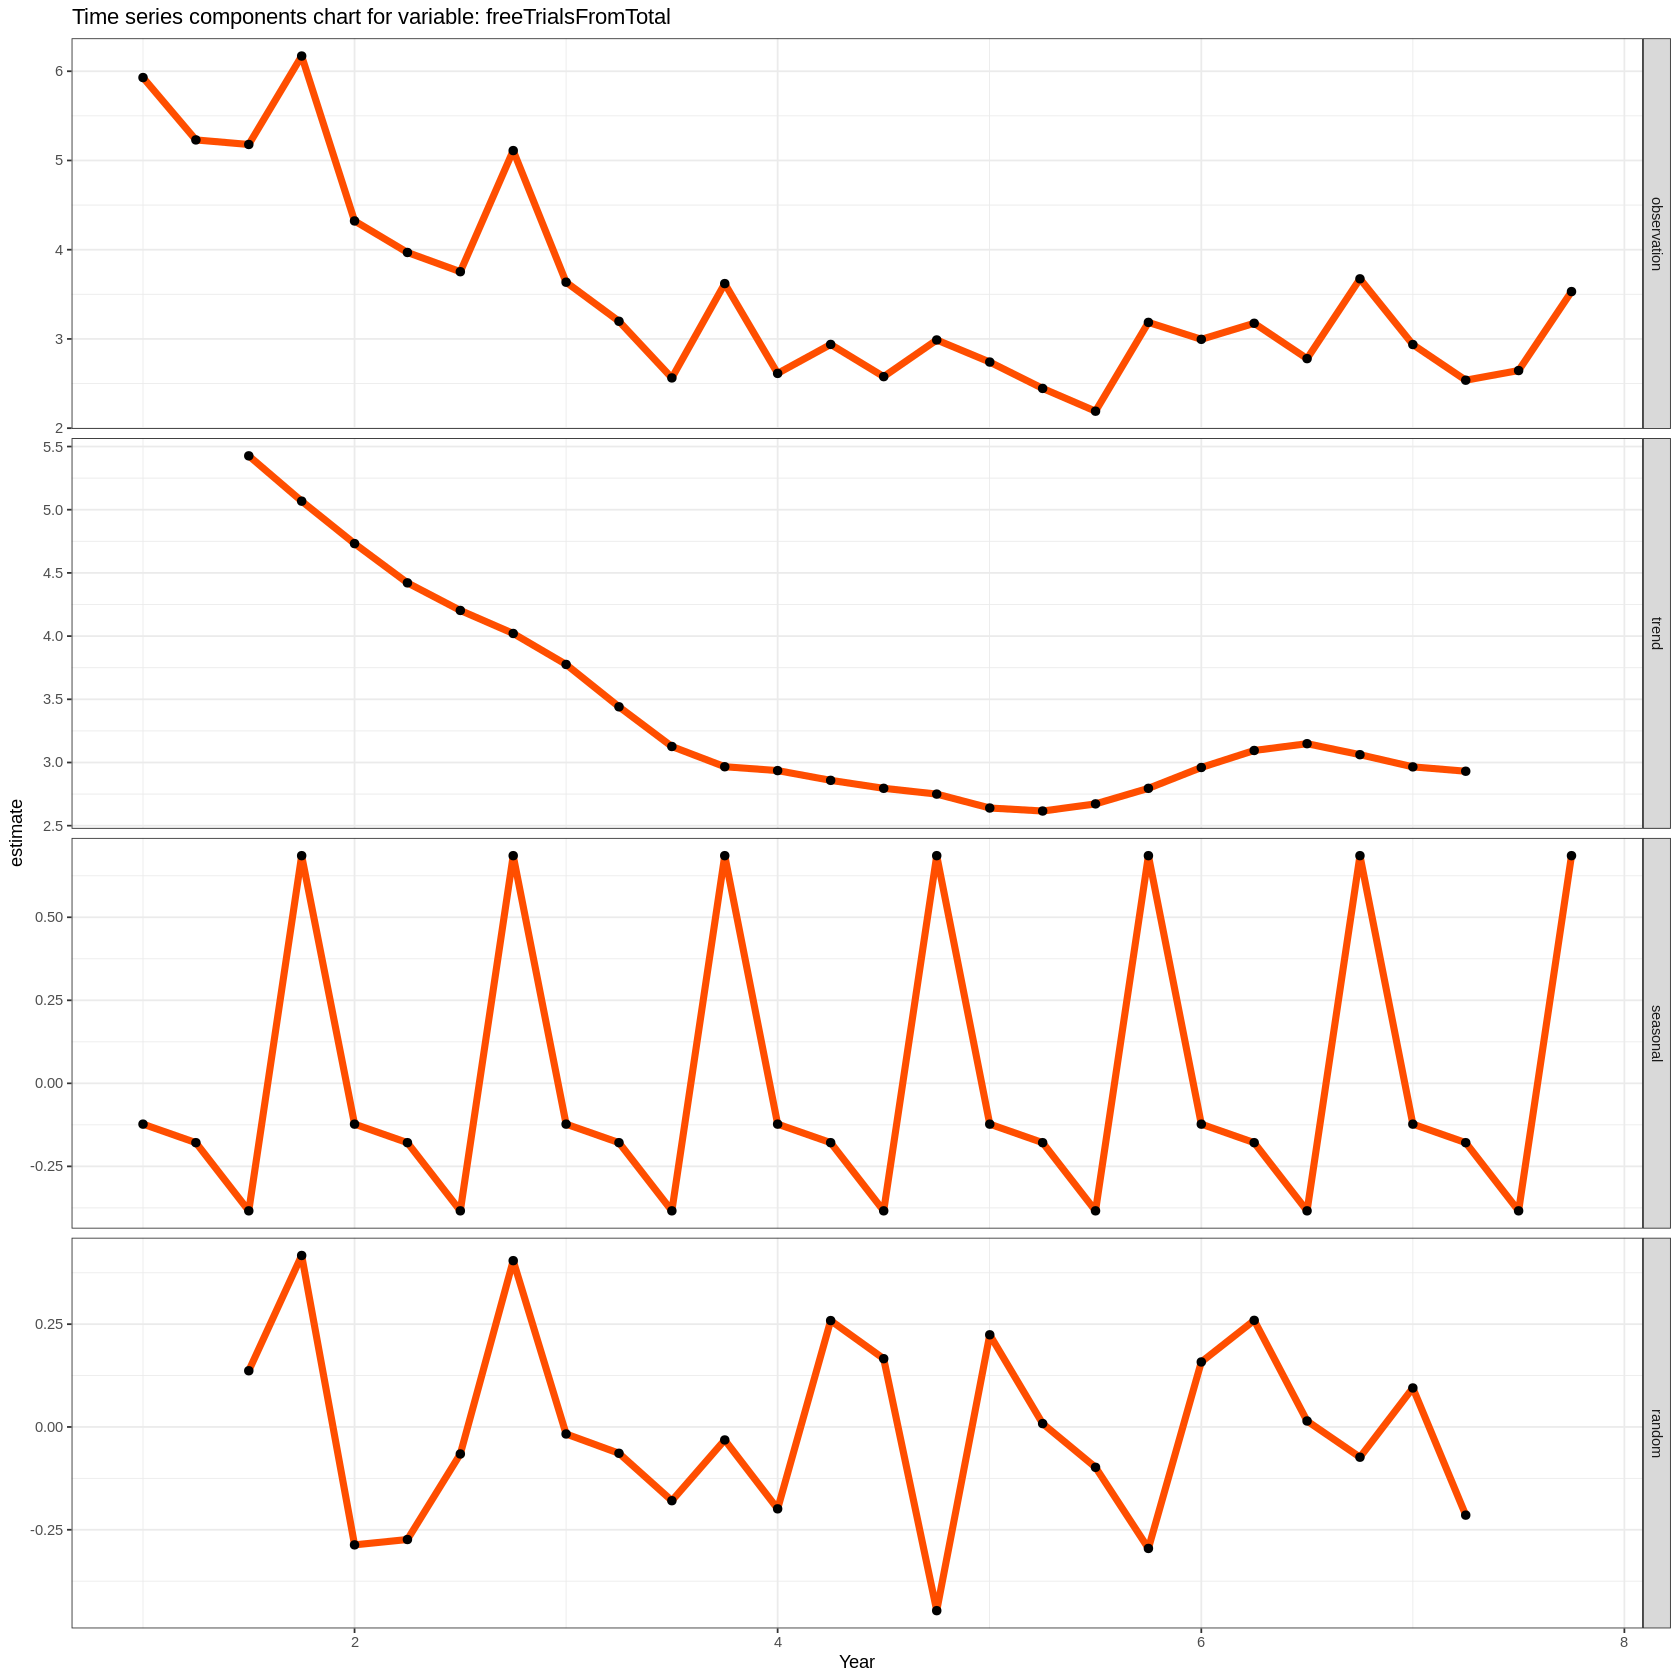

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'freeTrialsFromTotal'

# Criando um gráfico de cada um dos componentes que constituem a série temporal.

tsDecomposePlot(col, dt, type = 'additive')

Ao analisar o gráfico de sazonalidade da variável **freeTrialsFromTotal**, notamos que o **quarto** trimestre é o de **maior sazonalidade** e o **terceiro** trimestre é o de **menor sazonalidade**.

#### **6.3.13 Variável marketingFromTotal**

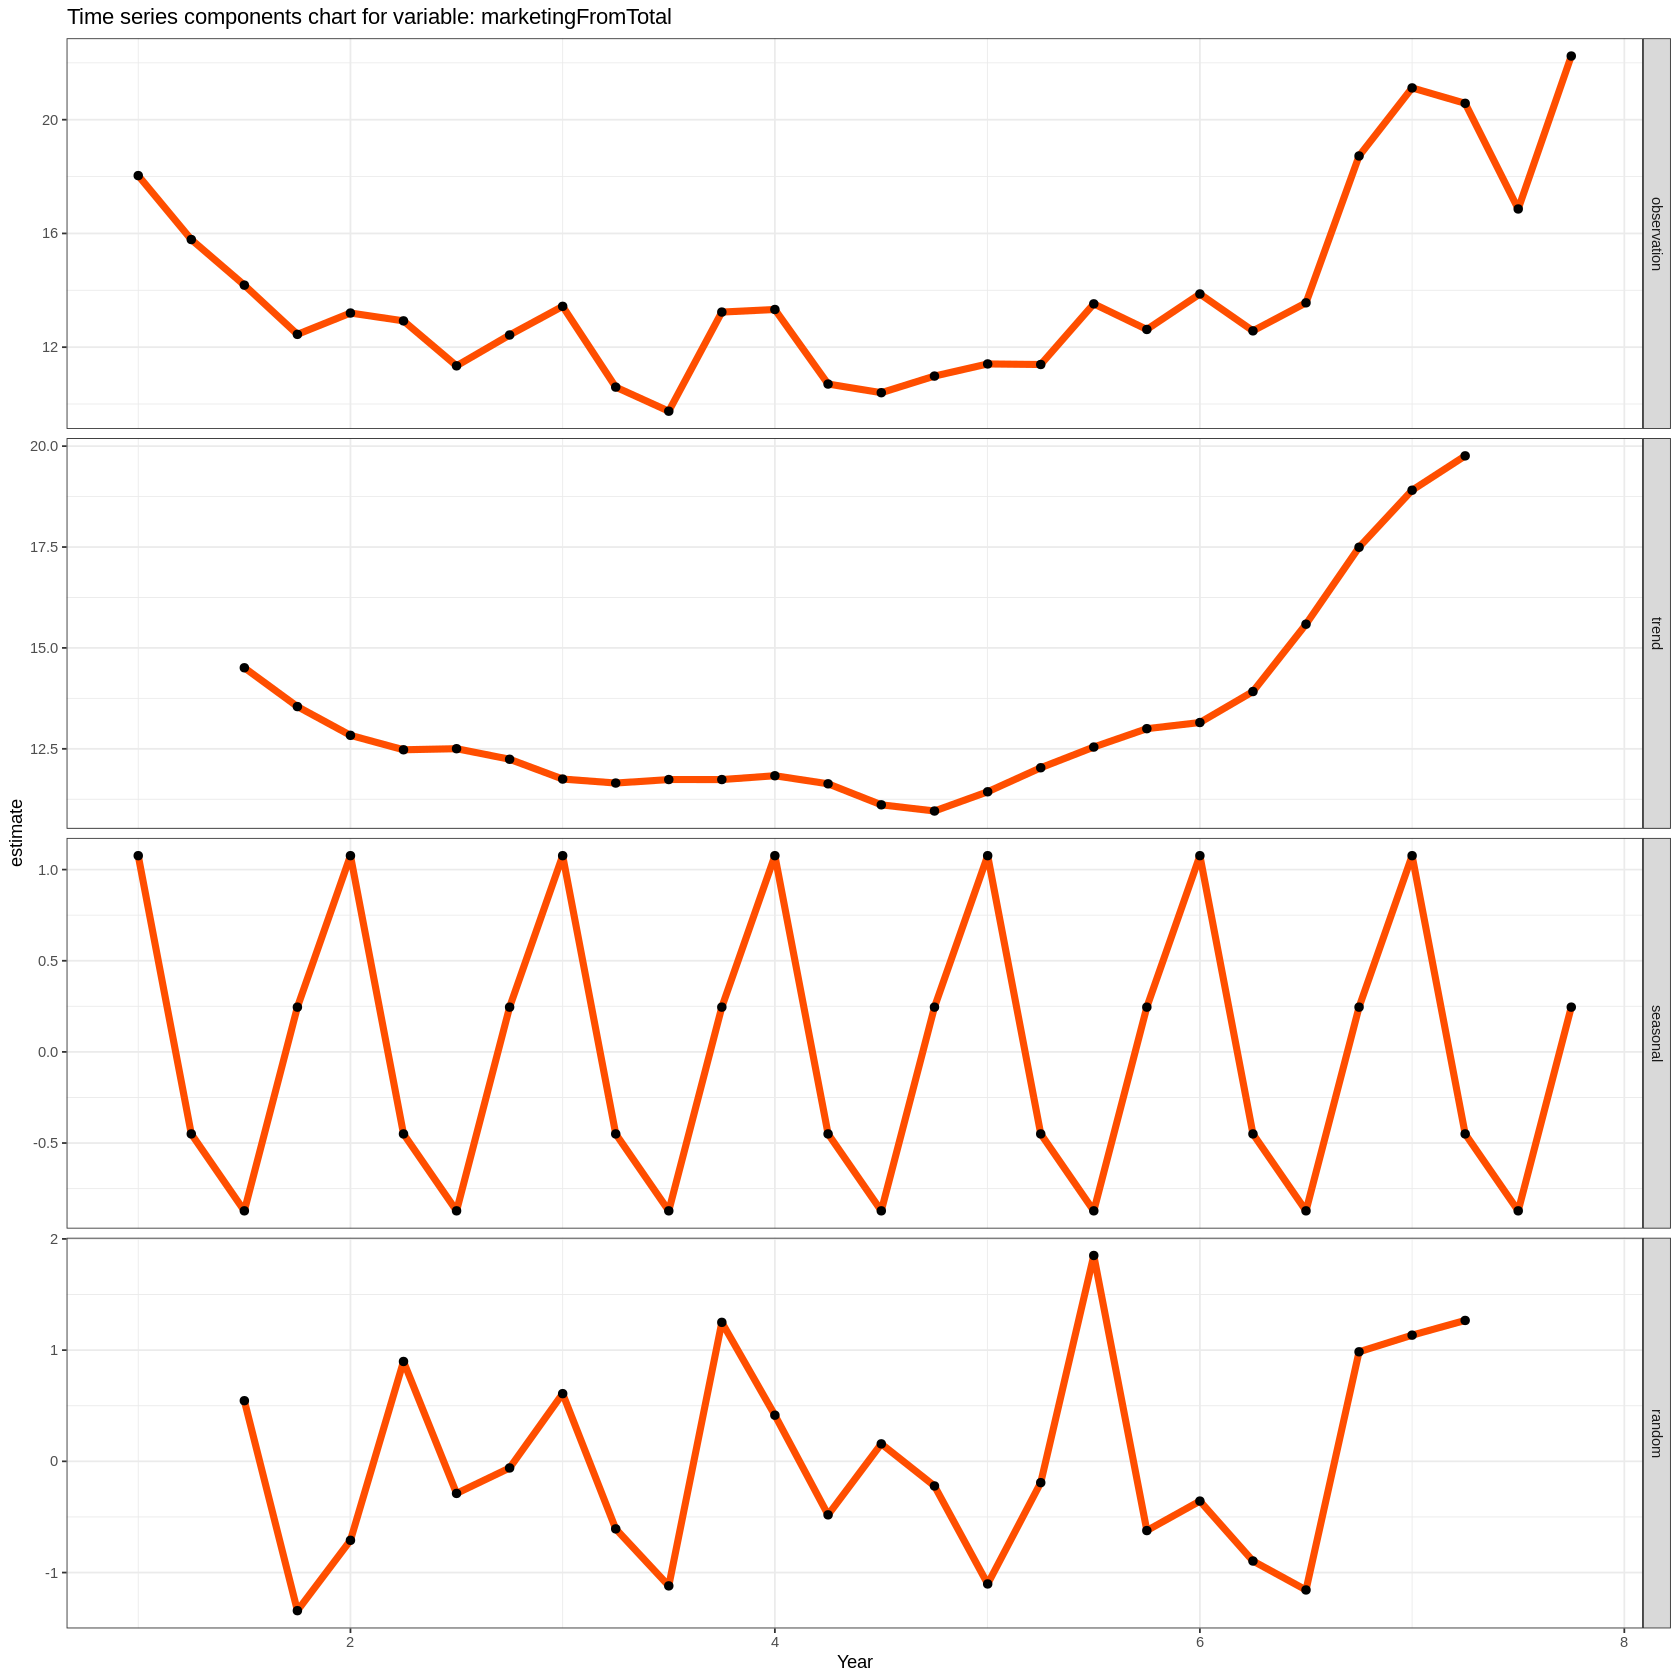

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'marketingFromTotal'

# Criando um gráfico de cada um dos componentes que constituem a série temporal.

tsDecomposePlot(col, dt, type = 'additive')

Ao analisar o gráfico de sazonalidade da variável **marketingFromTotal**, notamos que o **primeiro** trimestre é o de **maior sazonalidade** e o **terceiro** trimestre é o de **menor sazonalidade**.

### **6.4 Criando modelos preditivos com o algoritmo ARIMA**

Nesta etapa, iremos realizar previsões para os 2 próximos trimestres, utilizando o algoritmo **ARIMA**. 

In [ ]:
# Definindo como os valores frácionários devem ser exibidos (Sem notação científica).

options(scipen = 999)

In [ ]:
# Criando o modelo ARIMA,  e realizando as previsões para cada uma das variáveis do dataset.

predModels <- predQuarters(dt)

[1] "--------------- model ARIMA for variable: totalSubscriptions ---------------"
Series: t 
ARIMA(1,1,0)(0,1,1)[4] 

Coefficients:
         ar1     sma1
      0.4926  -0.5596
s.e.  0.1794   0.2656

sigma^2 estimated as 130382:  log likelihood=-167.89
AIC=341.78   AICc=343.04   BIC=345.18

Training set error measures:
                   ME     RMSE      MAE         MPE      MAPE       MASE
Training set -28.3991 312.7082 212.1465 -0.06274342 0.4727725 0.04012416
                    ACF1
Training set -0.01719786
[1] "--------------- model ARIMA for variable: paidSubscriptions ---------------"
Series: t 
ARIMA(0,1,0)(0,1,0)[4] 

sigma^2 estimated as 227394:  log likelihood=-174.48
AIC=350.96   AICc=351.15   BIC=352.09

Training set error measures:
                    ME     RMSE      MAE         MPE      MAPE      MASE
Training set -12.65349 432.1901 261.6475 -0.04148491 0.5829097 0.0498776
                  ACF1
Training set 0.3044022
[1] "--------------- model ARIMA for variable: freeT

In [ ]:
# Imprimindo dataset com as previsões, e as métricas dos modelos criados, para cada variável.

predModels

ME             RMSE           MAE           MPE        
totalSubscriptions   -28.399099594   312.70819925   212.1464616 -0.06274342
paidSubscriptions    -12.653488588   432.19009530   261.6475055 -0.04148491
freeTrails            17.832647617   144.29361363   107.0603631  0.90317957
revenue             6923.985363627 29364.76030872 16578.2144734  0.60419654
costOfRevenues      4206.209351722 18722.40041898 12735.6641273  0.47091013
marketing           5002.352338726 18608.57239034 12612.4533585  3.09888520
contributionProfit  -566.269364123 19688.52191646 16212.7927566 -1.76308516
contributionMargin    -0.005589154     0.02154096     0.0149265 -2.05000370
costPerCustomer        0.122424027     0.39580722     0.2577290  0.73179916
revenuePerCustomer    -0.002288190     0.48097807     0.3293516 -0.09214398
earningsPerCustomer    0.022369235     0.45134704     0.3342417 -0.37344465
freeTrialsFromTotal    0.051833384     0.39857635     0.3110910  1.39106936
marketingFromTotal     0.150842115     2.15025069     1.6176886 -0.26875385
                    MAPE       MASE       ACF1         Qtr1           
totalSubscriptions   0.4727725 0.04012416 -0.017197862   60349.4031246
paidSubscriptions    0.5829097 0.04987760  0.304402242   59020.0000000
freeTrails           7.9660869 0.62961253 -0.176233975    1881.0826183
revenue              1.2963698 0.07284754 -0.098271527 2062940.7203090
costOfRevenues       1.6972542 0.12327172 -0.235026627 1132034.3394005
marketing           10.3252742 0.37170840 -0.141339417  383009.2315103
contributionProfit   5.2297274 0.17425538  0.005141017  623486.3182855
contributionMargin   4.9397822 0.37472374 -0.049270398       0.2902444
costPerCustomer      1.5818525 0.34428538 -0.151028558      18.4081149
revenuePerCustomer   1.2492571 0.16728523  0.081429415      34.4142878
earningsPerCustomer  3.2402766 0.20780940  0.004718210      16.2469930
freeTrialsFromTotal 10.5757045 0.47684154 -0.129934037       2.7943849
marketingFromTotal  11.2178038 0.67098212 -0.042479184      22.2402458
                    Qtr2           
totalSubscriptions    61124.4523230
paidSubscriptions     60090.0000000
freeTrails             1842.2542184
revenue             2132588.5897542
costOfRevenues      1170622.6788009
marketing            410417.7718147
contributionProfit   679230.5334210
contributionMargin        0.2844889
costPerCustomer          19.0717130
revenuePerCustomer       34.8751264
earningsPerCustomer      17.1318585
freeTrialsFromTotal       2.3947850
marketingFromTotal       22.2402458

Iremos utilizar a métrica **RMSE**, para avaliar os modelos criados e os valores previstos.

In [ ]:
# Determinando a métrica, que deve ser utilizada para avaliar os modelos

metric <- 'RMSE'

# Capturando o índice da coluna com o nome da métrica especificada.

metricCol <- grep(metric, colnames(predModels))  

# Capturando os índices das colunas com as letras iniciais Qtr (são colunas com as previsões geradas).

qtrsCols  <- grep('Qtr', colnames(predModels)) 

# Criando uma única lista com os índices capturados.

cols <- append(metricCol, qtrsCols)  

# Ordenando as linhas do dataframe, em ordem crescente, segundo os valores da coluna de métricas.

predModelsOrdered <- predModels[order(predModels[, metric]), cols]

In [ ]:
# Imprimindo Dataframe ordenado.

predModelsOrdered

RMSE           Qtr1            Qtr2           
contributionMargin      0.02154096       0.2902444       0.2844889
costPerCustomer         0.39580722      18.4081149      19.0717130
freeTrialsFromTotal     0.39857635       2.7943849       2.3947850
earningsPerCustomer     0.45134704      16.2469930      17.1318585
revenuePerCustomer      0.48097807      34.4142878      34.8751264
marketingFromTotal      2.15025069      22.2402458      22.2402458
freeTrails            144.29361363    1881.0826183    1842.2542184
totalSubscriptions    312.70819925   60349.4031246   61124.4523230
paidSubscriptions     432.19009530   59020.0000000   60090.0000000
marketing           18608.57239034  383009.2315103  410417.7718147
costOfRevenues      18722.40041898 1132034.3394005 1170622.6788009
contributionProfit  19688.52191646  623486.3182855  679230.5334210
revenue             29364.76030872 2062940.7203090 2132588.5897542

### **6.5 Criando gráficos dos melhores modelos preditivos gerados**

Por fim, vamos gerar gráficos, com os valores previstos para os modelos que apresentaram os melhores scores, segundo a métrica selecionada.

In [ ]:
# Capturando o nome, dos 5 melhores modelos ARIMA, segundo a métrica especificada.

rownames(predModelsOrdered)[1:5]

[1] "contributionMargin"  "costPerCustomer"     "freeTrialsFromTotal"
[4] "earningsPerCustomer" "revenuePerCustomer"

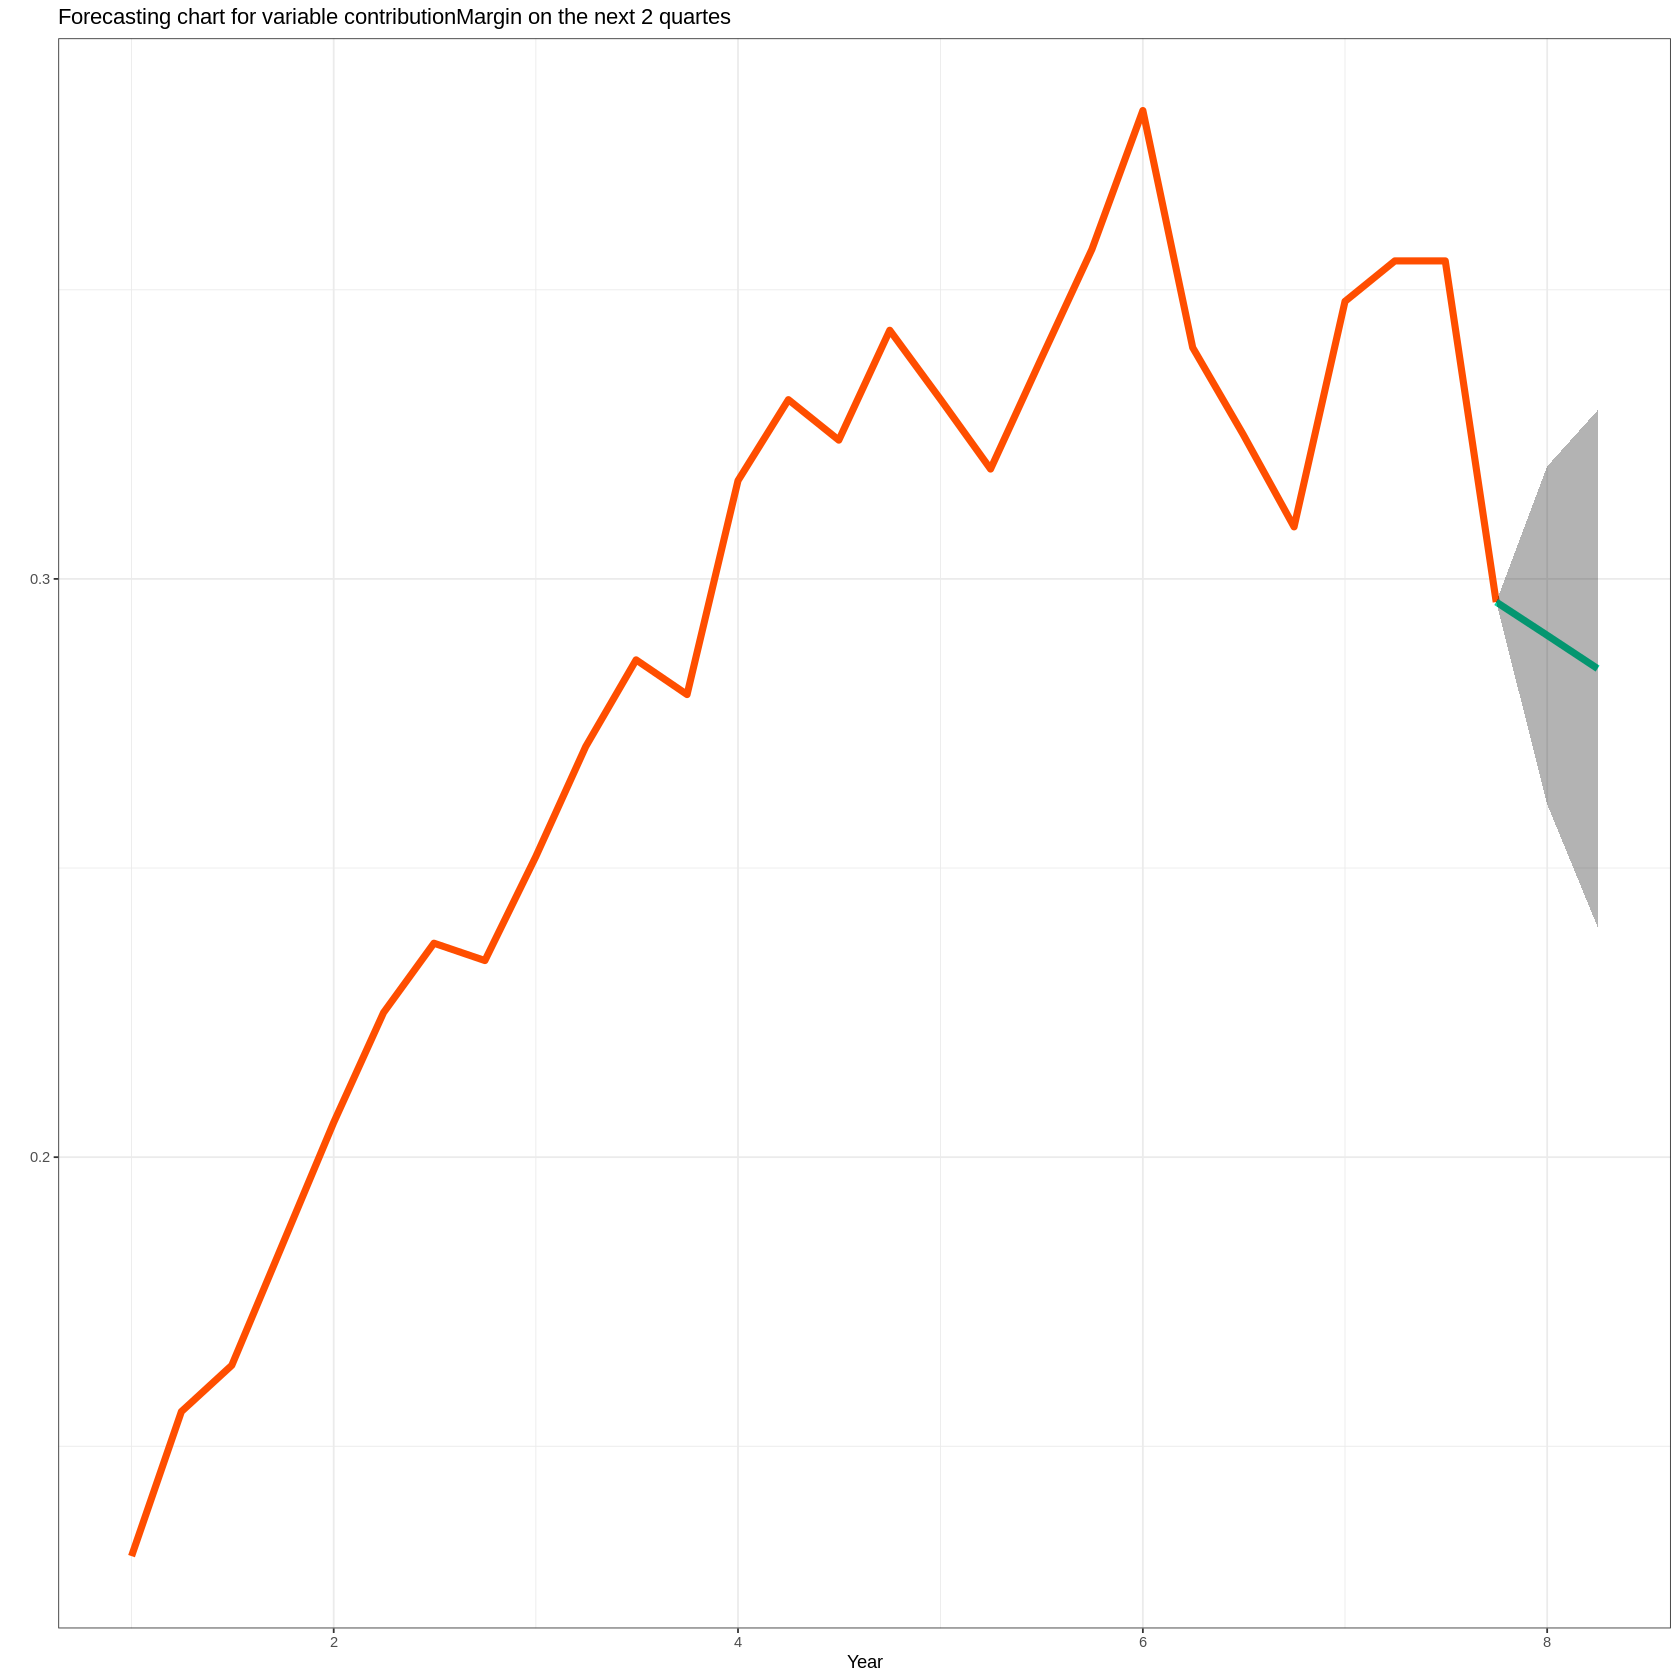

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'contributionMargin'

# Criando um gráfico da série temporal com as previsões geradas.

plotPredQuarters(col, dt)

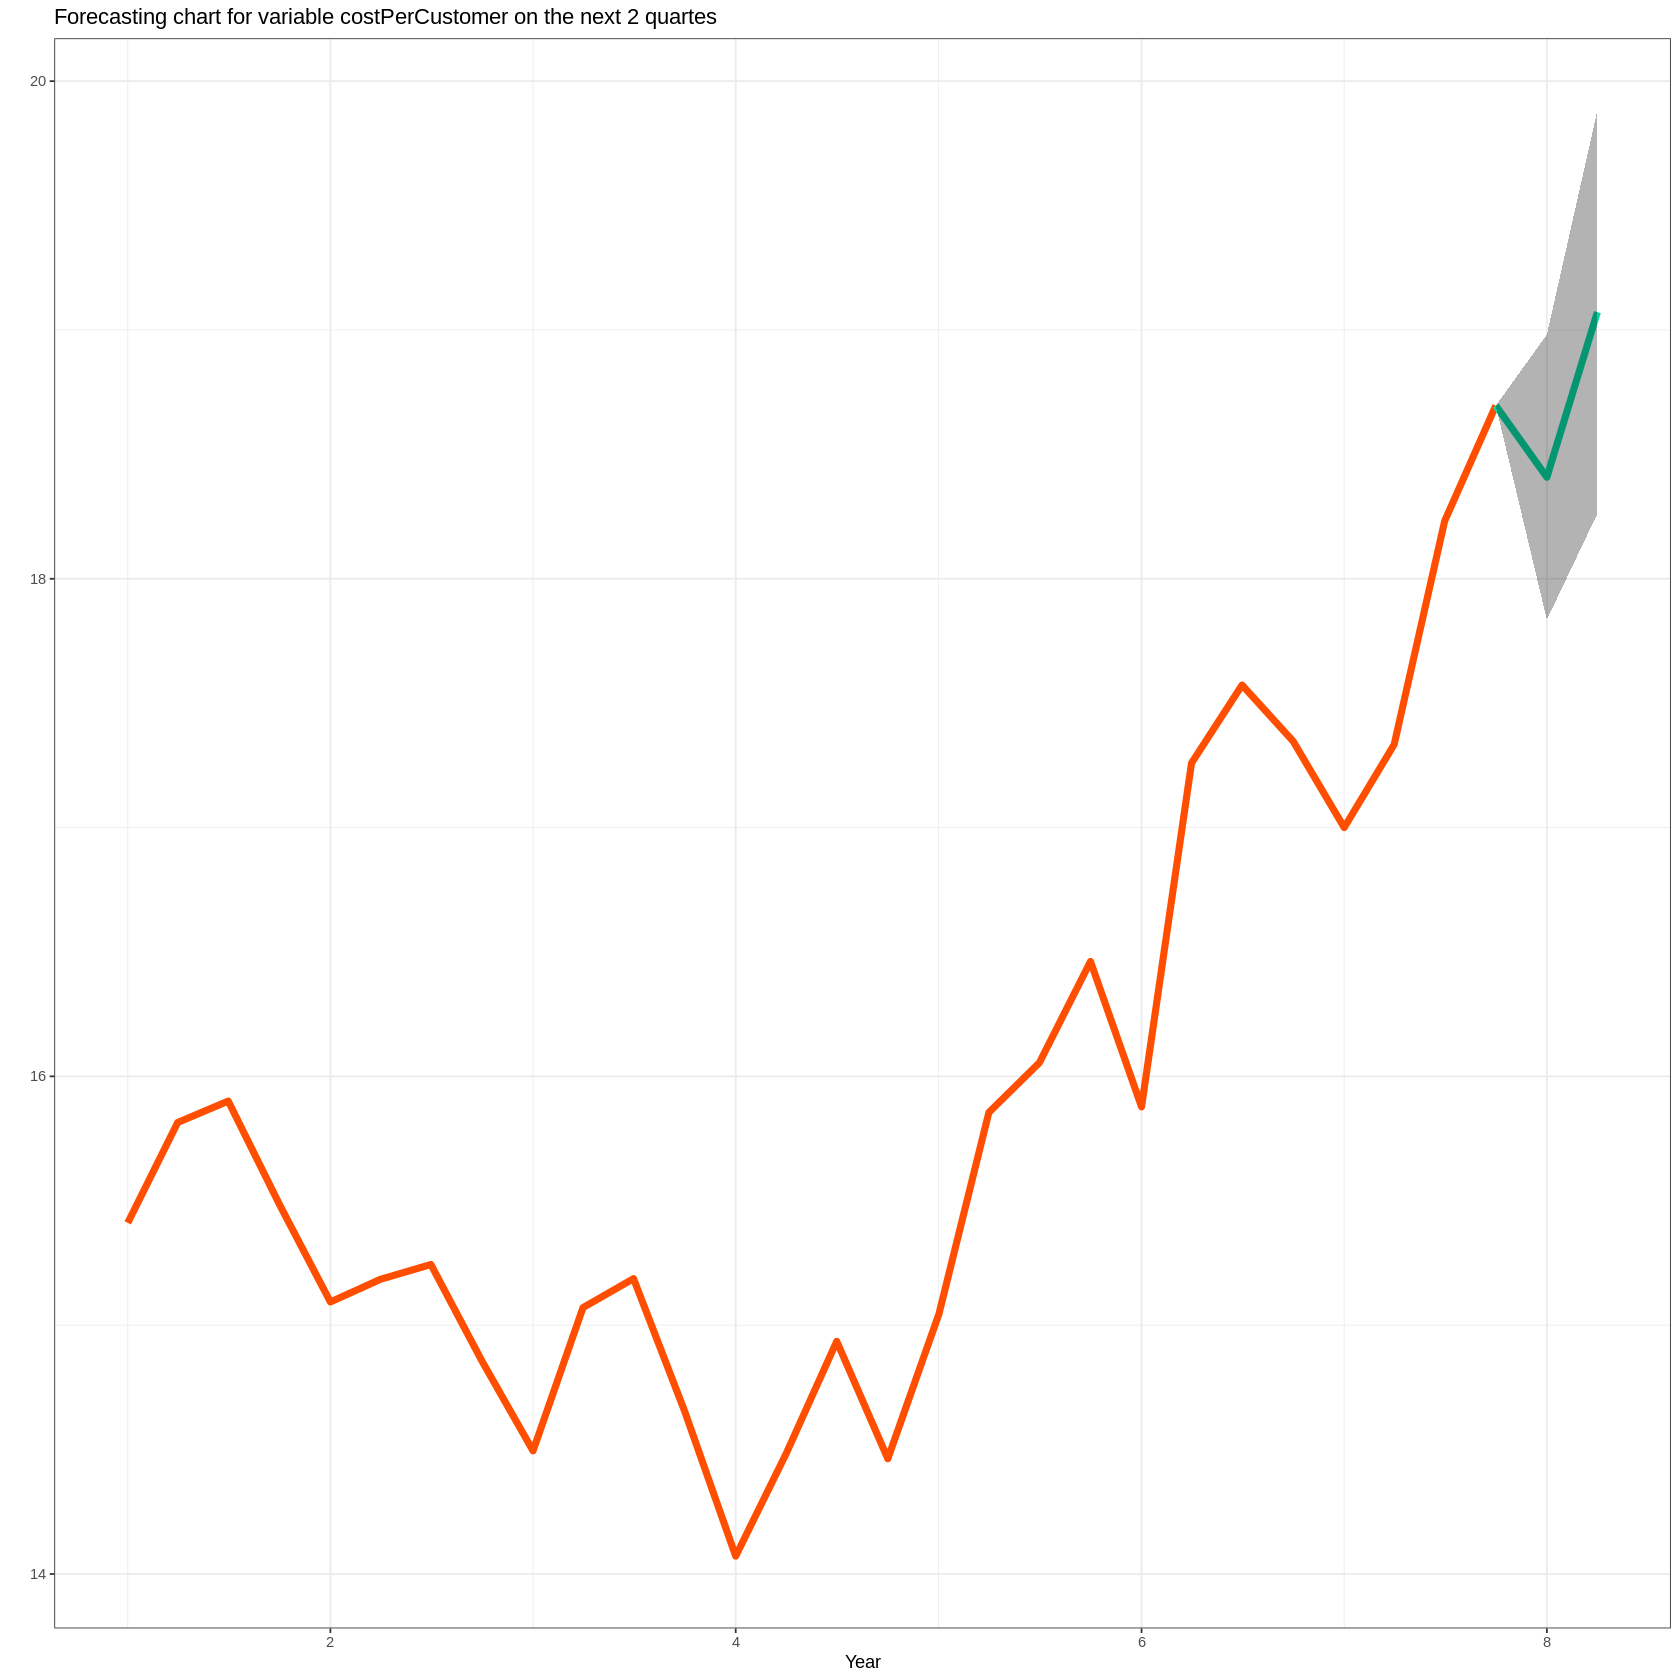

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'costPerCustomer'

# Criando um gráfico da série temporal com as previsões geradas.

plotPredQuarters(col, dt)

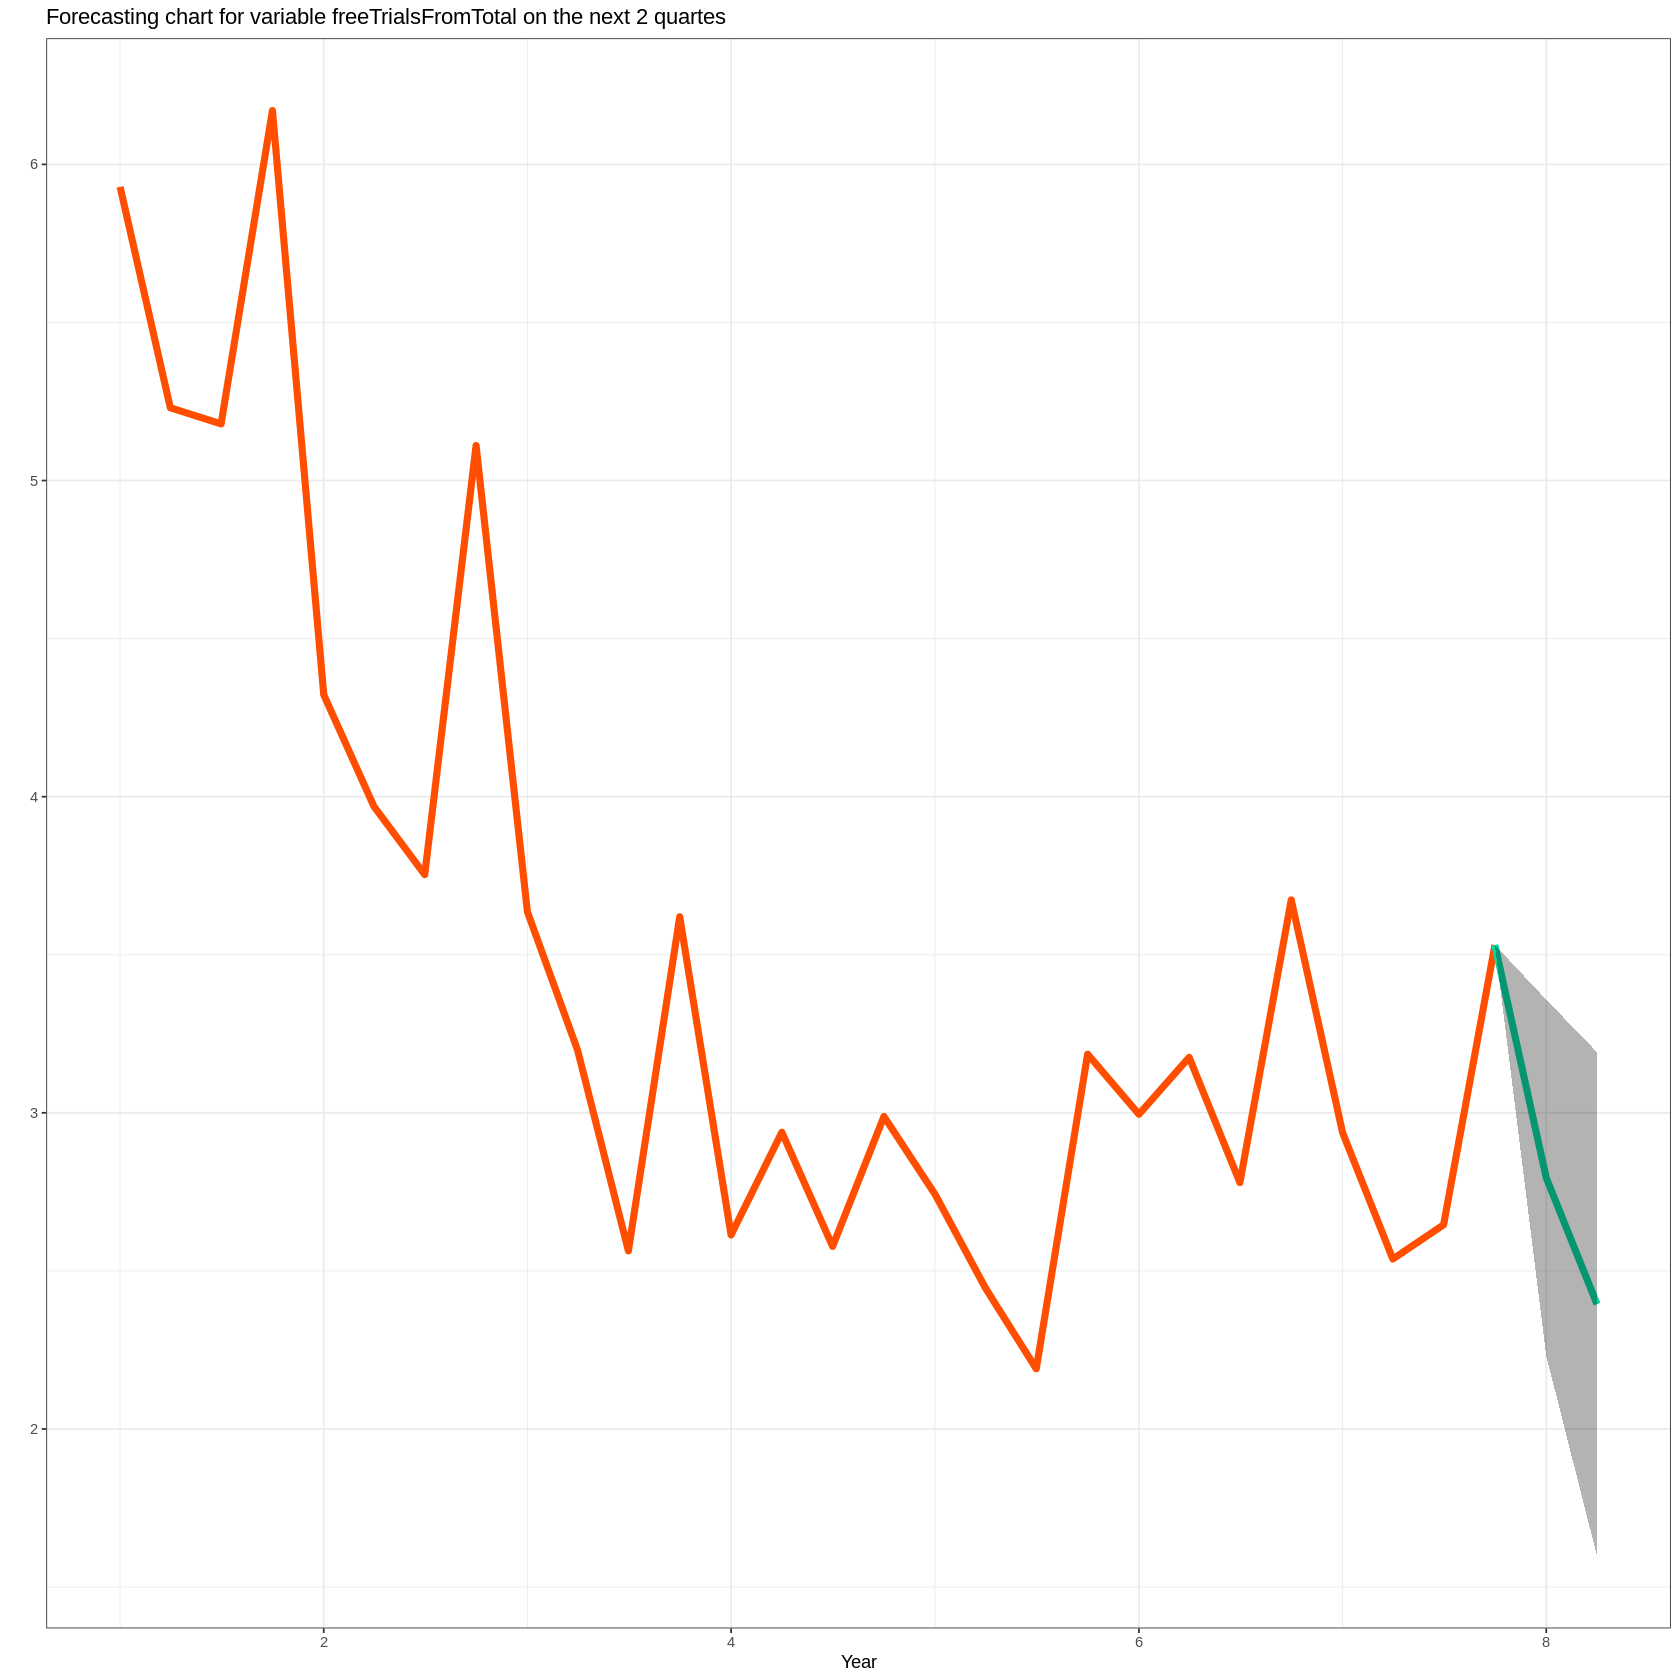

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'freeTrialsFromTotal'

# Criando um gráfico da série temporal com as previsões geradas.

plotPredQuarters(col, dt)

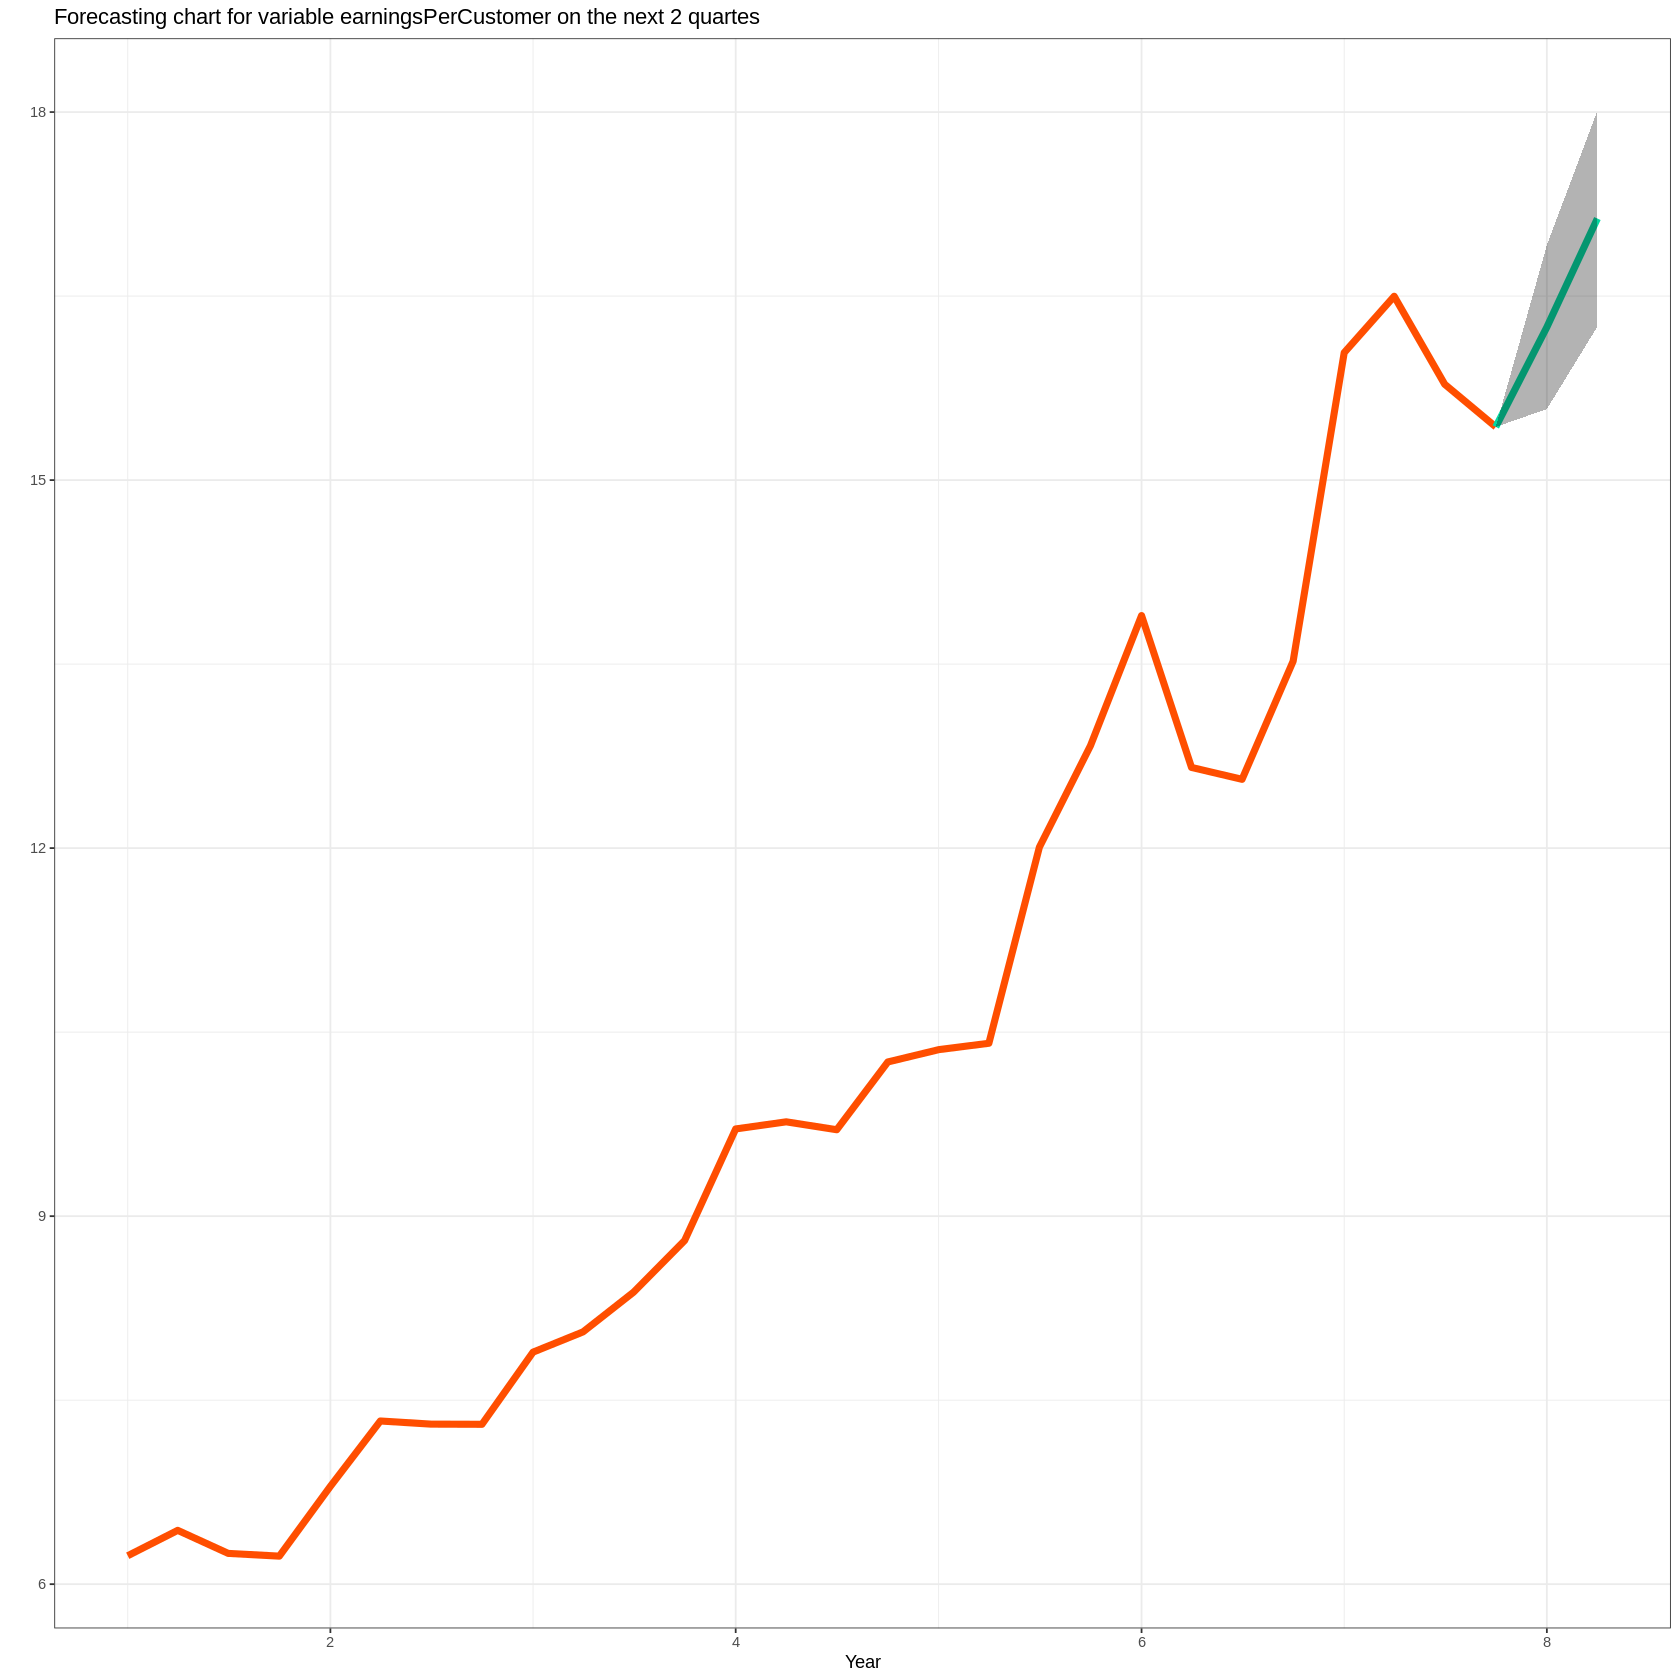

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'earningsPerCustomer'

# Criando um gráfico da série temporal com as previsões geradas.

plotPredQuarters(col, dt)

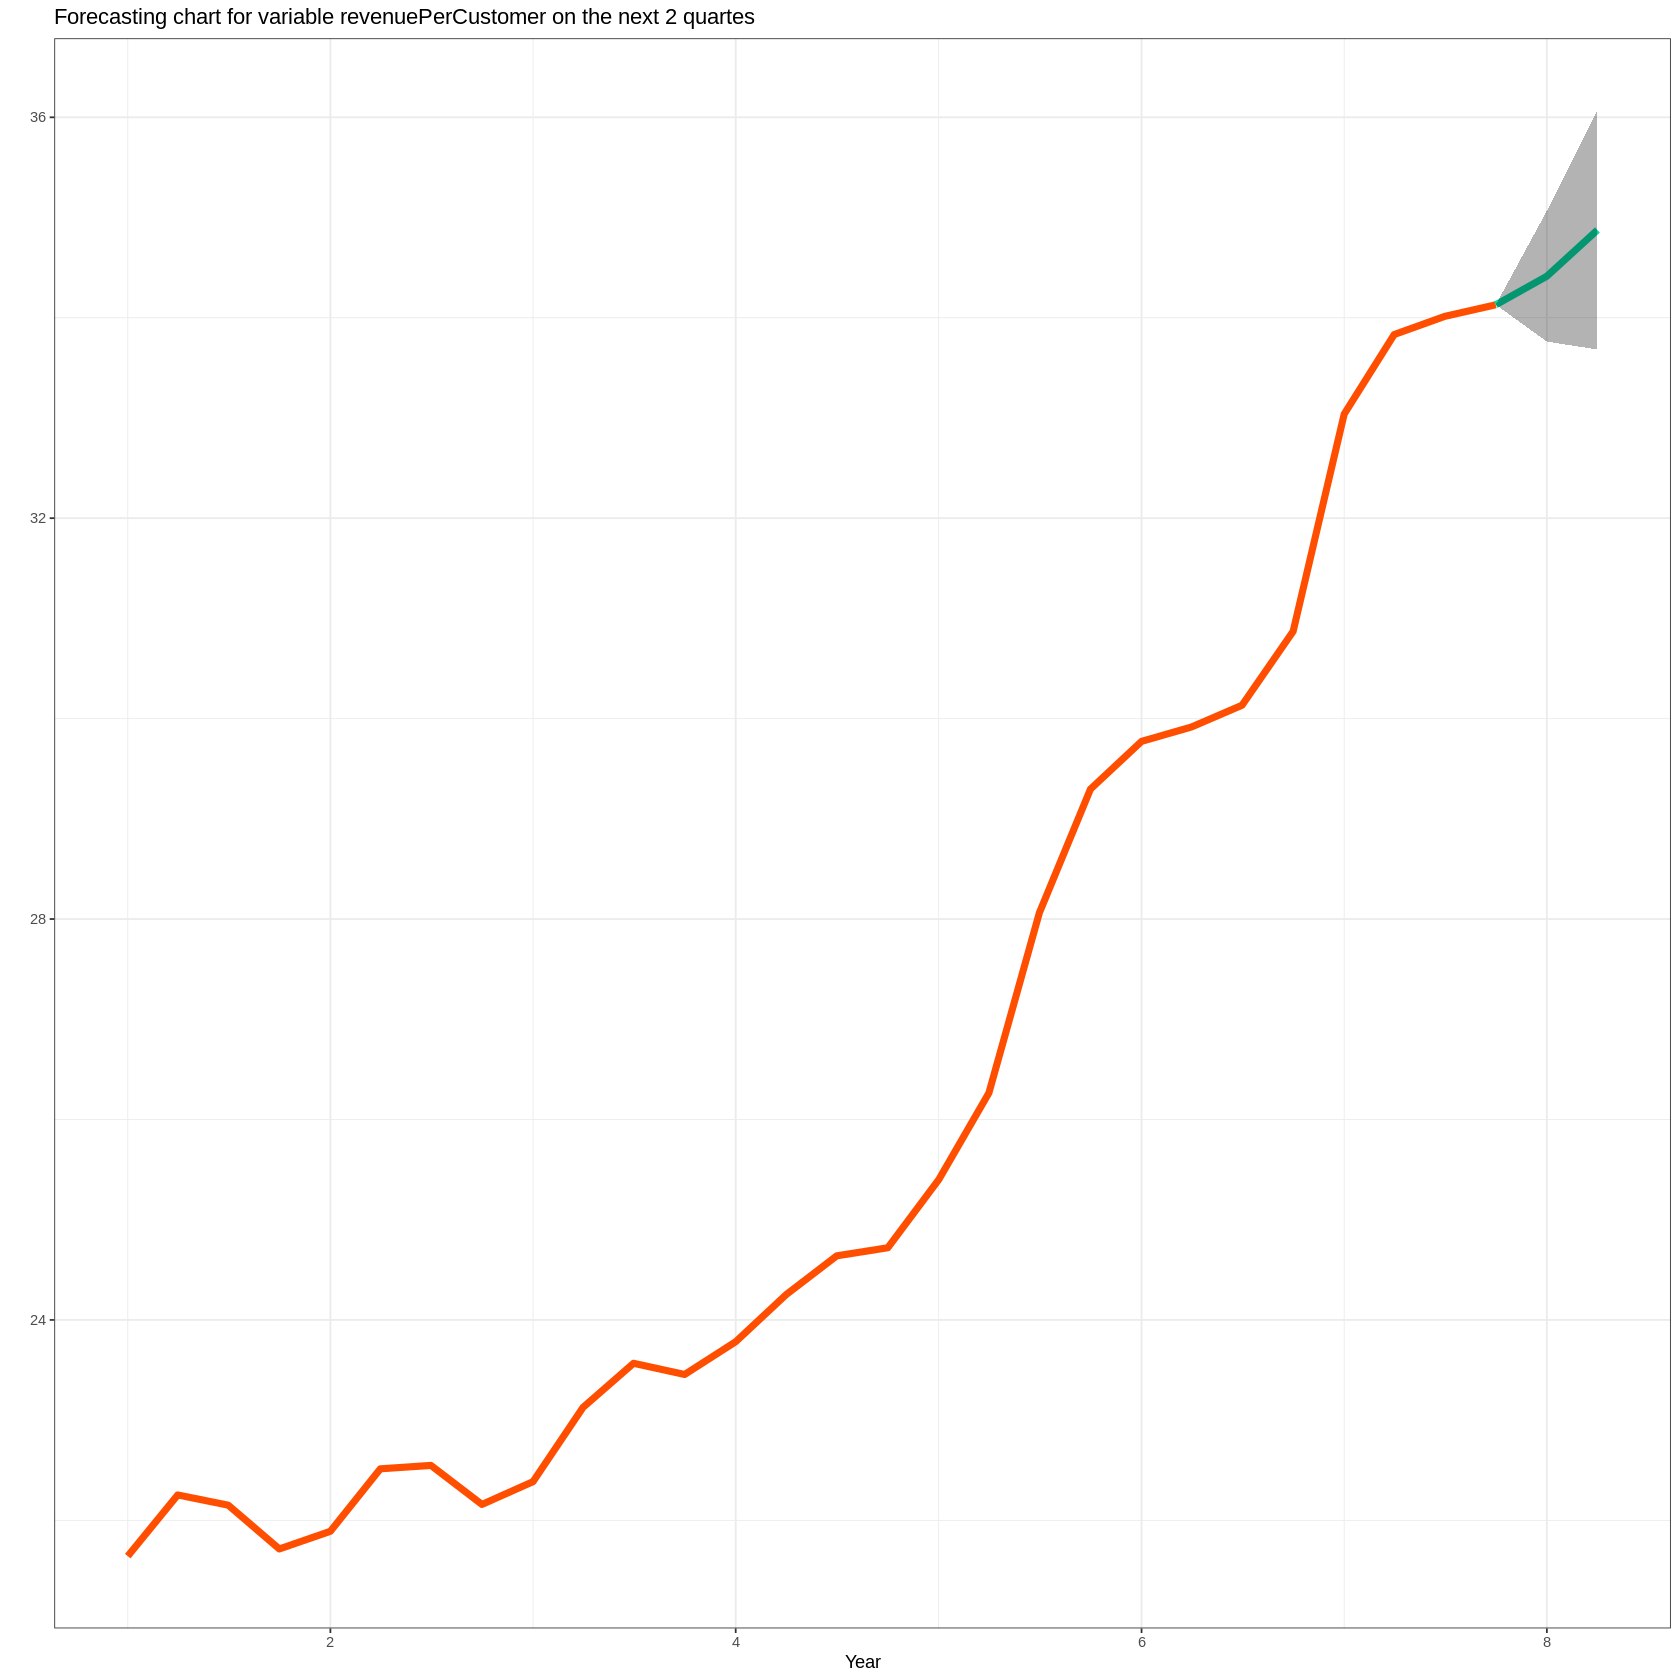

In [ ]:
# Definindo o nome da variável a ser analisada.

col <- 'revenuePerCustomer'

# Criando um gráfico da série temporal com as previsões geradas.

plotPredQuarters(col, dt)

E assim, finalizamos nossa análise estatística sobre os dados financeiros trimestrais da Netflix!

## **Entre em contato comigo!**

Caso tenha alguma dúvida, sugestão ou apenas queira trocar uma ideia sobre este projeto, não hesite em entrar em contato comigo!

<table align='center'>
    <tr style=" background-color: rgba(0,0,0,0);">
        <td>
            <img src="https://image.flaticon.com/icons/svg/732/732026.svg" alt="Email" height="42" width="42">
        </td>
        <td>
            <p>
                <a href="mailto:franklinfs390@gmail.com">E-mail</href>
            </p>
        </td>
    <td>
            <img src="https://image.flaticon.com/icons/svg/254/254394.svg" alt="Linkedin" height="42" width="42">
    </td>
    <td>
        <p>
            <a href="https://www.linkedin.com/in/franklinfs390/">Linkedin</href>
        </p>
    </td>
    <td>
        <img src="https://image.flaticon.com/icons/svg/2111/2111432.svg" alt="Github" height="42" width="42">
    </td>
    <td>
        <p>
            <a href="https://github.com/franklin390">Github</href>
        </p>
    </td>
    <td>
        <img src="https://image.flaticon.com/icons/svg/1667/1667233.svg" alt="Site" height="42" width="42">
    </td>
    <td>
        <p>
            <a href="https://franklin390.github.io/">Site</href>
        </p>
    </td>
  </tr>
</table>
